## Run first two cells after each year label (try running the training ones one at a time)
## (replace "full_dataset.csv" below with the actual full dataset)

In [1]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

df = pd.read_csv("full_dataset.csv")
df = df.drop(columns=['FIPS', 'mean_household_income', 'proportion_renters_35perc_income',
                      'proportion_bachelors_or_greater', 'opioid_prescriptions_per_100',
                      'employee_diff', 'payroll_diff'])
# dropping cols with missing data, or otherwise unnecessary
df = df.apply(lambda x: x.astype(float))# converting each column to float

n_counties = df.shape[0]//10# allocating 1 row per county
n_features = df.shape[1] - 2# taking away the Year and next_year_deaths features

In [2]:
def allocate_data(target_year):#allocates data to predict deaths from target_year
    n_samples = target_year - 2010
    X = np.ndarray((n_samples, n_counties, n_features))# 9 years in our model, but 10 years in the spreadsheet
    y = np.ndarray((n_samples, n_counties))
    for i in range(n_samples):
        X[i] = df.loc[df['Year'] == 2010 + i].drop(columns=['Year', 'next_year_deaths_per_100000'])
        y[i] = df.loc[df['Year'] == 2010 + i]['next_year_deaths_per_100000']
    X_test = np.ndarray((1, n_counties, n_features))
    X_test[0] = df.loc[df['Year'] == target_year].drop(columns=['Year', 'next_year_deaths_per_100000'])
    y_test = np.ndarray((1, n_counties))
    y_test[0] = df.loc[df['Year'] == target_year]['next_year_deaths_per_100000']
    return X, y, X_test, y_test

In [5]:
callbacks = [
    EarlyStopping(
        monitor = "val_mae",
        min_delta = 1e-10,
        patience = 5
    )
]

## Testing the input shapes

In [ ]:
X, y, X_test, y_test = allocate_data(2013)

model = Sequential(
    [
        BatchNormalization(),
        Dense(16, activation = 'relu', input_shape=(n_counties, n_features))
        Dense(1, activation = 'relu')
    ]
)

model.compile(loss='mse', metrics=['mae'])
history = model.fit(X, y, epochs=10000, validation_data = (X_test, y_test))
y_predicted = model.predict(X_test)

# Models for each year (testing, followed by training to find parameters for use in subsequent models)

# 2013

In [12]:
X, y, X_test, y_test = allocate_data(2013)

model = Sequential(
    [
        BatchNormalization(),
        Dense(16, activation = 'relu', input_shape=(n_counties, n_features)),
        Dense(16, activation = 'relu'),
        Dense(1, activation = 'relu')
    ]
)

model.compile(loss='mse', metrics=['mae'])
model.fit(X, y, epochs=2000)
y_predicted = model.predict(X_test)

Epoch 1/2000
1/1 [==============================] - 1s 721ms/step - loss: 216.0221 - mae: 11.9115 - val_loss: 92.2290 - val_mae: 6.1672
Epoch 2/2000
1/1 [==============================] - 0s 22ms/step - loss: 215.5383 - mae: 11.8997 - val_loss: 96.0718 - val_mae: 6.4631
Epoch 3/2000
1/1 [==============================] - 0s 23ms/step - loss: 214.9991 - mae: 11.8856 - val_loss: 99.6267 - val_mae: 6.7049
Epoch 4/2000
1/1 [==============================] - 0s 21ms/step - loss: 214.3878 - mae: 11.8688 - val_loss: 102.7876 - val_mae: 6.8998
Epoch 5/2000
1/1 [==============================] - 0s 22ms/step - loss: 213.6892 - mae: 11.8491 - val_loss: 105.6600 - val_mae: 7.0589
Epoch 6/2000
1/1 [==============================] - 0s 22ms/step - loss: 212.9265 - mae: 11.8270 - val_loss: 107.7019 - val_mae: 7.1684
Epoch 7/2000
1/1 [==============================] - 0s 23ms/step - loss: 212.1018 - mae: 11.8024 - val_loss: 109.1725 - val_mae: 7.2461
Epoch 8/2000
1/1 [==============================] 

Epoch 61/2000
1/1 [==============================] - 0s 22ms/step - loss: 162.0988 - mae: 10.0724 - val_loss: 123.9331 - val_mae: 8.1023
Epoch 62/2000
1/1 [==============================] - 0s 22ms/step - loss: 161.1195 - mae: 10.0344 - val_loss: 123.9959 - val_mae: 8.1081
Epoch 63/2000
1/1 [==============================] - 0s 20ms/step - loss: 160.1372 - mae: 9.9961 - val_loss: 124.0471 - val_mae: 8.1132
Epoch 64/2000
1/1 [==============================] - 0s 20ms/step - loss: 159.1514 - mae: 9.9574 - val_loss: 124.0944 - val_mae: 8.1181
Epoch 65/2000
1/1 [==============================] - 0s 21ms/step - loss: 158.1628 - mae: 9.9184 - val_loss: 124.1327 - val_mae: 8.1226
Epoch 66/2000
1/1 [==============================] - 0s 21ms/step - loss: 157.1712 - mae: 9.8791 - val_loss: 124.1547 - val_mae: 8.1262
Epoch 67/2000
1/1 [==============================] - 0s 21ms/step - loss: 156.1760 - mae: 9.8395 - val_loss: 124.1667 - val_mae: 8.1294
Epoch 68/2000
1/1 [===========================

1/1 [==============================] - 0s 20ms/step - loss: 101.1148 - mae: 7.3675 - val_loss: 111.4075 - val_mae: 7.6137
Epoch 122/2000
1/1 [==============================] - 0s 21ms/step - loss: 100.1689 - mae: 7.3196 - val_loss: 110.9906 - val_mae: 7.5959
Epoch 123/2000
1/1 [==============================] - 0s 20ms/step - loss: 99.2301 - mae: 7.2719 - val_loss: 110.5707 - val_mae: 7.5779
Epoch 124/2000
1/1 [==============================] - 0s 20ms/step - loss: 98.2986 - mae: 7.2242 - val_loss: 110.1493 - val_mae: 7.5599
Epoch 125/2000
1/1 [==============================] - 0s 21ms/step - loss: 97.3744 - mae: 7.1768 - val_loss: 109.7300 - val_mae: 7.5421
Epoch 126/2000
1/1 [==============================] - 0s 22ms/step - loss: 96.4578 - mae: 7.1297 - val_loss: 109.3120 - val_mae: 7.5244
Epoch 127/2000
1/1 [==============================] - 0s 20ms/step - loss: 95.5492 - mae: 7.0830 - val_loss: 108.8926 - val_mae: 7.5066
Epoch 128/2000
1/1 [==============================] - 0s 21ms

Epoch 242/2000
1/1 [==============================] - 0s 21ms/step - loss: 42.4492 - mae: 4.2659 - val_loss: 59.3540 - val_mae: 5.1414
Epoch 243/2000
1/1 [==============================] - 0s 20ms/step - loss: 42.2258 - mae: 4.2501 - val_loss: 58.9273 - val_mae: 5.1172
Epoch 244/2000
1/1 [==============================] - 0s 21ms/step - loss: 42.0048 - mae: 4.2345 - val_loss: 58.5064 - val_mae: 5.0931
Epoch 245/2000
1/1 [==============================] - 0s 21ms/step - loss: 41.7858 - mae: 4.2189 - val_loss: 58.0801 - val_mae: 5.0685
Epoch 246/2000
1/1 [==============================] - 0s 21ms/step - loss: 41.5697 - mae: 4.2035 - val_loss: 57.6694 - val_mae: 5.0446
Epoch 247/2000
1/1 [==============================] - 0s 20ms/step - loss: 41.3570 - mae: 4.1879 - val_loss: 57.2521 - val_mae: 5.0200
Epoch 248/2000
1/1 [==============================] - 0s 20ms/step - loss: 41.1466 - mae: 4.1726 - val_loss: 56.8470 - val_mae: 4.9960
Epoch 249/2000
1/1 [==============================] - 0

Epoch 303/2000
1/1 [==============================] - 0s 21ms/step - loss: 33.1810 - mae: 3.4273 - val_loss: 41.3156 - val_mae: 3.9007
Epoch 304/2000
1/1 [==============================] - 0s 20ms/step - loss: 33.0917 - mae: 3.4085 - val_loss: 40.8707 - val_mae: 3.8661
Epoch 305/2000
1/1 [==============================] - 0s 20ms/step - loss: 33.0040 - mae: 3.4060 - val_loss: 40.9452 - val_mae: 3.8677
Epoch 306/2000
1/1 [==============================] - 0s 20ms/step - loss: 32.9175 - mae: 3.3869 - val_loss: 40.4965 - val_mae: 3.8325
Epoch 307/2000
1/1 [==============================] - 0s 21ms/step - loss: 32.8321 - mae: 3.3851 - val_loss: 40.5920 - val_mae: 3.8358
Epoch 308/2000
1/1 [==============================] - 0s 20ms/step - loss: 32.7477 - mae: 3.3660 - val_loss: 40.1363 - val_mae: 3.8001
Epoch 309/2000
1/1 [==============================] - 0s 20ms/step - loss: 32.6650 - mae: 3.3648 - val_loss: 40.2491 - val_mae: 3.8043
Epoch 310/2000
1/1 [==============================] - 0

Epoch 364/2000
1/1 [==============================] - 0s 21ms/step - loss: 29.2999 - mae: 2.9421 - val_loss: 32.9439 - val_mae: 3.0708
Epoch 365/2000
1/1 [==============================] - 0s 21ms/step - loss: 29.2518 - mae: 2.9575 - val_loss: 33.1425 - val_mae: 3.0723
Epoch 366/2000
1/1 [==============================] - 0s 21ms/step - loss: 29.2048 - mae: 2.9303 - val_loss: 32.7782 - val_mae: 3.0531
Epoch 367/2000
1/1 [==============================] - 0s 22ms/step - loss: 29.1576 - mae: 2.9456 - val_loss: 32.9772 - val_mae: 3.0541
Epoch 368/2000
1/1 [==============================] - 0s 22ms/step - loss: 29.1106 - mae: 2.9174 - val_loss: 32.6230 - val_mae: 3.0373
Epoch 369/2000
1/1 [==============================] - 0s 23ms/step - loss: 29.0634 - mae: 2.9341 - val_loss: 32.8139 - val_mae: 3.0366
Epoch 370/2000
1/1 [==============================] - 0s 23ms/step - loss: 29.0176 - mae: 2.9052 - val_loss: 32.4678 - val_mae: 3.0216
Epoch 371/2000
1/1 [==============================] - 0

Epoch 425/2000
1/1 [==============================] - 0s 20ms/step - loss: 26.8129 - mae: 2.7017 - val_loss: 29.8851 - val_mae: 2.7844
Epoch 426/2000
1/1 [==============================] - 0s 21ms/step - loss: 26.7770 - mae: 2.6536 - val_loss: 29.7313 - val_mae: 2.8248
Epoch 427/2000
1/1 [==============================] - 0s 20ms/step - loss: 26.7408 - mae: 2.6944 - val_loss: 29.8122 - val_mae: 2.7806
Epoch 428/2000
1/1 [==============================] - 0s 21ms/step - loss: 26.7059 - mae: 2.6466 - val_loss: 29.6692 - val_mae: 2.8227
Epoch 429/2000
1/1 [==============================] - 0s 22ms/step - loss: 26.6709 - mae: 2.6883 - val_loss: 29.7469 - val_mae: 2.7768
Epoch 430/2000
1/1 [==============================] - 0s 22ms/step - loss: 26.6371 - mae: 2.6395 - val_loss: 29.6101 - val_mae: 2.8219
Epoch 431/2000
1/1 [==============================] - 0s 22ms/step - loss: 26.6022 - mae: 2.6830 - val_loss: 29.6849 - val_mae: 2.7733
Epoch 432/2000
1/1 [==============================] - 0

Epoch 486/2000
1/1 [==============================] - 0s 21ms/step - loss: 24.8491 - mae: 2.4819 - val_loss: 28.1250 - val_mae: 2.7561
Epoch 487/2000
1/1 [==============================] - 0s 20ms/step - loss: 24.8197 - mae: 2.5470 - val_loss: 28.1464 - val_mae: 2.6805
Epoch 488/2000
1/1 [==============================] - 0s 21ms/step - loss: 24.7899 - mae: 2.4778 - val_loss: 28.0788 - val_mae: 2.7533
Epoch 489/2000
1/1 [==============================] - 0s 22ms/step - loss: 24.7606 - mae: 2.5433 - val_loss: 28.1001 - val_mae: 2.6777
Epoch 490/2000
1/1 [==============================] - 0s 21ms/step - loss: 24.7305 - mae: 2.4740 - val_loss: 28.0292 - val_mae: 2.7496
Epoch 491/2000
1/1 [==============================] - 0s 21ms/step - loss: 24.7008 - mae: 2.5389 - val_loss: 28.0518 - val_mae: 2.6737
Epoch 492/2000
1/1 [==============================] - 0s 23ms/step - loss: 24.6712 - mae: 2.4697 - val_loss: 27.9811 - val_mae: 2.7473
Epoch 493/2000
1/1 [==============================] - 0

Epoch 547/2000
1/1 [==============================] - 0s 23ms/step - loss: 23.1515 - mae: 2.4512 - val_loss: 26.8044 - val_mae: 2.5925
Epoch 548/2000
1/1 [==============================] - 0s 21ms/step - loss: 23.1257 - mae: 2.3695 - val_loss: 26.7657 - val_mae: 2.6787
Epoch 549/2000
1/1 [==============================] - 0s 23ms/step - loss: 23.0991 - mae: 2.4481 - val_loss: 26.7609 - val_mae: 2.5904
Epoch 550/2000
1/1 [==============================] - 0s 21ms/step - loss: 23.0724 - mae: 2.3669 - val_loss: 26.7230 - val_mae: 2.6760
Epoch 551/2000
1/1 [==============================] - 0s 22ms/step - loss: 23.0461 - mae: 2.4449 - val_loss: 26.7169 - val_mae: 2.5879
Epoch 552/2000
1/1 [==============================] - 0s 22ms/step - loss: 23.0194 - mae: 2.3637 - val_loss: 26.6810 - val_mae: 2.6731
Epoch 553/2000
1/1 [==============================] - 0s 21ms/step - loss: 22.9924 - mae: 2.4414 - val_loss: 26.6729 - val_mae: 2.5851
Epoch 554/2000
1/1 [==============================] - 0

Epoch 608/2000
1/1 [==============================] - 0s 20ms/step - loss: 21.5880 - mae: 2.2696 - val_loss: 25.4933 - val_mae: 2.6055
Epoch 609/2000
1/1 [==============================] - 0s 20ms/step - loss: 21.5630 - mae: 2.3624 - val_loss: 25.4744 - val_mae: 2.5034
Epoch 610/2000
1/1 [==============================] - 0s 22ms/step - loss: 21.5374 - mae: 2.2668 - val_loss: 25.4503 - val_mae: 2.6015
Epoch 611/2000
1/1 [==============================] - 0s 20ms/step - loss: 21.5121 - mae: 2.3587 - val_loss: 25.4401 - val_mae: 2.5012
Epoch 612/2000
1/1 [==============================] - 0s 20ms/step - loss: 21.4870 - mae: 2.2640 - val_loss: 25.4076 - val_mae: 2.5975
Epoch 613/2000
1/1 [==============================] - 0s 22ms/step - loss: 21.4614 - mae: 2.3549 - val_loss: 25.3987 - val_mae: 2.4991
Epoch 614/2000
1/1 [==============================] - 0s 19ms/step - loss: 21.4354 - mae: 2.2618 - val_loss: 25.3628 - val_mae: 2.5934
Epoch 615/2000
1/1 [==============================] - 0

Epoch 669/2000
1/1 [==============================] - 0s 22ms/step - loss: 20.0841 - mae: 2.2746 - val_loss: 24.2272 - val_mae: 2.4167
Epoch 670/2000
1/1 [==============================] - 0s 22ms/step - loss: 20.0617 - mae: 2.1734 - val_loss: 24.2131 - val_mae: 2.5250
Epoch 671/2000
1/1 [==============================] - 0s 22ms/step - loss: 20.0388 - mae: 2.2752 - val_loss: 24.1716 - val_mae: 2.4109
Epoch 672/2000
1/1 [==============================] - 0s 22ms/step - loss: 20.0153 - mae: 2.1687 - val_loss: 24.1854 - val_mae: 2.5257
Epoch 673/2000
1/1 [==============================] - 0s 21ms/step - loss: 19.9920 - mae: 2.2744 - val_loss: 24.1303 - val_mae: 2.4072
Epoch 674/2000
1/1 [==============================] - 0s 23ms/step - loss: 19.9687 - mae: 2.1652 - val_loss: 24.1533 - val_mae: 2.5248
Epoch 675/2000
1/1 [==============================] - 0s 20ms/step - loss: 19.9457 - mae: 2.2722 - val_loss: 24.1012 - val_mae: 2.4057
Epoch 676/2000
1/1 [==============================] - 0

Epoch 730/2000
1/1 [==============================] - 0s 22ms/step - loss: 18.6948 - mae: 2.0935 - val_loss: 23.1543 - val_mae: 2.4667
Epoch 731/2000
1/1 [==============================] - 0s 22ms/step - loss: 18.6730 - mae: 2.1964 - val_loss: 23.1514 - val_mae: 2.3552
Epoch 732/2000
1/1 [==============================] - 0s 21ms/step - loss: 18.6520 - mae: 2.0925 - val_loss: 23.1126 - val_mae: 2.4633
Epoch 733/2000
1/1 [==============================] - 0s 21ms/step - loss: 18.6306 - mae: 2.1931 - val_loss: 23.1300 - val_mae: 2.3544
Epoch 734/2000
1/1 [==============================] - 0s 23ms/step - loss: 18.6094 - mae: 2.0906 - val_loss: 23.0838 - val_mae: 2.4626
Epoch 735/2000
1/1 [==============================] - 0s 20ms/step - loss: 18.5869 - mae: 2.1912 - val_loss: 23.0934 - val_mae: 2.3512
Epoch 736/2000
1/1 [==============================] - 0s 21ms/step - loss: 18.5649 - mae: 2.0870 - val_loss: 23.0635 - val_mae: 2.4639
Epoch 737/2000
1/1 [==============================] - 0

Epoch 791/2000
1/1 [==============================] - 0s 21ms/step - loss: 17.3715 - mae: 2.1284 - val_loss: 22.1476 - val_mae: 2.2865
Epoch 792/2000
1/1 [==============================] - 0s 20ms/step - loss: 17.3510 - mae: 2.0105 - val_loss: 22.1818 - val_mae: 2.4184
Epoch 793/2000
1/1 [==============================] - 0s 21ms/step - loss: 17.3276 - mae: 2.1248 - val_loss: 22.1153 - val_mae: 2.2862
Epoch 794/2000
1/1 [==============================] - 0s 20ms/step - loss: 17.3062 - mae: 2.0092 - val_loss: 22.1244 - val_mae: 2.4128
Epoch 795/2000
1/1 [==============================] - 0s 20ms/step - loss: 17.2824 - mae: 2.1200 - val_loss: 22.0969 - val_mae: 2.2875
Epoch 796/2000
1/1 [==============================] - 0s 22ms/step - loss: 17.2615 - mae: 2.0083 - val_loss: 22.0650 - val_mae: 2.4069
Epoch 797/2000
1/1 [==============================] - 0s 21ms/step - loss: 17.2384 - mae: 2.1152 - val_loss: 22.0812 - val_mae: 2.2889
Epoch 798/2000
1/1 [==============================] - 0

Epoch 852/2000
1/1 [==============================] - 0s 21ms/step - loss: 16.0539 - mae: 1.9352 - val_loss: 20.9570 - val_mae: 2.3438
Epoch 853/2000
1/1 [==============================] - 0s 21ms/step - loss: 16.0319 - mae: 2.0411 - val_loss: 21.0831 - val_mae: 2.2360
Epoch 854/2000
1/1 [==============================] - 0s 21ms/step - loss: 16.0108 - mae: 1.9333 - val_loss: 20.9145 - val_mae: 2.3420
Epoch 855/2000
1/1 [==============================] - 0s 20ms/step - loss: 15.9886 - mae: 2.0388 - val_loss: 21.0384 - val_mae: 2.2321
Epoch 856/2000
1/1 [==============================] - 0s 20ms/step - loss: 15.9670 - mae: 1.9294 - val_loss: 20.8986 - val_mae: 2.3427
Epoch 857/2000
1/1 [==============================] - 0s 22ms/step - loss: 15.9447 - mae: 2.0373 - val_loss: 20.9859 - val_mae: 2.2269
Epoch 858/2000
1/1 [==============================] - 0s 20ms/step - loss: 15.9244 - mae: 1.9246 - val_loss: 20.8958 - val_mae: 2.3458
Epoch 859/2000
1/1 [==============================] - 0

Epoch 913/2000
1/1 [==============================] - 0s 21ms/step - loss: 14.7806 - mae: 1.9673 - val_loss: 20.0851 - val_mae: 2.1776
Epoch 914/2000
1/1 [==============================] - 0s 21ms/step - loss: 14.7633 - mae: 1.8442 - val_loss: 20.0023 - val_mae: 2.3049
Epoch 915/2000
1/1 [==============================] - 0s 21ms/step - loss: 14.7435 - mae: 1.9680 - val_loss: 20.0278 - val_mae: 2.1734
Epoch 916/2000
1/1 [==============================] - 0s 22ms/step - loss: 14.7256 - mae: 1.8408 - val_loss: 19.9792 - val_mae: 2.3044
Epoch 917/2000
1/1 [==============================] - 0s 20ms/step - loss: 14.7041 - mae: 1.9659 - val_loss: 19.9935 - val_mae: 2.1721
Epoch 918/2000
1/1 [==============================] - 0s 20ms/step - loss: 14.6854 - mae: 1.8386 - val_loss: 19.9325 - val_mae: 2.3001
Epoch 919/2000
1/1 [==============================] - 0s 20ms/step - loss: 14.6624 - mae: 1.9616 - val_loss: 19.9748 - val_mae: 2.1730
Epoch 920/2000
1/1 [==============================] - 0

Epoch 974/2000
1/1 [==============================] - 0s 23ms/step - loss: 13.6015 - mae: 1.7679 - val_loss: 19.0557 - val_mae: 2.2620
Epoch 975/2000
1/1 [==============================] - 0s 20ms/step - loss: 13.5786 - mae: 1.8916 - val_loss: 19.1321 - val_mae: 2.1340
Epoch 976/2000
1/1 [==============================] - 0s 20ms/step - loss: 13.5622 - mae: 1.7670 - val_loss: 19.0053 - val_mae: 2.2582
Epoch 977/2000
1/1 [==============================] - 0s 20ms/step - loss: 13.5434 - mae: 1.8879 - val_loss: 19.1484 - val_mae: 2.1369
Epoch 978/2000
1/1 [==============================] - 0s 20ms/step - loss: 13.5293 - mae: 1.7668 - val_loss: 18.9516 - val_mae: 2.2565
Epoch 979/2000
1/1 [==============================] - 0s 20ms/step - loss: 13.5137 - mae: 1.8868 - val_loss: 19.1749 - val_mae: 2.1400
Epoch 980/2000
1/1 [==============================] - 0s 41ms/step - loss: 13.4988 - mae: 1.7664 - val_loss: 18.8943 - val_mae: 2.2525
Epoch 981/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 19ms/step - loss: 11.7192 - mae: 1.6563 - val_loss: 17.5855 - val_mae: 2.1898
Epoch 1095/2000
1/1 [==============================] - 0s 20ms/step - loss: 11.7032 - mae: 1.7704 - val_loss: 18.0124 - val_mae: 2.0888
Epoch 1096/2000
1/1 [==============================] - 0s 21ms/step - loss: 11.6898 - mae: 1.6546 - val_loss: 17.5813 - val_mae: 2.1891
Epoch 1097/2000
1/1 [==============================] - 0s 20ms/step - loss: 11.6734 - mae: 1.7679 - val_loss: 17.9598 - val_mae: 2.0849
Epoch 1098/2000
1/1 [==============================] - 0s 19ms/step - loss: 11.6610 - mae: 1.6513 - val_loss: 17.5921 - val_mae: 2.1918
Epoch 1099/2000
1/1 [==============================] - 0s 20ms/step - loss: 11.6462 - mae: 1.7680 - val_loss: 17.9033 - val_mae: 2.0802
Epoch 1100/2000
1/1 [==============================] - 0s 21ms/step - loss: 11.6365 - mae: 1.6474 - val_loss: 17.6110 - val_mae: 2.1971
Epoch 1101/2000
1/1 [==============================] - 0s 19ms/s

1/1 [==============================] - 0s 19ms/step - loss: 10.2881 - mae: 1.5629 - val_loss: 16.0688 - val_mae: 2.1174
Epoch 1215/2000
1/1 [==============================] - 0s 20ms/step - loss: 10.2735 - mae: 1.6838 - val_loss: 16.5009 - val_mae: 2.0054
Epoch 1216/2000
1/1 [==============================] - 0s 19ms/step - loss: 10.2678 - mae: 1.5605 - val_loss: 16.0488 - val_mae: 2.1168
Epoch 1217/2000
1/1 [==============================] - 0s 19ms/step - loss: 10.2534 - mae: 1.6830 - val_loss: 16.4753 - val_mae: 2.0040
Epoch 1218/2000
1/1 [==============================] - 0s 19ms/step - loss: 10.2479 - mae: 1.5593 - val_loss: 16.0181 - val_mae: 2.1142
Epoch 1219/2000
1/1 [==============================] - 0s 19ms/step - loss: 10.2318 - mae: 1.6809 - val_loss: 16.4664 - val_mae: 2.0040
Epoch 1220/2000
1/1 [==============================] - 0s 19ms/step - loss: 10.2260 - mae: 1.5585 - val_loss: 15.9813 - val_mae: 2.1109
Epoch 1221/2000
1/1 [==============================] - 0s 18ms/s

Epoch 1335/2000
1/1 [==============================] - 0s 19ms/step - loss: 9.1415 - mae: 1.6079 - val_loss: 15.3592 - val_mae: 1.9437
Epoch 1336/2000
1/1 [==============================] - 0s 19ms/step - loss: 9.1398 - mae: 1.4908 - val_loss: 14.7891 - val_mae: 2.0433
Epoch 1337/2000
1/1 [==============================] - 0s 19ms/step - loss: 9.1271 - mae: 1.6076 - val_loss: 15.3439 - val_mae: 1.9429
Epoch 1338/2000
1/1 [==============================] - 0s 18ms/step - loss: 9.1257 - mae: 1.4901 - val_loss: 14.7696 - val_mae: 2.0429
Epoch 1339/2000
1/1 [==============================] - 0s 19ms/step - loss: 9.1126 - mae: 1.6076 - val_loss: 15.3251 - val_mae: 1.9418
Epoch 1340/2000
1/1 [==============================] - 0s 19ms/step - loss: 9.1108 - mae: 1.4890 - val_loss: 14.7553 - val_mae: 2.0419
Epoch 1341/2000
1/1 [==============================] - 0s 19ms/step - loss: 9.0951 - mae: 1.6063 - val_loss: 15.3074 - val_mae: 1.9405
Epoch 1342/2000
1/1 [==============================] - 

Epoch 1396/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.6612 - mae: 1.4554 - val_loss: 14.2864 - val_mae: 2.0103
Epoch 1397/2000
1/1 [==============================] - 0s 18ms/step - loss: 8.6480 - mae: 1.5706 - val_loss: 14.8639 - val_mae: 1.9099
Epoch 1398/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.6467 - mae: 1.4544 - val_loss: 14.2791 - val_mae: 2.0098
Epoch 1399/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.6331 - mae: 1.5696 - val_loss: 14.8556 - val_mae: 1.9091
Epoch 1400/2000
1/1 [==============================] - 0s 18ms/step - loss: 8.6322 - mae: 1.4531 - val_loss: 14.2700 - val_mae: 2.0092
Epoch 1401/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.6184 - mae: 1.5685 - val_loss: 14.8453 - val_mae: 1.9084
Epoch 1402/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.6176 - mae: 1.4520 - val_loss: 14.2586 - val_mae: 2.0084
Epoch 1403/2000
1/1 [==============================] - 

Epoch 1457/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.2318 - mae: 1.5328 - val_loss: 14.4706 - val_mae: 1.8761
Epoch 1458/2000
1/1 [==============================] - 0s 18ms/step - loss: 8.2316 - mae: 1.4170 - val_loss: 13.8741 - val_mae: 1.9783
Epoch 1459/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.2191 - mae: 1.5316 - val_loss: 14.4594 - val_mae: 1.8750
Epoch 1460/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.2204 - mae: 1.4159 - val_loss: 13.8625 - val_mae: 1.9780
Epoch 1461/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.2076 - mae: 1.5310 - val_loss: 14.4441 - val_mae: 1.8738
Epoch 1462/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.2065 - mae: 1.4146 - val_loss: 13.8511 - val_mae: 1.9769
Epoch 1463/2000
1/1 [==============================] - 0s 19ms/step - loss: 8.1935 - mae: 1.5295 - val_loss: 14.4347 - val_mae: 1.8729
Epoch 1464/2000
1/1 [==============================] - 

Epoch 1518/2000
1/1 [==============================] - 0s 18ms/step - loss: 7.8551 - mae: 1.3846 - val_loss: 13.5055 - val_mae: 1.9508
Epoch 1519/2000
1/1 [==============================] - 0s 18ms/step - loss: 7.8446 - mae: 1.4985 - val_loss: 14.0767 - val_mae: 1.8463
Epoch 1520/2000
1/1 [==============================] - 0s 19ms/step - loss: 7.8485 - mae: 1.3843 - val_loss: 13.4952 - val_mae: 1.9514
Epoch 1521/2000
1/1 [==============================] - 0s 19ms/step - loss: 7.8372 - mae: 1.4992 - val_loss: 14.0654 - val_mae: 1.8456
Epoch 1522/2000
1/1 [==============================] - 0s 19ms/step - loss: 7.8392 - mae: 1.3838 - val_loss: 13.4833 - val_mae: 1.9510
Epoch 1523/2000
1/1 [==============================] - 0s 19ms/step - loss: 7.8285 - mae: 1.4988 - val_loss: 14.0555 - val_mae: 1.8446
Epoch 1524/2000
1/1 [==============================] - 0s 19ms/step - loss: 7.8306 - mae: 1.3830 - val_loss: 13.4701 - val_mae: 1.9500
Epoch 1525/2000
1/1 [==============================] - 

Epoch 1579/2000
1/1 [==============================] - 0s 18ms/step - loss: 7.5191 - mae: 1.4699 - val_loss: 13.6974 - val_mae: 1.8196
Epoch 1580/2000
1/1 [==============================] - 0s 19ms/step - loss: 7.5197 - mae: 1.3559 - val_loss: 13.1255 - val_mae: 1.9198
Epoch 1581/2000
1/1 [==============================] - 0s 20ms/step - loss: 7.5075 - mae: 1.4697 - val_loss: 13.6866 - val_mae: 1.8195
Epoch 1582/2000
1/1 [==============================] - 0s 19ms/step - loss: 7.5097 - mae: 1.3552 - val_loss: 13.1107 - val_mae: 1.9190
Epoch 1583/2000
1/1 [==============================] - 0s 19ms/step - loss: 7.4983 - mae: 1.4694 - val_loss: 13.6740 - val_mae: 1.8185
Epoch 1584/2000
1/1 [==============================] - 0s 19ms/step - loss: 7.5007 - mae: 1.3544 - val_loss: 13.1001 - val_mae: 1.9184
Epoch 1585/2000
1/1 [==============================] - 0s 19ms/step - loss: 7.4912 - mae: 1.4688 - val_loss: 13.6621 - val_mae: 1.8176
Epoch 1586/2000
1/1 [==============================] - 

Epoch 1640/2000
1/1 [==============================] - 0s 19ms/step - loss: 7.2315 - mae: 1.3315 - val_loss: 12.7739 - val_mae: 1.8912
Epoch 1641/2000
1/1 [==============================] - 0s 20ms/step - loss: 7.2199 - mae: 1.4449 - val_loss: 13.3303 - val_mae: 1.7949
Epoch 1642/2000
1/1 [==============================] - 0s 20ms/step - loss: 7.2224 - mae: 1.3308 - val_loss: 12.7622 - val_mae: 1.8902
Epoch 1643/2000
1/1 [==============================] - 0s 20ms/step - loss: 7.2107 - mae: 1.4440 - val_loss: 13.3188 - val_mae: 1.7939
Epoch 1644/2000
1/1 [==============================] - 0s 20ms/step - loss: 7.2129 - mae: 1.3298 - val_loss: 12.7515 - val_mae: 1.8889
Epoch 1645/2000
1/1 [==============================] - 0s 19ms/step - loss: 7.2012 - mae: 1.4428 - val_loss: 13.3086 - val_mae: 1.7931
Epoch 1646/2000
1/1 [==============================] - 0s 20ms/step - loss: 7.2037 - mae: 1.3291 - val_loss: 12.7403 - val_mae: 1.8881
Epoch 1647/2000
1/1 [==============================] - 

Epoch 1701/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.9584 - mae: 1.4221 - val_loss: 13.0561 - val_mae: 1.7740
Epoch 1702/2000
1/1 [==============================] - 0s 18ms/step - loss: 6.9616 - mae: 1.3084 - val_loss: 12.4894 - val_mae: 1.8672
Epoch 1703/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.9501 - mae: 1.4217 - val_loss: 13.0481 - val_mae: 1.7736
Epoch 1704/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.9529 - mae: 1.3078 - val_loss: 12.4826 - val_mae: 1.8663
Epoch 1705/2000
1/1 [==============================] - 0s 18ms/step - loss: 6.9419 - mae: 1.4207 - val_loss: 13.0411 - val_mae: 1.7729
Epoch 1706/2000
1/1 [==============================] - 0s 18ms/step - loss: 6.9452 - mae: 1.3071 - val_loss: 12.4744 - val_mae: 1.8660
Epoch 1707/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.9339 - mae: 1.4203 - val_loss: 13.0337 - val_mae: 1.7726
Epoch 1708/2000
1/1 [==============================] - 

Epoch 1762/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.7254 - mae: 1.2889 - val_loss: 12.2720 - val_mae: 1.8473
Epoch 1763/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.7142 - mae: 1.4005 - val_loss: 12.8179 - val_mae: 1.7567
Epoch 1764/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.7182 - mae: 1.2882 - val_loss: 12.2646 - val_mae: 1.8474
Epoch 1765/2000
1/1 [==============================] - 0s 18ms/step - loss: 6.7081 - mae: 1.4008 - val_loss: 12.8109 - val_mae: 1.7563
Epoch 1766/2000
1/1 [==============================] - 0s 18ms/step - loss: 6.7110 - mae: 1.2876 - val_loss: 12.2598 - val_mae: 1.8468
Epoch 1767/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.6997 - mae: 1.3999 - val_loss: 12.8035 - val_mae: 1.7558
Epoch 1768/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.7035 - mae: 1.2870 - val_loss: 12.2515 - val_mae: 1.8459
Epoch 1769/2000
1/1 [==============================] - 

Epoch 1823/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.5022 - mae: 1.3822 - val_loss: 12.5878 - val_mae: 1.7386
Epoch 1824/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.5066 - mae: 1.2692 - val_loss: 12.0533 - val_mae: 1.8300
Epoch 1825/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.4959 - mae: 1.3812 - val_loss: 12.5792 - val_mae: 1.7380
Epoch 1826/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.4991 - mae: 1.2685 - val_loss: 12.0468 - val_mae: 1.8294
Epoch 1827/2000
1/1 [==============================] - 0s 18ms/step - loss: 6.4883 - mae: 1.3804 - val_loss: 12.5704 - val_mae: 1.7371
Epoch 1828/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.4915 - mae: 1.2675 - val_loss: 12.0415 - val_mae: 1.8290
Epoch 1829/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.4810 - mae: 1.3798 - val_loss: 12.5620 - val_mae: 1.7365
Epoch 1830/2000
1/1 [==============================] - 

Epoch 1884/2000
1/1 [==============================] - 0s 18ms/step - loss: 6.3120 - mae: 1.2519 - val_loss: 11.8181 - val_mae: 1.8132
Epoch 1885/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.3025 - mae: 1.3643 - val_loss: 12.3247 - val_mae: 1.7206
Epoch 1886/2000
1/1 [==============================] - 0s 18ms/step - loss: 6.3066 - mae: 1.2515 - val_loss: 11.8126 - val_mae: 1.8133
Epoch 1887/2000
1/1 [==============================] - 0s 18ms/step - loss: 6.2978 - mae: 1.3643 - val_loss: 12.3199 - val_mae: 1.7204
Epoch 1888/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.3013 - mae: 1.2512 - val_loss: 11.8074 - val_mae: 1.8126
Epoch 1889/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.2905 - mae: 1.3634 - val_loss: 12.3119 - val_mae: 1.7197
Epoch 1890/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.2936 - mae: 1.2503 - val_loss: 11.8023 - val_mae: 1.8116
Epoch 1891/2000
1/1 [==============================] - 

Epoch 1945/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.1217 - mae: 1.3467 - val_loss: 12.1457 - val_mae: 1.7077
Epoch 1946/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.1260 - mae: 1.2349 - val_loss: 11.6542 - val_mae: 1.7994
Epoch 1947/2000
1/1 [==============================] - 0s 20ms/step - loss: 6.1177 - mae: 1.3467 - val_loss: 12.1425 - val_mae: 1.7074
Epoch 1948/2000
1/1 [==============================] - 0s 20ms/step - loss: 6.1216 - mae: 1.2345 - val_loss: 11.6517 - val_mae: 1.7994
Epoch 1949/2000
1/1 [==============================] - 0s 20ms/step - loss: 6.1121 - mae: 1.3463 - val_loss: 12.1394 - val_mae: 1.7072
Epoch 1950/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.1159 - mae: 1.2339 - val_loss: 11.6478 - val_mae: 1.7992
Epoch 1951/2000
1/1 [==============================] - 0s 19ms/step - loss: 6.1068 - mae: 1.3460 - val_loss: 12.1339 - val_mae: 1.7067
Epoch 1952/2000
1/1 [==============================] - 

In [43]:
X, y, X_test, y_test = allocate_data(2013)

model = Sequential(
    [
        BatchNormalization(),
        Dense(16, activation = 'relu', input_shape=(n_counties, n_features)),
        #Dense(16, activation = 'relu'),
        Dense(1, activation = 'relu')
    ]
)

model.compile(loss='mse', metrics=['mae'])
history = model.fit(X, y, epochs=10000, validation_data = (X_test, y_test))
y_predicted = model.predict(X_test)

Epoch 1/10000
1/1 [==============================] - 1s 591ms/step - loss: 212.5654 - mae: 11.7886 - val_loss: 95.0529 - val_mae: 7.5210
Epoch 2/10000
1/1 [==============================] - 0s 20ms/step - loss: 211.7999 - mae: 11.7631 - val_loss: 84.3481 - val_mae: 6.6061
Epoch 3/10000
1/1 [==============================] - 0s 23ms/step - loss: 211.1788 - mae: 11.7425 - val_loss: 81.2483 - val_mae: 6.1943
Epoch 4/10000
1/1 [==============================] - 0s 21ms/step - loss: 210.6148 - mae: 11.7240 - val_loss: 81.1263 - val_mae: 6.0147
Epoch 5/10000
1/1 [==============================] - 0s 23ms/step - loss: 210.0948 - mae: 11.7071 - val_loss: 82.2119 - val_mae: 5.9780
Epoch 6/10000
1/1 [==============================] - 0s 21ms/step - loss: 209.6021 - mae: 11.6912 - val_loss: 83.7814 - val_mae: 6.0046
Epoch 7/10000
1/1 [==============================] - 0s 22ms/step - loss: 209.1249 - mae: 11.6759 - val_loss: 85.5139 - val_mae: 6.0613
Epoch 8/10000
1/1 [============================

Epoch 120/10000
1/1 [==============================] - 0s 19ms/step - loss: 142.1475 - mae: 9.2520 - val_loss: 93.6426 - val_mae: 6.5959
Epoch 121/10000
1/1 [==============================] - 0s 20ms/step - loss: 141.5134 - mae: 9.2248 - val_loss: 93.4227 - val_mae: 6.5881
Epoch 122/10000
1/1 [==============================] - 0s 20ms/step - loss: 140.8799 - mae: 9.1975 - val_loss: 93.2028 - val_mae: 6.5802
Epoch 123/10000
1/1 [==============================] - 0s 19ms/step - loss: 140.2476 - mae: 9.1702 - val_loss: 92.9817 - val_mae: 6.5722
Epoch 124/10000
1/1 [==============================] - 0s 20ms/step - loss: 139.6154 - mae: 9.1428 - val_loss: 92.7615 - val_mae: 6.5642
Epoch 125/10000
1/1 [==============================] - 0s 20ms/step - loss: 138.9845 - mae: 9.1154 - val_loss: 92.5392 - val_mae: 6.5561
Epoch 126/10000
1/1 [==============================] - 0s 20ms/step - loss: 138.3536 - mae: 9.0880 - val_loss: 92.3164 - val_mae: 6.5480
Epoch 127/10000
1/1 [====================

Epoch 180/10000
1/1 [==============================] - 0s 20ms/step - loss: 105.1171 - mae: 7.5081 - val_loss: 82.6116 - val_mae: 6.1882
Epoch 181/10000
1/1 [==============================] - 0s 21ms/step - loss: 104.5287 - mae: 7.4776 - val_loss: 82.5108 - val_mae: 6.1845
Epoch 182/10000
1/1 [==============================] - 0s 21ms/step - loss: 103.9405 - mae: 7.4470 - val_loss: 82.4126 - val_mae: 6.1808
Epoch 183/10000
1/1 [==============================] - 0s 21ms/step - loss: 103.3549 - mae: 7.4165 - val_loss: 82.3172 - val_mae: 6.1772
Epoch 184/10000
1/1 [==============================] - 0s 21ms/step - loss: 102.7710 - mae: 7.3860 - val_loss: 82.2234 - val_mae: 6.1736
Epoch 185/10000
1/1 [==============================] - 0s 21ms/step - loss: 102.1889 - mae: 7.3555 - val_loss: 82.1312 - val_mae: 6.1701
Epoch 186/10000
1/1 [==============================] - 0s 19ms/step - loss: 101.6085 - mae: 7.3250 - val_loss: 82.0402 - val_mae: 6.1666
Epoch 187/10000
1/1 [====================

1/1 [==============================] - 0s 20ms/step - loss: 51.9628 - mae: 4.6585 - val_loss: 63.5744 - val_mae: 5.1959
Epoch 301/10000
1/1 [==============================] - 0s 21ms/step - loss: 51.7014 - mae: 4.6435 - val_loss: 63.3052 - val_mae: 5.1803
Epoch 302/10000
1/1 [==============================] - 0s 20ms/step - loss: 51.4425 - mae: 4.6285 - val_loss: 63.0382 - val_mae: 5.1649
Epoch 303/10000
1/1 [==============================] - 0s 19ms/step - loss: 51.1868 - mae: 4.6137 - val_loss: 62.7711 - val_mae: 5.1494
Epoch 304/10000
1/1 [==============================] - 0s 19ms/step - loss: 50.9344 - mae: 4.5991 - val_loss: 62.5039 - val_mae: 5.1338
Epoch 305/10000
1/1 [==============================] - 0s 20ms/step - loss: 50.6845 - mae: 4.5846 - val_loss: 62.2354 - val_mae: 5.1179
Epoch 306/10000
1/1 [==============================] - 0s 19ms/step - loss: 50.4379 - mae: 4.5702 - val_loss: 61.9673 - val_mae: 5.1020
Epoch 307/10000
1/1 [==============================] - 0s 19ms/s

1/1 [==============================] - 0s 19ms/step - loss: 33.0620 - mae: 3.2944 - val_loss: 38.0431 - val_mae: 3.4898
Epoch 421/10000
1/1 [==============================] - 0s 20ms/step - loss: 32.9831 - mae: 3.2856 - val_loss: 37.9188 - val_mae: 3.4791
Epoch 422/10000
1/1 [==============================] - 0s 20ms/step - loss: 32.9052 - mae: 3.2768 - val_loss: 37.7968 - val_mae: 3.4685
Epoch 423/10000
1/1 [==============================] - 0s 19ms/step - loss: 32.8283 - mae: 3.2681 - val_loss: 37.6753 - val_mae: 3.4578
Epoch 424/10000
1/1 [==============================] - 0s 19ms/step - loss: 32.7527 - mae: 3.2593 - val_loss: 37.5553 - val_mae: 3.4471
Epoch 425/10000
1/1 [==============================] - 0s 19ms/step - loss: 32.6782 - mae: 3.2506 - val_loss: 37.4361 - val_mae: 3.4364
Epoch 426/10000
1/1 [==============================] - 0s 19ms/step - loss: 32.6049 - mae: 3.2418 - val_loss: 37.3197 - val_mae: 3.4261
Epoch 427/10000
1/1 [==============================] - 0s 19ms/s

1/1 [==============================] - 0s 19ms/step - loss: 28.1291 - mae: 2.7339 - val_loss: 31.2317 - val_mae: 2.8057
Epoch 541/10000
1/1 [==============================] - 0s 20ms/step - loss: 28.1055 - mae: 2.7055 - val_loss: 31.1659 - val_mae: 2.8319
Epoch 542/10000
1/1 [==============================] - 0s 19ms/step - loss: 28.0819 - mae: 2.7301 - val_loss: 31.1805 - val_mae: 2.8015
Epoch 543/10000
1/1 [==============================] - 0s 19ms/step - loss: 28.0583 - mae: 2.7016 - val_loss: 31.1152 - val_mae: 2.8280
Epoch 544/10000
1/1 [==============================] - 0s 19ms/step - loss: 28.0348 - mae: 2.7265 - val_loss: 31.1306 - val_mae: 2.7972
Epoch 545/10000
1/1 [==============================] - 0s 20ms/step - loss: 28.0115 - mae: 2.6975 - val_loss: 31.0638 - val_mae: 2.8244
Epoch 546/10000
1/1 [==============================] - 0s 19ms/step - loss: 27.9884 - mae: 2.7231 - val_loss: 31.0798 - val_mae: 2.7926
Epoch 547/10000
1/1 [==============================] - 0s 21ms/s

1/1 [==============================] - 0s 19ms/step - loss: 25.9088 - mae: 2.5821 - val_loss: 28.8474 - val_mae: 2.6470
Epoch 661/10000
1/1 [==============================] - 0s 21ms/step - loss: 25.8933 - mae: 2.5378 - val_loss: 28.7901 - val_mae: 2.6910
Epoch 662/10000
1/1 [==============================] - 0s 19ms/step - loss: 25.8777 - mae: 2.5799 - val_loss: 28.8153 - val_mae: 2.6467
Epoch 663/10000
1/1 [==============================] - 0s 19ms/step - loss: 25.8621 - mae: 2.5371 - val_loss: 28.7599 - val_mae: 2.6886
Epoch 664/10000
1/1 [==============================] - 0s 20ms/step - loss: 25.8465 - mae: 2.5773 - val_loss: 28.7787 - val_mae: 2.6454
Epoch 665/10000
1/1 [==============================] - 0s 19ms/step - loss: 25.8308 - mae: 2.5358 - val_loss: 28.7319 - val_mae: 2.6869
Epoch 666/10000
1/1 [==============================] - 0s 20ms/step - loss: 25.8154 - mae: 2.5754 - val_loss: 28.7488 - val_mae: 2.6445
Epoch 667/10000
1/1 [==============================] - 0s 19ms/s

1/1 [==============================] - 0s 20ms/step - loss: 24.1233 - mae: 2.4827 - val_loss: 27.0154 - val_mae: 2.5607
Epoch 781/10000
1/1 [==============================] - 0s 19ms/step - loss: 24.1082 - mae: 2.4340 - val_loss: 26.9836 - val_mae: 2.6106
Epoch 782/10000
1/1 [==============================] - 0s 20ms/step - loss: 24.0933 - mae: 2.4821 - val_loss: 26.9818 - val_mae: 2.5578
Epoch 783/10000
1/1 [==============================] - 0s 20ms/step - loss: 24.0781 - mae: 2.4312 - val_loss: 26.9530 - val_mae: 2.6085
Epoch 784/10000
1/1 [==============================] - 0s 19ms/step - loss: 24.0630 - mae: 2.4797 - val_loss: 26.9520 - val_mae: 2.5574
Epoch 785/10000
1/1 [==============================] - 0s 19ms/step - loss: 24.0478 - mae: 2.4306 - val_loss: 26.9190 - val_mae: 2.6054
Epoch 786/10000
1/1 [==============================] - 0s 19ms/step - loss: 24.0328 - mae: 2.4767 - val_loss: 26.9232 - val_mae: 2.5566
Epoch 787/10000
1/1 [==============================] - 0s 19ms/s

1/1 [==============================] - 0s 20ms/step - loss: 22.2795 - mae: 2.3754 - val_loss: 25.2906 - val_mae: 2.4624
Epoch 901/10000
1/1 [==============================] - 0s 19ms/step - loss: 22.2633 - mae: 2.3203 - val_loss: 25.2622 - val_mae: 2.5195
Epoch 902/10000
1/1 [==============================] - 0s 20ms/step - loss: 22.2475 - mae: 2.3738 - val_loss: 25.2629 - val_mae: 2.4607
Epoch 903/10000
1/1 [==============================] - 0s 20ms/step - loss: 22.2314 - mae: 2.3183 - val_loss: 25.2346 - val_mae: 2.5176
Epoch 904/10000
1/1 [==============================] - 0s 19ms/step - loss: 22.2156 - mae: 2.3716 - val_loss: 25.2371 - val_mae: 2.4592
Epoch 905/10000
1/1 [==============================] - 0s 19ms/step - loss: 22.1996 - mae: 2.3163 - val_loss: 25.2063 - val_mae: 2.5162
Epoch 906/10000
1/1 [==============================] - 0s 20ms/step - loss: 22.1838 - mae: 2.3699 - val_loss: 25.2087 - val_mae: 2.4570
Epoch 907/10000
1/1 [==============================] - 0s 19ms/s

1/1 [==============================] - 0s 19ms/step - loss: 20.3867 - mae: 2.2565 - val_loss: 23.7091 - val_mae: 2.3634
Epoch 1021/10000
1/1 [==============================] - 0s 19ms/step - loss: 20.3716 - mae: 2.1912 - val_loss: 23.6827 - val_mae: 2.4287
Epoch 1022/10000
1/1 [==============================] - 0s 20ms/step - loss: 20.3564 - mae: 2.2545 - val_loss: 23.6808 - val_mae: 2.3620
Epoch 1023/10000
1/1 [==============================] - 0s 19ms/step - loss: 20.3412 - mae: 2.1895 - val_loss: 23.6513 - val_mae: 2.4271
Epoch 1024/10000
1/1 [==============================] - 0s 19ms/step - loss: 20.3249 - mae: 2.2530 - val_loss: 23.6467 - val_mae: 2.3605
Epoch 1025/10000
1/1 [==============================] - 0s 19ms/step - loss: 20.3089 - mae: 2.1880 - val_loss: 23.6179 - val_mae: 2.4250
Epoch 1026/10000
1/1 [==============================] - 0s 20ms/step - loss: 20.2929 - mae: 2.2510 - val_loss: 23.6144 - val_mae: 2.3588
Epoch 1027/10000
1/1 [==============================] - 0s

Epoch 1080/10000
1/1 [==============================] - 0s 19ms/step - loss: 19.4120 - mae: 2.2019 - val_loss: 22.8291 - val_mae: 2.3142
Epoch 1081/10000
1/1 [==============================] - 0s 19ms/step - loss: 19.3961 - mae: 2.1326 - val_loss: 22.8003 - val_mae: 2.3827
Epoch 1082/10000
1/1 [==============================] - 0s 19ms/step - loss: 19.3795 - mae: 2.2004 - val_loss: 22.7971 - val_mae: 2.3119
Epoch 1083/10000
1/1 [==============================] - 0s 20ms/step - loss: 19.3634 - mae: 2.1302 - val_loss: 22.7674 - val_mae: 2.3811
Epoch 1084/10000
1/1 [==============================] - 0s 20ms/step - loss: 19.3464 - mae: 2.1990 - val_loss: 22.7623 - val_mae: 2.3094
Epoch 1085/10000
1/1 [==============================] - 0s 19ms/step - loss: 19.3300 - mae: 2.1280 - val_loss: 22.7324 - val_mae: 2.3790
Epoch 1086/10000
1/1 [==============================] - 0s 23ms/step - loss: 19.3126 - mae: 2.1970 - val_loss: 22.7258 - val_mae: 2.3067
Epoch 1087/10000
1/1 [===================

Epoch 1140/10000
1/1 [==============================] - 0s 21ms/step - loss: 18.4385 - mae: 2.1414 - val_loss: 21.8325 - val_mae: 2.2490
Epoch 1141/10000
1/1 [==============================] - 0s 19ms/step - loss: 18.4232 - mae: 2.0663 - val_loss: 21.8239 - val_mae: 2.3256
Epoch 1142/10000
1/1 [==============================] - 0s 19ms/step - loss: 18.4076 - mae: 2.1403 - val_loss: 21.8045 - val_mae: 2.2466
Epoch 1143/10000
1/1 [==============================] - 0s 19ms/step - loss: 18.3919 - mae: 2.0637 - val_loss: 21.7954 - val_mae: 2.3237
Epoch 1144/10000
1/1 [==============================] - 0s 19ms/step - loss: 18.3759 - mae: 2.1381 - val_loss: 21.7735 - val_mae: 2.2448
Epoch 1145/10000
1/1 [==============================] - 0s 19ms/step - loss: 18.3599 - mae: 2.0616 - val_loss: 21.7652 - val_mae: 2.3211
Epoch 1146/10000
1/1 [==============================] - 0s 19ms/step - loss: 18.3437 - mae: 2.1353 - val_loss: 21.7432 - val_mae: 2.2433
Epoch 1147/10000
1/1 [===================

Epoch 1200/10000
1/1 [==============================] - 0s 19ms/step - loss: 17.5166 - mae: 2.0818 - val_loss: 20.9487 - val_mae: 2.1944
Epoch 1201/10000
1/1 [==============================] - 0s 19ms/step - loss: 17.5018 - mae: 2.0010 - val_loss: 20.9897 - val_mae: 2.2777
Epoch 1202/10000
1/1 [==============================] - 0s 21ms/step - loss: 17.4868 - mae: 2.0798 - val_loss: 20.9210 - val_mae: 2.1931
Epoch 1203/10000
1/1 [==============================] - 0s 20ms/step - loss: 17.4723 - mae: 1.9993 - val_loss: 20.9618 - val_mae: 2.2759
Epoch 1204/10000
1/1 [==============================] - 0s 20ms/step - loss: 17.4572 - mae: 2.0776 - val_loss: 20.8955 - val_mae: 2.1920
Epoch 1205/10000
1/1 [==============================] - 0s 19ms/step - loss: 17.4421 - mae: 1.9975 - val_loss: 20.9351 - val_mae: 2.2747
Epoch 1206/10000
1/1 [==============================] - 0s 20ms/step - loss: 17.4267 - mae: 2.0756 - val_loss: 20.8709 - val_mae: 2.1906
Epoch 1207/10000
1/1 [===================

Epoch 1260/10000
1/1 [==============================] - 0s 20ms/step - loss: 16.6709 - mae: 2.0273 - val_loss: 20.2289 - val_mae: 2.1564
Epoch 1261/10000
1/1 [==============================] - 0s 20ms/step - loss: 16.6577 - mae: 1.9437 - val_loss: 20.2765 - val_mae: 2.2434
Epoch 1262/10000
1/1 [==============================] - 0s 20ms/step - loss: 16.6443 - mae: 2.0258 - val_loss: 20.2032 - val_mae: 2.1548
Epoch 1263/10000
1/1 [==============================] - 0s 19ms/step - loss: 16.6311 - mae: 1.9418 - val_loss: 20.2516 - val_mae: 2.2423
Epoch 1264/10000
1/1 [==============================] - 0s 19ms/step - loss: 16.6178 - mae: 2.0243 - val_loss: 20.1755 - val_mae: 2.1531
Epoch 1265/10000
1/1 [==============================] - 0s 19ms/step - loss: 16.6046 - mae: 1.9399 - val_loss: 20.2250 - val_mae: 2.2405
Epoch 1266/10000
1/1 [==============================] - 0s 19ms/step - loss: 16.5913 - mae: 2.0224 - val_loss: 20.1504 - val_mae: 2.1519
Epoch 1267/10000
1/1 [===================

Epoch 1320/10000
1/1 [==============================] - 0s 20ms/step - loss: 15.9030 - mae: 1.9783 - val_loss: 19.4412 - val_mae: 2.1114
Epoch 1321/10000
1/1 [==============================] - 0s 19ms/step - loss: 15.8908 - mae: 1.8928 - val_loss: 19.4987 - val_mae: 2.2020
Epoch 1322/10000
1/1 [==============================] - 0s 20ms/step - loss: 15.8780 - mae: 1.9767 - val_loss: 19.4138 - val_mae: 2.1099
Epoch 1323/10000
1/1 [==============================] - 0s 20ms/step - loss: 15.8659 - mae: 1.8913 - val_loss: 19.4716 - val_mae: 2.2006
Epoch 1324/10000
1/1 [==============================] - 0s 19ms/step - loss: 15.8532 - mae: 1.9751 - val_loss: 19.3865 - val_mae: 2.1086
Epoch 1325/10000
1/1 [==============================] - 0s 19ms/step - loss: 15.8412 - mae: 1.8897 - val_loss: 19.4448 - val_mae: 2.1995
Epoch 1326/10000
1/1 [==============================] - 0s 19ms/step - loss: 15.8286 - mae: 1.9736 - val_loss: 19.3597 - val_mae: 2.1071
Epoch 1327/10000
1/1 [===================

Epoch 1380/10000
1/1 [==============================] - 0s 20ms/step - loss: 15.1826 - mae: 1.9300 - val_loss: 18.6330 - val_mae: 2.0642
Epoch 1381/10000
1/1 [==============================] - 0s 19ms/step - loss: 15.1714 - mae: 1.8454 - val_loss: 18.6989 - val_mae: 2.1569
Epoch 1382/10000
1/1 [==============================] - 0s 19ms/step - loss: 15.1595 - mae: 1.9291 - val_loss: 18.6062 - val_mae: 2.0612
Epoch 1383/10000
1/1 [==============================] - 0s 20ms/step - loss: 15.1484 - mae: 1.8428 - val_loss: 18.6720 - val_mae: 2.1564
Epoch 1384/10000
1/1 [==============================] - 0s 19ms/step - loss: 15.1368 - mae: 1.9286 - val_loss: 18.5798 - val_mae: 2.0582
Epoch 1385/10000
1/1 [==============================] - 0s 20ms/step - loss: 15.1259 - mae: 1.8404 - val_loss: 18.6457 - val_mae: 2.1558
Epoch 1386/10000
1/1 [==============================] - 0s 20ms/step - loss: 15.1143 - mae: 1.9278 - val_loss: 18.5545 - val_mae: 2.0562
Epoch 1387/10000
1/1 [===================

Epoch 1440/10000
1/1 [==============================] - 0s 19ms/step - loss: 14.5126 - mae: 1.8866 - val_loss: 17.8584 - val_mae: 2.0134
Epoch 1441/10000
1/1 [==============================] - 0s 19ms/step - loss: 14.5022 - mae: 1.8000 - val_loss: 17.9296 - val_mae: 2.1103
Epoch 1442/10000
1/1 [==============================] - 0s 19ms/step - loss: 14.4913 - mae: 1.8862 - val_loss: 17.8330 - val_mae: 2.0104
Epoch 1443/10000
1/1 [==============================] - 0s 20ms/step - loss: 14.4811 - mae: 1.7975 - val_loss: 17.9037 - val_mae: 2.1099
Epoch 1444/10000
1/1 [==============================] - 0s 19ms/step - loss: 14.4704 - mae: 1.8857 - val_loss: 17.8086 - val_mae: 2.0080
Epoch 1445/10000
1/1 [==============================] - 0s 19ms/step - loss: 14.4602 - mae: 1.7955 - val_loss: 17.8775 - val_mae: 2.1083
Epoch 1446/10000
1/1 [==============================] - 0s 19ms/step - loss: 14.4491 - mae: 1.8844 - val_loss: 17.7830 - val_mae: 2.0066
Epoch 1447/10000
1/1 [===================

Epoch 1500/10000
1/1 [==============================] - 0s 20ms/step - loss: 13.8869 - mae: 1.8456 - val_loss: 17.1039 - val_mae: 1.9631
Epoch 1501/10000
1/1 [==============================] - 0s 19ms/step - loss: 13.8774 - mae: 1.7575 - val_loss: 17.1800 - val_mae: 2.0640
Epoch 1502/10000
1/1 [==============================] - 0s 19ms/step - loss: 13.8673 - mae: 1.8455 - val_loss: 17.0809 - val_mae: 1.9605
Epoch 1503/10000
1/1 [==============================] - 0s 21ms/step - loss: 13.8575 - mae: 1.7554 - val_loss: 17.1541 - val_mae: 2.0625
Epoch 1504/10000
1/1 [==============================] - 0s 19ms/step - loss: 13.8470 - mae: 1.8442 - val_loss: 17.0550 - val_mae: 1.9591
Epoch 1505/10000
1/1 [==============================] - 0s 19ms/step - loss: 13.8371 - mae: 1.7543 - val_loss: 17.1291 - val_mae: 2.0602
Epoch 1506/10000
1/1 [==============================] - 0s 19ms/step - loss: 13.8267 - mae: 1.8423 - val_loss: 17.0293 - val_mae: 1.9582
Epoch 1507/10000
1/1 [===================

Epoch 1560/10000
1/1 [==============================] - 0s 20ms/step - loss: 13.2918 - mae: 1.8060 - val_loss: 16.3660 - val_mae: 1.9127
Epoch 1561/10000
1/1 [==============================] - 0s 20ms/step - loss: 13.2823 - mae: 1.7157 - val_loss: 16.4430 - val_mae: 2.0152
Epoch 1562/10000
1/1 [==============================] - 0s 19ms/step - loss: 13.2720 - mae: 1.8038 - val_loss: 16.3400 - val_mae: 1.9120
Epoch 1563/10000
1/1 [==============================] - 0s 19ms/step - loss: 13.2624 - mae: 1.7151 - val_loss: 16.4186 - val_mae: 2.0126
Epoch 1564/10000
1/1 [==============================] - 0s 19ms/step - loss: 13.2523 - mae: 1.8016 - val_loss: 16.3160 - val_mae: 1.9113
Epoch 1565/10000
1/1 [==============================] - 0s 19ms/step - loss: 13.2429 - mae: 1.7145 - val_loss: 16.3966 - val_mae: 2.0104
Epoch 1566/10000
1/1 [==============================] - 0s 19ms/step - loss: 13.2331 - mae: 1.7997 - val_loss: 16.2910 - val_mae: 1.9102
Epoch 1567/10000
1/1 [===================

Epoch 1620/10000
1/1 [==============================] - 0s 20ms/step - loss: 12.7160 - mae: 1.7656 - val_loss: 15.6322 - val_mae: 1.8692
Epoch 1621/10000
1/1 [==============================] - 0s 19ms/step - loss: 12.7072 - mae: 1.6806 - val_loss: 15.7132 - val_mae: 1.9671
Epoch 1622/10000
1/1 [==============================] - 0s 19ms/step - loss: 12.6976 - mae: 1.7640 - val_loss: 15.6073 - val_mae: 1.8682
Epoch 1623/10000
1/1 [==============================] - 0s 20ms/step - loss: 12.6887 - mae: 1.6798 - val_loss: 15.6895 - val_mae: 1.9651
Epoch 1624/10000
1/1 [==============================] - 0s 19ms/step - loss: 12.6787 - mae: 1.7623 - val_loss: 15.5835 - val_mae: 1.8669
Epoch 1625/10000
1/1 [==============================] - 0s 19ms/step - loss: 12.6694 - mae: 1.6788 - val_loss: 15.6642 - val_mae: 1.9633
Epoch 1626/10000
1/1 [==============================] - 0s 20ms/step - loss: 12.6594 - mae: 1.7608 - val_loss: 15.5575 - val_mae: 1.8651
Epoch 1627/10000
1/1 [===================

Epoch 1680/10000
1/1 [==============================] - 0s 20ms/step - loss: 12.1572 - mae: 1.7290 - val_loss: 14.8759 - val_mae: 1.8246
Epoch 1681/10000
1/1 [==============================] - 0s 20ms/step - loss: 12.1486 - mae: 1.6453 - val_loss: 14.9552 - val_mae: 1.9237
Epoch 1682/10000
1/1 [==============================] - 0s 19ms/step - loss: 12.1393 - mae: 1.7286 - val_loss: 14.8513 - val_mae: 1.8225
Epoch 1683/10000
1/1 [==============================] - 0s 19ms/step - loss: 12.1307 - mae: 1.6436 - val_loss: 14.9309 - val_mae: 1.9228
Epoch 1684/10000
1/1 [==============================] - 0s 20ms/step - loss: 12.1214 - mae: 1.7279 - val_loss: 14.8262 - val_mae: 1.8213
Epoch 1685/10000
1/1 [==============================] - 0s 20ms/step - loss: 12.1126 - mae: 1.6426 - val_loss: 14.9075 - val_mae: 1.9208
Epoch 1686/10000
1/1 [==============================] - 0s 19ms/step - loss: 12.1031 - mae: 1.7262 - val_loss: 14.8007 - val_mae: 1.8207
Epoch 1687/10000
1/1 [===================

Epoch 1740/10000
1/1 [==============================] - 0s 20ms/step - loss: 11.6144 - mae: 1.6909 - val_loss: 14.1546 - val_mae: 1.7805
Epoch 1741/10000
1/1 [==============================] - 0s 19ms/step - loss: 11.6057 - mae: 1.6102 - val_loss: 14.2380 - val_mae: 1.8758
Epoch 1742/10000
1/1 [==============================] - 0s 19ms/step - loss: 11.5961 - mae: 1.6886 - val_loss: 14.1287 - val_mae: 1.7797
Epoch 1743/10000
1/1 [==============================] - 0s 20ms/step - loss: 11.5876 - mae: 1.6097 - val_loss: 14.2117 - val_mae: 1.8732
Epoch 1744/10000
1/1 [==============================] - 0s 19ms/step - loss: 11.5781 - mae: 1.6867 - val_loss: 14.1023 - val_mae: 1.7782
Epoch 1745/10000
1/1 [==============================] - 0s 19ms/step - loss: 11.5693 - mae: 1.6088 - val_loss: 14.1850 - val_mae: 1.8712
Epoch 1746/10000
1/1 [==============================] - 0s 19ms/step - loss: 11.5598 - mae: 1.6852 - val_loss: 14.0767 - val_mae: 1.7753
Epoch 1747/10000
1/1 [===================

Epoch 1800/10000
1/1 [==============================] - 0s 19ms/step - loss: 11.0850 - mae: 1.6471 - val_loss: 13.4276 - val_mae: 1.7346
Epoch 1801/10000
1/1 [==============================] - 0s 19ms/step - loss: 11.0760 - mae: 1.5749 - val_loss: 13.5078 - val_mae: 1.8241
Epoch 1802/10000
1/1 [==============================] - 0s 20ms/step - loss: 11.0665 - mae: 1.6457 - val_loss: 13.4039 - val_mae: 1.7316
Epoch 1803/10000
1/1 [==============================] - 0s 19ms/step - loss: 11.0583 - mae: 1.5725 - val_loss: 13.4883 - val_mae: 1.8248
Epoch 1804/10000
1/1 [==============================] - 0s 19ms/step - loss: 11.0498 - mae: 1.6460 - val_loss: 13.3818 - val_mae: 1.7277
Epoch 1805/10000
1/1 [==============================] - 0s 19ms/step - loss: 11.0428 - mae: 1.5696 - val_loss: 13.4709 - val_mae: 1.8268
Epoch 1806/10000
1/1 [==============================] - 0s 19ms/step - loss: 11.0349 - mae: 1.6474 - val_loss: 13.3614 - val_mae: 1.7247
Epoch 1807/10000
1/1 [===================

Epoch 1860/10000
1/1 [==============================] - 0s 21ms/step - loss: 10.5772 - mae: 1.6024 - val_loss: 12.8269 - val_mae: 1.6905
Epoch 1861/10000
1/1 [==============================] - 0s 19ms/step - loss: 10.5669 - mae: 1.5353 - val_loss: 12.8911 - val_mae: 1.7735
Epoch 1862/10000
1/1 [==============================] - 0s 19ms/step - loss: 10.5565 - mae: 1.5991 - val_loss: 12.8067 - val_mae: 1.6883
Epoch 1863/10000
1/1 [==============================] - 0s 19ms/step - loss: 10.5478 - mae: 1.5331 - val_loss: 12.8700 - val_mae: 1.7727
Epoch 1864/10000
1/1 [==============================] - 0s 20ms/step - loss: 10.5395 - mae: 1.5984 - val_loss: 12.7888 - val_mae: 1.6850
Epoch 1865/10000
1/1 [==============================] - 0s 19ms/step - loss: 10.5327 - mae: 1.5302 - val_loss: 12.8531 - val_mae: 1.7747
Epoch 1866/10000
1/1 [==============================] - 0s 19ms/step - loss: 10.5259 - mae: 1.5999 - val_loss: 12.7724 - val_mae: 1.6810
Epoch 1867/10000
1/1 [===================

Epoch 1920/10000
1/1 [==============================] - 0s 21ms/step - loss: 10.1168 - mae: 1.5593 - val_loss: 12.2783 - val_mae: 1.6487
Epoch 1921/10000
1/1 [==============================] - 0s 19ms/step - loss: 10.1085 - mae: 1.4960 - val_loss: 12.3342 - val_mae: 1.7273
Epoch 1922/10000
1/1 [==============================] - 0s 19ms/step - loss: 10.1003 - mae: 1.5586 - val_loss: 12.2607 - val_mae: 1.6446
Epoch 1923/10000
1/1 [==============================] - 0s 20ms/step - loss: 10.0943 - mae: 1.4929 - val_loss: 12.3180 - val_mae: 1.7305
Epoch 1924/10000
1/1 [==============================] - 0s 20ms/step - loss: 10.0882 - mae: 1.5612 - val_loss: 12.2447 - val_mae: 1.6398
Epoch 1925/10000
1/1 [==============================] - 0s 19ms/step - loss: 10.0838 - mae: 1.4895 - val_loss: 12.3031 - val_mae: 1.7339
Epoch 1926/10000
1/1 [==============================] - 0s 19ms/step - loss: 10.0778 - mae: 1.5639 - val_loss: 12.2293 - val_mae: 1.6369
Epoch 1927/10000
1/1 [===================

1/1 [==============================] - 0s 29ms/step - loss: 9.7065 - mae: 1.5337 - val_loss: 11.7731 - val_mae: 1.6033
Epoch 1981/10000
1/1 [==============================] - 0s 19ms/step - loss: 9.7001 - mae: 1.4581 - val_loss: 11.8246 - val_mae: 1.6963
Epoch 1982/10000
1/1 [==============================] - 0s 20ms/step - loss: 9.6914 - mae: 1.5304 - val_loss: 11.7559 - val_mae: 1.6046
Epoch 1983/10000
1/1 [==============================] - 0s 19ms/step - loss: 9.6831 - mae: 1.4583 - val_loss: 11.8042 - val_mae: 1.6900
Epoch 1984/10000
1/1 [==============================] - 0s 20ms/step - loss: 9.6742 - mae: 1.5250 - val_loss: 11.7377 - val_mae: 1.6064
Epoch 1985/10000
1/1 [==============================] - 0s 21ms/step - loss: 9.6673 - mae: 1.4589 - val_loss: 11.7913 - val_mae: 1.6863
Epoch 1986/10000
1/1 [==============================] - 0s 20ms/step - loss: 9.6610 - mae: 1.5221 - val_loss: 11.7215 - val_mae: 1.6074
Epoch 1987/10000
1/1 [==============================] - 0s 21ms/s

1/1 [==============================] - 0s 20ms/step - loss: 8.9881 - mae: 1.4730 - val_loss: 10.8592 - val_mae: 1.5401
Epoch 2101/10000
1/1 [==============================] - 0s 19ms/step - loss: 8.9824 - mae: 1.4009 - val_loss: 10.9226 - val_mae: 1.6286
Epoch 2102/10000
1/1 [==============================] - 0s 19ms/step - loss: 8.9748 - mae: 1.4697 - val_loss: 10.8413 - val_mae: 1.5411
Epoch 2103/10000
1/1 [==============================] - 0s 20ms/step - loss: 8.9689 - mae: 1.4012 - val_loss: 10.9058 - val_mae: 1.6243
Epoch 2104/10000
1/1 [==============================] - 0s 20ms/step - loss: 8.9622 - mae: 1.4666 - val_loss: 10.8286 - val_mae: 1.5419
Epoch 2105/10000
1/1 [==============================] - 0s 19ms/step - loss: 8.9575 - mae: 1.4014 - val_loss: 10.8939 - val_mae: 1.6219
Epoch 2106/10000
1/1 [==============================] - 0s 19ms/step - loss: 8.9523 - mae: 1.4653 - val_loss: 10.8182 - val_mae: 1.5434
Epoch 2107/10000
1/1 [==============================] - 0s 20ms/s

1/1 [==============================] - 0s 20ms/step - loss: 8.3659 - mae: 1.4209 - val_loss: 10.1061 - val_mae: 1.4833
Epoch 2221/10000
1/1 [==============================] - 0s 20ms/step - loss: 8.3630 - mae: 1.3495 - val_loss: 10.1753 - val_mae: 1.5702
Epoch 2222/10000
1/1 [==============================] - 0s 19ms/step - loss: 8.3572 - mae: 1.4205 - val_loss: 10.0927 - val_mae: 1.4835
Epoch 2223/10000
1/1 [==============================] - 0s 19ms/step - loss: 8.3526 - mae: 1.3495 - val_loss: 10.1631 - val_mae: 1.5662
Epoch 2224/10000
1/1 [==============================] - 0s 19ms/step - loss: 8.3456 - mae: 1.4172 - val_loss: 10.0818 - val_mae: 1.4843
Epoch 2225/10000
1/1 [==============================] - 0s 21ms/step - loss: 8.3404 - mae: 1.3496 - val_loss: 10.1453 - val_mae: 1.5615
Epoch 2226/10000
1/1 [==============================] - 0s 20ms/step - loss: 8.3338 - mae: 1.4137 - val_loss: 10.0670 - val_mae: 1.4854
Epoch 2227/10000
1/1 [==============================] - 0s 44ms/s

Epoch 2341/10000
1/1 [==============================] - 0s 20ms/step - loss: 7.8125 - mae: 1.3016 - val_loss: 9.4446 - val_mae: 1.5017
Epoch 2342/10000
1/1 [==============================] - 0s 20ms/step - loss: 7.8101 - mae: 1.3681 - val_loss: 9.3677 - val_mae: 1.4227
Epoch 2343/10000
1/1 [==============================] - 0s 19ms/step - loss: 7.8087 - mae: 1.2994 - val_loss: 9.4359 - val_mae: 1.5042
Epoch 2344/10000
1/1 [==============================] - 0s 20ms/step - loss: 7.8051 - mae: 1.3704 - val_loss: 9.3559 - val_mae: 1.4206
Epoch 2345/10000
1/1 [==============================] - 0s 20ms/step - loss: 7.8022 - mae: 1.2982 - val_loss: 9.4213 - val_mae: 1.5027
Epoch 2346/10000
1/1 [==============================] - 0s 20ms/step - loss: 7.7965 - mae: 1.3692 - val_loss: 9.3420 - val_mae: 1.4202
Epoch 2347/10000
1/1 [==============================] - 0s 20ms/step - loss: 7.7916 - mae: 1.2978 - val_loss: 9.4074 - val_mae: 1.4986
Epoch 2348/10000
1/1 [==============================] -

Epoch 2402/10000
1/1 [==============================] - 0s 20ms/step - loss: 7.5662 - mae: 1.3423 - val_loss: 9.0438 - val_mae: 1.3995
Epoch 2403/10000
1/1 [==============================] - 0s 19ms/step - loss: 7.5636 - mae: 1.2788 - val_loss: 9.1115 - val_mae: 1.4701
Epoch 2404/10000
1/1 [==============================] - 0s 30ms/step - loss: 7.5601 - mae: 1.3441 - val_loss: 9.0345 - val_mae: 1.3963
Epoch 2405/10000
1/1 [==============================] - 0s 19ms/step - loss: 7.5586 - mae: 1.2766 - val_loss: 9.1055 - val_mae: 1.4727
Epoch 2406/10000
1/1 [==============================] - 0s 19ms/step - loss: 7.5555 - mae: 1.3463 - val_loss: 9.0268 - val_mae: 1.3942
Epoch 2407/10000
1/1 [==============================] - 0s 19ms/step - loss: 7.5538 - mae: 1.2753 - val_loss: 9.0935 - val_mae: 1.4732
Epoch 2408/10000
1/1 [==============================] - 0s 19ms/step - loss: 7.5492 - mae: 1.3468 - val_loss: 9.0135 - val_mae: 1.3928
Epoch 2409/10000
1/1 [==============================] -

Epoch 2463/10000
1/1 [==============================] - 0s 20ms/step - loss: 7.3348 - mae: 1.2566 - val_loss: 8.8016 - val_mae: 1.4416
Epoch 2464/10000
1/1 [==============================] - 0s 20ms/step - loss: 7.3310 - mae: 1.3236 - val_loss: 8.7249 - val_mae: 1.3690
Epoch 2465/10000
1/1 [==============================] - 0s 19ms/step - loss: 7.3297 - mae: 1.2548 - val_loss: 8.7944 - val_mae: 1.4443
Epoch 2466/10000
1/1 [==============================] - 0s 19ms/step - loss: 7.3263 - mae: 1.3259 - val_loss: 8.7158 - val_mae: 1.3664
Epoch 2467/10000
1/1 [==============================] - 0s 20ms/step - loss: 7.3247 - mae: 1.2532 - val_loss: 8.7851 - val_mae: 1.4449
Epoch 2468/10000
1/1 [==============================] - 0s 19ms/step - loss: 7.3200 - mae: 1.3263 - val_loss: 8.7055 - val_mae: 1.3649
Epoch 2469/10000
1/1 [==============================] - 0s 19ms/step - loss: 7.3167 - mae: 1.2521 - val_loss: 8.7709 - val_mae: 1.4420
Epoch 2470/10000
1/1 [==============================] -

Epoch 2524/10000
1/1 [==============================] - 0s 19ms/step - loss: 7.1047 - mae: 1.3002 - val_loss: 8.4259 - val_mae: 1.3422
Epoch 2525/10000
1/1 [==============================] - 0s 21ms/step - loss: 7.1026 - mae: 1.2345 - val_loss: 8.4891 - val_mae: 1.4112
Epoch 2526/10000
1/1 [==============================] - 0s 21ms/step - loss: 7.0994 - mae: 1.3025 - val_loss: 8.4169 - val_mae: 1.3393
Epoch 2527/10000
1/1 [==============================] - 0s 21ms/step - loss: 7.0991 - mae: 1.2328 - val_loss: 8.4841 - val_mae: 1.4146
Epoch 2528/10000
1/1 [==============================] - 0s 21ms/step - loss: 7.0959 - mae: 1.3055 - val_loss: 8.4101 - val_mae: 1.3374
Epoch 2529/10000
1/1 [==============================] - 0s 20ms/step - loss: 7.0948 - mae: 1.2317 - val_loss: 8.4764 - val_mae: 1.4147
Epoch 2530/10000
1/1 [==============================] - 0s 20ms/step - loss: 7.0896 - mae: 1.3056 - val_loss: 8.3994 - val_mae: 1.3365
Epoch 2531/10000
1/1 [==============================] -

Epoch 2585/10000
1/1 [==============================] - 0s 18ms/step - loss: 6.8978 - mae: 1.2166 - val_loss: 8.2073 - val_mae: 1.3899
Epoch 2586/10000
1/1 [==============================] - 0s 19ms/step - loss: 6.8955 - mae: 1.2889 - val_loss: 8.1367 - val_mae: 1.3142
Epoch 2587/10000
1/1 [==============================] - 0s 18ms/step - loss: 6.8950 - mae: 1.2152 - val_loss: 8.2006 - val_mae: 1.3912
Epoch 2588/10000
1/1 [==============================] - 0s 17ms/step - loss: 6.8909 - mae: 1.2901 - val_loss: 8.1270 - val_mae: 1.3131
Epoch 2589/10000
1/1 [==============================] - 0s 18ms/step - loss: 6.8882 - mae: 1.2144 - val_loss: 8.1871 - val_mae: 1.3883
Epoch 2590/10000
1/1 [==============================] - 0s 17ms/step - loss: 6.8819 - mae: 1.2875 - val_loss: 8.1159 - val_mae: 1.3129
Epoch 2591/10000
1/1 [==============================] - 0s 19ms/step - loss: 6.8778 - mae: 1.2141 - val_loss: 8.1716 - val_mae: 1.3837
Epoch 2592/10000
1/1 [==============================] -

Epoch 2646/10000
1/1 [==============================] - 0s 24ms/step - loss: 6.7055 - mae: 1.2717 - val_loss: 7.8700 - val_mae: 1.2890
Epoch 2647/10000
1/1 [==============================] - 0s 24ms/step - loss: 6.7033 - mae: 1.1951 - val_loss: 7.9281 - val_mae: 1.3637
Epoch 2648/10000
1/1 [==============================] - 0s 20ms/step - loss: 6.6976 - mae: 1.2697 - val_loss: 7.8591 - val_mae: 1.2887
Epoch 2649/10000
1/1 [==============================] - 0s 37ms/step - loss: 6.6940 - mae: 1.1948 - val_loss: 7.9136 - val_mae: 1.3595
Epoch 2650/10000
1/1 [==============================] - 0s 29ms/step - loss: 6.6881 - mae: 1.2661 - val_loss: 7.8508 - val_mae: 1.2892
Epoch 2651/10000
1/1 [==============================] - 0s 30ms/step - loss: 6.6848 - mae: 1.1950 - val_loss: 7.9024 - val_mae: 1.3560
Epoch 2652/10000
1/1 [==============================] - 0s 33ms/step - loss: 6.6808 - mae: 1.2636 - val_loss: 7.8461 - val_mae: 1.2909
Epoch 2653/10000
1/1 [==============================] -

Epoch 2707/10000
1/1 [==============================] - 0s 19ms/step - loss: 6.5238 - mae: 1.1781 - val_loss: 7.7021 - val_mae: 1.3403
Epoch 2708/10000
1/1 [==============================] - 0s 19ms/step - loss: 6.5179 - mae: 1.2501 - val_loss: 7.6361 - val_mae: 1.2689
Epoch 2709/10000
1/1 [==============================] - 0s 18ms/step - loss: 6.5154 - mae: 1.1783 - val_loss: 7.6917 - val_mae: 1.3372
Epoch 2710/10000
1/1 [==============================] - 0s 18ms/step - loss: 6.5110 - mae: 1.2478 - val_loss: 7.6330 - val_mae: 1.2708
Epoch 2711/10000
1/1 [==============================] - 0s 18ms/step - loss: 6.5103 - mae: 1.1793 - val_loss: 7.6877 - val_mae: 1.3350
Epoch 2712/10000
1/1 [==============================] - 0s 17ms/step - loss: 6.5084 - mae: 1.2468 - val_loss: 7.6370 - val_mae: 1.2750
Epoch 2713/10000
1/1 [==============================] - 0s 18ms/step - loss: 6.5108 - mae: 1.1819 - val_loss: 7.6888 - val_mae: 1.3333
Epoch 2714/10000
1/1 [==============================] -

Epoch 2768/10000
1/1 [==============================] - 0s 19ms/step - loss: 6.3507 - mae: 1.2312 - val_loss: 7.4421 - val_mae: 1.2529
Epoch 2769/10000
1/1 [==============================] - 0s 21ms/step - loss: 6.3502 - mae: 1.1626 - val_loss: 7.4965 - val_mae: 1.3165
Epoch 2770/10000
1/1 [==============================] - 0s 20ms/step - loss: 6.3498 - mae: 1.2307 - val_loss: 7.4437 - val_mae: 1.2573
Epoch 2771/10000
1/1 [==============================] - 0s 20ms/step - loss: 6.3525 - mae: 1.1654 - val_loss: 7.4960 - val_mae: 1.3152
Epoch 2772/10000
1/1 [==============================] - 0s 21ms/step - loss: 6.3524 - mae: 1.2305 - val_loss: 7.4415 - val_mae: 1.2589
Epoch 2773/10000
1/1 [==============================] - 0s 21ms/step - loss: 6.3489 - mae: 1.1664 - val_loss: 7.4829 - val_mae: 1.3130
Epoch 2774/10000
1/1 [==============================] - 0s 21ms/step - loss: 6.3412 - mae: 1.2280 - val_loss: 7.4243 - val_mae: 1.2532
Epoch 2775/10000
1/1 [==============================] -

Epoch 2829/10000
1/1 [==============================] - 0s 46ms/step - loss: 6.2075 - mae: 1.1502 - val_loss: 7.2957 - val_mae: 1.2937
Epoch 2830/10000
1/1 [==============================] - 0s 24ms/step - loss: 6.2056 - mae: 1.2142 - val_loss: 7.2385 - val_mae: 1.2378
Epoch 2831/10000
1/1 [==============================] - 0s 22ms/step - loss: 6.2009 - mae: 1.1496 - val_loss: 7.2799 - val_mae: 1.2921
Epoch 2832/10000
1/1 [==============================] - 0s 20ms/step - loss: 6.1927 - mae: 1.2121 - val_loss: 7.2224 - val_mae: 1.2319
Epoch 2833/10000
1/1 [==============================] - 0s 24ms/step - loss: 6.1882 - mae: 1.1455 - val_loss: 7.2705 - val_mae: 1.2926
Epoch 2834/10000
1/1 [==============================] - 0s 22ms/step - loss: 6.1835 - mae: 1.2123 - val_loss: 7.2135 - val_mae: 1.2279
Epoch 2835/10000
1/1 [==============================] - 0s 23ms/step - loss: 6.1825 - mae: 1.1427 - val_loss: 7.2682 - val_mae: 1.2957
Epoch 2836/10000
1/1 [==============================] -

Epoch 2890/10000
1/1 [==============================] - 0s 22ms/step - loss: 6.0591 - mae: 1.1986 - val_loss: 7.0643 - val_mae: 1.2179
Epoch 2891/10000
1/1 [==============================] - 0s 27ms/step - loss: 6.0520 - mae: 1.1312 - val_loss: 7.1131 - val_mae: 1.2769
Epoch 2892/10000
1/1 [==============================] - 0s 20ms/step - loss: 6.0465 - mae: 1.1971 - val_loss: 7.0550 - val_mae: 1.2144
Epoch 2893/10000
1/1 [==============================] - 0s 20ms/step - loss: 6.0443 - mae: 1.1286 - val_loss: 7.1078 - val_mae: 1.2774
Epoch 2894/10000
1/1 [==============================] - 0s 22ms/step - loss: 6.0410 - mae: 1.1974 - val_loss: 7.0484 - val_mae: 1.2124
Epoch 2895/10000
1/1 [==============================] - 0s 19ms/step - loss: 6.0408 - mae: 1.1272 - val_loss: 7.1048 - val_mae: 1.2798
Epoch 2896/10000
1/1 [==============================] - 0s 19ms/step - loss: 6.0386 - mae: 1.1996 - val_loss: 7.0457 - val_mae: 1.2114
Epoch 2897/10000
1/1 [==============================] -

Epoch 2951/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.9104 - mae: 1.1109 - val_loss: 6.9470 - val_mae: 1.2662
Epoch 2952/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.9088 - mae: 1.1846 - val_loss: 6.8839 - val_mae: 1.1943
Epoch 2953/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.9097 - mae: 1.1096 - val_loss: 6.9447 - val_mae: 1.2674
Epoch 2954/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.9066 - mae: 1.1857 - val_loss: 6.8795 - val_mae: 1.1938
Epoch 2955/10000
1/1 [==============================] - 0s 17ms/step - loss: 5.9055 - mae: 1.1091 - val_loss: 6.9364 - val_mae: 1.2650
Epoch 2956/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.9005 - mae: 1.1835 - val_loss: 6.8719 - val_mae: 1.1938
Epoch 2957/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.8985 - mae: 1.1089 - val_loss: 6.9280 - val_mae: 1.2618
Epoch 2958/10000
1/1 [==============================] -

Epoch 3012/10000
1/1 [==============================] - 0s 17ms/step - loss: 5.7817 - mae: 1.1688 - val_loss: 6.7148 - val_mae: 1.1766
Epoch 3013/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.7820 - mae: 1.0936 - val_loss: 6.7762 - val_mae: 1.2485
Epoch 3014/10000
1/1 [==============================] - 0s 17ms/step - loss: 5.7777 - mae: 1.1682 - val_loss: 6.7078 - val_mae: 1.1763
Epoch 3015/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.7760 - mae: 1.0931 - val_loss: 6.7668 - val_mae: 1.2450
Epoch 3016/10000
1/1 [==============================] - 0s 19ms/step - loss: 5.7708 - mae: 1.1651 - val_loss: 6.7012 - val_mae: 1.1772
Epoch 3017/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.7694 - mae: 1.0936 - val_loss: 6.7600 - val_mae: 1.2419
Epoch 3018/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.7658 - mae: 1.1622 - val_loss: 6.6984 - val_mae: 1.1802
Epoch 3019/10000
1/1 [==============================] -

Epoch 3073/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.6529 - mae: 1.0764 - val_loss: 6.6134 - val_mae: 1.2247
Epoch 3074/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.6485 - mae: 1.1468 - val_loss: 6.5477 - val_mae: 1.1580
Epoch 3075/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.6478 - mae: 1.0765 - val_loss: 6.6093 - val_mae: 1.2233
Epoch 3076/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.6453 - mae: 1.1456 - val_loss: 6.5470 - val_mae: 1.1616
Epoch 3077/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.6480 - mae: 1.0789 - val_loss: 6.6171 - val_mae: 1.2238
Epoch 3078/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.6511 - mae: 1.1464 - val_loss: 6.5579 - val_mae: 1.1700
Epoch 3079/10000
1/1 [==============================] - 0s 18ms/step - loss: 5.6566 - mae: 1.0844 - val_loss: 6.6150 - val_mae: 1.2226
Epoch 3080/10000
1/1 [==============================] -

Epoch 3134/10000
1/1 [==============================] - 0s 31ms/step - loss: 5.5414 - mae: 1.1324 - val_loss: 6.4147 - val_mae: 1.1540
Epoch 3135/10000
1/1 [==============================] - 0s 23ms/step - loss: 5.5437 - mae: 1.0699 - val_loss: 6.4751 - val_mae: 1.2074
Epoch 3136/10000
1/1 [==============================] - 0s 19ms/step - loss: 5.5354 - mae: 1.1305 - val_loss: 6.4006 - val_mae: 1.1486
Epoch 3137/10000
1/1 [==============================] - 0s 22ms/step - loss: 5.5318 - mae: 1.0661 - val_loss: 6.4638 - val_mae: 1.2062
Epoch 3138/10000
1/1 [==============================] - 0s 42ms/step - loss: 5.5259 - mae: 1.1291 - val_loss: 6.3905 - val_mae: 1.1445
Epoch 3139/10000
1/1 [==============================] - 0s 24ms/step - loss: 5.5241 - mae: 1.0632 - val_loss: 6.4589 - val_mae: 1.2078
Epoch 3140/10000
1/1 [==============================] - 0s 20ms/step - loss: 5.5211 - mae: 1.1304 - val_loss: 6.3864 - val_mae: 1.1419
Epoch 3141/10000
1/1 [==============================] -

Epoch 3195/10000
1/1 [==============================] - 0s 20ms/step - loss: 5.4249 - mae: 1.0526 - val_loss: 6.3313 - val_mae: 1.1938
Epoch 3196/10000
1/1 [==============================] - 0s 22ms/step - loss: 5.4218 - mae: 1.1182 - val_loss: 6.2614 - val_mae: 1.1297
Epoch 3197/10000
1/1 [==============================] - 0s 20ms/step - loss: 5.4225 - mae: 1.0504 - val_loss: 6.3321 - val_mae: 1.1969
Epoch 3198/10000
1/1 [==============================] - 0s 20ms/step - loss: 5.4211 - mae: 1.1211 - val_loss: 6.2584 - val_mae: 1.1284
Epoch 3199/10000
1/1 [==============================] - 0s 20ms/step - loss: 5.4226 - mae: 1.0496 - val_loss: 6.3300 - val_mae: 1.1987
Epoch 3200/10000
1/1 [==============================] - 0s 21ms/step - loss: 5.4199 - mae: 1.1228 - val_loss: 6.2546 - val_mae: 1.1281
Epoch 3201/10000
1/1 [==============================] - 0s 21ms/step - loss: 5.4198 - mae: 1.0493 - val_loss: 6.3234 - val_mae: 1.1973
Epoch 3202/10000
1/1 [==============================] -

Epoch 3256/10000
1/1 [==============================] - 0s 23ms/step - loss: 5.3282 - mae: 1.1112 - val_loss: 6.1357 - val_mae: 1.1171
Epoch 3257/10000
1/1 [==============================] - 0s 22ms/step - loss: 5.3273 - mae: 1.0399 - val_loss: 6.2070 - val_mae: 1.1843
Epoch 3258/10000
1/1 [==============================] - 0s 22ms/step - loss: 5.3228 - mae: 1.1090 - val_loss: 6.1311 - val_mae: 1.1172
Epoch 3259/10000
1/1 [==============================] - 0s 46ms/step - loss: 5.3214 - mae: 1.0399 - val_loss: 6.2010 - val_mae: 1.1814
Epoch 3260/10000
1/1 [==============================] - 0s 20ms/step - loss: 5.3175 - mae: 1.1063 - val_loss: 6.1250 - val_mae: 1.1181
Epoch 3261/10000
1/1 [==============================] - 0s 25ms/step - loss: 5.3177 - mae: 1.0405 - val_loss: 6.1995 - val_mae: 1.1800
Epoch 3262/10000
1/1 [==============================] - 0s 21ms/step - loss: 5.3166 - mae: 1.1053 - val_loss: 6.1267 - val_mae: 1.1226
Epoch 3263/10000
1/1 [==============================] -

Epoch 3317/10000
1/1 [==============================] - 0s 47ms/step - loss: 5.2347 - mae: 1.0331 - val_loss: 6.1016 - val_mae: 1.1699
Epoch 3318/10000
1/1 [==============================] - 0s 22ms/step - loss: 5.2361 - mae: 1.0960 - val_loss: 6.0254 - val_mae: 1.1164
Epoch 3319/10000
1/1 [==============================] - 0s 22ms/step - loss: 5.2412 - mae: 1.0379 - val_loss: 6.1055 - val_mae: 1.1697
Epoch 3320/10000
1/1 [==============================] - 0s 21ms/step - loss: 5.2388 - mae: 1.0962 - val_loss: 6.0191 - val_mae: 1.1148
Epoch 3321/10000
1/1 [==============================] - 0s 21ms/step - loss: 5.2344 - mae: 1.0364 - val_loss: 6.0902 - val_mae: 1.1673
Epoch 3322/10000
1/1 [==============================] - 0s 24ms/step - loss: 5.2266 - mae: 1.0933 - val_loss: 6.0081 - val_mae: 1.1091
Epoch 3323/10000
1/1 [==============================] - 0s 23ms/step - loss: 5.2237 - mae: 1.0319 - val_loss: 6.0819 - val_mae: 1.1687
Epoch 3324/10000
1/1 [==============================] -

Epoch 3378/10000
1/1 [==============================] - 0s 20ms/step - loss: 5.1420 - mae: 1.0837 - val_loss: 5.9131 - val_mae: 1.0990
Epoch 3379/10000
1/1 [==============================] - 0s 21ms/step - loss: 5.1421 - mae: 1.0217 - val_loss: 5.9920 - val_mae: 1.1630
Epoch 3380/10000
1/1 [==============================] - 0s 19ms/step - loss: 5.1405 - mae: 1.0862 - val_loss: 5.9119 - val_mae: 1.0978
Epoch 3381/10000
1/1 [==============================] - 0s 19ms/step - loss: 5.1425 - mae: 1.0207 - val_loss: 5.9929 - val_mae: 1.1653
Epoch 3382/10000
1/1 [==============================] - 0s 19ms/step - loss: 5.1406 - mae: 1.0884 - val_loss: 5.9113 - val_mae: 1.0972
Epoch 3383/10000
1/1 [==============================] - 0s 20ms/step - loss: 5.1414 - mae: 1.0202 - val_loss: 5.9891 - val_mae: 1.1650
Epoch 3384/10000
1/1 [==============================] - 0s 19ms/step - loss: 5.1376 - mae: 1.0882 - val_loss: 5.9068 - val_mae: 1.0969
Epoch 3385/10000
1/1 [==============================] -

Epoch 3439/10000
1/1 [==============================] - 0s 23ms/step - loss: 5.0618 - mae: 1.0115 - val_loss: 5.9052 - val_mae: 1.1554
Epoch 3440/10000
1/1 [==============================] - 0s 20ms/step - loss: 5.0569 - mae: 1.0769 - val_loss: 5.8224 - val_mae: 1.0891
Epoch 3441/10000
1/1 [==============================] - 0s 19ms/step - loss: 5.0559 - mae: 1.0113 - val_loss: 5.8990 - val_mae: 1.1526
Epoch 3442/10000
1/1 [==============================] - 0s 22ms/step - loss: 5.0518 - mae: 1.0742 - val_loss: 5.8188 - val_mae: 1.0901
Epoch 3443/10000
1/1 [==============================] - 0s 22ms/step - loss: 5.0522 - mae: 1.0120 - val_loss: 5.9010 - val_mae: 1.1512
Epoch 3444/10000
1/1 [==============================] - 0s 26ms/step - loss: 5.0511 - mae: 1.0731 - val_loss: 5.8212 - val_mae: 1.0942
Epoch 3445/10000
1/1 [==============================] - 0s 20ms/step - loss: 5.0555 - mae: 1.0152 - val_loss: 5.9117 - val_mae: 1.1521
Epoch 3446/10000
1/1 [==============================] -

Epoch 3500/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.9842 - mae: 1.0657 - val_loss: 5.7548 - val_mae: 1.0910
Epoch 3501/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.9887 - mae: 1.0112 - val_loss: 5.8424 - val_mae: 1.1449
Epoch 3502/10000
1/1 [==============================] - 0s 22ms/step - loss: 4.9840 - mae: 1.0654 - val_loss: 5.7465 - val_mae: 1.0880
Epoch 3503/10000
1/1 [==============================] - 0s 21ms/step - loss: 4.9793 - mae: 1.0083 - val_loss: 5.8276 - val_mae: 1.1429
Epoch 3504/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.9720 - mae: 1.0627 - val_loss: 5.7378 - val_mae: 1.0829
Epoch 3505/10000
1/1 [==============================] - 0s 23ms/step - loss: 4.9703 - mae: 1.0040 - val_loss: 5.8219 - val_mae: 1.1444
Epoch 3506/10000
1/1 [==============================] - 0s 21ms/step - loss: 4.9672 - mae: 1.0635 - val_loss: 5.7361 - val_mae: 1.0807
Epoch 3507/10000
1/1 [==============================] -

Epoch 3561/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.8995 - mae: 0.9945 - val_loss: 5.7631 - val_mae: 1.1416
Epoch 3562/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.8977 - mae: 1.0576 - val_loss: 5.6738 - val_mae: 1.0738
Epoch 3563/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.9003 - mae: 0.9939 - val_loss: 5.7638 - val_mae: 1.1437
Epoch 3564/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.8978 - mae: 1.0595 - val_loss: 5.6730 - val_mae: 1.0735
Epoch 3565/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.8991 - mae: 0.9936 - val_loss: 5.7605 - val_mae: 1.1429
Epoch 3566/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.8946 - mae: 1.0587 - val_loss: 5.6693 - val_mae: 1.0732
Epoch 3567/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.8942 - mae: 0.9931 - val_loss: 5.7549 - val_mae: 1.1404
Epoch 3568/10000
1/1 [==============================] -

Epoch 3622/10000
1/1 [==============================] - 0s 22ms/step - loss: 4.8241 - mae: 1.0491 - val_loss: 5.6020 - val_mae: 1.0662
Epoch 3623/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.8237 - mae: 0.9851 - val_loss: 5.6871 - val_mae: 1.1315
Epoch 3624/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.8197 - mae: 1.0472 - val_loss: 5.5989 - val_mae: 1.0673
Epoch 3625/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.8208 - mae: 0.9860 - val_loss: 5.6882 - val_mae: 1.1303
Epoch 3626/10000
1/1 [==============================] - 0s 21ms/step - loss: 4.8194 - mae: 1.0464 - val_loss: 5.6008 - val_mae: 1.0720
Epoch 3627/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.8246 - mae: 0.9900 - val_loss: 5.7002 - val_mae: 1.1311
Epoch 3628/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.8267 - mae: 1.0476 - val_loss: 5.6040 - val_mae: 1.0753
Epoch 3629/10000
1/1 [==============================] -

Epoch 3683/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.7656 - mae: 0.9868 - val_loss: 5.6076 - val_mae: 1.1222
Epoch 3684/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.7615 - mae: 1.0399 - val_loss: 5.5051 - val_mae: 1.0641
Epoch 3685/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.7569 - mae: 0.9836 - val_loss: 5.5916 - val_mae: 1.1205
Epoch 3686/10000
1/1 [==============================] - 0s 53ms/step - loss: 4.7496 - mae: 1.0379 - val_loss: 5.4959 - val_mae: 1.0591
Epoch 3687/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.7482 - mae: 0.9793 - val_loss: 5.5852 - val_mae: 1.1216
Epoch 3688/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.7452 - mae: 1.0387 - val_loss: 5.4941 - val_mae: 1.0570
Epoch 3689/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.7474 - mae: 0.9776 - val_loss: 5.5828 - val_mae: 1.1241
Epoch 3690/10000
1/1 [==============================] -

Epoch 3744/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.6853 - mae: 1.0341 - val_loss: 5.3878 - val_mae: 1.0465
Epoch 3745/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.6885 - mae: 0.9712 - val_loss: 5.4809 - val_mae: 1.1159
Epoch 3746/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.6859 - mae: 1.0362 - val_loss: 5.3853 - val_mae: 1.0460
Epoch 3747/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.6876 - mae: 0.9710 - val_loss: 5.4756 - val_mae: 1.1149
Epoch 3748/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.6830 - mae: 1.0354 - val_loss: 5.3798 - val_mae: 1.0455
Epoch 3749/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.6831 - mae: 0.9706 - val_loss: 5.4679 - val_mae: 1.1120
Epoch 3750/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.6780 - mae: 1.0326 - val_loss: 5.3737 - val_mae: 1.0454
Epoch 3751/10000
1/1 [==============================] -

Epoch 3805/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.6223 - mae: 0.9636 - val_loss: 5.3578 - val_mae: 1.0995
Epoch 3806/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.6181 - mae: 1.0247 - val_loss: 5.2619 - val_mae: 1.0342
Epoch 3807/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.6192 - mae: 0.9640 - val_loss: 5.3569 - val_mae: 1.0985
Epoch 3808/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.6171 - mae: 1.0241 - val_loss: 5.2614 - val_mae: 1.0376
Epoch 3809/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.6219 - mae: 0.9670 - val_loss: 5.3664 - val_mae: 1.0991
Epoch 3810/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.6245 - mae: 1.0252 - val_loss: 5.2664 - val_mae: 1.0427
Epoch 3811/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.6289 - mae: 0.9716 - val_loss: 5.3632 - val_mae: 1.0982
Epoch 3812/10000
1/1 [==============================] -

Epoch 3866/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.5715 - mae: 1.0192 - val_loss: 5.1613 - val_mae: 1.0300
Epoch 3867/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.5686 - mae: 0.9635 - val_loss: 5.2554 - val_mae: 1.0859
Epoch 3868/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.5605 - mae: 1.0160 - val_loss: 5.1495 - val_mae: 1.0240
Epoch 3869/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.5576 - mae: 0.9584 - val_loss: 5.2454 - val_mae: 1.0860
Epoch 3870/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.5533 - mae: 1.0159 - val_loss: 5.1453 - val_mae: 1.0210
Epoch 3871/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.5550 - mae: 0.9561 - val_loss: 5.2435 - val_mae: 1.0883
Epoch 3872/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.5536 - mae: 1.0183 - val_loss: 5.1438 - val_mae: 1.0197
Epoch 3873/10000
1/1 [==============================] -

Epoch 3927/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.5022 - mae: 0.9488 - val_loss: 5.1631 - val_mae: 1.0814
Epoch 3928/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.5006 - mae: 1.0137 - val_loss: 5.0577 - val_mae: 1.0096
Epoch 3929/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.5035 - mae: 0.9487 - val_loss: 5.1610 - val_mae: 1.0821
Epoch 3930/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.4997 - mae: 1.0144 - val_loss: 5.0543 - val_mae: 1.0091
Epoch 3931/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.5003 - mae: 0.9482 - val_loss: 5.1543 - val_mae: 1.0795
Epoch 3932/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.4952 - mae: 1.0119 - val_loss: 5.0491 - val_mae: 1.0087
Epoch 3933/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.4949 - mae: 0.9476 - val_loss: 5.1483 - val_mae: 1.0771
Epoch 3934/10000
1/1 [==============================] -

Epoch 3988/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.4396 - mae: 1.0040 - val_loss: 4.9764 - val_mae: 1.0010
Epoch 3989/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.4399 - mae: 0.9411 - val_loss: 5.0786 - val_mae: 1.0684
Epoch 3990/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.4366 - mae: 1.0022 - val_loss: 4.9748 - val_mae: 1.0029
Epoch 3991/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.4393 - mae: 0.9425 - val_loss: 5.0840 - val_mae: 1.0683
Epoch 3992/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.4398 - mae: 1.0025 - val_loss: 4.9813 - val_mae: 1.0088
Epoch 3993/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.4472 - mae: 0.9475 - val_loss: 5.0953 - val_mae: 1.0693
Epoch 3994/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.4483 - mae: 1.0040 - val_loss: 4.9805 - val_mae: 1.0098
Epoch 3995/10000
1/1 [==============================] -

Epoch 4049/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.3993 - mae: 0.9419 - val_loss: 5.0253 - val_mae: 1.0600
Epoch 4050/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.3940 - mae: 0.9957 - val_loss: 4.9080 - val_mae: 0.9984
Epoch 4051/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.3893 - mae: 0.9384 - val_loss: 5.0101 - val_mae: 1.0577
Epoch 4052/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.3824 - mae: 0.9932 - val_loss: 4.8997 - val_mae: 0.9933
Epoch 4053/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.3816 - mae: 0.9341 - val_loss: 5.0054 - val_mae: 1.0590
Epoch 4054/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.3790 - mae: 0.9943 - val_loss: 4.8982 - val_mae: 0.9913
Epoch 4055/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.3816 - mae: 0.9327 - val_loss: 5.0068 - val_mae: 1.0622
Epoch 4056/10000
1/1 [==============================] -

Epoch 4110/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.3307 - mae: 0.9888 - val_loss: 4.8382 - val_mae: 0.9840
Epoch 4111/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.3342 - mae: 0.9263 - val_loss: 4.9494 - val_mae: 1.0560
Epoch 4112/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.3319 - mae: 0.9918 - val_loss: 4.8376 - val_mae: 0.9837
Epoch 4113/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.3344 - mae: 0.9262 - val_loss: 4.9467 - val_mae: 1.0552
Epoch 4114/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.3306 - mae: 0.9910 - val_loss: 4.8343 - val_mae: 0.9832
Epoch 4115/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.3310 - mae: 0.9257 - val_loss: 4.9407 - val_mae: 1.0531
Epoch 4116/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.3257 - mae: 0.9889 - val_loss: 4.8299 - val_mae: 0.9830
Epoch 4117/10000
1/1 [==============================] -

Epoch 4171/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.2826 - mae: 0.9202 - val_loss: 4.8767 - val_mae: 1.0445
Epoch 4172/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.2779 - mae: 0.9820 - val_loss: 4.7663 - val_mae: 0.9765
Epoch 4173/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.2788 - mae: 0.9204 - val_loss: 4.8749 - val_mae: 1.0428
Epoch 4174/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.2761 - mae: 0.9807 - val_loss: 4.7666 - val_mae: 0.9793
Epoch 4175/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.2801 - mae: 0.9227 - val_loss: 4.8835 - val_mae: 1.0435
Epoch 4176/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.2823 - mae: 0.9817 - val_loss: 4.7754 - val_mae: 0.9863
Epoch 4177/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.2893 - mae: 0.9283 - val_loss: 4.8888 - val_mae: 1.0436
Epoch 4178/10000
1/1 [==============================] -

Epoch 4232/10000
1/1 [==============================] - 0s 42ms/step - loss: 4.2404 - mae: 0.9758 - val_loss: 4.7136 - val_mae: 0.9775
Epoch 4233/10000
1/1 [==============================] - 0s 75ms/step - loss: 4.2366 - mae: 0.9205 - val_loss: 4.8212 - val_mae: 1.0345
Epoch 4234/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.2322 - mae: 0.9734 - val_loss: 4.7081 - val_mae: 0.9748
Epoch 4235/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.2316 - mae: 0.9183 - val_loss: 4.8149 - val_mae: 1.0338
Epoch 4236/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.2274 - mae: 0.9727 - val_loss: 4.7036 - val_mae: 0.9719
Epoch 4237/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.2287 - mae: 0.9161 - val_loss: 4.8147 - val_mae: 1.0369
Epoch 4238/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.2263 - mae: 0.9754 - val_loss: 4.7033 - val_mae: 0.9707
Epoch 4239/10000
1/1 [==============================] -

Epoch 4293/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.1970 - mae: 0.9168 - val_loss: 4.7738 - val_mae: 1.0315
Epoch 4294/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.1873 - mae: 0.9700 - val_loss: 4.6563 - val_mae: 0.9678
Epoch 4295/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.1846 - mae: 0.9114 - val_loss: 4.7618 - val_mae: 1.0284
Epoch 4296/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.1787 - mae: 0.9668 - val_loss: 4.6508 - val_mae: 0.9646
Epoch 4297/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.1795 - mae: 0.9087 - val_loss: 4.7594 - val_mae: 1.0297
Epoch 4298/10000
1/1 [==============================] - 0s 20ms/step - loss: 4.1765 - mae: 0.9678 - val_loss: 4.6500 - val_mae: 0.9638
Epoch 4299/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.1799 - mae: 0.9083 - val_loss: 4.7616 - val_mae: 1.0319
Epoch 4300/10000
1/1 [==============================] -

Epoch 4354/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.1423 - mae: 0.9677 - val_loss: 4.5819 - val_mae: 0.9574
Epoch 4355/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.1464 - mae: 0.9049 - val_loss: 4.6990 - val_mae: 1.0286
Epoch 4356/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.1422 - mae: 0.9685 - val_loss: 4.5785 - val_mae: 0.9561
Epoch 4357/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.1433 - mae: 0.9039 - val_loss: 4.6907 - val_mae: 1.0261
Epoch 4358/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.1365 - mae: 0.9660 - val_loss: 4.5727 - val_mae: 0.9545
Epoch 4359/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.1360 - mae: 0.9023 - val_loss: 4.6809 - val_mae: 1.0220
Epoch 4360/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.1301 - mae: 0.9622 - val_loss: 4.5678 - val_mae: 0.9538
Epoch 4361/10000
1/1 [==============================] -

Epoch 4415/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.0971 - mae: 0.9011 - val_loss: 4.6266 - val_mae: 1.0198
Epoch 4416/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.0953 - mae: 0.9627 - val_loss: 4.5049 - val_mae: 0.9507
Epoch 4417/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.0985 - mae: 0.9016 - val_loss: 4.6251 - val_mae: 1.0200
Epoch 4418/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.0939 - mae: 0.9631 - val_loss: 4.5018 - val_mae: 0.9505
Epoch 4419/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.0950 - mae: 0.9014 - val_loss: 4.6191 - val_mae: 1.0169
Epoch 4420/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.0899 - mae: 0.9603 - val_loss: 4.4992 - val_mae: 0.9512
Epoch 4421/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.0909 - mae: 0.9016 - val_loss: 4.6159 - val_mae: 1.0138
Epoch 4422/10000
1/1 [==============================] -

Epoch 4476/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.0345 - mae: 0.9519 - val_loss: 4.4313 - val_mae: 0.9409
Epoch 4477/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.0395 - mae: 0.8948 - val_loss: 4.5547 - val_mae: 1.0112
Epoch 4478/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.0428 - mae: 0.9562 - val_loss: 4.4462 - val_mae: 0.9505
Epoch 4479/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.0567 - mae: 0.9025 - val_loss: 4.5850 - val_mae: 1.0189
Epoch 4480/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.0663 - mae: 0.9650 - val_loss: 4.4507 - val_mae: 0.9543
Epoch 4481/10000
1/1 [==============================] - 0s 19ms/step - loss: 4.0633 - mae: 0.9059 - val_loss: 4.5735 - val_mae: 1.0167
Epoch 4482/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.0568 - mae: 0.9622 - val_loss: 4.4381 - val_mae: 0.9479
Epoch 4483/10000
1/1 [==============================] -

Epoch 4537/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.0133 - mae: 0.8961 - val_loss: 4.5133 - val_mae: 1.0108
Epoch 4538/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.0046 - mae: 0.9560 - val_loss: 4.3856 - val_mae: 0.9398
Epoch 4539/10000
1/1 [==============================] - 0s 18ms/step - loss: 4.0027 - mae: 0.8937 - val_loss: 4.5000 - val_mae: 1.0037
Epoch 4540/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9959 - mae: 0.9496 - val_loss: 4.3824 - val_mae: 0.9405
Epoch 4541/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9957 - mae: 0.8936 - val_loss: 4.4934 - val_mae: 1.0007
Epoch 4542/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9913 - mae: 0.9469 - val_loss: 4.3802 - val_mae: 0.9408
Epoch 4543/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9927 - mae: 0.8938 - val_loss: 4.4921 - val_mae: 1.0010
Epoch 4544/10000
1/1 [==============================] -

Epoch 4598/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9509 - mae: 0.9470 - val_loss: 4.3288 - val_mae: 0.9305
Epoch 4599/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9560 - mae: 0.8866 - val_loss: 4.4555 - val_mae: 1.0069
Epoch 4600/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9573 - mae: 0.9511 - val_loss: 4.3375 - val_mae: 0.9372
Epoch 4601/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.9678 - mae: 0.8919 - val_loss: 4.4829 - val_mae: 1.0135
Epoch 4602/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9794 - mae: 0.9587 - val_loss: 4.3589 - val_mae: 0.9500
Epoch 4603/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9882 - mae: 0.9021 - val_loss: 4.4830 - val_mae: 1.0125
Epoch 4604/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9793 - mae: 0.9583 - val_loss: 4.3339 - val_mae: 0.9387
Epoch 4605/10000
1/1 [==============================] -

Epoch 4659/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9217 - mae: 0.8850 - val_loss: 4.4068 - val_mae: 0.9962
Epoch 4660/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9159 - mae: 0.9414 - val_loss: 4.2853 - val_mae: 0.9298
Epoch 4661/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9159 - mae: 0.8842 - val_loss: 4.4034 - val_mae: 0.9956
Epoch 4662/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9126 - mae: 0.9408 - val_loss: 4.2832 - val_mae: 0.9284
Epoch 4663/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9149 - mae: 0.8833 - val_loss: 4.4052 - val_mae: 0.9977
Epoch 4664/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9138 - mae: 0.9426 - val_loss: 4.2833 - val_mae: 0.9287
Epoch 4665/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.9185 - mae: 0.8843 - val_loss: 4.4130 - val_mae: 1.0025
Epoch 4666/10000
1/1 [==============================] -

Epoch 4720/10000
1/1 [==============================] - 0s 25ms/step - loss: 3.8729 - mae: 0.9367 - val_loss: 4.2370 - val_mae: 0.9196
Epoch 4721/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.8776 - mae: 0.8765 - val_loss: 4.3682 - val_mae: 0.9962
Epoch 4722/10000
1/1 [==============================] - 0s 24ms/step - loss: 3.8815 - mae: 0.9409 - val_loss: 4.2507 - val_mae: 0.9294
Epoch 4723/10000
1/1 [==============================] - 0s 27ms/step - loss: 3.8947 - mae: 0.8847 - val_loss: 4.4003 - val_mae: 1.0063
Epoch 4724/10000
1/1 [==============================] - 0s 39ms/step - loss: 3.9066 - mae: 0.9516 - val_loss: 4.2688 - val_mae: 0.9388
Epoch 4725/10000
1/1 [==============================] - 0s 23ms/step - loss: 3.9133 - mae: 0.8922 - val_loss: 4.3982 - val_mae: 1.0047
Epoch 4726/10000
1/1 [==============================] - 0s 22ms/step - loss: 3.9051 - mae: 0.9505 - val_loss: 4.2504 - val_mae: 0.9311
Epoch 4727/10000
1/1 [==============================] -

Epoch 4781/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.8529 - mae: 0.8790 - val_loss: 4.3231 - val_mae: 0.9853
Epoch 4782/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.8467 - mae: 0.9326 - val_loss: 4.1965 - val_mae: 0.9205
Epoch 4783/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.8418 - mae: 0.8756 - val_loss: 4.3137 - val_mae: 0.9842
Epoch 4784/10000
1/1 [==============================] - 0s 23ms/step - loss: 3.8386 - mae: 0.9309 - val_loss: 4.1938 - val_mae: 0.9180
Epoch 4785/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.8418 - mae: 0.8742 - val_loss: 4.3196 - val_mae: 0.9884
Epoch 4786/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.8416 - mae: 0.9346 - val_loss: 4.1950 - val_mae: 0.9179
Epoch 4787/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.8479 - mae: 0.8753 - val_loss: 4.3294 - val_mae: 0.9948
Epoch 4788/10000
1/1 [==============================] -

Epoch 4842/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.8184 - mae: 0.9363 - val_loss: 4.1733 - val_mae: 0.9242
Epoch 4843/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.8338 - mae: 0.8797 - val_loss: 4.3234 - val_mae: 0.9979
Epoch 4844/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.8432 - mae: 0.9453 - val_loss: 4.1784 - val_mae: 0.9280
Epoch 4845/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.8375 - mae: 0.8825 - val_loss: 4.2996 - val_mae: 0.9900
Epoch 4846/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.8253 - mae: 0.9373 - val_loss: 4.1580 - val_mae: 0.9183
Epoch 4847/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.8144 - mae: 0.8739 - val_loss: 4.2702 - val_mae: 0.9797
Epoch 4848/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.8031 - mae: 0.9272 - val_loss: 4.1468 - val_mae: 0.9127
Epoch 4849/10000
1/1 [==============================] -

Epoch 4903/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.7769 - mae: 0.8666 - val_loss: 4.2395 - val_mae: 0.9793
Epoch 4904/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.7741 - mae: 0.9267 - val_loss: 4.1150 - val_mae: 0.9089
Epoch 4905/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.7781 - mae: 0.8664 - val_loss: 4.2432 - val_mae: 0.9824
Epoch 4906/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.7760 - mae: 0.9295 - val_loss: 4.1152 - val_mae: 0.9083
Epoch 4907/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.7805 - mae: 0.8664 - val_loss: 4.2458 - val_mae: 0.9850
Epoch 4908/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.7774 - mae: 0.9316 - val_loss: 4.1143 - val_mae: 0.9070
Epoch 4909/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.7805 - mae: 0.8656 - val_loss: 4.2430 - val_mae: 0.9849
Epoch 4910/10000
1/1 [==============================] -

Epoch 4964/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.7418 - mae: 0.9222 - val_loss: 4.0741 - val_mae: 0.9049
Epoch 4965/10000
1/1 [==============================] - 0s 22ms/step - loss: 3.7377 - mae: 0.8608 - val_loss: 4.1860 - val_mae: 0.9675
Epoch 4966/10000
1/1 [==============================] - 0s 23ms/step - loss: 3.7305 - mae: 0.9158 - val_loss: 4.0695 - val_mae: 0.9035
Epoch 4967/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.7315 - mae: 0.8594 - val_loss: 4.1852 - val_mae: 0.9677
Epoch 4968/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.7300 - mae: 0.9160 - val_loss: 4.0714 - val_mae: 0.9051
Epoch 4969/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.7359 - mae: 0.8610 - val_loss: 4.1970 - val_mae: 0.9735
Epoch 4970/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.7380 - mae: 0.9214 - val_loss: 4.0777 - val_mae: 0.9082
Epoch 4971/10000
1/1 [==============================] -

Epoch 5025/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.7106 - mae: 0.8602 - val_loss: 4.1645 - val_mae: 0.9698
Epoch 5026/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.7099 - mae: 0.9178 - val_loss: 4.0425 - val_mae: 0.9052
Epoch 5027/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.7156 - mae: 0.8608 - val_loss: 4.1732 - val_mae: 0.9756
Epoch 5028/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.7153 - mae: 0.9231 - val_loss: 4.0436 - val_mae: 0.9047
Epoch 5029/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.7214 - mae: 0.8617 - val_loss: 4.1788 - val_mae: 0.9798
Epoch 5030/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.7185 - mae: 0.9268 - val_loss: 4.0418 - val_mae: 0.9030
Epoch 5031/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.7219 - mae: 0.8610 - val_loss: 4.1744 - val_mae: 0.9790
Epoch 5032/10000
1/1 [==============================] -

Epoch 5086/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.7176 - mae: 0.9315 - val_loss: 4.0243 - val_mae: 0.9107
Epoch 5087/10000
1/1 [==============================] - 0s 22ms/step - loss: 3.7053 - mae: 0.8650 - val_loss: 4.1437 - val_mae: 0.9727
Epoch 5088/10000
1/1 [==============================] - 0s 22ms/step - loss: 3.6907 - mae: 0.9205 - val_loss: 4.0045 - val_mae: 0.9000
Epoch 5089/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.6815 - mae: 0.8555 - val_loss: 4.1187 - val_mae: 0.9634
Epoch 5090/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.6712 - mae: 0.9111 - val_loss: 3.9957 - val_mae: 0.8961
Epoch 5091/10000
1/1 [==============================] - 0s 22ms/step - loss: 3.6695 - mae: 0.8515 - val_loss: 4.1098 - val_mae: 0.9597
Epoch 5092/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.6654 - mae: 0.9077 - val_loss: 3.9952 - val_mae: 0.8970
Epoch 5093/10000
1/1 [==============================] -

Epoch 5147/10000
1/1 [==============================] - 0s 22ms/step - loss: 3.6518 - mae: 0.8514 - val_loss: 4.1010 - val_mae: 0.9661
Epoch 5148/10000
1/1 [==============================] - 0s 22ms/step - loss: 3.6515 - mae: 0.9130 - val_loss: 3.9761 - val_mae: 0.8975
Epoch 5149/10000
1/1 [==============================] - 0s 22ms/step - loss: 3.6579 - mae: 0.8528 - val_loss: 4.1093 - val_mae: 0.9711
Epoch 5150/10000
1/1 [==============================] - 0s 22ms/step - loss: 3.6567 - mae: 0.9176 - val_loss: 3.9780 - val_mae: 0.8972
Epoch 5151/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.6616 - mae: 0.8534 - val_loss: 4.1111 - val_mae: 0.9729
Epoch 5152/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.6567 - mae: 0.9189 - val_loss: 3.9747 - val_mae: 0.8950
Epoch 5153/10000
1/1 [==============================] - 0s 22ms/step - loss: 3.6583 - mae: 0.8517 - val_loss: 4.1031 - val_mae: 0.9706
Epoch 5154/10000
1/1 [==============================] -

Epoch 5208/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.6528 - mae: 0.9229 - val_loss: 3.9541 - val_mae: 0.9018
Epoch 5209/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.6394 - mae: 0.8548 - val_loss: 4.0704 - val_mae: 0.9631
Epoch 5210/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.6256 - mae: 0.9103 - val_loss: 3.9353 - val_mae: 0.8924
Epoch 5211/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.6175 - mae: 0.8464 - val_loss: 4.0475 - val_mae: 0.9549
Epoch 5212/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.6089 - mae: 0.9022 - val_loss: 3.9299 - val_mae: 0.8901
Epoch 5213/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.6089 - mae: 0.8438 - val_loss: 4.0444 - val_mae: 0.9535
Epoch 5214/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.6063 - mae: 0.9008 - val_loss: 3.9306 - val_mae: 0.8912
Epoch 5215/10000
1/1 [==============================] -

Epoch 5269/10000
1/1 [==============================] - 0s 23ms/step - loss: 3.6028 - mae: 0.8476 - val_loss: 4.0426 - val_mae: 0.9589
Epoch 5270/10000
1/1 [==============================] - 0s 29ms/step - loss: 3.6029 - mae: 0.9071 - val_loss: 3.9087 - val_mae: 0.8946
Epoch 5271/10000
1/1 [==============================] - 0s 39ms/step - loss: 3.5986 - mae: 0.8474 - val_loss: 4.0324 - val_mae: 0.9582
Epoch 5272/10000
1/1 [==============================] - 0s 33ms/step - loss: 3.5949 - mae: 0.9055 - val_loss: 3.9024 - val_mae: 0.8901
Epoch 5273/10000
1/1 [==============================] - 0s 37ms/step - loss: 3.5955 - mae: 0.8445 - val_loss: 4.0298 - val_mae: 0.9601
Epoch 5274/10000
1/1 [==============================] - 0s 39ms/step - loss: 3.5921 - mae: 0.9069 - val_loss: 3.9009 - val_mae: 0.8878
Epoch 5275/10000
1/1 [==============================] - 0s 43ms/step - loss: 3.5958 - mae: 0.8431 - val_loss: 4.0305 - val_mae: 0.9612
Epoch 5276/10000
1/1 [==============================] -

Epoch 5330/10000
1/1 [==============================] - 0s 24ms/step - loss: 3.5608 - mae: 0.9018 - val_loss: 3.8641 - val_mae: 0.8768
Epoch 5331/10000
1/1 [==============================] - 0s 28ms/step - loss: 3.5615 - mae: 0.8339 - val_loss: 3.9856 - val_mae: 0.9542
Epoch 5332/10000
1/1 [==============================] - 0s 23ms/step - loss: 3.5553 - mae: 0.8987 - val_loss: 3.8607 - val_mae: 0.8772
Epoch 5333/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.5570 - mae: 0.8338 - val_loss: 3.9835 - val_mae: 0.9527
Epoch 5334/10000
1/1 [==============================] - 0s 22ms/step - loss: 3.5538 - mae: 0.8981 - val_loss: 3.8619 - val_mae: 0.8805
Epoch 5335/10000
1/1 [==============================] - 0s 25ms/step - loss: 3.5598 - mae: 0.8365 - val_loss: 3.9948 - val_mae: 0.9564
Epoch 5336/10000
1/1 [==============================] - 0s 28ms/step - loss: 3.5624 - mae: 0.9029 - val_loss: 3.8772 - val_mae: 0.8917
Epoch 5337/10000
1/1 [==============================] -

Epoch 5391/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.5397 - mae: 0.8361 - val_loss: 3.9537 - val_mae: 0.9465
Epoch 5392/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.5300 - mae: 0.8937 - val_loss: 3.8298 - val_mae: 0.8786
Epoch 5393/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.5290 - mae: 0.8322 - val_loss: 3.9457 - val_mae: 0.9432
Epoch 5394/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.5245 - mae: 0.8906 - val_loss: 3.8284 - val_mae: 0.8786
Epoch 5395/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.5279 - mae: 0.8322 - val_loss: 3.9505 - val_mae: 0.9457
Epoch 5396/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.5278 - mae: 0.8930 - val_loss: 3.8327 - val_mae: 0.8813
Epoch 5397/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.5349 - mae: 0.8350 - val_loss: 3.9625 - val_mae: 0.9514
Epoch 5398/10000
1/1 [==============================] -

Epoch 5452/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.5164 - mae: 0.8984 - val_loss: 3.8115 - val_mae: 0.8805
Epoch 5453/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.5208 - mae: 0.8349 - val_loss: 3.9451 - val_mae: 0.9550
Epoch 5454/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.5178 - mae: 0.9011 - val_loss: 3.8121 - val_mae: 0.8816
Epoch 5455/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.5213 - mae: 0.8354 - val_loss: 3.9406 - val_mae: 0.9516
Epoch 5456/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.5151 - mae: 0.8983 - val_loss: 3.8067 - val_mae: 0.8798
Epoch 5457/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.5134 - mae: 0.8335 - val_loss: 3.9296 - val_mae: 0.9472
Epoch 5458/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.5071 - mae: 0.8940 - val_loss: 3.8008 - val_mae: 0.8772
Epoch 5459/10000
1/1 [==============================] -

Epoch 5513/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.4858 - mae: 0.8286 - val_loss: 3.9008 - val_mae: 0.9440
Epoch 5514/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.4821 - mae: 0.8906 - val_loss: 3.7795 - val_mae: 0.8782
Epoch 5515/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.4870 - mae: 0.8304 - val_loss: 3.9054 - val_mae: 0.9430
Epoch 5516/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.4853 - mae: 0.8905 - val_loss: 3.7771 - val_mae: 0.8781
Epoch 5517/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.4833 - mae: 0.8301 - val_loss: 3.8996 - val_mae: 0.9416
Epoch 5518/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.4812 - mae: 0.8888 - val_loss: 3.7762 - val_mae: 0.8779
Epoch 5519/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.4831 - mae: 0.8299 - val_loss: 3.8994 - val_mae: 0.9432
Epoch 5520/10000
1/1 [==============================] -

Epoch 5574/10000
1/1 [==============================] - 0s 25ms/step - loss: 3.4534 - mae: 0.8856 - val_loss: 3.7453 - val_mae: 0.8703
Epoch 5575/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.4581 - mae: 0.8242 - val_loss: 3.8748 - val_mae: 0.9443
Epoch 5576/10000
1/1 [==============================] - 0s 22ms/step - loss: 3.4579 - mae: 0.8901 - val_loss: 3.7483 - val_mae: 0.8719
Epoch 5577/10000
1/1 [==============================] - 0s 38ms/step - loss: 3.4642 - mae: 0.8261 - val_loss: 3.8792 - val_mae: 0.9464
Epoch 5578/10000
1/1 [==============================] - 0s 43ms/step - loss: 3.4612 - mae: 0.8922 - val_loss: 3.7496 - val_mae: 0.8739
Epoch 5579/10000
1/1 [==============================] - 0s 35ms/step - loss: 3.4652 - mae: 0.8273 - val_loss: 3.8776 - val_mae: 0.9436
Epoch 5580/10000
1/1 [==============================] - 0s 28ms/step - loss: 3.4601 - mae: 0.8901 - val_loss: 3.7488 - val_mae: 0.8751
Epoch 5581/10000
1/1 [==============================] -

Epoch 5635/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.4248 - mae: 0.8170 - val_loss: 3.8324 - val_mae: 0.9359
Epoch 5636/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.4211 - mae: 0.8808 - val_loss: 3.7141 - val_mae: 0.8642
Epoch 5637/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.4254 - mae: 0.8183 - val_loss: 3.8379 - val_mae: 0.9377
Epoch 5638/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.4248 - mae: 0.8831 - val_loss: 3.7231 - val_mae: 0.8711
Epoch 5639/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.4348 - mae: 0.8233 - val_loss: 3.8638 - val_mae: 0.9439
Epoch 5640/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.4439 - mae: 0.8908 - val_loss: 3.7453 - val_mae: 0.8844
Epoch 5641/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.4547 - mae: 0.8334 - val_loss: 3.8739 - val_mae: 0.9460
Epoch 5642/10000
1/1 [==============================] -

Epoch 5696/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.4057 - mae: 0.8819 - val_loss: 3.7041 - val_mae: 0.8711
Epoch 5697/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.4035 - mae: 0.8202 - val_loss: 3.8210 - val_mae: 0.9355
Epoch 5698/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.4002 - mae: 0.8808 - val_loss: 3.7008 - val_mae: 0.8688
Epoch 5699/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.4027 - mae: 0.8190 - val_loss: 3.8212 - val_mae: 0.9378
Epoch 5700/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.4000 - mae: 0.8826 - val_loss: 3.7032 - val_mae: 0.8698
Epoch 5701/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.4052 - mae: 0.8197 - val_loss: 3.8249 - val_mae: 0.9386
Epoch 5702/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.4023 - mae: 0.8837 - val_loss: 3.7021 - val_mae: 0.8703
Epoch 5703/10000
1/1 [==============================] -

Epoch 5757/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.3770 - mae: 0.8158 - val_loss: 3.7974 - val_mae: 0.9349
Epoch 5758/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.3750 - mae: 0.8797 - val_loss: 3.6857 - val_mae: 0.8731
Epoch 5759/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.3812 - mae: 0.8199 - val_loss: 3.8096 - val_mae: 0.9375
Epoch 5760/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.3836 - mae: 0.8830 - val_loss: 3.6952 - val_mae: 0.8781
Epoch 5761/10000
1/1 [==============================] - 0s 17ms/step - loss: 3.3888 - mae: 0.8231 - val_loss: 3.8142 - val_mae: 0.9377
Epoch 5762/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.3859 - mae: 0.8838 - val_loss: 3.6897 - val_mae: 0.8760
Epoch 5763/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.3829 - mae: 0.8212 - val_loss: 3.7975 - val_mae: 0.9332
Epoch 5764/10000
1/1 [==============================] -

Epoch 5818/10000
1/1 [==============================] - 0s 22ms/step - loss: 3.3509 - mae: 0.8785 - val_loss: 3.6534 - val_mae: 0.8628
Epoch 5819/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.3556 - mae: 0.8117 - val_loss: 3.7727 - val_mae: 0.9360
Epoch 5820/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.3516 - mae: 0.8796 - val_loss: 3.6534 - val_mae: 0.8634
Epoch 5821/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.3555 - mae: 0.8122 - val_loss: 3.7714 - val_mae: 0.9348
Epoch 5822/10000
1/1 [==============================] - 0s 23ms/step - loss: 3.3510 - mae: 0.8786 - val_loss: 3.6548 - val_mae: 0.8659
Epoch 5823/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.3547 - mae: 0.8138 - val_loss: 3.7706 - val_mae: 0.9333
Epoch 5824/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.3506 - mae: 0.8776 - val_loss: 3.6525 - val_mae: 0.8652
Epoch 5825/10000
1/1 [==============================] -

Epoch 5879/10000
1/1 [==============================] - 0s 39ms/step - loss: 3.3284 - mae: 0.8074 - val_loss: 3.7398 - val_mae: 0.9291
Epoch 5880/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.3243 - mae: 0.8726 - val_loss: 3.6271 - val_mae: 0.8624
Epoch 5881/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.3291 - mae: 0.8097 - val_loss: 3.7453 - val_mae: 0.9290
Epoch 5882/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.3285 - mae: 0.8735 - val_loss: 3.6302 - val_mae: 0.8651
Epoch 5883/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.3320 - mae: 0.8114 - val_loss: 3.7532 - val_mae: 0.9304
Epoch 5884/10000
1/1 [==============================] - 0s 42ms/step - loss: 3.3330 - mae: 0.8755 - val_loss: 3.6442 - val_mae: 0.8729
Epoch 5885/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.3415 - mae: 0.8165 - val_loss: 3.7599 - val_mae: 0.9297
Epoch 5886/10000
1/1 [==============================] -

Epoch 5940/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.3089 - mae: 0.8698 - val_loss: 3.6055 - val_mae: 0.8640
Epoch 5941/10000
1/1 [==============================] - 0s 17ms/step - loss: 3.3089 - mae: 0.8093 - val_loss: 3.7168 - val_mae: 0.9249
Epoch 5942/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.3038 - mae: 0.8694 - val_loss: 3.5976 - val_mae: 0.8575
Epoch 5943/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.3051 - mae: 0.8052 - val_loss: 3.7145 - val_mae: 0.9280
Epoch 5944/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.3025 - mae: 0.8714 - val_loss: 3.5976 - val_mae: 0.8565
Epoch 5945/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.3076 - mae: 0.8050 - val_loss: 3.7162 - val_mae: 0.9294
Epoch 5946/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.3040 - mae: 0.8728 - val_loss: 3.5973 - val_mae: 0.8566
Epoch 5947/10000
1/1 [==============================] -

Epoch 6001/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.2843 - mae: 0.8001 - val_loss: 3.6868 - val_mae: 0.9243
Epoch 6002/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.2807 - mae: 0.8683 - val_loss: 3.5732 - val_mae: 0.8550
Epoch 6003/10000
1/1 [==============================] - 0s 22ms/step - loss: 3.2863 - mae: 0.8028 - val_loss: 3.6896 - val_mae: 0.9242
Epoch 6004/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.2834 - mae: 0.8688 - val_loss: 3.5743 - val_mae: 0.8567
Epoch 6005/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.2873 - mae: 0.8042 - val_loss: 3.6897 - val_mae: 0.9237
Epoch 6006/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.2833 - mae: 0.8685 - val_loss: 3.5743 - val_mae: 0.8576
Epoch 6007/10000
1/1 [==============================] - 0s 117ms/step - loss: 3.2865 - mae: 0.8044 - val_loss: 3.6885 - val_mae: 0.9224
Epoch 6008/10000
1/1 [==============================] 

Epoch 6122/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.2419 - mae: 0.8610 - val_loss: 3.5304 - val_mae: 0.8571
Epoch 6123/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.2473 - mae: 0.8012 - val_loss: 3.6303 - val_mae: 0.9122
Epoch 6124/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.2366 - mae: 0.8588 - val_loss: 3.5199 - val_mae: 0.8517
Epoch 6125/10000
1/1 [==============================] - 0s 22ms/step - loss: 3.2385 - mae: 0.7972 - val_loss: 3.6229 - val_mae: 0.9125
Epoch 6126/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.2306 - mae: 0.8579 - val_loss: 3.5140 - val_mae: 0.8463
Epoch 6127/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.2359 - mae: 0.7946 - val_loss: 3.6284 - val_mae: 0.9162
Epoch 6128/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.2338 - mae: 0.8613 - val_loss: 3.5169 - val_mae: 0.8480
Epoch 6129/10000
1/1 [==============================] -

Epoch 6183/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.2126 - mae: 0.7909 - val_loss: 3.6067 - val_mae: 0.9131
Epoch 6184/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.2156 - mae: 0.8586 - val_loss: 3.5001 - val_mae: 0.8500
Epoch 6185/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.2263 - mae: 0.7965 - val_loss: 3.6163 - val_mae: 0.9183
Epoch 6186/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.2229 - mae: 0.8636 - val_loss: 3.5022 - val_mae: 0.8518
Epoch 6187/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.2299 - mae: 0.7985 - val_loss: 3.6135 - val_mae: 0.9181
Epoch 6188/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.2212 - mae: 0.8634 - val_loss: 3.4960 - val_mae: 0.8481
Epoch 6189/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.2232 - mae: 0.7951 - val_loss: 3.6058 - val_mae: 0.9125
Epoch 6190/10000
1/1 [==============================] -

Epoch 6244/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.1777 - mae: 0.8450 - val_loss: 3.4569 - val_mae: 0.8372
Epoch 6245/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.1783 - mae: 0.7835 - val_loss: 3.5548 - val_mae: 0.8992
Epoch 6246/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1759 - mae: 0.8443 - val_loss: 3.4593 - val_mae: 0.8393
Epoch 6247/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1824 - mae: 0.7855 - val_loss: 3.5677 - val_mae: 0.9048
Epoch 6248/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1847 - mae: 0.8500 - val_loss: 3.4685 - val_mae: 0.8449
Epoch 6249/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1956 - mae: 0.7907 - val_loss: 3.5853 - val_mae: 0.9124
Epoch 6250/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1985 - mae: 0.8582 - val_loss: 3.4776 - val_mae: 0.8506
Epoch 6251/10000
1/1 [==============================] -

Epoch 6305/10000
1/1 [==============================] - 0s 17ms/step - loss: 3.1709 - mae: 0.7859 - val_loss: 3.5450 - val_mae: 0.9029
Epoch 6306/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1666 - mae: 0.8482 - val_loss: 3.4434 - val_mae: 0.8423
Epoch 6307/10000
1/1 [==============================] - 0s 17ms/step - loss: 3.1719 - mae: 0.7868 - val_loss: 3.5448 - val_mae: 0.9025
Epoch 6308/10000
1/1 [==============================] - 0s 17ms/step - loss: 3.1667 - mae: 0.8480 - val_loss: 3.4446 - val_mae: 0.8436
Epoch 6309/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1736 - mae: 0.7880 - val_loss: 3.5482 - val_mae: 0.9046
Epoch 6310/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1693 - mae: 0.8502 - val_loss: 3.4465 - val_mae: 0.8444
Epoch 6311/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1764 - mae: 0.7889 - val_loss: 3.5522 - val_mae: 0.9075
Epoch 6312/10000
1/1 [==============================] -

Epoch 6366/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1470 - mae: 0.8476 - val_loss: 3.4217 - val_mae: 0.8393
Epoch 6367/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1532 - mae: 0.7841 - val_loss: 3.5265 - val_mae: 0.9045
Epoch 6368/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1506 - mae: 0.8496 - val_loss: 3.4261 - val_mae: 0.8429
Epoch 6369/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1583 - mae: 0.7865 - val_loss: 3.5295 - val_mae: 0.9038
Epoch 6370/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1529 - mae: 0.8496 - val_loss: 3.4294 - val_mae: 0.8461
Epoch 6371/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1604 - mae: 0.7883 - val_loss: 3.5296 - val_mae: 0.9015
Epoch 6372/10000
1/1 [==============================] - 0s 17ms/step - loss: 3.1538 - mae: 0.8480 - val_loss: 3.4279 - val_mae: 0.8461
Epoch 6373/10000
1/1 [==============================] -

Epoch 6427/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1322 - mae: 0.7804 - val_loss: 3.4959 - val_mae: 0.9012
Epoch 6428/10000
1/1 [==============================] - 0s 17ms/step - loss: 3.1286 - mae: 0.8467 - val_loss: 3.3945 - val_mae: 0.8354
Epoch 6429/10000
1/1 [==============================] - 0s 17ms/step - loss: 3.1355 - mae: 0.7815 - val_loss: 3.4992 - val_mae: 0.9056
Epoch 6430/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.1322 - mae: 0.8504 - val_loss: 3.3989 - val_mae: 0.8346
Epoch 6431/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1394 - mae: 0.7822 - val_loss: 3.4985 - val_mae: 0.9071
Epoch 6432/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1335 - mae: 0.8507 - val_loss: 3.3912 - val_mae: 0.8294
Epoch 6433/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1311 - mae: 0.7776 - val_loss: 3.4830 - val_mae: 0.8994
Epoch 6434/10000
1/1 [==============================] -

Epoch 6488/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1130 - mae: 0.8442 - val_loss: 3.3636 - val_mae: 0.8321
Epoch 6489/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1086 - mae: 0.7767 - val_loss: 3.4551 - val_mae: 0.8873
Epoch 6490/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0985 - mae: 0.8350 - val_loss: 3.3564 - val_mae: 0.8288
Epoch 6491/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0988 - mae: 0.7734 - val_loss: 3.4502 - val_mae: 0.8853
Epoch 6492/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0951 - mae: 0.8329 - val_loss: 3.3583 - val_mae: 0.8308
Epoch 6493/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1009 - mae: 0.7753 - val_loss: 3.4599 - val_mae: 0.8902
Epoch 6494/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1017 - mae: 0.8379 - val_loss: 3.3648 - val_mae: 0.8342
Epoch 6495/10000
1/1 [==============================] -

Epoch 6549/10000
1/1 [==============================] - 0s 21ms/step - loss: 3.0873 - mae: 0.7739 - val_loss: 3.4393 - val_mae: 0.8889
Epoch 6550/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0861 - mae: 0.8373 - val_loss: 3.3417 - val_mae: 0.8311
Epoch 6551/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0940 - mae: 0.7764 - val_loss: 3.4484 - val_mae: 0.8941
Epoch 6552/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0932 - mae: 0.8425 - val_loss: 3.3470 - val_mae: 0.8341
Epoch 6553/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1012 - mae: 0.7794 - val_loss: 3.4540 - val_mae: 0.8976
Epoch 6554/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0974 - mae: 0.8460 - val_loss: 3.3461 - val_mae: 0.8331
Epoch 6555/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1019 - mae: 0.7788 - val_loss: 3.4490 - val_mae: 0.8960
Epoch 6556/10000
1/1 [==============================] -

Epoch 6610/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0791 - mae: 0.8403 - val_loss: 3.3227 - val_mae: 0.8316
Epoch 6611/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0816 - mae: 0.7761 - val_loss: 3.4226 - val_mae: 0.8876
Epoch 6612/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0740 - mae: 0.8376 - val_loss: 3.3182 - val_mae: 0.8297
Epoch 6613/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0760 - mae: 0.7746 - val_loss: 3.4165 - val_mae: 0.8868
Epoch 6614/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0694 - mae: 0.8364 - val_loss: 3.3154 - val_mae: 0.8270
Epoch 6615/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0734 - mae: 0.7731 - val_loss: 3.4177 - val_mae: 0.8906
Epoch 6616/10000
1/1 [==============================] - 0s 17ms/step - loss: 3.0700 - mae: 0.8390 - val_loss: 3.3184 - val_mae: 0.8258
Epoch 6617/10000
1/1 [==============================] -

Epoch 6671/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.1044 - mae: 0.7923 - val_loss: 3.4206 - val_mae: 0.8946
Epoch 6672/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.0738 - mae: 0.8461 - val_loss: 3.3005 - val_mae: 0.8291
Epoch 6673/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0651 - mae: 0.7739 - val_loss: 3.3873 - val_mae: 0.8796
Epoch 6674/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.0474 - mae: 0.8305 - val_loss: 3.2843 - val_mae: 0.8201
Epoch 6675/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0424 - mae: 0.7654 - val_loss: 3.3700 - val_mae: 0.8717
Epoch 6676/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0340 - mae: 0.8223 - val_loss: 3.2799 - val_mae: 0.8182
Epoch 6677/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0361 - mae: 0.7638 - val_loss: 3.3724 - val_mae: 0.8734
Epoch 6678/10000
1/1 [==============================] -

Epoch 6732/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0330 - mae: 0.8299 - val_loss: 3.2744 - val_mae: 0.8262
Epoch 6733/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.0406 - mae: 0.7706 - val_loss: 3.3721 - val_mae: 0.8809
Epoch 6734/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0352 - mae: 0.8322 - val_loss: 3.2744 - val_mae: 0.8259
Epoch 6735/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0424 - mae: 0.7710 - val_loss: 3.3781 - val_mae: 0.8840
Epoch 6736/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0399 - mae: 0.8356 - val_loss: 3.2771 - val_mae: 0.8288
Epoch 6737/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0457 - mae: 0.7733 - val_loss: 3.3739 - val_mae: 0.8848
Epoch 6738/10000
1/1 [==============================] - 0s 17ms/step - loss: 3.0364 - mae: 0.8359 - val_loss: 3.2718 - val_mae: 0.8255
Epoch 6739/10000
1/1 [==============================] -

Epoch 6793/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0073 - mae: 0.7589 - val_loss: 3.3345 - val_mae: 0.8785
Epoch 6794/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0100 - mae: 0.8298 - val_loss: 3.2528 - val_mae: 0.8242
Epoch 6795/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0265 - mae: 0.7700 - val_loss: 3.3692 - val_mae: 0.8890
Epoch 6796/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0379 - mae: 0.8422 - val_loss: 3.2844 - val_mae: 0.8452
Epoch 6797/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0613 - mae: 0.7874 - val_loss: 3.3809 - val_mae: 0.8934
Epoch 6798/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0475 - mae: 0.8472 - val_loss: 3.2683 - val_mae: 0.8356
Epoch 6799/10000
1/1 [==============================] - 0s 18ms/step - loss: 3.0458 - mae: 0.7788 - val_loss: 3.3503 - val_mae: 0.8805
Epoch 6800/10000
1/1 [==============================] -

Epoch 6854/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.9930 - mae: 0.8221 - val_loss: 3.2203 - val_mae: 0.8175
Epoch 6855/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9957 - mae: 0.7628 - val_loss: 3.3076 - val_mae: 0.8672
Epoch 6856/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9881 - mae: 0.8209 - val_loss: 3.2183 - val_mae: 0.8155
Epoch 6857/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.9952 - mae: 0.7623 - val_loss: 3.3169 - val_mae: 0.8747
Epoch 6858/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9950 - mae: 0.8280 - val_loss: 3.2245 - val_mae: 0.8168
Epoch 6859/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.0054 - mae: 0.7645 - val_loss: 3.3270 - val_mae: 0.8827
Epoch 6860/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.0038 - mae: 0.8354 - val_loss: 3.2305 - val_mae: 0.8176
Epoch 6861/10000
1/1 [==============================] -

Epoch 6915/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.0363 - mae: 0.7875 - val_loss: 3.3380 - val_mae: 0.8863
Epoch 6916/10000
1/1 [==============================] - 0s 20ms/step - loss: 3.0160 - mae: 0.8430 - val_loss: 3.2207 - val_mae: 0.8282
Epoch 6917/10000
1/1 [==============================] - 0s 19ms/step - loss: 3.0093 - mae: 0.7737 - val_loss: 3.2981 - val_mae: 0.8704
Epoch 6918/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9829 - mae: 0.8264 - val_loss: 3.1923 - val_mae: 0.8113
Epoch 6919/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9750 - mae: 0.7587 - val_loss: 3.2728 - val_mae: 0.8589
Epoch 6920/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9625 - mae: 0.8144 - val_loss: 3.1827 - val_mae: 0.8059
Epoch 6921/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9618 - mae: 0.7538 - val_loss: 3.2675 - val_mae: 0.8563
Epoch 6922/10000
1/1 [==============================] -

Epoch 6976/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9568 - mae: 0.8161 - val_loss: 3.1744 - val_mae: 0.8106
Epoch 6977/10000
1/1 [==============================] - 0s 20ms/step - loss: 2.9603 - mae: 0.7582 - val_loss: 3.2617 - val_mae: 0.8585
Epoch 6978/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9533 - mae: 0.8153 - val_loss: 3.1732 - val_mae: 0.8091
Epoch 6979/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9602 - mae: 0.7578 - val_loss: 3.2727 - val_mae: 0.8665
Epoch 6980/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9610 - mae: 0.8229 - val_loss: 3.1810 - val_mae: 0.8127
Epoch 6981/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.9723 - mae: 0.7619 - val_loss: 3.2850 - val_mae: 0.8744
Epoch 6982/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9712 - mae: 0.8306 - val_loss: 3.1872 - val_mae: 0.8142
Epoch 6983/10000
1/1 [==============================] -

Epoch 7037/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9541 - mae: 0.7576 - val_loss: 3.2724 - val_mae: 0.8727
Epoch 7038/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9620 - mae: 0.8307 - val_loss: 3.1873 - val_mae: 0.8261
Epoch 7039/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9863 - mae: 0.7739 - val_loss: 3.3006 - val_mae: 0.8810
Epoch 7040/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9854 - mae: 0.8398 - val_loss: 3.1902 - val_mae: 0.8282
Epoch 7041/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9884 - mae: 0.7749 - val_loss: 3.2673 - val_mae: 0.8678
Epoch 7042/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9579 - mae: 0.8262 - val_loss: 3.1562 - val_mae: 0.8082
Epoch 7043/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.9503 - mae: 0.7577 - val_loss: 3.2401 - val_mae: 0.8549
Epoch 7044/10000
1/1 [==============================] -

Epoch 7098/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9409 - mae: 0.8271 - val_loss: 3.1423 - val_mae: 0.8057
Epoch 7099/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9429 - mae: 0.7571 - val_loss: 3.2367 - val_mae: 0.8609
Epoch 7100/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.9317 - mae: 0.8196 - val_loss: 3.1362 - val_mae: 0.8044
Epoch 7101/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.9340 - mae: 0.7550 - val_loss: 3.2306 - val_mae: 0.8553
Epoch 7102/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.9272 - mae: 0.8144 - val_loss: 3.1364 - val_mae: 0.8063
Epoch 7103/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9310 - mae: 0.7560 - val_loss: 3.2239 - val_mae: 0.8503
Epoch 7104/10000
1/1 [==============================] - 0s 20ms/step - loss: 2.9224 - mae: 0.8094 - val_loss: 3.1336 - val_mae: 0.8065
Epoch 7105/10000
1/1 [==============================] -

Epoch 7159/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.9054 - mae: 0.7423 - val_loss: 3.1917 - val_mae: 0.8522
Epoch 7160/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8976 - mae: 0.8086 - val_loss: 3.1065 - val_mae: 0.7866
Epoch 7161/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.9026 - mae: 0.7420 - val_loss: 3.1955 - val_mae: 0.8535
Epoch 7162/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9001 - mae: 0.8106 - val_loss: 3.1124 - val_mae: 0.7936
Epoch 7163/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.9109 - mae: 0.7475 - val_loss: 3.2141 - val_mae: 0.8603
Epoch 7164/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9140 - mae: 0.8187 - val_loss: 3.1284 - val_mae: 0.8083
Epoch 7165/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9321 - mae: 0.7598 - val_loss: 3.2485 - val_mae: 0.8707
Epoch 7166/10000
1/1 [==============================] -

Epoch 7220/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.9059 - mae: 0.8200 - val_loss: 3.1096 - val_mae: 0.8028
Epoch 7221/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.9179 - mae: 0.7552 - val_loss: 3.2165 - val_mae: 0.8656
Epoch 7222/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.9123 - mae: 0.8251 - val_loss: 3.1099 - val_mae: 0.8027
Epoch 7223/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.9185 - mae: 0.7553 - val_loss: 3.2085 - val_mae: 0.8622
Epoch 7224/10000
1/1 [==============================] - 0s 21ms/step - loss: 2.9065 - mae: 0.8218 - val_loss: 3.1016 - val_mae: 0.7977
Epoch 7225/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.9081 - mae: 0.7505 - val_loss: 3.1954 - val_mae: 0.8552
Epoch 7226/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8964 - mae: 0.8148 - val_loss: 3.0956 - val_mae: 0.7958
Epoch 7227/10000
1/1 [==============================] -

Epoch 7281/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.9027 - mae: 0.7503 - val_loss: 3.1911 - val_mae: 0.8647
Epoch 7282/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8919 - mae: 0.8227 - val_loss: 3.0889 - val_mae: 0.7890
Epoch 7283/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8949 - mae: 0.7451 - val_loss: 3.1765 - val_mae: 0.8581
Epoch 7284/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8815 - mae: 0.8153 - val_loss: 3.0812 - val_mae: 0.7834
Epoch 7285/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8824 - mae: 0.7400 - val_loss: 3.1628 - val_mae: 0.8508
Epoch 7286/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8711 - mae: 0.8075 - val_loss: 3.0750 - val_mae: 0.7816
Epoch 7287/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8729 - mae: 0.7379 - val_loss: 3.1577 - val_mae: 0.8472
Epoch 7288/10000
1/1 [==============================] -

Epoch 7342/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8536 - mae: 0.8029 - val_loss: 3.0635 - val_mae: 0.7894
Epoch 7343/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8635 - mae: 0.7415 - val_loss: 3.1657 - val_mae: 0.8531
Epoch 7344/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8652 - mae: 0.8120 - val_loss: 3.0743 - val_mae: 0.7951
Epoch 7345/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8789 - mae: 0.7471 - val_loss: 3.1822 - val_mae: 0.8618
Epoch 7346/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8778 - mae: 0.8209 - val_loss: 3.0819 - val_mae: 0.7999
Epoch 7347/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8892 - mae: 0.7517 - val_loss: 3.1847 - val_mae: 0.8626
Epoch 7348/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8808 - mae: 0.8219 - val_loss: 3.0798 - val_mae: 0.8006
Epoch 7349/10000
1/1 [==============================] -

Epoch 7403/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8775 - mae: 0.7470 - val_loss: 3.1656 - val_mae: 0.8644
Epoch 7404/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8642 - mae: 0.8218 - val_loss: 3.0624 - val_mae: 0.7877
Epoch 7405/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8676 - mae: 0.7424 - val_loss: 3.1482 - val_mae: 0.8559
Epoch 7406/10000
1/1 [==============================] - 0s 20ms/step - loss: 2.8519 - mae: 0.8127 - val_loss: 3.0526 - val_mae: 0.7820
Epoch 7407/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8519 - mae: 0.7372 - val_loss: 3.1326 - val_mae: 0.8480
Epoch 7408/10000
1/1 [==============================] - 0s 17ms/step - loss: 2.8401 - mae: 0.8045 - val_loss: 3.0456 - val_mae: 0.7793
Epoch 7409/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8424 - mae: 0.7345 - val_loss: 3.1280 - val_mae: 0.8452
Epoch 7410/10000
1/1 [==============================] -

Epoch 7464/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8230 - mae: 0.7988 - val_loss: 3.0299 - val_mae: 0.7849
Epoch 7465/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8290 - mae: 0.7364 - val_loss: 3.1248 - val_mae: 0.8447
Epoch 7466/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8275 - mae: 0.8032 - val_loss: 3.0371 - val_mae: 0.7882
Epoch 7467/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8383 - mae: 0.7395 - val_loss: 3.1408 - val_mae: 0.8537
Epoch 7468/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8386 - mae: 0.8122 - val_loss: 3.0485 - val_mae: 0.7955
Epoch 7469/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8519 - mae: 0.7462 - val_loss: 3.1545 - val_mae: 0.8601
Epoch 7470/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8486 - mae: 0.8188 - val_loss: 3.0549 - val_mae: 0.8001
Epoch 7471/10000
1/1 [==============================] -

Epoch 7525/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8391 - mae: 0.7438 - val_loss: 3.1342 - val_mae: 0.8627
Epoch 7526/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8263 - mae: 0.8170 - val_loss: 3.0377 - val_mae: 0.7854
Epoch 7527/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8286 - mae: 0.7385 - val_loss: 3.1175 - val_mae: 0.8548
Epoch 7528/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.8137 - mae: 0.8084 - val_loss: 3.0259 - val_mae: 0.7789
Epoch 7529/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8129 - mae: 0.7323 - val_loss: 3.1026 - val_mae: 0.8466
Epoch 7530/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8014 - mae: 0.8002 - val_loss: 3.0193 - val_mae: 0.7787
Epoch 7531/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8045 - mae: 0.7313 - val_loss: 3.1019 - val_mae: 0.8457
Epoch 7532/10000
1/1 [==============================] -

Epoch 7586/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7880 - mae: 0.7973 - val_loss: 3.0060 - val_mae: 0.7872
Epoch 7587/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7991 - mae: 0.7363 - val_loss: 3.1069 - val_mae: 0.8500
Epoch 7588/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8014 - mae: 0.8068 - val_loss: 3.0181 - val_mae: 0.7941
Epoch 7589/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8157 - mae: 0.7431 - val_loss: 3.1237 - val_mae: 0.8588
Epoch 7590/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.8148 - mae: 0.8157 - val_loss: 3.0251 - val_mae: 0.7984
Epoch 7591/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8254 - mae: 0.7473 - val_loss: 3.1249 - val_mae: 0.8591
Epoch 7592/10000
1/1 [==============================] - 0s 20ms/step - loss: 2.8158 - mae: 0.8162 - val_loss: 3.0206 - val_mae: 0.7967
Epoch 7593/10000
1/1 [==============================] -

Epoch 7647/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8105 - mae: 0.7405 - val_loss: 3.1025 - val_mae: 0.8595
Epoch 7648/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7979 - mae: 0.8149 - val_loss: 3.0015 - val_mae: 0.7837
Epoch 7649/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.8015 - mae: 0.7371 - val_loss: 3.0870 - val_mae: 0.8517
Epoch 7650/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7864 - mae: 0.8063 - val_loss: 2.9916 - val_mae: 0.7782
Epoch 7651/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7870 - mae: 0.7319 - val_loss: 3.0715 - val_mae: 0.8437
Epoch 7652/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7749 - mae: 0.7983 - val_loss: 2.9839 - val_mae: 0.7750
Epoch 7653/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7764 - mae: 0.7284 - val_loss: 3.0668 - val_mae: 0.8407
Epoch 7654/10000
1/1 [==============================] -

Epoch 7708/10000
1/1 [==============================] - 0s 20ms/step - loss: 2.7616 - mae: 0.7952 - val_loss: 2.9742 - val_mae: 0.7824
Epoch 7709/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7734 - mae: 0.7330 - val_loss: 3.0783 - val_mae: 0.8480
Epoch 7710/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7751 - mae: 0.8050 - val_loss: 2.9861 - val_mae: 0.7895
Epoch 7711/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7896 - mae: 0.7399 - val_loss: 3.0919 - val_mae: 0.8549
Epoch 7712/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7869 - mae: 0.8123 - val_loss: 2.9911 - val_mae: 0.7935
Epoch 7713/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7963 - mae: 0.7436 - val_loss: 3.0902 - val_mae: 0.8535
Epoch 7714/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7855 - mae: 0.8111 - val_loss: 2.9857 - val_mae: 0.7916
Epoch 7715/10000
1/1 [==============================] -

Epoch 7769/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.7745 - mae: 0.7390 - val_loss: 3.0660 - val_mae: 0.8484
Epoch 7770/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.7658 - mae: 0.8052 - val_loss: 2.9684 - val_mae: 0.7838
Epoch 7771/10000
1/1 [==============================] - 0s 20ms/step - loss: 2.7713 - mae: 0.7362 - val_loss: 3.0610 - val_mae: 0.8490
Epoch 7772/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7628 - mae: 0.8047 - val_loss: 2.9673 - val_mae: 0.7772
Epoch 7773/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.7692 - mae: 0.7319 - val_loss: 3.0549 - val_mae: 0.8477
Epoch 7774/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.7585 - mae: 0.8018 - val_loss: 2.9600 - val_mae: 0.7695
Epoch 7775/10000
1/1 [==============================] - 0s 21ms/step - loss: 2.7598 - mae: 0.7253 - val_loss: 3.0407 - val_mae: 0.8402
Epoch 7776/10000
1/1 [==============================] -

Epoch 7830/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7313 - mae: 0.7868 - val_loss: 2.9355 - val_mae: 0.7748
Epoch 7831/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7338 - mae: 0.7256 - val_loss: 3.0261 - val_mae: 0.8304
Epoch 7832/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7311 - mae: 0.7879 - val_loss: 2.9402 - val_mae: 0.7775
Epoch 7833/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7409 - mae: 0.7284 - val_loss: 3.0412 - val_mae: 0.8392
Epoch 7834/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7425 - mae: 0.7966 - val_loss: 2.9514 - val_mae: 0.7841
Epoch 7835/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7568 - mae: 0.7349 - val_loss: 3.0585 - val_mae: 0.8482
Epoch 7836/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7565 - mae: 0.8059 - val_loss: 2.9602 - val_mae: 0.7895
Epoch 7837/10000
1/1 [==============================] -

Epoch 7891/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7492 - mae: 0.7344 - val_loss: 3.0461 - val_mae: 0.8496
Epoch 7892/10000
1/1 [==============================] - 0s 20ms/step - loss: 2.7446 - mae: 0.8067 - val_loss: 2.9449 - val_mae: 0.7816
Epoch 7893/10000
1/1 [==============================] - 0s 20ms/step - loss: 2.7548 - mae: 0.7345 - val_loss: 3.0444 - val_mae: 0.8510
Epoch 7894/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.7439 - mae: 0.8073 - val_loss: 2.9423 - val_mae: 0.7777
Epoch 7895/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.7496 - mae: 0.7320 - val_loss: 3.0319 - val_mae: 0.8455
Epoch 7896/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.7355 - mae: 0.8009 - val_loss: 2.9346 - val_mae: 0.7720
Epoch 7897/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7372 - mae: 0.7271 - val_loss: 3.0163 - val_mae: 0.8372
Epoch 7898/10000
1/1 [==============================] -

Epoch 7952/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.7281 - mae: 0.7968 - val_loss: 2.9179 - val_mae: 0.7793
Epoch 7953/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.7226 - mae: 0.7298 - val_loss: 3.0015 - val_mae: 0.8276
Epoch 7954/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7088 - mae: 0.7858 - val_loss: 2.9079 - val_mae: 0.7722
Epoch 7955/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7096 - mae: 0.7235 - val_loss: 2.9962 - val_mae: 0.8262
Epoch 7956/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.7040 - mae: 0.7840 - val_loss: 2.9087 - val_mae: 0.7721
Epoch 7957/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.7116 - mae: 0.7238 - val_loss: 3.0057 - val_mae: 0.8317
Epoch 7958/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7112 - mae: 0.7895 - val_loss: 2.9177 - val_mae: 0.7774
Epoch 7959/10000
1/1 [==============================] -

Epoch 8013/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7176 - mae: 0.7298 - val_loss: 3.0110 - val_mae: 0.8402
Epoch 8014/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7145 - mae: 0.7984 - val_loss: 2.9124 - val_mae: 0.7803
Epoch 8015/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7260 - mae: 0.7323 - val_loss: 3.0156 - val_mae: 0.8456
Epoch 8016/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7192 - mae: 0.8030 - val_loss: 2.9148 - val_mae: 0.7792
Epoch 8017/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7283 - mae: 0.7323 - val_loss: 3.0116 - val_mae: 0.8457
Epoch 8018/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7167 - mae: 0.8023 - val_loss: 2.9107 - val_mae: 0.7735
Epoch 8019/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7219 - mae: 0.7284 - val_loss: 2.9980 - val_mae: 0.8402
Epoch 8020/10000
1/1 [==============================] -

Epoch 8074/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.6961 - mae: 0.7889 - val_loss: 2.8831 - val_mae: 0.7729
Epoch 8075/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.6916 - mae: 0.7239 - val_loss: 2.9667 - val_mae: 0.8218
Epoch 8076/10000
1/1 [==============================] - 0s 22ms/step - loss: 2.6801 - mae: 0.7802 - val_loss: 2.8762 - val_mae: 0.7672
Epoch 8077/10000
1/1 [==============================] - 0s 24ms/step - loss: 2.6825 - mae: 0.7190 - val_loss: 2.9665 - val_mae: 0.8229
Epoch 8078/10000
1/1 [==============================] - 0s 24ms/step - loss: 2.6790 - mae: 0.7808 - val_loss: 2.8792 - val_mae: 0.7691
Epoch 8079/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.6883 - mae: 0.7211 - val_loss: 2.9792 - val_mae: 0.8302
Epoch 8080/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.6889 - mae: 0.7884 - val_loss: 2.8898 - val_mae: 0.7757
Epoch 8081/10000
1/1 [==============================] -

Epoch 8135/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6913 - mae: 0.7271 - val_loss: 2.9811 - val_mae: 0.8349
Epoch 8136/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6898 - mae: 0.7937 - val_loss: 2.8844 - val_mae: 0.7769
Epoch 8137/10000
1/1 [==============================] - 0s 17ms/step - loss: 2.7012 - mae: 0.7287 - val_loss: 2.9888 - val_mae: 0.8431
Epoch 8138/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6954 - mae: 0.8007 - val_loss: 2.8868 - val_mae: 0.7745
Epoch 8139/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.7049 - mae: 0.7278 - val_loss: 2.9829 - val_mae: 0.8421
Epoch 8140/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6922 - mae: 0.7990 - val_loss: 2.8829 - val_mae: 0.7692
Epoch 8141/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6960 - mae: 0.7238 - val_loss: 2.9678 - val_mae: 0.8342
Epoch 8142/10000
1/1 [==============================] -

Epoch 8196/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6711 - mae: 0.7832 - val_loss: 2.8583 - val_mae: 0.7713
Epoch 8197/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6680 - mae: 0.7210 - val_loss: 2.9423 - val_mae: 0.8179
Epoch 8198/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6581 - mae: 0.7769 - val_loss: 2.8531 - val_mae: 0.7662
Epoch 8199/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6616 - mae: 0.7169 - val_loss: 2.9447 - val_mae: 0.8209
Epoch 8200/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6588 - mae: 0.7795 - val_loss: 2.8567 - val_mae: 0.7679
Epoch 8201/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.6685 - mae: 0.7191 - val_loss: 2.9564 - val_mae: 0.8285
Epoch 8202/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6683 - mae: 0.7871 - val_loss: 2.8656 - val_mae: 0.7733
Epoch 8203/10000
1/1 [==============================] -

Epoch 8257/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6665 - mae: 0.7229 - val_loss: 2.9541 - val_mae: 0.8324
Epoch 8258/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6651 - mae: 0.7908 - val_loss: 2.8607 - val_mae: 0.7731
Epoch 8259/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6791 - mae: 0.7252 - val_loss: 2.9643 - val_mae: 0.8416
Epoch 8260/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6734 - mae: 0.7987 - val_loss: 2.8634 - val_mae: 0.7705
Epoch 8261/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6831 - mae: 0.7243 - val_loss: 2.9549 - val_mae: 0.8379
Epoch 8262/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6674 - mae: 0.7945 - val_loss: 2.8544 - val_mae: 0.7644
Epoch 8263/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6692 - mae: 0.7190 - val_loss: 2.9362 - val_mae: 0.8272
Epoch 8264/10000
1/1 [==============================] -

Epoch 8318/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6321 - mae: 0.7735 - val_loss: 2.8276 - val_mae: 0.7619
Epoch 8319/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6389 - mae: 0.7133 - val_loss: 2.9212 - val_mae: 0.8199
Epoch 8320/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6374 - mae: 0.7781 - val_loss: 2.8351 - val_mae: 0.7666
Epoch 8321/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.6497 - mae: 0.7178 - val_loss: 2.9369 - val_mae: 0.8280
Epoch 8322/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.6501 - mae: 0.7866 - val_loss: 2.8459 - val_mae: 0.7736
Epoch 8323/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.6636 - mae: 0.7244 - val_loss: 2.9482 - val_mae: 0.8337
Epoch 8324/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.6594 - mae: 0.7926 - val_loss: 2.8503 - val_mae: 0.7769
Epoch 8325/10000
1/1 [==============================] -

Epoch 8379/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6592 - mae: 0.7233 - val_loss: 2.9343 - val_mae: 0.8347
Epoch 8380/10000
1/1 [==============================] - 0s 17ms/step - loss: 2.6485 - mae: 0.7920 - val_loss: 2.8369 - val_mae: 0.7679
Epoch 8381/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.6542 - mae: 0.7213 - val_loss: 2.9229 - val_mae: 0.8300
Epoch 8382/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6404 - mae: 0.7862 - val_loss: 2.8277 - val_mae: 0.7594
Epoch 8383/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6416 - mae: 0.7143 - val_loss: 2.9066 - val_mae: 0.8213
Epoch 8384/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6277 - mae: 0.7769 - val_loss: 2.8170 - val_mae: 0.7536
Epoch 8385/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6283 - mae: 0.7086 - val_loss: 2.8963 - val_mae: 0.8168
Epoch 8386/10000
1/1 [==============================] -

Epoch 8440/10000
1/1 [==============================] - 0s 17ms/step - loss: 2.6096 - mae: 0.7691 - val_loss: 2.8006 - val_mae: 0.7587
Epoch 8441/10000
1/1 [==============================] - 0s 17ms/step - loss: 2.6142 - mae: 0.7099 - val_loss: 2.8920 - val_mae: 0.8138
Epoch 8442/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6121 - mae: 0.7721 - val_loss: 2.8066 - val_mae: 0.7617
Epoch 8443/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6233 - mae: 0.7131 - val_loss: 2.9063 - val_mae: 0.8221
Epoch 8444/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6240 - mae: 0.7808 - val_loss: 2.8178 - val_mae: 0.7694
Epoch 8445/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6386 - mae: 0.7204 - val_loss: 2.9223 - val_mae: 0.8301
Epoch 8446/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6366 - mae: 0.7890 - val_loss: 2.8256 - val_mae: 0.7745
Epoch 8447/10000
1/1 [==============================] -

Epoch 8501/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6319 - mae: 0.7201 - val_loss: 2.9123 - val_mae: 0.8318
Epoch 8502/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6270 - mae: 0.7901 - val_loss: 2.8140 - val_mae: 0.7680
Epoch 8503/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.6379 - mae: 0.7206 - val_loss: 2.9101 - val_mae: 0.8322
Epoch 8504/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6256 - mae: 0.7896 - val_loss: 2.8104 - val_mae: 0.7636
Epoch 8505/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6304 - mae: 0.7172 - val_loss: 2.8950 - val_mae: 0.8248
Epoch 8506/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6151 - mae: 0.7817 - val_loss: 2.8007 - val_mae: 0.7574
Epoch 8507/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6167 - mae: 0.7117 - val_loss: 2.8819 - val_mae: 0.8176
Epoch 8508/10000
1/1 [==============================] -

Epoch 8562/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5955 - mae: 0.7696 - val_loss: 2.7813 - val_mae: 0.7599
Epoch 8563/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5961 - mae: 0.7101 - val_loss: 2.8667 - val_mae: 0.8084
Epoch 8564/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5899 - mae: 0.7673 - val_loss: 2.7815 - val_mae: 0.7595
Epoch 8565/10000
1/1 [==============================] - 0s 23ms/step - loss: 2.5973 - mae: 0.7101 - val_loss: 2.8762 - val_mae: 0.8141
Epoch 8566/10000
1/1 [==============================] - 0s 20ms/step - loss: 2.5967 - mae: 0.7729 - val_loss: 2.7901 - val_mae: 0.7645
Epoch 8567/10000
1/1 [==============================] - 0s 41ms/step - loss: 2.6091 - mae: 0.7149 - val_loss: 2.8910 - val_mae: 0.8229
Epoch 8568/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.6088 - mae: 0.7819 - val_loss: 2.7992 - val_mae: 0.7703
Epoch 8569/10000
1/1 [==============================] -

Epoch 8623/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6057 - mae: 0.7163 - val_loss: 2.8853 - val_mae: 0.8251
Epoch 8624/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6027 - mae: 0.7836 - val_loss: 2.7903 - val_mae: 0.7675
Epoch 8625/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.6155 - mae: 0.7188 - val_loss: 2.8902 - val_mae: 0.8304
Epoch 8626/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.6077 - mae: 0.7879 - val_loss: 2.7920 - val_mae: 0.7657
Epoch 8627/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6168 - mae: 0.7183 - val_loss: 2.8821 - val_mae: 0.8276
Epoch 8628/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6026 - mae: 0.7843 - val_loss: 2.7845 - val_mae: 0.7588
Epoch 8629/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.6054 - mae: 0.7128 - val_loss: 2.8653 - val_mae: 0.8191
Epoch 8630/10000
1/1 [==============================] -

Epoch 8684/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5761 - mae: 0.7675 - val_loss: 2.7585 - val_mae: 0.7579
Epoch 8685/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5763 - mae: 0.7079 - val_loss: 2.8442 - val_mae: 0.8064
Epoch 8686/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5693 - mae: 0.7647 - val_loss: 2.7576 - val_mae: 0.7562
Epoch 8687/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5766 - mae: 0.7068 - val_loss: 2.8518 - val_mae: 0.8122
Epoch 8688/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5750 - mae: 0.7702 - val_loss: 2.7647 - val_mae: 0.7601
Epoch 8689/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5876 - mae: 0.7108 - val_loss: 2.8659 - val_mae: 0.8201
Epoch 8690/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5863 - mae: 0.7783 - val_loss: 2.7744 - val_mae: 0.7668
Epoch 8691/10000
1/1 [==============================] -

Epoch 8745/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5861 - mae: 0.7146 - val_loss: 2.8631 - val_mae: 0.8221
Epoch 8746/10000
1/1 [==============================] - 0s 17ms/step - loss: 2.5826 - mae: 0.7803 - val_loss: 2.7665 - val_mae: 0.7654
Epoch 8747/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5952 - mae: 0.7166 - val_loss: 2.8673 - val_mae: 0.8274
Epoch 8748/10000
1/1 [==============================] - 0s 21ms/step - loss: 2.5868 - mae: 0.7846 - val_loss: 2.7681 - val_mae: 0.7630
Epoch 8749/10000
1/1 [==============================] - 0s 20ms/step - loss: 2.5961 - mae: 0.7156 - val_loss: 2.8597 - val_mae: 0.8246
Epoch 8750/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5819 - mae: 0.7809 - val_loss: 2.7607 - val_mae: 0.7558
Epoch 8751/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5855 - mae: 0.7098 - val_loss: 2.8438 - val_mae: 0.8169
Epoch 8752/10000
1/1 [==============================] -

Epoch 8806/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5664 - mae: 0.7693 - val_loss: 2.7422 - val_mae: 0.7602
Epoch 8807/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5639 - mae: 0.7090 - val_loss: 2.8268 - val_mae: 0.8034
Epoch 8808/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5527 - mae: 0.7620 - val_loss: 2.7351 - val_mae: 0.7548
Epoch 8809/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5563 - mae: 0.7047 - val_loss: 2.8267 - val_mae: 0.8050
Epoch 8810/10000
1/1 [==============================] - 0s 20ms/step - loss: 2.5520 - mae: 0.7631 - val_loss: 2.7386 - val_mae: 0.7568
Epoch 8811/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5621 - mae: 0.7070 - val_loss: 2.8391 - val_mae: 0.8128
Epoch 8812/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5616 - mae: 0.7707 - val_loss: 2.7483 - val_mae: 0.7629
Epoch 8813/10000
1/1 [==============================] -

Epoch 8867/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5610 - mae: 0.7139 - val_loss: 2.8261 - val_mae: 0.8039
Epoch 8868/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5514 - mae: 0.7630 - val_loss: 2.7357 - val_mae: 0.7642
Epoch 8869/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5593 - mae: 0.7128 - val_loss: 2.8350 - val_mae: 0.8120
Epoch 8870/10000
1/1 [==============================] - 0s 20ms/step - loss: 2.5573 - mae: 0.7704 - val_loss: 2.7398 - val_mae: 0.7632
Epoch 8871/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5689 - mae: 0.7130 - val_loss: 2.8447 - val_mae: 0.8208
Epoch 8872/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5645 - mae: 0.7786 - val_loss: 2.7435 - val_mae: 0.7621
Epoch 8873/10000
1/1 [==============================] - 0s 20ms/step - loss: 2.5765 - mae: 0.7135 - val_loss: 2.8454 - val_mae: 0.8239
Epoch 8874/10000
1/1 [==============================] -

Epoch 8928/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5866 - mae: 0.7880 - val_loss: 2.7668 - val_mae: 0.7872
Epoch 8929/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5958 - mae: 0.7319 - val_loss: 2.8409 - val_mae: 0.8168
Epoch 8930/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5633 - mae: 0.7765 - val_loss: 2.7307 - val_mae: 0.7664
Epoch 8931/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5582 - mae: 0.7143 - val_loss: 2.8146 - val_mae: 0.8046
Epoch 8932/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5412 - mae: 0.7634 - val_loss: 2.7157 - val_mae: 0.7553
Epoch 8933/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5398 - mae: 0.7043 - val_loss: 2.8013 - val_mae: 0.7994
Epoch 8934/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5306 - mae: 0.7577 - val_loss: 2.7115 - val_mae: 0.7520
Epoch 8935/10000
1/1 [==============================] -

Epoch 8989/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5457 - mae: 0.7111 - val_loss: 2.8071 - val_mae: 0.8011
Epoch 8990/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5357 - mae: 0.7605 - val_loss: 2.7165 - val_mae: 0.7640
Epoch 8991/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5416 - mae: 0.7109 - val_loss: 2.8066 - val_mae: 0.8044
Epoch 8992/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5336 - mae: 0.7630 - val_loss: 2.7141 - val_mae: 0.7599
Epoch 8993/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5434 - mae: 0.7088 - val_loss: 2.8174 - val_mae: 0.8136
Epoch 8994/10000
1/1 [==============================] - 0s 21ms/step - loss: 2.5415 - mae: 0.7716 - val_loss: 2.7203 - val_mae: 0.7607
Epoch 8995/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5544 - mae: 0.7108 - val_loss: 2.8252 - val_mae: 0.8208
Epoch 8996/10000
1/1 [==============================] -

Epoch 9050/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5638 - mae: 0.7834 - val_loss: 2.7410 - val_mae: 0.7828
Epoch 9051/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5723 - mae: 0.7273 - val_loss: 2.8224 - val_mae: 0.8149
Epoch 9052/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5458 - mae: 0.7738 - val_loss: 2.7103 - val_mae: 0.7641
Epoch 9053/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5397 - mae: 0.7113 - val_loss: 2.7947 - val_mae: 0.8028
Epoch 9054/10000
1/1 [==============================] - 0s 21ms/step - loss: 2.5219 - mae: 0.7606 - val_loss: 2.6945 - val_mae: 0.7527
Epoch 9055/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5205 - mae: 0.7013 - val_loss: 2.7821 - val_mae: 0.7986
Epoch 9056/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5112 - mae: 0.7554 - val_loss: 2.6909 - val_mae: 0.7494
Epoch 9057/10000
1/1 [==============================] -

Epoch 9111/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5227 - mae: 0.7057 - val_loss: 2.7804 - val_mae: 0.7986
Epoch 9112/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5095 - mae: 0.7557 - val_loss: 2.6860 - val_mae: 0.7546
Epoch 9113/10000
1/1 [==============================] - 0s 17ms/step - loss: 2.5148 - mae: 0.7025 - val_loss: 2.7832 - val_mae: 0.8018
Epoch 9114/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5111 - mae: 0.7586 - val_loss: 2.6888 - val_mae: 0.7546
Epoch 9115/10000
1/1 [==============================] - 0s 17ms/step - loss: 2.5210 - mae: 0.7032 - val_loss: 2.7927 - val_mae: 0.8095
Epoch 9116/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5179 - mae: 0.7658 - val_loss: 2.6944 - val_mae: 0.7564
Epoch 9117/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5310 - mae: 0.7058 - val_loss: 2.8016 - val_mae: 0.8168
Epoch 9118/10000
1/1 [==============================] -

Epoch 9172/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5104 - mae: 0.7645 - val_loss: 2.6938 - val_mae: 0.7648
Epoch 9173/10000
1/1 [==============================] - 0s 22ms/step - loss: 2.5300 - mae: 0.7128 - val_loss: 2.8129 - val_mae: 0.8197
Epoch 9174/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5355 - mae: 0.7776 - val_loss: 2.7173 - val_mae: 0.7802
Epoch 9175/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5555 - mae: 0.7251 - val_loss: 2.8142 - val_mae: 0.8185
Epoch 9176/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5385 - mae: 0.7766 - val_loss: 2.6988 - val_mae: 0.7690
Epoch 9177/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5346 - mae: 0.7150 - val_loss: 2.7803 - val_mae: 0.8031
Epoch 9178/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5086 - mae: 0.7602 - val_loss: 2.6728 - val_mae: 0.7514
Epoch 9179/10000
1/1 [==============================] -

Epoch 9233/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5048 - mae: 0.7019 - val_loss: 2.7608 - val_mae: 0.7954
Epoch 9234/10000
1/1 [==============================] - 0s 17ms/step - loss: 2.4916 - mae: 0.7518 - val_loss: 2.6642 - val_mae: 0.7518
Epoch 9235/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4969 - mae: 0.6995 - val_loss: 2.7632 - val_mae: 0.7969
Epoch 9236/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4931 - mae: 0.7533 - val_loss: 2.6663 - val_mae: 0.7523
Epoch 9237/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5010 - mae: 0.7004 - val_loss: 2.7708 - val_mae: 0.8027
Epoch 9238/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4982 - mae: 0.7588 - val_loss: 2.6703 - val_mae: 0.7537
Epoch 9239/10000
1/1 [==============================] - 0s 17ms/step - loss: 2.5088 - mae: 0.7025 - val_loss: 2.7787 - val_mae: 0.8103
Epoch 9240/10000
1/1 [==============================] -

Epoch 9294/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4848 - mae: 0.7568 - val_loss: 2.6654 - val_mae: 0.7556
Epoch 9295/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5033 - mae: 0.7048 - val_loss: 2.7849 - val_mae: 0.8145
Epoch 9296/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5094 - mae: 0.7708 - val_loss: 2.6916 - val_mae: 0.7741
Epoch 9297/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5332 - mae: 0.7201 - val_loss: 2.8014 - val_mae: 0.8194
Epoch 9298/10000
1/1 [==============================] - 0s 17ms/step - loss: 2.5245 - mae: 0.7765 - val_loss: 2.6873 - val_mae: 0.7712
Epoch 9299/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5267 - mae: 0.7169 - val_loss: 2.7728 - val_mae: 0.8053
Epoch 9300/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4994 - mae: 0.7620 - val_loss: 2.6584 - val_mae: 0.7525
Epoch 9301/10000
1/1 [==============================] -

Epoch 9355/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4936 - mae: 0.7023 - val_loss: 2.7525 - val_mae: 0.8005
Epoch 9356/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4811 - mae: 0.7565 - val_loss: 2.6489 - val_mae: 0.7506
Epoch 9357/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4861 - mae: 0.6989 - val_loss: 2.7485 - val_mae: 0.7957
Epoch 9358/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4786 - mae: 0.7520 - val_loss: 2.6506 - val_mae: 0.7524
Epoch 9359/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4847 - mae: 0.6994 - val_loss: 2.7425 - val_mae: 0.7923
Epoch 9360/10000
1/1 [==============================] - 0s 17ms/step - loss: 2.4739 - mae: 0.7486 - val_loss: 2.6460 - val_mae: 0.7501
Epoch 9361/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4806 - mae: 0.6981 - val_loss: 2.7480 - val_mae: 0.7963
Epoch 9362/10000
1/1 [==============================] -

Epoch 9416/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.4667 - mae: 0.7535 - val_loss: 2.6472 - val_mae: 0.7539
Epoch 9417/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4862 - mae: 0.7029 - val_loss: 2.7679 - val_mae: 0.8117
Epoch 9418/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.4930 - mae: 0.7684 - val_loss: 2.6754 - val_mae: 0.7735
Epoch 9419/10000
1/1 [==============================] - 0s 20ms/step - loss: 2.5175 - mae: 0.7192 - val_loss: 2.7822 - val_mae: 0.8164
Epoch 9420/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5064 - mae: 0.7737 - val_loss: 2.6667 - val_mae: 0.7675
Epoch 9421/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.5069 - mae: 0.7135 - val_loss: 2.7511 - val_mae: 0.8012
Epoch 9422/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.4789 - mae: 0.7579 - val_loss: 2.6378 - val_mae: 0.7484
Epoch 9423/10000
1/1 [==============================] -

Epoch 9477/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.4740 - mae: 0.6988 - val_loss: 2.7339 - val_mae: 0.7950
Epoch 9478/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4636 - mae: 0.7511 - val_loss: 2.6336 - val_mae: 0.7508
Epoch 9479/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4685 - mae: 0.6974 - val_loss: 2.7233 - val_mae: 0.7896
Epoch 9480/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4555 - mae: 0.7456 - val_loss: 2.6269 - val_mae: 0.7467
Epoch 9481/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4614 - mae: 0.6942 - val_loss: 2.7265 - val_mae: 0.7919
Epoch 9482/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4572 - mae: 0.7478 - val_loss: 2.6289 - val_mae: 0.7472
Epoch 9483/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4658 - mae: 0.6952 - val_loss: 2.7337 - val_mae: 0.7982
Epoch 9484/10000
1/1 [==============================] -

Epoch 9538/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4426 - mae: 0.7468 - val_loss: 2.6200 - val_mae: 0.7426
Epoch 9539/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4570 - mae: 0.6928 - val_loss: 2.7299 - val_mae: 0.8027
Epoch 9540/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.4591 - mae: 0.7571 - val_loss: 2.6389 - val_mae: 0.7595
Epoch 9541/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4796 - mae: 0.7069 - val_loss: 2.7594 - val_mae: 0.8126
Epoch 9542/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4837 - mae: 0.7694 - val_loss: 2.6593 - val_mae: 0.7718
Epoch 9543/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4999 - mae: 0.7165 - val_loss: 2.7516 - val_mae: 0.8078
Epoch 9544/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4783 - mae: 0.7644 - val_loss: 2.6351 - val_mae: 0.7568
Epoch 9545/10000
1/1 [==============================] -

Epoch 9599/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4538 - mae: 0.6951 - val_loss: 2.7121 - val_mae: 0.7925
Epoch 9600/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4428 - mae: 0.7477 - val_loss: 2.6117 - val_mae: 0.7452
Epoch 9601/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4481 - mae: 0.6925 - val_loss: 2.7092 - val_mae: 0.7892
Epoch 9602/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4414 - mae: 0.7446 - val_loss: 2.6123 - val_mae: 0.7460
Epoch 9603/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4473 - mae: 0.6927 - val_loss: 2.7051 - val_mae: 0.7891
Epoch 9604/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4373 - mae: 0.7442 - val_loss: 2.6093 - val_mae: 0.7442
Epoch 9605/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4469 - mae: 0.6924 - val_loss: 2.7159 - val_mae: 0.7975
Epoch 9606/10000
1/1 [==============================] -

Epoch 9660/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4307 - mae: 0.7478 - val_loss: 2.6076 - val_mae: 0.7464
Epoch 9661/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4484 - mae: 0.6957 - val_loss: 2.7237 - val_mae: 0.8057
Epoch 9662/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4526 - mae: 0.7609 - val_loss: 2.6323 - val_mae: 0.7658
Epoch 9663/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4769 - mae: 0.7115 - val_loss: 2.7500 - val_mae: 0.8143
Epoch 9664/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4781 - mae: 0.7710 - val_loss: 2.6386 - val_mae: 0.7683
Epoch 9665/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4803 - mae: 0.7127 - val_loss: 2.7156 - val_mae: 0.7989
Epoch 9666/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4458 - mae: 0.7546 - val_loss: 2.6019 - val_mae: 0.7450
Epoch 9667/10000
1/1 [==============================] -

Epoch 9721/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4379 - mae: 0.6936 - val_loss: 2.6950 - val_mae: 0.7891
Epoch 9722/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4315 - mae: 0.7446 - val_loss: 2.5996 - val_mae: 0.7482
Epoch 9723/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4368 - mae: 0.6938 - val_loss: 2.6848 - val_mae: 0.7832
Epoch 9724/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4219 - mae: 0.7388 - val_loss: 2.5886 - val_mae: 0.7431
Epoch 9725/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4267 - mae: 0.6901 - val_loss: 2.6859 - val_mae: 0.7864
Epoch 9726/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4215 - mae: 0.7415 - val_loss: 2.5893 - val_mae: 0.7424
Epoch 9727/10000
1/1 [==============================] - 0s 17ms/step - loss: 2.4314 - mae: 0.6907 - val_loss: 2.6977 - val_mae: 0.7970
Epoch 9728/10000
1/1 [==============================] -

Epoch 9782/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4100 - mae: 0.7419 - val_loss: 2.5840 - val_mae: 0.7425
Epoch 9783/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4284 - mae: 0.6919 - val_loss: 2.7005 - val_mae: 0.8014
Epoch 9784/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4339 - mae: 0.7565 - val_loss: 2.6101 - val_mae: 0.7627
Epoch 9785/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4588 - mae: 0.7088 - val_loss: 2.7288 - val_mae: 0.8116
Epoch 9786/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4599 - mae: 0.7684 - val_loss: 2.6187 - val_mae: 0.7669
Epoch 9787/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4660 - mae: 0.7115 - val_loss: 2.7032 - val_mae: 0.7987
Epoch 9788/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4360 - mae: 0.7549 - val_loss: 2.5862 - val_mae: 0.7463
Epoch 9789/10000
1/1 [==============================] -

Epoch 9843/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4258 - mae: 0.6934 - val_loss: 2.6755 - val_mae: 0.7878
Epoch 9844/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4139 - mae: 0.7432 - val_loss: 2.5737 - val_mae: 0.7430
Epoch 9845/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4177 - mae: 0.6897 - val_loss: 2.6624 - val_mae: 0.7822
Epoch 9846/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4033 - mae: 0.7373 - val_loss: 2.5657 - val_mae: 0.7380
Epoch 9847/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4097 - mae: 0.6860 - val_loss: 2.6652 - val_mae: 0.7855
Epoch 9848/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4049 - mae: 0.7403 - val_loss: 2.5685 - val_mae: 0.7389
Epoch 9849/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4162 - mae: 0.6878 - val_loss: 2.6755 - val_mae: 0.7939
Epoch 9850/10000
1/1 [==============================] -

Epoch 9904/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.3954 - mae: 0.7404 - val_loss: 2.5639 - val_mae: 0.7387
Epoch 9905/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4127 - mae: 0.6887 - val_loss: 2.6778 - val_mae: 0.7983
Epoch 9906/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4158 - mae: 0.7530 - val_loss: 2.5882 - val_mae: 0.7595
Epoch 9907/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4407 - mae: 0.7057 - val_loss: 2.7103 - val_mae: 0.8095
Epoch 9908/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4454 - mae: 0.7664 - val_loss: 2.6037 - val_mae: 0.7679
Epoch 9909/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4547 - mae: 0.7120 - val_loss: 2.6836 - val_mae: 0.7972
Epoch 9910/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4204 - mae: 0.7533 - val_loss: 2.5670 - val_mae: 0.7442
Epoch 9911/10000
1/1 [==============================] -

Epoch 9965/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4106 - mae: 0.6910 - val_loss: 2.6579 - val_mae: 0.7859
Epoch 9966/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.3989 - mae: 0.7414 - val_loss: 2.5557 - val_mae: 0.7410
Epoch 9967/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4035 - mae: 0.6881 - val_loss: 2.6459 - val_mae: 0.7806
Epoch 9968/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.3894 - mae: 0.7356 - val_loss: 2.5486 - val_mae: 0.7368
Epoch 9969/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.3960 - mae: 0.6849 - val_loss: 2.6488 - val_mae: 0.7832
Epoch 9970/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.3908 - mae: 0.7380 - val_loss: 2.5513 - val_mae: 0.7375
Epoch 9971/10000
1/1 [==============================] - 0s 18ms/step - loss: 2.4014 - mae: 0.6862 - val_loss: 2.6574 - val_mae: 0.7905
Epoch 9972/10000
1/1 [==============================] -

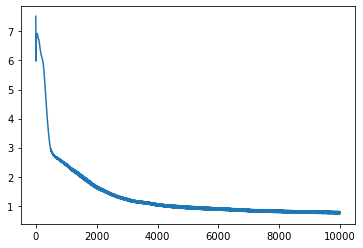

In [44]:
plt.plot(history.history['val_mae'])

In [55]:
np.mean(np.absolute(y_test - y_predicted[0,:,0]))

0.6728725675853933

In [7]:
X, y, X_test, y_test = allocate_data(2013)

model = Sequential(
    [
        BatchNormalization(),
        Dense(16, activation = 'relu', input_shape=(n_counties, n_features)),
        Dense(1, activation = 'relu')
    ]
)

model.compile(loss='mse', metrics=['mae'], optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2))

history = model.fit(X, y, epochs=5000, validation_data = (X_test, y_test))

y_predicted = model.predict(X_test)

Epoch 1/5000
1/1 [==============================] - 1s 637ms/step - loss: 187.7254 - mae: 11.0086 - val_loss: 486.2358 - val_mae: 19.4877
Epoch 2/5000
1/1 [==============================] - 0s 20ms/step - loss: 182.6788 - mae: 10.8237 - val_loss: 419.2682 - val_mae: 18.2669
Epoch 3/5000
1/1 [==============================] - 0s 25ms/step - loss: 177.4903 - mae: 10.6286 - val_loss: 403.4734 - val_mae: 18.0142
Epoch 4/5000
1/1 [==============================] - 0s 25ms/step - loss: 172.1852 - mae: 10.4238 - val_loss: 408.7048 - val_mae: 18.2364
Epoch 5/5000
1/1 [==============================] - 0s 23ms/step - loss: 166.8046 - mae: 10.2113 - val_loss: 426.0069 - val_mae: 18.7414
Epoch 6/5000
1/1 [==============================] - 0s 24ms/step - loss: 161.3740 - mae: 9.9919 - val_loss: 451.4858 - val_mae: 19.4274
Epoch 7/5000
1/1 [==============================] - 0s 22ms/step - loss: 155.8997 - mae: 9.7650 - val_loss: 483.4329 - val_mae: 20.2413
Epoch 8/5000
1/1 [========================

Epoch 61/5000
1/1 [==============================] - 0s 21ms/step - loss: 38.0740 - mae: 3.7621 - val_loss: 433.1652 - val_mae: 19.5894
Epoch 62/5000
1/1 [==============================] - 0s 19ms/step - loss: 37.8177 - mae: 3.7260 - val_loss: 418.5423 - val_mae: 19.2277
Epoch 63/5000
1/1 [==============================] - 0s 20ms/step - loss: 37.5753 - mae: 3.6903 - val_loss: 404.3936 - val_mae: 18.8715
Epoch 64/5000
1/1 [==============================] - 0s 21ms/step - loss: 37.3491 - mae: 3.6559 - val_loss: 390.7118 - val_mae: 18.5200
Epoch 65/5000
1/1 [==============================] - 0s 19ms/step - loss: 37.1401 - mae: 3.6228 - val_loss: 377.4890 - val_mae: 18.1737
Epoch 66/5000
1/1 [==============================] - 0s 19ms/step - loss: 36.9479 - mae: 3.5919 - val_loss: 364.6806 - val_mae: 17.8326
Epoch 67/5000
1/1 [==============================] - 0s 22ms/step - loss: 36.7699 - mae: 3.5630 - val_loss: 352.2831 - val_mae: 17.4966
Epoch 68/5000
1/1 [=============================

Epoch 182/5000
1/1 [==============================] - 0s 19ms/step - loss: 26.9315 - mae: 2.6252 - val_loss: 46.8425 - val_mae: 4.3992
Epoch 183/5000
1/1 [==============================] - 0s 19ms/step - loss: 26.8411 - mae: 2.6195 - val_loss: 46.5168 - val_mae: 4.3798
Epoch 184/5000
1/1 [==============================] - 0s 19ms/step - loss: 26.7505 - mae: 2.6131 - val_loss: 46.1785 - val_mae: 4.3590
Epoch 185/5000
1/1 [==============================] - 0s 20ms/step - loss: 26.6601 - mae: 2.6063 - val_loss: 45.8316 - val_mae: 4.3374
Epoch 186/5000
1/1 [==============================] - 0s 19ms/step - loss: 26.5691 - mae: 2.5995 - val_loss: 45.4846 - val_mae: 4.3158
Epoch 187/5000
1/1 [==============================] - 0s 19ms/step - loss: 26.4778 - mae: 2.5929 - val_loss: 45.1460 - val_mae: 4.2949
Epoch 188/5000
1/1 [==============================] - 0s 20ms/step - loss: 26.3867 - mae: 2.5869 - val_loss: 44.8215 - val_mae: 4.2751
Epoch 189/5000
1/1 [==============================] - 0

Epoch 243/5000
1/1 [==============================] - 0s 20ms/step - loss: 21.4095 - mae: 2.2746 - val_loss: 31.0790 - val_mae: 3.3585
Epoch 244/5000
1/1 [==============================] - 0s 20ms/step - loss: 21.3127 - mae: 2.2702 - val_loss: 30.9318 - val_mae: 3.3495
Epoch 245/5000
1/1 [==============================] - 0s 19ms/step - loss: 21.2139 - mae: 2.2653 - val_loss: 30.7786 - val_mae: 3.3395
Epoch 246/5000
1/1 [==============================] - 0s 19ms/step - loss: 21.1143 - mae: 2.2600 - val_loss: 30.6083 - val_mae: 3.3271
Epoch 247/5000
1/1 [==============================] - 0s 19ms/step - loss: 21.0131 - mae: 2.2550 - val_loss: 30.4096 - val_mae: 3.3120
Epoch 248/5000
1/1 [==============================] - 0s 20ms/step - loss: 20.9100 - mae: 2.2502 - val_loss: 30.1964 - val_mae: 3.2956
Epoch 249/5000
1/1 [==============================] - 0s 19ms/step - loss: 20.8058 - mae: 2.2455 - val_loss: 29.9834 - val_mae: 3.2800
Epoch 250/5000
1/1 [==============================] - 0

Epoch 304/5000
1/1 [==============================] - 0s 21ms/step - loss: 14.0474 - mae: 1.8222 - val_loss: 18.0844 - val_mae: 2.3870
Epoch 305/5000
1/1 [==============================] - 0s 20ms/step - loss: 13.9253 - mae: 1.8140 - val_loss: 17.8914 - val_mae: 2.3723
Epoch 306/5000
1/1 [==============================] - 0s 21ms/step - loss: 13.8039 - mae: 1.8063 - val_loss: 17.6956 - val_mae: 2.3564
Epoch 307/5000
1/1 [==============================] - 0s 20ms/step - loss: 13.6836 - mae: 1.7983 - val_loss: 17.5044 - val_mae: 2.3411
Epoch 308/5000
1/1 [==============================] - 0s 19ms/step - loss: 13.5648 - mae: 1.7903 - val_loss: 17.3190 - val_mae: 2.3262
Epoch 309/5000
1/1 [==============================] - 0s 19ms/step - loss: 13.4469 - mae: 1.7826 - val_loss: 17.1378 - val_mae: 2.3123
Epoch 310/5000
1/1 [==============================] - 0s 20ms/step - loss: 13.3298 - mae: 1.7755 - val_loss: 16.9534 - val_mae: 2.2975
Epoch 311/5000
1/1 [==============================] - 0

Epoch 365/5000
1/1 [==============================] - 0s 20ms/step - loss: 8.4457 - mae: 1.4138 - val_loss: 10.1598 - val_mae: 1.6652
Epoch 366/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.3865 - mae: 1.4031 - val_loss: 9.9780 - val_mae: 1.6109
Epoch 367/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.3510 - mae: 1.3821 - val_loss: 10.1024 - val_mae: 1.6752
Epoch 368/5000
1/1 [==============================] - 0s 20ms/step - loss: 8.2928 - mae: 1.4088 - val_loss: 9.9305 - val_mae: 1.6250
Epoch 369/5000
1/1 [==============================] - 0s 21ms/step - loss: 8.2278 - mae: 1.3822 - val_loss: 9.8284 - val_mae: 1.6000
Epoch 370/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.1870 - mae: 1.3714 - val_loss: 9.9287 - val_mae: 1.6532
Epoch 371/5000
1/1 [==============================] - 0s 20ms/step - loss: 8.1443 - mae: 1.3971 - val_loss: 9.7389 - val_mae: 1.5937
Epoch 372/5000
1/1 [==============================] - 0s 21ms/step 

Epoch 488/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.1311 - mae: 1.1111 - val_loss: 5.8157 - val_mae: 1.2123
Epoch 489/5000
1/1 [==============================] - 0s 19ms/step - loss: 5.1151 - mae: 1.1113 - val_loss: 5.7935 - val_mae: 1.2109
Epoch 490/5000
1/1 [==============================] - 0s 18ms/step - loss: 5.0989 - mae: 1.1106 - val_loss: 5.7704 - val_mae: 1.2093
Epoch 491/5000
1/1 [==============================] - 0s 19ms/step - loss: 5.0827 - mae: 1.1096 - val_loss: 5.7482 - val_mae: 1.2073
Epoch 492/5000
1/1 [==============================] - 0s 19ms/step - loss: 5.0665 - mae: 1.1096 - val_loss: 5.7251 - val_mae: 1.2058
Epoch 493/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.0501 - mae: 1.1076 - val_loss: 5.7108 - val_mae: 1.2052
Epoch 494/5000
1/1 [==============================] - 0s 19ms/step - loss: 5.0337 - mae: 1.1094 - val_loss: 5.6797 - val_mae: 1.2013
Epoch 495/5000
1/1 [==============================] - 0s 19ms/step - 

Epoch 611/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.0034 - mae: 1.0082 - val_loss: 4.4872 - val_mae: 1.0360
Epoch 612/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.8698 - mae: 0.9898 - val_loss: 4.4662 - val_mae: 1.0175
Epoch 613/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.8709 - mae: 0.9759 - val_loss: 4.5623 - val_mae: 1.0734
Epoch 614/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.9593 - mae: 1.0018 - val_loss: 4.5629 - val_mae: 1.0541
Epoch 615/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.9235 - mae: 1.0142 - val_loss: 4.4106 - val_mae: 1.0246
Epoch 616/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.8485 - mae: 0.9670 - val_loss: 4.4789 - val_mae: 1.0511
Epoch 617/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.8494 - mae: 0.9873 - val_loss: 4.4721 - val_mae: 1.0248
Epoch 618/5000
1/1 [==============================] - 0s 19ms/step - 

Epoch 734/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.2476 - mae: 0.8947 - val_loss: 3.8812 - val_mae: 0.9815
Epoch 735/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.2431 - mae: 0.9090 - val_loss: 3.8403 - val_mae: 0.9707
Epoch 736/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.2393 - mae: 0.8954 - val_loss: 3.8684 - val_mae: 0.9765
Epoch 737/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.2361 - mae: 0.9063 - val_loss: 3.8362 - val_mae: 0.9738
Epoch 738/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.2339 - mae: 0.8968 - val_loss: 3.8620 - val_mae: 0.9730
Epoch 739/5000
1/1 [==============================] - 0s 44ms/step - loss: 3.2327 - mae: 0.9052 - val_loss: 3.8325 - val_mae: 0.9770
Epoch 740/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.2328 - mae: 0.8981 - val_loss: 3.8661 - val_mae: 0.9740
Epoch 741/5000
1/1 [==============================] - 0s 19ms/step - 

Epoch 857/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.9333 - mae: 0.8967 - val_loss: 3.4973 - val_mae: 0.9189
Epoch 858/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.9203 - mae: 0.8466 - val_loss: 3.5243 - val_mae: 0.9535
Epoch 859/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.9035 - mae: 0.8722 - val_loss: 3.4897 - val_mae: 0.9155
Epoch 860/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.8900 - mae: 0.8449 - val_loss: 3.4757 - val_mae: 0.9343
Epoch 861/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.8843 - mae: 0.8524 - val_loss: 3.5103 - val_mae: 0.9360
Epoch 862/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.8872 - mae: 0.8650 - val_loss: 3.4640 - val_mae: 0.9325
Epoch 863/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.8957 - mae: 0.8517 - val_loss: 3.5389 - val_mae: 0.9576
Epoch 864/5000
1/1 [==============================] - 0s 21ms/step - 

Epoch 980/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.6326 - mae: 0.8108 - val_loss: 3.1834 - val_mae: 0.9056
Epoch 981/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.6314 - mae: 0.8219 - val_loss: 3.1612 - val_mae: 0.8854
Epoch 982/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.6073 - mae: 0.8103 - val_loss: 3.1474 - val_mae: 0.8774
Epoch 983/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.6090 - mae: 0.8033 - val_loss: 3.1807 - val_mae: 0.9080
Epoch 984/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.6250 - mae: 0.8255 - val_loss: 3.1495 - val_mae: 0.8753
Epoch 985/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.6115 - mae: 0.8028 - val_loss: 3.1475 - val_mae: 0.8886
Epoch 986/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.5999 - mae: 0.8096 - val_loss: 3.1492 - val_mae: 0.8875
Epoch 987/5000
1/1 [==============================] - 0s 20ms/step - 

1/1 [==============================] - 0s 22ms/step - loss: 2.3958 - mae: 0.7766 - val_loss: 2.9093 - val_mae: 0.8754
Epoch 1103/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.4013 - mae: 0.8027 - val_loss: 2.8950 - val_mae: 0.8738
Epoch 1104/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.4335 - mae: 0.7954 - val_loss: 2.9471 - val_mae: 0.8883
Epoch 1105/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.4322 - mae: 0.8181 - val_loss: 2.8778 - val_mae: 0.8666
Epoch 1106/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.4088 - mae: 0.7887 - val_loss: 2.8662 - val_mae: 0.8565
Epoch 1107/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.3782 - mae: 0.7842 - val_loss: 2.8717 - val_mae: 0.8539
Epoch 1108/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.3845 - mae: 0.7838 - val_loss: 2.8858 - val_mae: 0.8714
Epoch 1109/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.

1/1 [==============================] - 0s 20ms/step - loss: 2.1423 - mae: 0.7426 - val_loss: 2.6171 - val_mae: 0.8174
Epoch 1225/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.1379 - mae: 0.7414 - val_loss: 2.6050 - val_mae: 0.8132
Epoch 1226/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.1339 - mae: 0.7360 - val_loss: 2.6242 - val_mae: 0.8280
Epoch 1227/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.1363 - mae: 0.7458 - val_loss: 2.6065 - val_mae: 0.8081
Epoch 1228/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.1386 - mae: 0.7348 - val_loss: 2.6070 - val_mae: 0.8195
Epoch 1229/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.1285 - mae: 0.7399 - val_loss: 2.6100 - val_mae: 0.8218
Epoch 1230/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.1263 - mae: 0.7428 - val_loss: 2.5930 - val_mae: 0.8056
Epoch 1231/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.

1/1 [==============================] - 0s 21ms/step - loss: 1.9375 - mae: 0.7063 - val_loss: 2.3965 - val_mae: 0.7802
Epoch 1347/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.9331 - mae: 0.6970 - val_loss: 2.3865 - val_mae: 0.7636
Epoch 1348/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.9401 - mae: 0.6875 - val_loss: 2.4224 - val_mae: 0.7979
Epoch 1349/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9389 - mae: 0.7148 - val_loss: 2.3796 - val_mae: 0.7726
Epoch 1350/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.9430 - mae: 0.6936 - val_loss: 2.4413 - val_mae: 0.7967
Epoch 1351/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.9500 - mae: 0.7169 - val_loss: 2.3862 - val_mae: 0.7766
Epoch 1352/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9448 - mae: 0.6943 - val_loss: 2.4252 - val_mae: 0.7921
Epoch 1353/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.

1/1 [==============================] - 0s 19ms/step - loss: 1.7973 - mae: 0.6592 - val_loss: 2.2335 - val_mae: 0.7531
Epoch 1469/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.8000 - mae: 0.6852 - val_loss: 2.1734 - val_mae: 0.7294
Epoch 1470/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7999 - mae: 0.6627 - val_loss: 2.2355 - val_mae: 0.7543
Epoch 1471/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.8003 - mae: 0.6867 - val_loss: 2.1701 - val_mae: 0.7269
Epoch 1472/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7978 - mae: 0.6606 - val_loss: 2.2322 - val_mae: 0.7562
Epoch 1473/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7956 - mae: 0.6873 - val_loss: 2.1719 - val_mae: 0.7280
Epoch 1474/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7965 - mae: 0.6600 - val_loss: 2.2376 - val_mae: 0.7527
Epoch 1475/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.

1/1 [==============================] - 0s 20ms/step - loss: 1.6704 - mae: 0.6354 - val_loss: 2.0260 - val_mae: 0.6954
Epoch 1591/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.6604 - mae: 0.6386 - val_loss: 2.0311 - val_mae: 0.7009
Epoch 1592/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6620 - mae: 0.6428 - val_loss: 2.0373 - val_mae: 0.6858
Epoch 1593/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.6675 - mae: 0.6336 - val_loss: 2.0261 - val_mae: 0.6973
Epoch 1594/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.6577 - mae: 0.6407 - val_loss: 2.0236 - val_mae: 0.6979
Epoch 1595/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.6585 - mae: 0.6405 - val_loss: 2.0359 - val_mae: 0.6876
Epoch 1596/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6640 - mae: 0.6354 - val_loss: 2.0196 - val_mae: 0.6953
Epoch 1597/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.

1/1 [==============================] - 0s 20ms/step - loss: 1.5559 - mae: 0.6169 - val_loss: 1.9076 - val_mae: 0.6816
Epoch 1713/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.5493 - mae: 0.6318 - val_loss: 1.8632 - val_mae: 0.6592
Epoch 1714/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5446 - mae: 0.6124 - val_loss: 1.8886 - val_mae: 0.6741
Epoch 1715/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5406 - mae: 0.6242 - val_loss: 1.8645 - val_mae: 0.6586
Epoch 1716/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.5377 - mae: 0.6112 - val_loss: 1.8744 - val_mae: 0.6669
Epoch 1717/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.5355 - mae: 0.6175 - val_loss: 1.8678 - val_mae: 0.6619
Epoch 1718/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.5341 - mae: 0.6136 - val_loss: 1.8644 - val_mae: 0.6614
Epoch 1719/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.

1/1 [==============================] - 0s 20ms/step - loss: 1.4897 - mae: 0.6408 - val_loss: 1.7751 - val_mae: 0.6567
Epoch 1835/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.4764 - mae: 0.6103 - val_loss: 1.8400 - val_mae: 0.6854
Epoch 1836/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4657 - mae: 0.6383 - val_loss: 1.7658 - val_mae: 0.6450
Epoch 1837/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.4625 - mae: 0.6020 - val_loss: 1.8166 - val_mae: 0.6781
Epoch 1838/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4527 - mae: 0.6302 - val_loss: 1.7577 - val_mae: 0.6351
Epoch 1839/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.4444 - mae: 0.5925 - val_loss: 1.7848 - val_mae: 0.6551
Epoch 1840/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.4341 - mae: 0.6095 - val_loss: 1.7534 - val_mae: 0.6340
Epoch 1841/5000
1/1 [==============================] - 0s 43ms/step - loss: 1.

1/1 [==============================] - 0s 19ms/step - loss: 1.3743 - mae: 0.6218 - val_loss: 1.6839 - val_mae: 0.6250
Epoch 1957/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.3615 - mae: 0.5800 - val_loss: 1.7273 - val_mae: 0.6359
Epoch 1958/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3496 - mae: 0.5942 - val_loss: 1.6815 - val_mae: 0.6241
Epoch 1959/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3444 - mae: 0.5783 - val_loss: 1.7115 - val_mae: 0.6184
Epoch 1960/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.3438 - mae: 0.5782 - val_loss: 1.6858 - val_mae: 0.6269
Epoch 1961/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.3356 - mae: 0.5826 - val_loss: 1.6836 - val_mae: 0.6137
Epoch 1962/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3316 - mae: 0.5723 - val_loss: 1.6929 - val_mae: 0.6240
Epoch 1963/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.

1/1 [==============================] - 0s 19ms/step - loss: 1.2493 - mae: 0.5600 - val_loss: 1.5899 - val_mae: 0.6004
Epoch 2079/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2475 - mae: 0.5551 - val_loss: 1.6109 - val_mae: 0.6100
Epoch 2080/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2473 - mae: 0.5659 - val_loss: 1.5834 - val_mae: 0.5959
Epoch 2081/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2484 - mae: 0.5523 - val_loss: 1.6142 - val_mae: 0.6189
Epoch 2082/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2497 - mae: 0.5747 - val_loss: 1.5793 - val_mae: 0.5964
Epoch 2083/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2518 - mae: 0.5535 - val_loss: 1.6207 - val_mae: 0.6256
Epoch 2084/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2533 - mae: 0.5813 - val_loss: 1.5770 - val_mae: 0.5993
Epoch 2085/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.

1/1 [==============================] - 0s 20ms/step - loss: 1.2503 - mae: 0.5757 - val_loss: 1.5865 - val_mae: 0.6494
Epoch 2201/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2280 - mae: 0.6059 - val_loss: 1.4898 - val_mae: 0.5957
Epoch 2202/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2111 - mae: 0.5511 - val_loss: 1.5298 - val_mae: 0.6045
Epoch 2203/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1909 - mae: 0.5653 - val_loss: 1.4775 - val_mae: 0.5848
Epoch 2204/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.1798 - mae: 0.5410 - val_loss: 1.4910 - val_mae: 0.5740
Epoch 2205/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.1758 - mae: 0.5368 - val_loss: 1.4873 - val_mae: 0.6014
Epoch 2206/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.1748 - mae: 0.5581 - val_loss: 1.4744 - val_mae: 0.5714
Epoch 2207/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.

1/1 [==============================] - 0s 20ms/step - loss: 1.1100 - mae: 0.5467 - val_loss: 1.4068 - val_mae: 0.5638
Epoch 2323/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1031 - mae: 0.5185 - val_loss: 1.4258 - val_mae: 0.5863
Epoch 2324/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.1010 - mae: 0.5407 - val_loss: 1.4166 - val_mae: 0.5614
Epoch 2325/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.1021 - mae: 0.5181 - val_loss: 1.4215 - val_mae: 0.5820
Epoch 2326/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1038 - mae: 0.5345 - val_loss: 1.4323 - val_mae: 0.5677
Epoch 2327/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1058 - mae: 0.5257 - val_loss: 1.4167 - val_mae: 0.5763
Epoch 2328/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.1083 - mae: 0.5287 - val_loss: 1.4492 - val_mae: 0.5821
Epoch 2329/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.

1/1 [==============================] - 0s 20ms/step - loss: 1.0439 - mae: 0.5249 - val_loss: 1.3750 - val_mae: 0.5598
Epoch 2445/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0421 - mae: 0.5106 - val_loss: 1.3732 - val_mae: 0.5691
Epoch 2446/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0405 - mae: 0.5177 - val_loss: 1.3765 - val_mae: 0.5648
Epoch 2447/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0397 - mae: 0.5152 - val_loss: 1.3683 - val_mae: 0.5632
Epoch 2448/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0396 - mae: 0.5118 - val_loss: 1.3830 - val_mae: 0.5730
Epoch 2449/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0403 - mae: 0.5225 - val_loss: 1.3672 - val_mae: 0.5612
Epoch 2450/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0419 - mae: 0.5097 - val_loss: 1.3925 - val_mae: 0.5820
Epoch 2451/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.

1/1 [==============================] - 0s 20ms/step - loss: 1.0274 - mae: 0.5222 - val_loss: 1.3664 - val_mae: 0.5713
Epoch 2567/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0124 - mae: 0.5187 - val_loss: 1.3286 - val_mae: 0.5607
Epoch 2568/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9977 - mae: 0.5044 - val_loss: 1.3454 - val_mae: 0.5761
Epoch 2569/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9984 - mae: 0.5189 - val_loss: 1.3488 - val_mae: 0.5575
Epoch 2570/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0075 - mae: 0.5041 - val_loss: 1.3465 - val_mae: 0.5789
Epoch 2571/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0064 - mae: 0.5210 - val_loss: 1.3498 - val_mae: 0.5634
Epoch 2572/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0032 - mae: 0.5114 - val_loss: 1.3261 - val_mae: 0.5627
Epoch 2573/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.9545 - mae: 0.5069 - val_loss: 1.2689 - val_mae: 0.5489
Epoch 2689/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9582 - mae: 0.5058 - val_loss: 1.2623 - val_mae: 0.5559
Epoch 2690/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9641 - mae: 0.5074 - val_loss: 1.2923 - val_mae: 0.5608
Epoch 2691/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9710 - mae: 0.5178 - val_loss: 1.2628 - val_mae: 0.5566
Epoch 2692/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9691 - mae: 0.5067 - val_loss: 1.2920 - val_mae: 0.5708
Epoch 2693/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9686 - mae: 0.5264 - val_loss: 1.2621 - val_mae: 0.5553
Epoch 2694/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9701 - mae: 0.5063 - val_loss: 1.2906 - val_mae: 0.5734
Epoch 2695/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.9278 - mae: 0.5118 - val_loss: 1.2301 - val_mae: 0.5522
Epoch 2811/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9445 - mae: 0.5044 - val_loss: 1.2856 - val_mae: 0.5708
Epoch 2812/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9629 - mae: 0.5312 - val_loss: 1.2441 - val_mae: 0.5642
Epoch 2813/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.9615 - mae: 0.5149 - val_loss: 1.2728 - val_mae: 0.5786
Epoch 2814/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9541 - mae: 0.5374 - val_loss: 1.2311 - val_mae: 0.5566
Epoch 2815/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9502 - mae: 0.5113 - val_loss: 1.2576 - val_mae: 0.5827
Epoch 2816/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9454 - mae: 0.5374 - val_loss: 1.2290 - val_mae: 0.5410
Epoch 2817/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.8963 - mae: 0.4987 - val_loss: 1.1788 - val_mae: 0.5323
Epoch 2933/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8936 - mae: 0.4949 - val_loss: 1.1746 - val_mae: 0.5455
Epoch 2934/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8916 - mae: 0.5042 - val_loss: 1.1706 - val_mae: 0.5312
Epoch 2935/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8901 - mae: 0.4924 - val_loss: 1.1771 - val_mae: 0.5444
Epoch 2936/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8891 - mae: 0.5040 - val_loss: 1.1680 - val_mae: 0.5337
Epoch 2937/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8896 - mae: 0.4924 - val_loss: 1.1845 - val_mae: 0.5411
Epoch 2938/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8914 - mae: 0.5016 - val_loss: 1.1720 - val_mae: 0.5382
Epoch 2939/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.8605 - mae: 0.4877 - val_loss: 1.1531 - val_mae: 0.5408
Epoch 3055/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8619 - mae: 0.5021 - val_loss: 1.1414 - val_mae: 0.5297
Epoch 3056/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8642 - mae: 0.4895 - val_loss: 1.1610 - val_mae: 0.5462
Epoch 3057/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8664 - mae: 0.5077 - val_loss: 1.1459 - val_mae: 0.5359
Epoch 3058/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8711 - mae: 0.4941 - val_loss: 1.1754 - val_mae: 0.5539
Epoch 3059/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8760 - mae: 0.5158 - val_loss: 1.1578 - val_mae: 0.5477
Epoch 3060/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8863 - mae: 0.5036 - val_loss: 1.2041 - val_mae: 0.5691
Epoch 3061/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.8359 - mae: 0.4843 - val_loss: 1.1123 - val_mae: 0.5368
Epoch 3177/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8372 - mae: 0.4985 - val_loss: 1.1108 - val_mae: 0.5183
Epoch 3178/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8368 - mae: 0.4845 - val_loss: 1.1098 - val_mae: 0.5339
Epoch 3179/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8345 - mae: 0.4959 - val_loss: 1.1075 - val_mae: 0.5184
Epoch 3180/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8319 - mae: 0.4844 - val_loss: 1.1046 - val_mae: 0.5272
Epoch 3181/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8296 - mae: 0.4903 - val_loss: 1.1052 - val_mae: 0.5220
Epoch 3182/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8283 - mae: 0.4870 - val_loss: 1.1014 - val_mae: 0.5209
Epoch 3183/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.8105 - mae: 0.4872 - val_loss: 1.0619 - val_mae: 0.5138
Epoch 3299/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8110 - mae: 0.4822 - val_loss: 1.0709 - val_mae: 0.5173
Epoch 3300/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8119 - mae: 0.4888 - val_loss: 1.0625 - val_mae: 0.5151
Epoch 3301/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8132 - mae: 0.4831 - val_loss: 1.0751 - val_mae: 0.5199
Epoch 3302/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8149 - mae: 0.4920 - val_loss: 1.0650 - val_mae: 0.5179
Epoch 3303/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8173 - mae: 0.4851 - val_loss: 1.0822 - val_mae: 0.5241
Epoch 3304/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8202 - mae: 0.4965 - val_loss: 1.0702 - val_mae: 0.5223
Epoch 3305/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.8370 - mae: 0.5078 - val_loss: 1.0642 - val_mae: 0.5366
Epoch 3421/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8195 - mae: 0.5137 - val_loss: 1.0323 - val_mae: 0.5105
Epoch 3422/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8062 - mae: 0.4846 - val_loss: 1.0311 - val_mae: 0.5093
Epoch 3423/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7942 - mae: 0.4867 - val_loss: 1.0259 - val_mae: 0.5044
Epoch 3424/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7901 - mae: 0.4807 - val_loss: 1.0278 - val_mae: 0.5055
Epoch 3425/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7948 - mae: 0.4794 - val_loss: 1.0485 - val_mae: 0.5255
Epoch 3426/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8031 - mae: 0.5004 - val_loss: 1.0433 - val_mae: 0.5214
Epoch 3427/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.8114 - mae: 0.5229 - val_loss: 1.0384 - val_mae: 0.5292
Epoch 3543/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8183 - mae: 0.5045 - val_loss: 1.0619 - val_mae: 0.5433
Epoch 3544/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8195 - mae: 0.5223 - val_loss: 1.0529 - val_mae: 0.5339
Epoch 3545/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8315 - mae: 0.5046 - val_loss: 1.0945 - val_mae: 0.5315
Epoch 3546/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8394 - mae: 0.5123 - val_loss: 1.0484 - val_mae: 0.5228
Epoch 3547/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8228 - mae: 0.4938 - val_loss: 1.0422 - val_mae: 0.5044
Epoch 3548/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.8010 - mae: 0.4864 - val_loss: 0.9992 - val_mae: 0.5006
Epoch 3549/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.7866 - mae: 0.4861 - val_loss: 1.0244 - val_mae: 0.5246
Epoch 3665/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7955 - mae: 0.5061 - val_loss: 1.0207 - val_mae: 0.5283
Epoch 3666/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8096 - mae: 0.5009 - val_loss: 1.0559 - val_mae: 0.5427
Epoch 3667/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8214 - mae: 0.5239 - val_loss: 1.0378 - val_mae: 0.5430
Epoch 3668/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8289 - mae: 0.5161 - val_loss: 1.0584 - val_mae: 0.5549
Epoch 3669/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8268 - mae: 0.5350 - val_loss: 1.0281 - val_mae: 0.5390
Epoch 3670/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8219 - mae: 0.5147 - val_loss: 1.0263 - val_mae: 0.5436
Epoch 3671/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.7653 - mae: 0.4773 - val_loss: 0.9861 - val_mae: 0.4903
Epoch 3787/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7703 - mae: 0.4758 - val_loss: 0.9727 - val_mae: 0.5079
Epoch 3788/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7644 - mae: 0.4839 - val_loss: 0.9687 - val_mae: 0.4873
Epoch 3789/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7583 - mae: 0.4705 - val_loss: 0.9608 - val_mae: 0.5026
Epoch 3790/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7529 - mae: 0.4815 - val_loss: 0.9560 - val_mae: 0.4871
Epoch 3791/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7496 - mae: 0.4689 - val_loss: 0.9573 - val_mae: 0.4938
Epoch 3792/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7492 - mae: 0.4773 - val_loss: 0.9565 - val_mae: 0.4930
Epoch 3793/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.7886 - mae: 0.5017 - val_loss: 0.9790 - val_mae: 0.5289
Epoch 3909/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7837 - mae: 0.5163 - val_loss: 0.9669 - val_mae: 0.5209
Epoch 3910/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7831 - mae: 0.4999 - val_loss: 0.9643 - val_mae: 0.5198
Epoch 3911/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7721 - mae: 0.5078 - val_loss: 0.9469 - val_mae: 0.5038
Epoch 3912/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7630 - mae: 0.4832 - val_loss: 0.9434 - val_mae: 0.4965
Epoch 3913/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7524 - mae: 0.4856 - val_loss: 0.9332 - val_mae: 0.4922
Epoch 3914/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7465 - mae: 0.4728 - val_loss: 0.9351 - val_mae: 0.4820
Epoch 3915/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 21ms/step - loss: 0.7607 - mae: 0.4825 - val_loss: 0.9520 - val_mae: 0.5125
Epoch 4031/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7713 - mae: 0.4899 - val_loss: 0.9640 - val_mae: 0.5276
Epoch 4032/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7788 - mae: 0.5172 - val_loss: 0.9633 - val_mae: 0.5301
Epoch 4033/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7882 - mae: 0.5114 - val_loss: 0.9745 - val_mae: 0.5569
Epoch 4034/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7949 - mae: 0.5393 - val_loss: 0.9792 - val_mae: 0.5209
Epoch 4035/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7998 - mae: 0.5092 - val_loss: 0.9318 - val_mae: 0.5167
Epoch 4036/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7542 - mae: 0.5016 - val_loss: 0.9035 - val_mae: 0.4777
Epoch 4037/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.7267 - mae: 0.4828 - val_loss: 0.9095 - val_mae: 0.4906
Epoch 4153/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7311 - mae: 0.4734 - val_loss: 0.9189 - val_mae: 0.4979
Epoch 4154/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7364 - mae: 0.4880 - val_loss: 0.9228 - val_mae: 0.5006
Epoch 4155/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7440 - mae: 0.4806 - val_loss: 0.9345 - val_mae: 0.5012
Epoch 4156/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7501 - mae: 0.4927 - val_loss: 0.9223 - val_mae: 0.5010
Epoch 4157/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7440 - mae: 0.4807 - val_loss: 0.9185 - val_mae: 0.4994
Epoch 4158/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7376 - mae: 0.4891 - val_loss: 0.9111 - val_mae: 0.4942
Epoch 4159/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.7893 - mae: 0.5208 - val_loss: 0.9513 - val_mae: 0.5379
Epoch 4275/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7682 - mae: 0.5265 - val_loss: 0.9260 - val_mae: 0.5127
Epoch 4276/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7504 - mae: 0.4930 - val_loss: 0.9083 - val_mae: 0.4962
Epoch 4277/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7269 - mae: 0.4863 - val_loss: 0.8963 - val_mae: 0.4889
Epoch 4278/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7165 - mae: 0.4714 - val_loss: 0.8987 - val_mae: 0.4769
Epoch 4279/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7175 - mae: 0.4659 - val_loss: 0.8989 - val_mae: 0.5001
Epoch 4280/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7172 - mae: 0.4846 - val_loss: 0.9025 - val_mae: 0.4937
Epoch 4281/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.7001 - mae: 0.4666 - val_loss: 0.8751 - val_mae: 0.4796
Epoch 4397/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7000 - mae: 0.4668 - val_loss: 0.8750 - val_mae: 0.4787
Epoch 4398/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7001 - mae: 0.4654 - val_loss: 0.8760 - val_mae: 0.4808
Epoch 4399/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7002 - mae: 0.4681 - val_loss: 0.8761 - val_mae: 0.4806
Epoch 4400/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7005 - mae: 0.4662 - val_loss: 0.8776 - val_mae: 0.4820
Epoch 4401/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7010 - mae: 0.4696 - val_loss: 0.8767 - val_mae: 0.4812
Epoch 4402/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7015 - mae: 0.4663 - val_loss: 0.8786 - val_mae: 0.4816
Epoch 4403/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.7010 - mae: 0.4672 - val_loss: 0.8806 - val_mae: 0.4966
Epoch 4519/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7061 - mae: 0.4791 - val_loss: 0.8892 - val_mae: 0.4820
Epoch 4520/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7154 - mae: 0.4700 - val_loss: 0.8883 - val_mae: 0.5081
Epoch 4521/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7132 - mae: 0.4921 - val_loss: 0.8849 - val_mae: 0.4933
Epoch 4522/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7148 - mae: 0.4768 - val_loss: 0.8931 - val_mae: 0.5034
Epoch 4523/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7176 - mae: 0.4925 - val_loss: 0.8989 - val_mae: 0.5050
Epoch 4524/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7283 - mae: 0.4837 - val_loss: 0.9229 - val_mae: 0.5019
Epoch 4525/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.7179 - mae: 0.4830 - val_loss: 0.9212 - val_mae: 0.5066
Epoch 4641/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7453 - mae: 0.4971 - val_loss: 0.9303 - val_mae: 0.5230
Epoch 4642/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7630 - mae: 0.4975 - val_loss: 0.9422 - val_mae: 0.5067
Epoch 4643/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7632 - mae: 0.4976 - val_loss: 0.9115 - val_mae: 0.5136
Epoch 4644/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7479 - mae: 0.4916 - val_loss: 0.8885 - val_mae: 0.4936
Epoch 4645/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7227 - mae: 0.4872 - val_loss: 0.8538 - val_mae: 0.4843
Epoch 4646/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6992 - mae: 0.4709 - val_loss: 0.8618 - val_mae: 0.4973
Epoch 4647/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.7314 - mae: 0.5016 - val_loss: 0.8948 - val_mae: 0.5193
Epoch 4763/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7363 - mae: 0.4978 - val_loss: 0.9078 - val_mae: 0.5201
Epoch 4764/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7375 - mae: 0.5091 - val_loss: 0.8897 - val_mae: 0.5190
Epoch 4765/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7336 - mae: 0.4988 - val_loss: 0.8879 - val_mae: 0.5173
Epoch 4766/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7242 - mae: 0.5057 - val_loss: 0.8718 - val_mae: 0.5066
Epoch 4767/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7182 - mae: 0.4886 - val_loss: 0.8672 - val_mae: 0.5006
Epoch 4768/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7068 - mae: 0.4899 - val_loss: 0.8538 - val_mae: 0.4913
Epoch 4769/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.7166 - mae: 0.5070 - val_loss: 0.9207 - val_mae: 0.5434
Epoch 4885/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7535 - mae: 0.5223 - val_loss: 0.9681 - val_mae: 0.5654
Epoch 4886/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7847 - mae: 0.5526 - val_loss: 0.9850 - val_mae: 0.5822
Epoch 4887/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8200 - mae: 0.5601 - val_loss: 0.9946 - val_mae: 0.5812
Epoch 4888/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8090 - mae: 0.5685 - val_loss: 0.9479 - val_mae: 0.5594
Epoch 4889/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7848 - mae: 0.5385 - val_loss: 0.9113 - val_mae: 0.5246
Epoch 4890/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7302 - mae: 0.5129 - val_loss: 0.8536 - val_mae: 0.4923
Epoch 4891/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.

0.4856438557664343

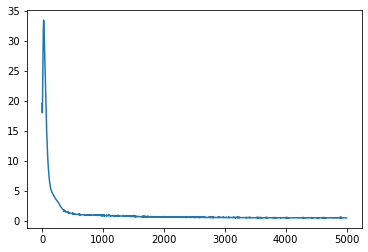

In [9]:
plt.plot(history.history['val_mae'])
np.mean(np.absolute(y_test - y_predicted[0,:,0]))

In [10]:
X, y, X_test, y_test = allocate_data(2013)

model = Sequential(
    [
        BatchNormalization(),
        Dense(16, activation = 'relu', input_shape=(n_counties, n_features)),
        Dense(1, activation = 'relu')
    ]
)

model.compile(loss='mse', metrics=['mae'], optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1))

history = model.fit(X, y, epochs=2500, validation_data = (X_test, y_test))

y_predicted = model.predict(X_test)

Epoch 1/2500
1/1 [==============================] - 1s 517ms/step - loss: 214.8545 - mae: 11.8665 - val_loss: 611.5419 - val_mae: 20.4160
Epoch 2/2500
1/1 [==============================] - 0s 20ms/step - loss: 182.4242 - mae: 10.5999 - val_loss: 2580.5767 - val_mae: 46.0949
Epoch 3/2500
1/1 [==============================] - 0s 24ms/step - loss: 146.4430 - mae: 9.0044 - val_loss: 6026.6953 - val_mae: 72.8899
Epoch 4/2500
1/1 [==============================] - 0s 24ms/step - loss: 115.4895 - mae: 7.6589 - val_loss: 7353.6489 - val_mae: 82.4525
Epoch 5/2500
1/1 [==============================] - 0s 21ms/step - loss: 93.2892 - mae: 6.8789 - val_loss: 7458.1162 - val_mae: 84.7140
Epoch 6/2500
1/1 [==============================] - 0s 21ms/step - loss: 68.2540 - mae: 5.8530 - val_loss: 7629.6348 - val_mae: 86.4173
Epoch 7/2500
1/1 [==============================] - 0s 23ms/step - loss: 53.0306 - mae: 5.0037 - val_loss: 7010.8145 - val_mae: 82.8227
Epoch 8/2500
1/1 [========================

1/1 [==============================] - 0s 21ms/step - loss: 13.2022 - mae: 1.9239 - val_loss: 32.3584 - val_mae: 4.5338
Epoch 123/2500
1/1 [==============================] - 0s 22ms/step - loss: 14.2674 - mae: 2.4390 - val_loss: 22.1421 - val_mae: 3.3134
Epoch 124/2500
1/1 [==============================] - 0s 21ms/step - loss: 11.9682 - mae: 1.7609 - val_loss: 18.6828 - val_mae: 2.6793
Epoch 125/2500
1/1 [==============================] - 0s 21ms/step - loss: 13.1361 - mae: 1.9790 - val_loss: 27.0522 - val_mae: 3.9883
Epoch 126/2500
1/1 [==============================] - 0s 22ms/step - loss: 12.4547 - mae: 2.0931 - val_loss: 23.3877 - val_mae: 3.5472
Epoch 127/2500
1/1 [==============================] - 0s 22ms/step - loss: 11.4971 - mae: 1.8155 - val_loss: 17.4670 - val_mae: 2.5523
Epoch 128/2500
1/1 [==============================] - 0s 22ms/step - loss: 12.4744 - mae: 1.9386 - val_loss: 22.5283 - val_mae: 3.4868
Epoch 129/2500
1/1 [==============================] - 0s 20ms/step - l

Epoch 245/2500
1/1 [==============================] - 0s 21ms/step - loss: 4.1497 - mae: 1.0170 - val_loss: 6.0202 - val_mae: 1.5395
Epoch 246/2500
1/1 [==============================] - 0s 20ms/step - loss: 4.3010 - mae: 1.1627 - val_loss: 5.0287 - val_mae: 1.1324
Epoch 247/2500
1/1 [==============================] - 0s 22ms/step - loss: 5.1430 - mae: 1.2883 - val_loss: 6.8445 - val_mae: 1.7791
Epoch 248/2500
1/1 [==============================] - 0s 21ms/step - loss: 4.6480 - mae: 1.3508 - val_loss: 4.7586 - val_mae: 1.1453
Epoch 249/2500
1/1 [==============================] - 0s 21ms/step - loss: 4.0992 - mae: 0.9708 - val_loss: 5.0793 - val_mae: 1.3041
Epoch 250/2500
1/1 [==============================] - 0s 22ms/step - loss: 3.9160 - mae: 0.9496 - val_loss: 6.4236 - val_mae: 1.6738
Epoch 251/2500
1/1 [==============================] - 0s 22ms/step - loss: 4.1817 - mae: 1.1445 - val_loss: 4.4772 - val_mae: 1.0212
Epoch 252/2500
1/1 [==============================] - 0s 21ms/step - 

Epoch 368/2500
1/1 [==============================] - 0s 22ms/step - loss: 4.3694 - mae: 1.2883 - val_loss: 5.5308 - val_mae: 1.6768
Epoch 369/2500
1/1 [==============================] - 0s 22ms/step - loss: 4.5680 - mae: 1.5382 - val_loss: 4.8588 - val_mae: 1.3767
Epoch 370/2500
1/1 [==============================] - 0s 21ms/step - loss: 5.4204 - mae: 1.4853 - val_loss: 4.9024 - val_mae: 1.5207
Epoch 371/2500
1/1 [==============================] - 0s 22ms/step - loss: 4.0925 - mae: 1.3855 - val_loss: 3.4124 - val_mae: 0.8682
Epoch 372/2500
1/1 [==============================] - 0s 22ms/step - loss: 3.2391 - mae: 0.8841 - val_loss: 3.3163 - val_mae: 0.8975
Epoch 373/2500
1/1 [==============================] - 0s 21ms/step - loss: 3.0827 - mae: 0.8668 - val_loss: 4.5305 - val_mae: 1.3359
Epoch 374/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.6793 - mae: 1.2240 - val_loss: 4.5179 - val_mae: 1.2847
Epoch 375/2500
1/1 [==============================] - 0s 19ms/step - 

Epoch 491/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.8880 - mae: 1.2583 - val_loss: 3.9755 - val_mae: 1.3483
Epoch 492/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.4241 - mae: 1.2791 - val_loss: 3.1021 - val_mae: 0.9825
Epoch 493/2500
1/1 [==============================] - 0s 21ms/step - loss: 3.1491 - mae: 1.0014 - val_loss: 2.6516 - val_mae: 0.8074
Epoch 494/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.3979 - mae: 0.7690 - val_loss: 3.3482 - val_mae: 1.0919
Epoch 495/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.8982 - mae: 1.0462 - val_loss: 4.0286 - val_mae: 1.2730
Epoch 496/2500
1/1 [==============================] - 0s 22ms/step - loss: 3.9132 - mae: 1.2599 - val_loss: 3.4947 - val_mae: 1.0561
Epoch 497/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.9557 - mae: 1.0106 - val_loss: 3.0383 - val_mae: 0.9175
Epoch 498/2500
1/1 [==============================] - 0s 21ms/step - 

Epoch 614/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.8066 - mae: 1.4601 - val_loss: 2.8514 - val_mae: 0.8816
Epoch 615/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.6501 - mae: 0.8677 - val_loss: 2.9962 - val_mae: 0.9811
Epoch 616/2500
1/1 [==============================] - 0s 22ms/step - loss: 2.8546 - mae: 0.9688 - val_loss: 3.4951 - val_mae: 1.2639
Epoch 617/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.0161 - mae: 1.2122 - val_loss: 2.2405 - val_mae: 0.7077
Epoch 618/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.9560 - mae: 0.6858 - val_loss: 2.7685 - val_mae: 0.9711
Epoch 619/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.5604 - mae: 0.9433 - val_loss: 2.5025 - val_mae: 0.8750
Epoch 620/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.0830 - mae: 0.8439 - val_loss: 2.2841 - val_mae: 0.7975
Epoch 621/2500
1/1 [==============================] - 0s 22ms/step - 

Epoch 737/2500
1/1 [==============================] - 0s 42ms/step - loss: 1.9488 - mae: 0.8036 - val_loss: 1.9478 - val_mae: 0.8276
Epoch 738/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.6442 - mae: 0.7897 - val_loss: 1.6900 - val_mae: 0.6331
Epoch 739/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.4856 - mae: 0.6165 - val_loss: 1.6620 - val_mae: 0.6516
Epoch 740/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.4489 - mae: 0.6222 - val_loss: 1.8729 - val_mae: 0.7460
Epoch 741/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.5657 - mae: 0.7253 - val_loss: 2.0317 - val_mae: 0.8161
Epoch 742/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.8692 - mae: 0.7850 - val_loss: 2.4796 - val_mae: 1.0045
Epoch 743/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.0844 - mae: 0.9671 - val_loss: 3.0034 - val_mae: 1.0780
Epoch 744/2500
1/1 [==============================] - 0s 20ms/step - 

Epoch 860/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.4370 - mae: 0.6422 - val_loss: 1.8963 - val_mae: 0.8047
Epoch 861/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.6962 - mae: 0.7981 - val_loss: 2.3596 - val_mae: 0.9391
Epoch 862/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.2452 - mae: 0.9054 - val_loss: 2.2552 - val_mae: 0.9693
Epoch 863/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.9514 - mae: 0.9571 - val_loss: 1.8071 - val_mae: 0.7165
Epoch 864/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.6044 - mae: 0.6879 - val_loss: 1.6681 - val_mae: 0.6356
Epoch 865/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.4553 - mae: 0.6228 - val_loss: 2.1659 - val_mae: 0.8900
Epoch 866/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.8186 - mae: 0.8654 - val_loss: 1.8269 - val_mae: 0.7495
Epoch 867/2500
1/1 [==============================] - 0s 21ms/step - 

Epoch 983/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.3548 - mae: 0.6977 - val_loss: 1.4874 - val_mae: 0.6257
Epoch 984/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.2368 - mae: 0.5997 - val_loss: 1.5905 - val_mae: 0.6373
Epoch 985/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.2878 - mae: 0.6190 - val_loss: 1.6456 - val_mae: 0.7198
Epoch 986/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.3371 - mae: 0.6687 - val_loss: 1.4716 - val_mae: 0.6389
Epoch 987/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.2165 - mae: 0.6014 - val_loss: 1.6438 - val_mae: 0.6706
Epoch 988/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.3127 - mae: 0.6414 - val_loss: 1.6526 - val_mae: 0.7200
Epoch 989/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.3577 - mae: 0.6677 - val_loss: 1.4303 - val_mae: 0.6104
Epoch 990/2500
1/1 [==============================] - 0s 20ms/step - 

1/1 [==============================] - 0s 20ms/step - loss: 2.0682 - mae: 1.0075 - val_loss: 1.4482 - val_mae: 0.6434
Epoch 1106/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.2773 - mae: 0.6228 - val_loss: 2.0553 - val_mae: 0.8513
Epoch 1107/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.8898 - mae: 0.8186 - val_loss: 1.6371 - val_mae: 0.7652
Epoch 1108/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.4859 - mae: 0.7466 - val_loss: 1.5731 - val_mae: 0.7255
Epoch 1109/2500
1/1 [==============================] - 0s 23ms/step - loss: 1.3955 - mae: 0.7129 - val_loss: 1.9046 - val_mae: 0.8226
Epoch 1110/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.6926 - mae: 0.8011 - val_loss: 1.3831 - val_mae: 0.6276
Epoch 1111/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.1750 - mae: 0.6036 - val_loss: 2.0049 - val_mae: 0.9290
Epoch 1112/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.

1/1 [==============================] - 0s 21ms/step - loss: 3.8606 - mae: 1.3778 - val_loss: 3.2026 - val_mae: 0.9295
Epoch 1228/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.8735 - mae: 0.8869 - val_loss: 3.6417 - val_mae: 1.0625
Epoch 1229/2500
1/1 [==============================] - 0s 21ms/step - loss: 3.5587 - mae: 1.0427 - val_loss: 3.2668 - val_mae: 0.9751
Epoch 1230/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.9839 - mae: 0.9403 - val_loss: 3.7855 - val_mae: 1.1651
Epoch 1231/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.3071 - mae: 1.1221 - val_loss: 2.8934 - val_mae: 0.8512
Epoch 1232/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.5069 - mae: 0.8013 - val_loss: 3.4645 - val_mae: 0.9964
Epoch 1233/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.9670 - mae: 0.9459 - val_loss: 3.6457 - val_mae: 1.0629
Epoch 1234/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.

1/1 [==============================] - 0s 20ms/step - loss: 1.3844 - mae: 0.6076 - val_loss: 1.8652 - val_mae: 0.6780
Epoch 1350/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.4223 - mae: 0.6294 - val_loss: 1.9000 - val_mae: 0.6293
Epoch 1351/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.4176 - mae: 0.6017 - val_loss: 1.8596 - val_mae: 0.6576
Epoch 1352/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.4272 - mae: 0.6149 - val_loss: 1.8633 - val_mae: 0.6133
Epoch 1353/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.3830 - mae: 0.5864 - val_loss: 1.8072 - val_mae: 0.6438
Epoch 1354/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.3529 - mae: 0.6027 - val_loss: 1.8022 - val_mae: 0.6340
Epoch 1355/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.3303 - mae: 0.5949 - val_loss: 1.8267 - val_mae: 0.6332
Epoch 1356/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.

1/1 [==============================] - 0s 21ms/step - loss: 1.4731 - mae: 0.6628 - val_loss: 2.1317 - val_mae: 0.7758
Epoch 1472/2500
1/1 [==============================] - 0s 23ms/step - loss: 1.6354 - mae: 0.7251 - val_loss: 2.0834 - val_mae: 0.7335
Epoch 1473/2500
1/1 [==============================] - 0s 23ms/step - loss: 1.5753 - mae: 0.6954 - val_loss: 1.9175 - val_mae: 0.7057
Epoch 1474/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.4122 - mae: 0.6559 - val_loss: 1.8523 - val_mae: 0.6158
Epoch 1475/2500
1/1 [==============================] - 0s 23ms/step - loss: 1.3078 - mae: 0.5829 - val_loss: 1.9074 - val_mae: 0.6897
Epoch 1476/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.4035 - mae: 0.6561 - val_loss: 2.0220 - val_mae: 0.7212
Epoch 1477/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.4841 - mae: 0.6675 - val_loss: 1.9548 - val_mae: 0.6826
Epoch 1478/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.

1/1 [==============================] - 0s 22ms/step - loss: 5.0934 - mae: 1.6666 - val_loss: 2.1806 - val_mae: 0.7411
Epoch 1594/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.1422 - mae: 0.7415 - val_loss: 4.1527 - val_mae: 1.4151
Epoch 1595/2500
1/1 [==============================] - 0s 22ms/step - loss: 4.5220 - mae: 1.4506 - val_loss: 2.0576 - val_mae: 0.7145
Epoch 1596/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.9751 - mae: 0.7273 - val_loss: 4.1039 - val_mae: 1.3989
Epoch 1597/2500
1/1 [==============================] - 0s 20ms/step - loss: 4.0569 - mae: 1.3753 - val_loss: 2.3839 - val_mae: 0.9231
Epoch 1598/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.0822 - mae: 0.8864 - val_loss: 3.7602 - val_mae: 1.2191
Epoch 1599/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.3824 - mae: 1.1797 - val_loss: 2.7185 - val_mae: 0.9500
Epoch 1600/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.

1/1 [==============================] - 0s 22ms/step - loss: 1.4555 - mae: 0.6848 - val_loss: 1.7327 - val_mae: 0.7510
Epoch 1716/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.6621 - mae: 0.7262 - val_loss: 1.7187 - val_mae: 0.8311
Epoch 1717/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.7325 - mae: 0.8095 - val_loss: 1.4855 - val_mae: 0.7165
Epoch 1718/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.4849 - mae: 0.7158 - val_loss: 1.3848 - val_mae: 0.6528
Epoch 1719/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.3968 - mae: 0.6455 - val_loss: 1.4769 - val_mae: 0.6965
Epoch 1720/2500
1/1 [==============================] - 0s 27ms/step - loss: 1.5558 - mae: 0.6847 - val_loss: 1.4117 - val_mae: 0.6439
Epoch 1721/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.4417 - mae: 0.6580 - val_loss: 1.2681 - val_mae: 0.6432
Epoch 1722/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.

1/1 [==============================] - 0s 19ms/step - loss: 3.2256 - mae: 1.0060 - val_loss: 3.3596 - val_mae: 0.9766
Epoch 1838/2500
1/1 [==============================] - 0s 21ms/step - loss: 3.1417 - mae: 0.9680 - val_loss: 3.4046 - val_mae: 0.9830
Epoch 1839/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.1586 - mae: 0.9680 - val_loss: 3.3883 - val_mae: 0.9820
Epoch 1840/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.1407 - mae: 0.9700 - val_loss: 3.4414 - val_mae: 0.9598
Epoch 1841/2500
1/1 [==============================] - 0s 21ms/step - loss: 3.1184 - mae: 0.9416 - val_loss: 3.3972 - val_mae: 1.0051
Epoch 1842/2500
1/1 [==============================] - 0s 21ms/step - loss: 3.1319 - mae: 0.9861 - val_loss: 3.4202 - val_mae: 0.9599
Epoch 1843/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.0759 - mae: 0.9371 - val_loss: 3.3777 - val_mae: 0.9698
Epoch 1844/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.

1/1 [==============================] - 0s 20ms/step - loss: 2.3946 - mae: 0.8616 - val_loss: 2.8564 - val_mae: 0.9001
Epoch 1960/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.4847 - mae: 0.8799 - val_loss: 2.8803 - val_mae: 0.9376
Epoch 1961/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.6211 - mae: 0.9080 - val_loss: 3.1787 - val_mae: 1.0012
Epoch 1962/2500
1/1 [==============================] - 0s 22ms/step - loss: 2.7553 - mae: 0.9737 - val_loss: 3.1035 - val_mae: 0.9953
Epoch 1963/2500
1/1 [==============================] - 0s 22ms/step - loss: 2.9036 - mae: 0.9711 - val_loss: 3.1579 - val_mae: 0.9974
Epoch 1964/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.7390 - mae: 0.9719 - val_loss: 2.9180 - val_mae: 0.9531
Epoch 1965/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.6496 - mae: 0.9220 - val_loss: 2.9330 - val_mae: 0.9194
Epoch 1966/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.

1/1 [==============================] - 0s 19ms/step - loss: 3.5367 - mae: 0.9927 - val_loss: 4.8425 - val_mae: 1.1808
Epoch 2082/2500
1/1 [==============================] - 0s 20ms/step - loss: 4.2612 - mae: 1.1230 - val_loss: 2.6936 - val_mae: 0.8390
Epoch 2083/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.2779 - mae: 0.8252 - val_loss: 4.5639 - val_mae: 1.0978
Epoch 2084/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.6878 - mae: 1.0561 - val_loss: 6.5128 - val_mae: 1.3359
Epoch 2085/2500
1/1 [==============================] - 0s 20ms/step - loss: 5.7604 - mae: 1.2708 - val_loss: 2.8306 - val_mae: 0.8907
Epoch 2086/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.5167 - mae: 0.8737 - val_loss: 10.5392 - val_mae: 1.5138
Epoch 2087/2500
1/1 [==============================] - 0s 20ms/step - loss: 8.4527 - mae: 1.4171 - val_loss: 10.7700 - val_mae: 1.6777
Epoch 2088/2500
1/1 [==============================] - 0s 20ms/step - loss: 

1/1 [==============================] - 0s 20ms/step - loss: 2.4122 - mae: 0.9353 - val_loss: 2.3431 - val_mae: 0.7802
Epoch 2204/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.1831 - mae: 0.7594 - val_loss: 3.1228 - val_mae: 1.0340
Epoch 2205/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.7575 - mae: 0.9791 - val_loss: 2.2525 - val_mae: 0.7609
Epoch 2206/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.0459 - mae: 0.7495 - val_loss: 2.3997 - val_mae: 0.8680
Epoch 2207/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.1888 - mae: 0.8516 - val_loss: 2.9244 - val_mae: 1.1060
Epoch 2208/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.5651 - mae: 1.0766 - val_loss: 2.3794 - val_mae: 0.8458
Epoch 2209/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.1393 - mae: 0.8359 - val_loss: 2.1925 - val_mae: 0.7429
Epoch 2210/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.

1/1 [==============================] - 0s 20ms/step - loss: 2.3771 - mae: 0.9690 - val_loss: 2.9652 - val_mae: 0.8950
Epoch 2326/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.2964 - mae: 0.8472 - val_loss: 3.2141 - val_mae: 1.1750
Epoch 2327/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.0461 - mae: 1.1677 - val_loss: 2.0927 - val_mae: 0.7743
Epoch 2328/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.7167 - mae: 0.7535 - val_loss: 3.1882 - val_mae: 1.1872
Epoch 2329/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.7100 - mae: 1.1545 - val_loss: 3.6853 - val_mae: 1.2957
Epoch 2330/2500
1/1 [==============================] - 0s 19ms/step - loss: 3.4021 - mae: 1.2479 - val_loss: 2.2176 - val_mae: 0.7641
Epoch 2331/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.9357 - mae: 0.7543 - val_loss: 3.4213 - val_mae: 1.2214
Epoch 2332/2500
1/1 [==============================] - 0s 20ms/step - loss: 3.

1/1 [==============================] - 0s 21ms/step - loss: 1.1317 - mae: 0.6329 - val_loss: 1.5620 - val_mae: 0.6653
Epoch 2448/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.1347 - mae: 0.6234 - val_loss: 1.5853 - val_mae: 0.7001
Epoch 2449/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.1376 - mae: 0.6505 - val_loss: 1.5740 - val_mae: 0.6923
Epoch 2450/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.1739 - mae: 0.6472 - val_loss: 1.8922 - val_mae: 0.8186
Epoch 2451/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.3416 - mae: 0.7681 - val_loss: 2.5105 - val_mae: 0.9717
Epoch 2452/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.2246 - mae: 0.9498 - val_loss: 3.0864 - val_mae: 1.2110
Epoch 2453/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.3225 - mae: 1.1376 - val_loss: 2.3722 - val_mae: 0.9386
Epoch 2454/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.

0.6864374685675995

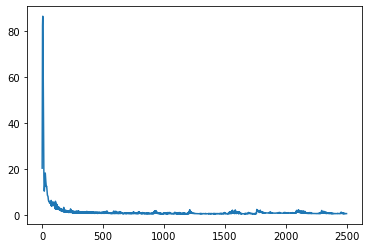

In [11]:
plt.plot(history.history['val_mae'])
np.mean(np.absolute(y_test - y_predicted[0,:,0]))

# 2014

In [3]:
X, y, X_test, y_test = allocate_data(2014)

model = Sequential(
    [
        BatchNormalization(),
        Dense(16, activation = 'relu', input_shape=(n_counties, n_features)),
        Dense(1, activation = 'relu')
    ]
)

model.compile(loss='mse', metrics=['mae'], optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2))

history = model.fit(X, y, epochs=5000, validation_data = (X_test, y_test))

y_predicted = model.predict(X_test)

2022-03-28 10:24:40.093330: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5000
1/1 [==============================] - 1s 639ms/step - loss: 218.9156 - mae: 11.9853 - val_loss: 285.0494 - val_mae: 13.8161
Epoch 2/5000
1/1 [==============================] - 0s 21ms/step - loss: 216.1999 - mae: 11.9026 - val_loss: 285.0320 - val_mae: 13.8156
Epoch 3/5000
1/1 [==============================] - 0s 23ms/step - loss: 212.7603 - mae: 11.7957 - val_loss: 284.9663 - val_mae: 13.8137
Epoch 4/5000
1/1 [==============================] - 0s 21ms/step - loss: 208.7568 - mae: 11.6671 - val_loss: 283.1043 - val_mae: 13.7759
Epoch 5/5000
1/1 [==============================] - 0s 22ms/step - loss: 204.3532 - mae: 11.5208 - val_loss: 271.4594 - val_mae: 13.4888
Epoch 6/5000
1/1 [==============================] - 0s 21ms/step - loss: 199.7050 - mae: 11.3615 - val_loss: 260.4890 - val_mae: 13.1564
Epoch 7/5000
1/1 [==============================] - 0s 23ms/step - loss: 194.8714 - mae: 11.1911 - val_loss: 250.8459 - val_mae: 12.9242
Epoch 8/5000
1/1 [======================

Epoch 61/5000
1/1 [==============================] - 0s 22ms/step - loss: 42.4064 - mae: 4.1426 - val_loss: 345.1476 - val_mae: 15.8617
Epoch 62/5000
1/1 [==============================] - 0s 21ms/step - loss: 41.9504 - mae: 4.1143 - val_loss: 340.5347 - val_mae: 15.8501
Epoch 63/5000
1/1 [==============================] - 0s 21ms/step - loss: 41.5302 - mae: 4.0863 - val_loss: 335.3121 - val_mae: 15.8136
Epoch 64/5000
1/1 [==============================] - 0s 22ms/step - loss: 41.1405 - mae: 4.0582 - val_loss: 329.3903 - val_mae: 15.7497
Epoch 65/5000
1/1 [==============================] - 0s 20ms/step - loss: 40.7748 - mae: 4.0292 - val_loss: 322.7685 - val_mae: 15.6585
Epoch 66/5000
1/1 [==============================] - 0s 22ms/step - loss: 40.4275 - mae: 3.9986 - val_loss: 315.4684 - val_mae: 15.5400
Epoch 67/5000
1/1 [==============================] - 0s 22ms/step - loss: 40.0958 - mae: 3.9662 - val_loss: 307.5745 - val_mae: 15.3962
Epoch 68/5000
1/1 [=============================

Epoch 182/5000
1/1 [==============================] - 0s 21ms/step - loss: 27.9321 - mae: 2.6889 - val_loss: 43.2591 - val_mae: 4.3488
Epoch 183/5000
1/1 [==============================] - 0s 22ms/step - loss: 27.8455 - mae: 2.6829 - val_loss: 43.0190 - val_mae: 4.3270
Epoch 184/5000
1/1 [==============================] - 0s 21ms/step - loss: 27.7579 - mae: 2.6767 - val_loss: 42.7790 - val_mae: 4.3051
Epoch 185/5000
1/1 [==============================] - 0s 21ms/step - loss: 27.6690 - mae: 2.6703 - val_loss: 42.5376 - val_mae: 4.2830
Epoch 186/5000
1/1 [==============================] - 0s 22ms/step - loss: 27.5791 - mae: 2.6639 - val_loss: 42.2945 - val_mae: 4.2608
Epoch 187/5000
1/1 [==============================] - 0s 21ms/step - loss: 27.4882 - mae: 2.6573 - val_loss: 42.0508 - val_mae: 4.2386
Epoch 188/5000
1/1 [==============================] - 0s 21ms/step - loss: 27.3960 - mae: 2.6508 - val_loss: 41.8069 - val_mae: 4.2163
Epoch 189/5000
1/1 [==============================] - 0

Epoch 243/5000
1/1 [==============================] - 0s 20ms/step - loss: 21.2113 - mae: 2.2305 - val_loss: 31.8369 - val_mae: 3.1947
Epoch 244/5000
1/1 [==============================] - 0s 20ms/step - loss: 21.1012 - mae: 2.2216 - val_loss: 31.7572 - val_mae: 3.1851
Epoch 245/5000
1/1 [==============================] - 0s 20ms/step - loss: 20.9916 - mae: 2.2157 - val_loss: 31.6505 - val_mae: 3.1752
Epoch 246/5000
1/1 [==============================] - 0s 21ms/step - loss: 20.8814 - mae: 2.2116 - val_loss: 31.5317 - val_mae: 3.1632
Epoch 247/5000
1/1 [==============================] - 0s 20ms/step - loss: 20.7715 - mae: 2.2065 - val_loss: 31.4383 - val_mae: 3.1496
Epoch 248/5000
1/1 [==============================] - 0s 22ms/step - loss: 20.6616 - mae: 2.1982 - val_loss: 31.3759 - val_mae: 3.1379
Epoch 249/5000
1/1 [==============================] - 0s 20ms/step - loss: 20.5516 - mae: 2.1885 - val_loss: 31.3246 - val_mae: 3.1295
Epoch 250/5000
1/1 [==============================] - 0

Epoch 304/5000
1/1 [==============================] - 0s 21ms/step - loss: 13.9262 - mae: 1.7390 - val_loss: 21.6338 - val_mae: 2.3391
Epoch 305/5000
1/1 [==============================] - 0s 20ms/step - loss: 13.8037 - mae: 1.7332 - val_loss: 21.5820 - val_mae: 2.3276
Epoch 306/5000
1/1 [==============================] - 0s 21ms/step - loss: 13.6823 - mae: 1.7212 - val_loss: 21.5120 - val_mae: 2.3237
Epoch 307/5000
1/1 [==============================] - 0s 23ms/step - loss: 13.5625 - mae: 1.7151 - val_loss: 21.4482 - val_mae: 2.3199
Epoch 308/5000
1/1 [==============================] - 0s 50ms/step - loss: 13.4442 - mae: 1.7087 - val_loss: 21.2948 - val_mae: 2.3083
Epoch 309/5000
1/1 [==============================] - 0s 41ms/step - loss: 13.3271 - mae: 1.7005 - val_loss: 21.2464 - val_mae: 2.2980
Epoch 310/5000
1/1 [==============================] - 0s 22ms/step - loss: 13.2111 - mae: 1.6889 - val_loss: 21.1206 - val_mae: 2.2936
Epoch 311/5000
1/1 [==============================] - 0

Epoch 365/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.0232 - mae: 1.4101 - val_loss: 18.7354 - val_mae: 2.0458
Epoch 366/5000
1/1 [==============================] - 0s 22ms/step - loss: 8.9802 - mae: 1.4088 - val_loss: 18.0950 - val_mae: 2.0063
Epoch 367/5000
1/1 [==============================] - 0s 20ms/step - loss: 8.9314 - mae: 1.4022 - val_loss: 18.5587 - val_mae: 2.0362
Epoch 368/5000
1/1 [==============================] - 0s 21ms/step - loss: 8.8818 - mae: 1.4004 - val_loss: 18.0922 - val_mae: 2.0067
Epoch 369/5000
1/1 [==============================] - 0s 20ms/step - loss: 8.8337 - mae: 1.3950 - val_loss: 18.3180 - val_mae: 2.0172
Epoch 370/5000
1/1 [==============================] - 0s 20ms/step - loss: 8.7860 - mae: 1.3894 - val_loss: 18.1529 - val_mae: 2.0101
Epoch 371/5000
1/1 [==============================] - 0s 21ms/step - loss: 8.7410 - mae: 1.3887 - val_loss: 18.0908 - val_mae: 1.9998
Epoch 372/5000
1/1 [==============================] - 0s 22ms/

1/1 [==============================] - 0s 20ms/step - loss: 5.6537 - mae: 1.1402 - val_loss: 12.7208 - val_mae: 1.6130
Epoch 488/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.6247 - mae: 1.1176 - val_loss: 12.4751 - val_mae: 1.6027
Epoch 489/5000
1/1 [==============================] - 0s 35ms/step - loss: 5.5983 - mae: 1.1216 - val_loss: 12.3255 - val_mae: 1.5946
Epoch 490/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.5861 - mae: 1.1228 - val_loss: 12.6664 - val_mae: 1.6076
Epoch 491/5000
1/1 [==============================] - 0s 22ms/step - loss: 5.5788 - mae: 1.1127 - val_loss: 12.1870 - val_mae: 1.5917
Epoch 492/5000
1/1 [==============================] - 0s 19ms/step - loss: 5.5624 - mae: 1.1278 - val_loss: 12.5022 - val_mae: 1.5937
Epoch 493/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.5370 - mae: 1.1058 - val_loss: 12.3058 - val_mae: 1.5945
Epoch 494/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.

1/1 [==============================] - 0s 20ms/step - loss: 4.1015 - mae: 0.9590 - val_loss: 8.7674 - val_mae: 1.3070
Epoch 610/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.0914 - mae: 0.9454 - val_loss: 8.6965 - val_mae: 1.3076
Epoch 611/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.0815 - mae: 0.9522 - val_loss: 8.6976 - val_mae: 1.3051
Epoch 612/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.0719 - mae: 0.9476 - val_loss: 8.6537 - val_mae: 1.3014
Epoch 613/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.0629 - mae: 0.9451 - val_loss: 8.6378 - val_mae: 1.3045
Epoch 614/5000
1/1 [==============================] - 0s 23ms/step - loss: 4.0541 - mae: 0.9502 - val_loss: 8.6073 - val_mae: 1.2970
Epoch 615/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.0454 - mae: 0.9405 - val_loss: 8.5891 - val_mae: 1.3034
Epoch 616/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.0365 - 

Epoch 671/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.5395 - mae: 0.8960 - val_loss: 7.3634 - val_mae: 1.2130
Epoch 672/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.5287 - mae: 0.8975 - val_loss: 7.4362 - val_mae: 1.2228
Epoch 673/5000
1/1 [==============================] - 0s 42ms/step - loss: 3.5202 - mae: 0.9041 - val_loss: 7.3605 - val_mae: 1.2074
Epoch 674/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.5120 - mae: 0.8888 - val_loss: 7.4341 - val_mae: 1.2233
Epoch 675/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.5032 - mae: 0.9041 - val_loss: 7.3303 - val_mae: 1.2036
Epoch 676/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.4938 - mae: 0.8860 - val_loss: 7.4477 - val_mae: 1.2165
Epoch 677/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.4849 - mae: 0.8930 - val_loss: 7.2526 - val_mae: 1.2027
Epoch 678/5000
1/1 [==============================] - 0s 20ms/step - 

Epoch 794/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.8408 - mae: 0.7703 - val_loss: 5.8246 - val_mae: 1.0688
Epoch 795/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.8272 - mae: 0.7747 - val_loss: 5.8343 - val_mae: 1.0672
Epoch 796/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.8211 - mae: 0.7724 - val_loss: 5.9058 - val_mae: 1.0669
Epoch 797/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.8214 - mae: 0.7680 - val_loss: 5.7642 - val_mae: 1.0667
Epoch 798/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.8205 - mae: 0.7767 - val_loss: 5.9250 - val_mae: 1.0660
Epoch 799/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.8191 - mae: 0.7658 - val_loss: 5.7427 - val_mae: 1.0655
Epoch 800/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.8133 - mae: 0.7755 - val_loss: 5.8853 - val_mae: 1.0621
Epoch 801/5000
1/1 [==============================] - 0s 21ms/step - 

Epoch 917/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.4931 - mae: 0.7187 - val_loss: 5.0005 - val_mae: 1.0491
Epoch 918/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.5343 - mae: 0.7740 - val_loss: 5.4223 - val_mae: 1.0213
Epoch 919/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.4993 - mae: 0.7236 - val_loss: 5.0141 - val_mae: 1.0069
Epoch 920/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.4317 - mae: 0.7288 - val_loss: 5.0198 - val_mae: 1.0015
Epoch 921/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.4231 - mae: 0.7220 - val_loss: 5.3043 - val_mae: 1.0123
Epoch 922/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.4624 - mae: 0.7199 - val_loss: 4.9525 - val_mae: 1.0248
Epoch 923/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.4682 - mae: 0.7502 - val_loss: 5.1881 - val_mae: 1.0005
Epoch 924/5000
1/1 [==============================] - 0s 22ms/step - 

1/1 [==============================] - 0s 20ms/step - loss: 2.1072 - mae: 0.6633 - val_loss: 4.4443 - val_mae: 0.9442
Epoch 1040/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.0992 - mae: 0.6770 - val_loss: 4.4531 - val_mae: 0.9359
Epoch 1041/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.0962 - mae: 0.6659 - val_loss: 4.4252 - val_mae: 0.9397
Epoch 1042/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.0971 - mae: 0.6702 - val_loss: 4.4727 - val_mae: 0.9417
Epoch 1043/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.1004 - mae: 0.6748 - val_loss: 4.4203 - val_mae: 0.9378
Epoch 1044/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.0994 - mae: 0.6654 - val_loss: 4.4526 - val_mae: 0.9477
Epoch 1045/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.0986 - mae: 0.6834 - val_loss: 4.4283 - val_mae: 0.9324
Epoch 1046/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.

1/1 [==============================] - 0s 20ms/step - loss: 1.8685 - mae: 0.6598 - val_loss: 3.9106 - val_mae: 0.8765
Epoch 1162/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.8504 - mae: 0.6235 - val_loss: 3.8835 - val_mae: 0.8900
Epoch 1163/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.8524 - mae: 0.6363 - val_loss: 3.8917 - val_mae: 0.8901
Epoch 1164/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.8627 - mae: 0.6509 - val_loss: 3.9071 - val_mae: 0.8927
Epoch 1165/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.8748 - mae: 0.6323 - val_loss: 3.8703 - val_mae: 0.9077
Epoch 1166/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.8755 - mae: 0.6738 - val_loss: 3.9028 - val_mae: 0.8895
Epoch 1167/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.8718 - mae: 0.6291 - val_loss: 3.8303 - val_mae: 0.9034
Epoch 1168/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.

1/1 [==============================] - 0s 20ms/step - loss: 1.6704 - mae: 0.6420 - val_loss: 3.4289 - val_mae: 0.8235
Epoch 1284/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.6562 - mae: 0.5905 - val_loss: 3.3759 - val_mae: 0.8284
Epoch 1285/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.6455 - mae: 0.6122 - val_loss: 3.3884 - val_mae: 0.8299
Epoch 1286/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6424 - mae: 0.6024 - val_loss: 3.3944 - val_mae: 0.8151
Epoch 1287/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.6404 - mae: 0.5927 - val_loss: 3.3653 - val_mae: 0.8406
Epoch 1288/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6424 - mae: 0.6193 - val_loss: 3.4031 - val_mae: 0.8133
Epoch 1289/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.6409 - mae: 0.5870 - val_loss: 3.3491 - val_mae: 0.8398
Epoch 1290/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.

1/1 [==============================] - 0s 22ms/step - loss: 1.5144 - mae: 0.6168 - val_loss: 3.0981 - val_mae: 0.7758
Epoch 1406/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.4886 - mae: 0.5569 - val_loss: 3.0496 - val_mae: 0.7789
Epoch 1407/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4731 - mae: 0.5698 - val_loss: 3.0480 - val_mae: 0.7846
Epoch 1408/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4811 - mae: 0.5811 - val_loss: 3.1057 - val_mae: 0.7907
Epoch 1409/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.5096 - mae: 0.5685 - val_loss: 3.0698 - val_mae: 0.8189
Epoch 1410/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5346 - mae: 0.6287 - val_loss: 3.1574 - val_mae: 0.8059
Epoch 1411/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5536 - mae: 0.5796 - val_loss: 3.0517 - val_mae: 0.8316
Epoch 1412/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.

1/1 [==============================] - 0s 20ms/step - loss: 1.3788 - mae: 0.5343 - val_loss: 2.6973 - val_mae: 0.7697
Epoch 1528/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3778 - mae: 0.5932 - val_loss: 2.7680 - val_mae: 0.7352
Epoch 1529/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3758 - mae: 0.5337 - val_loss: 2.7025 - val_mae: 0.7578
Epoch 1530/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.3713 - mae: 0.5799 - val_loss: 2.7476 - val_mae: 0.7396
Epoch 1531/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3715 - mae: 0.5398 - val_loss: 2.7159 - val_mae: 0.7416
Epoch 1532/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3656 - mae: 0.5614 - val_loss: 2.7228 - val_mae: 0.7452
Epoch 1533/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3646 - mae: 0.5487 - val_loss: 2.6998 - val_mae: 0.7285
Epoch 1534/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.

1/1 [==============================] - 0s 20ms/step - loss: 1.2543 - mae: 0.5567 - val_loss: 2.4672 - val_mae: 0.6871
Epoch 1650/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2594 - mae: 0.5063 - val_loss: 2.3994 - val_mae: 0.7272
Epoch 1651/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2541 - mae: 0.5586 - val_loss: 2.4593 - val_mae: 0.6891
Epoch 1652/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2529 - mae: 0.5053 - val_loss: 2.4205 - val_mae: 0.7092
Epoch 1653/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2539 - mae: 0.5415 - val_loss: 2.4656 - val_mae: 0.7039
Epoch 1654/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2598 - mae: 0.5175 - val_loss: 2.4550 - val_mae: 0.6947
Epoch 1655/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2615 - mae: 0.5259 - val_loss: 2.4607 - val_mae: 0.7167
Epoch 1656/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.

1/1 [==============================] - 0s 21ms/step - loss: 1.1436 - mae: 0.5147 - val_loss: 2.2154 - val_mae: 0.6700
Epoch 1772/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1388 - mae: 0.4982 - val_loss: 2.2002 - val_mae: 0.6644
Epoch 1773/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1366 - mae: 0.4998 - val_loss: 2.1992 - val_mae: 0.6744
Epoch 1774/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1335 - mae: 0.5057 - val_loss: 2.1962 - val_mae: 0.6602
Epoch 1775/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1313 - mae: 0.4937 - val_loss: 2.1815 - val_mae: 0.6708
Epoch 1776/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.1301 - mae: 0.5065 - val_loss: 2.1903 - val_mae: 0.6616
Epoch 1777/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1289 - mae: 0.4951 - val_loss: 2.1864 - val_mae: 0.6661
Epoch 1778/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.

1/1 [==============================] - 0s 21ms/step - loss: 1.0535 - mae: 0.4857 - val_loss: 2.0168 - val_mae: 0.6437
Epoch 1894/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0540 - mae: 0.4811 - val_loss: 1.9903 - val_mae: 0.6516
Epoch 1895/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0567 - mae: 0.4987 - val_loss: 2.0340 - val_mae: 0.6421
Epoch 1896/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0574 - mae: 0.4759 - val_loss: 1.9903 - val_mae: 0.6620
Epoch 1897/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0590 - mae: 0.5090 - val_loss: 2.0377 - val_mae: 0.6379
Epoch 1898/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0599 - mae: 0.4720 - val_loss: 1.9863 - val_mae: 0.6676
Epoch 1899/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0591 - mae: 0.5149 - val_loss: 2.0285 - val_mae: 0.6349
Epoch 1900/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.

1/1 [==============================] - 0s 20ms/step - loss: 0.9817 - mae: 0.4724 - val_loss: 1.8553 - val_mae: 0.6248
Epoch 2016/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9835 - mae: 0.4729 - val_loss: 1.8724 - val_mae: 0.6335
Epoch 2017/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9811 - mae: 0.4737 - val_loss: 1.8593 - val_mae: 0.6260
Epoch 2018/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9795 - mae: 0.4703 - val_loss: 1.8644 - val_mae: 0.6313
Epoch 2019/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9784 - mae: 0.4729 - val_loss: 1.8504 - val_mae: 0.6261
Epoch 2020/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9776 - mae: 0.4721 - val_loss: 1.8584 - val_mae: 0.6283
Epoch 2021/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9772 - mae: 0.4713 - val_loss: 1.8459 - val_mae: 0.6271
Epoch 2022/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.9234 - mae: 0.4529 - val_loss: 1.7326 - val_mae: 0.6140
Epoch 2138/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9219 - mae: 0.4638 - val_loss: 1.7422 - val_mae: 0.6147
Epoch 2139/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9226 - mae: 0.4607 - val_loss: 1.7303 - val_mae: 0.6082
Epoch 2140/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9251 - mae: 0.4608 - val_loss: 1.7476 - val_mae: 0.6210
Epoch 2141/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.9230 - mae: 0.4652 - val_loss: 1.7401 - val_mae: 0.6102
Epoch 2142/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9212 - mae: 0.4573 - val_loss: 1.7354 - val_mae: 0.6166
Epoch 2143/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9192 - mae: 0.4635 - val_loss: 1.7494 - val_mae: 0.6162
Epoch 2144/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.

1/1 [==============================] - 0s 22ms/step - loss: 0.8660 - mae: 0.4423 - val_loss: 1.6358 - val_mae: 0.6078
Epoch 2260/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8649 - mae: 0.4589 - val_loss: 1.6609 - val_mae: 0.5998
Epoch 2261/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8650 - mae: 0.4438 - val_loss: 1.6337 - val_mae: 0.6007
Epoch 2262/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.8665 - mae: 0.4546 - val_loss: 1.6676 - val_mae: 0.6068
Epoch 2263/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8704 - mae: 0.4490 - val_loss: 1.6414 - val_mae: 0.5995
Epoch 2264/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8757 - mae: 0.4562 - val_loss: 1.6851 - val_mae: 0.6122
Epoch 2265/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.8752 - mae: 0.4503 - val_loss: 1.6416 - val_mae: 0.6033
Epoch 2266/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.

1/1 [==============================] - 0s 26ms/step - loss: 0.8907 - mae: 0.4629 - val_loss: 1.5541 - val_mae: 0.6234
Epoch 2382/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.8492 - mae: 0.4744 - val_loss: 1.5318 - val_mae: 0.5799
Epoch 2383/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8170 - mae: 0.4322 - val_loss: 1.5581 - val_mae: 0.5834
Epoch 2384/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.8379 - mae: 0.4421 - val_loss: 1.6454 - val_mae: 0.6367
Epoch 2385/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8764 - mae: 0.4715 - val_loss: 1.6002 - val_mae: 0.5872
Epoch 2386/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8734 - mae: 0.4512 - val_loss: 1.5657 - val_mae: 0.6139
Epoch 2387/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8457 - mae: 0.4611 - val_loss: 1.5197 - val_mae: 0.5789
Epoch 2388/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.8844 - mae: 0.4881 - val_loss: 1.4878 - val_mae: 0.6453
Epoch 2504/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8472 - mae: 0.5134 - val_loss: 1.5265 - val_mae: 0.5833
Epoch 2505/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7968 - mae: 0.4282 - val_loss: 1.4756 - val_mae: 0.5700
Epoch 2506/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7813 - mae: 0.4254 - val_loss: 1.4847 - val_mae: 0.6226
Epoch 2507/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.8151 - mae: 0.4797 - val_loss: 1.5333 - val_mae: 0.5987
Epoch 2508/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8284 - mae: 0.4535 - val_loss: 1.4465 - val_mae: 0.6071
Epoch 2509/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7864 - mae: 0.4650 - val_loss: 1.4499 - val_mae: 0.5761
Epoch 2510/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.7274 - mae: 0.4191 - val_loss: 1.3710 - val_mae: 0.5712
Epoch 2626/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7248 - mae: 0.4314 - val_loss: 1.3742 - val_mae: 0.5583
Epoch 2627/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7223 - mae: 0.4201 - val_loss: 1.3776 - val_mae: 0.5623
Epoch 2628/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7217 - mae: 0.4206 - val_loss: 1.3632 - val_mae: 0.5652
Epoch 2629/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7234 - mae: 0.4294 - val_loss: 1.3899 - val_mae: 0.5610
Epoch 2630/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7280 - mae: 0.4174 - val_loss: 1.3621 - val_mae: 0.5758
Epoch 2631/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7354 - mae: 0.4448 - val_loss: 1.4163 - val_mae: 0.5690
Epoch 2632/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.7041 - mae: 0.4380 - val_loss: 1.3280 - val_mae: 0.5507
Epoch 2748/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6949 - mae: 0.4133 - val_loss: 1.3211 - val_mae: 0.5601
Epoch 2749/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6957 - mae: 0.4202 - val_loss: 1.3169 - val_mae: 0.5580
Epoch 2750/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7080 - mae: 0.4309 - val_loss: 1.3851 - val_mae: 0.5707
Epoch 2751/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7212 - mae: 0.4199 - val_loss: 1.3258 - val_mae: 0.5793
Epoch 2752/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7243 - mae: 0.4537 - val_loss: 1.3878 - val_mae: 0.5743
Epoch 2753/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7249 - mae: 0.4259 - val_loss: 1.3100 - val_mae: 0.5787
Epoch 2754/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.6951 - mae: 0.4180 - val_loss: 1.2792 - val_mae: 0.5564
Epoch 2870/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6945 - mae: 0.4357 - val_loss: 1.3273 - val_mae: 0.5648
Epoch 2871/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6969 - mae: 0.4192 - val_loss: 1.2814 - val_mae: 0.5498
Epoch 2872/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6885 - mae: 0.4273 - val_loss: 1.2927 - val_mae: 0.5552
Epoch 2873/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6807 - mae: 0.4151 - val_loss: 1.2540 - val_mae: 0.5454
Epoch 2874/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6691 - mae: 0.4192 - val_loss: 1.2629 - val_mae: 0.5425
Epoch 2875/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6647 - mae: 0.4090 - val_loss: 1.2565 - val_mae: 0.5473
Epoch 2876/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.6450 - mae: 0.4094 - val_loss: 1.2215 - val_mae: 0.5420
Epoch 2992/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6444 - mae: 0.4140 - val_loss: 1.2281 - val_mae: 0.5432
Epoch 2993/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6457 - mae: 0.4120 - val_loss: 1.2303 - val_mae: 0.5405
Epoch 2994/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6490 - mae: 0.4148 - val_loss: 1.2396 - val_mae: 0.5486
Epoch 2995/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6540 - mae: 0.4146 - val_loss: 1.2478 - val_mae: 0.5432
Epoch 2996/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6623 - mae: 0.4208 - val_loss: 1.2692 - val_mae: 0.5559
Epoch 2997/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6687 - mae: 0.4161 - val_loss: 1.2448 - val_mae: 0.5485
Epoch 2998/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.6301 - mae: 0.4195 - val_loss: 1.1774 - val_mae: 0.5318
Epoch 3114/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6321 - mae: 0.4096 - val_loss: 1.1647 - val_mae: 0.5392
Epoch 3115/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6344 - mae: 0.4242 - val_loss: 1.1907 - val_mae: 0.5357
Epoch 3116/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6397 - mae: 0.4108 - val_loss: 1.1948 - val_mae: 0.5436
Epoch 3117/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.6499 - mae: 0.4317 - val_loss: 1.2277 - val_mae: 0.5489
Epoch 3118/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.6626 - mae: 0.4177 - val_loss: 1.2112 - val_mae: 0.5492
Epoch 3119/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6602 - mae: 0.4390 - val_loss: 1.2199 - val_mae: 0.5457
Epoch 3120/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.6141 - mae: 0.4133 - val_loss: 1.1648 - val_mae: 0.5312
Epoch 3236/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6254 - mae: 0.4087 - val_loss: 1.1664 - val_mae: 0.5358
Epoch 3237/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6289 - mae: 0.4254 - val_loss: 1.1658 - val_mae: 0.5328
Epoch 3238/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6329 - mae: 0.4110 - val_loss: 1.1510 - val_mae: 0.5369
Epoch 3239/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6266 - mae: 0.4274 - val_loss: 1.1575 - val_mae: 0.5275
Epoch 3240/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6226 - mae: 0.4070 - val_loss: 1.1417 - val_mae: 0.5338
Epoch 3241/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6181 - mae: 0.4189 - val_loss: 1.1451 - val_mae: 0.5261
Epoch 3242/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 27ms/step - loss: 0.6572 - mae: 0.4549 - val_loss: 1.1831 - val_mae: 0.5518
Epoch 3358/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.6587 - mae: 0.4306 - val_loss: 1.1580 - val_mae: 0.5572
Epoch 3359/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.6449 - mae: 0.4509 - val_loss: 1.1651 - val_mae: 0.5382
Epoch 3360/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6334 - mae: 0.4190 - val_loss: 1.1290 - val_mae: 0.5342
Epoch 3361/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.6148 - mae: 0.4253 - val_loss: 1.1199 - val_mae: 0.5193
Epoch 3362/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.6024 - mae: 0.4033 - val_loss: 1.1199 - val_mae: 0.5195
Epoch 3363/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6011 - mae: 0.4063 - val_loss: 1.1013 - val_mae: 0.5309
Epoch 3364/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.5909 - mae: 0.4103 - val_loss: 1.0389 - val_mae: 0.5194
Epoch 3480/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5933 - mae: 0.4175 - val_loss: 1.0612 - val_mae: 0.5145
Epoch 3481/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5970 - mae: 0.4119 - val_loss: 1.0383 - val_mae: 0.5235
Epoch 3482/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5961 - mae: 0.4253 - val_loss: 1.0503 - val_mae: 0.5127
Epoch 3483/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5927 - mae: 0.4096 - val_loss: 1.0573 - val_mae: 0.5174
Epoch 3484/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5931 - mae: 0.4181 - val_loss: 1.0478 - val_mae: 0.5148
Epoch 3485/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5931 - mae: 0.4094 - val_loss: 1.0794 - val_mae: 0.5154
Epoch 3486/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.5934 - mae: 0.4138 - val_loss: 1.0891 - val_mae: 0.5152
Epoch 3602/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5984 - mae: 0.4194 - val_loss: 1.0274 - val_mae: 0.5099
Epoch 3603/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5843 - mae: 0.4078 - val_loss: 1.0233 - val_mae: 0.5100
Epoch 3604/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5734 - mae: 0.4119 - val_loss: 1.0494 - val_mae: 0.5108
Epoch 3605/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5829 - mae: 0.4105 - val_loss: 1.0341 - val_mae: 0.5282
Epoch 3606/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6014 - mae: 0.4244 - val_loss: 1.0695 - val_mae: 0.5152
Epoch 3607/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5952 - mae: 0.4178 - val_loss: 1.0168 - val_mae: 0.5117
Epoch 3608/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.5571 - mae: 0.4077 - val_loss: 0.9930 - val_mae: 0.5024
Epoch 3724/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5566 - mae: 0.4057 - val_loss: 1.0031 - val_mae: 0.5037
Epoch 3725/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5591 - mae: 0.4089 - val_loss: 0.9896 - val_mae: 0.5046
Epoch 3726/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5583 - mae: 0.4076 - val_loss: 1.0025 - val_mae: 0.5040
Epoch 3727/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.5574 - mae: 0.4073 - val_loss: 0.9959 - val_mae: 0.5052
Epoch 3728/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.5561 - mae: 0.4075 - val_loss: 0.9924 - val_mae: 0.5048
Epoch 3729/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5581 - mae: 0.4064 - val_loss: 1.0149 - val_mae: 0.5074
Epoch 3730/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.5567 - mae: 0.4163 - val_loss: 0.9996 - val_mae: 0.5035
Epoch 3846/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5569 - mae: 0.4113 - val_loss: 0.9647 - val_mae: 0.5028
Epoch 3847/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5531 - mae: 0.4094 - val_loss: 0.9851 - val_mae: 0.5034
Epoch 3848/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5520 - mae: 0.4126 - val_loss: 0.9704 - val_mae: 0.5019
Epoch 3849/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5556 - mae: 0.4074 - val_loss: 0.9823 - val_mae: 0.5141
Epoch 3850/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5611 - mae: 0.4241 - val_loss: 0.9840 - val_mae: 0.5080
Epoch 3851/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5661 - mae: 0.4148 - val_loss: 0.9840 - val_mae: 0.5190
Epoch 3852/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.5478 - mae: 0.4108 - val_loss: 0.9621 - val_mae: 0.5055
Epoch 3968/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5530 - mae: 0.4210 - val_loss: 0.9690 - val_mae: 0.4951
Epoch 3969/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5453 - mae: 0.4078 - val_loss: 0.9549 - val_mae: 0.4918
Epoch 3970/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5367 - mae: 0.4060 - val_loss: 0.9544 - val_mae: 0.4937
Epoch 3971/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5383 - mae: 0.4070 - val_loss: 0.9771 - val_mae: 0.4974
Epoch 3972/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5445 - mae: 0.4074 - val_loss: 0.9552 - val_mae: 0.4989
Epoch 3973/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5444 - mae: 0.4130 - val_loss: 0.9640 - val_mae: 0.4936
Epoch 3974/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.5639 - mae: 0.4249 - val_loss: 0.9431 - val_mae: 0.5016
Epoch 4090/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5568 - mae: 0.4197 - val_loss: 0.9588 - val_mae: 0.4902
Epoch 4091/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5357 - mae: 0.4059 - val_loss: 0.9822 - val_mae: 0.4999
Epoch 4092/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5401 - mae: 0.4134 - val_loss: 0.9609 - val_mae: 0.5034
Epoch 4093/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5564 - mae: 0.4126 - val_loss: 1.0058 - val_mae: 0.5009
Epoch 4094/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5500 - mae: 0.4154 - val_loss: 0.9328 - val_mae: 0.4901
Epoch 4095/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5414 - mae: 0.4054 - val_loss: 0.9361 - val_mae: 0.4881
Epoch 4096/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.5903 - mae: 0.4601 - val_loss: 0.9643 - val_mae: 0.5062
Epoch 4212/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5563 - mae: 0.4214 - val_loss: 1.0794 - val_mae: 0.5390
Epoch 4213/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6018 - mae: 0.4508 - val_loss: 0.9825 - val_mae: 0.5294
Epoch 4214/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5765 - mae: 0.4505 - val_loss: 0.9585 - val_mae: 0.4928
Epoch 4215/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5298 - mae: 0.4052 - val_loss: 0.9787 - val_mae: 0.4972
Epoch 4216/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5314 - mae: 0.4085 - val_loss: 0.9750 - val_mae: 0.5222
Epoch 4217/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5655 - mae: 0.4351 - val_loss: 1.0467 - val_mae: 0.5306
Epoch 4218/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.5333 - mae: 0.4098 - val_loss: 0.9569 - val_mae: 0.5098
Epoch 4334/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5314 - mae: 0.4226 - val_loss: 0.9642 - val_mae: 0.4941
Epoch 4335/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5166 - mae: 0.4045 - val_loss: 0.9390 - val_mae: 0.4868
Epoch 4336/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5069 - mae: 0.4000 - val_loss: 0.9439 - val_mae: 0.4971
Epoch 4337/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5176 - mae: 0.4139 - val_loss: 0.9640 - val_mae: 0.4921
Epoch 4338/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5274 - mae: 0.4095 - val_loss: 0.9577 - val_mae: 0.5038
Epoch 4339/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5254 - mae: 0.4187 - val_loss: 0.9645 - val_mae: 0.4922
Epoch 4340/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.5200 - mae: 0.4070 - val_loss: 0.9329 - val_mae: 0.5067
Epoch 4456/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5372 - mae: 0.4323 - val_loss: 0.9446 - val_mae: 0.4936
Epoch 4457/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5371 - mae: 0.4197 - val_loss: 0.9432 - val_mae: 0.5005
Epoch 4458/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5258 - mae: 0.4250 - val_loss: 0.8958 - val_mae: 0.4706
Epoch 4459/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5091 - mae: 0.3965 - val_loss: 0.9374 - val_mae: 0.4747
Epoch 4460/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5088 - mae: 0.4007 - val_loss: 0.9012 - val_mae: 0.4886
Epoch 4461/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5195 - mae: 0.4156 - val_loss: 0.9399 - val_mae: 0.4909
Epoch 4462/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.5172 - mae: 0.4279 - val_loss: 0.9233 - val_mae: 0.4843
Epoch 4578/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5195 - mae: 0.4123 - val_loss: 0.9261 - val_mae: 0.4936
Epoch 4579/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5138 - mae: 0.4212 - val_loss: 0.9038 - val_mae: 0.4635
Epoch 4580/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4865 - mae: 0.3903 - val_loss: 0.8920 - val_mae: 0.4583
Epoch 4581/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4823 - mae: 0.3873 - val_loss: 0.9158 - val_mae: 0.4870
Epoch 4582/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5046 - mae: 0.4183 - val_loss: 0.9144 - val_mae: 0.4791
Epoch 4583/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5130 - mae: 0.4081 - val_loss: 0.9352 - val_mae: 0.4945
Epoch 4584/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.4868 - mae: 0.3930 - val_loss: 0.8978 - val_mae: 0.4861
Epoch 4700/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5148 - mae: 0.4249 - val_loss: 0.9217 - val_mae: 0.4840
Epoch 4701/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5131 - mae: 0.4136 - val_loss: 0.9058 - val_mae: 0.4825
Epoch 4702/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5015 - mae: 0.4178 - val_loss: 0.8622 - val_mae: 0.4548
Epoch 4703/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4850 - mae: 0.3877 - val_loss: 0.9194 - val_mae: 0.4603
Epoch 4704/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.4857 - mae: 0.3927 - val_loss: 0.8751 - val_mae: 0.4690
Epoch 4705/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5016 - mae: 0.4048 - val_loss: 0.9073 - val_mae: 0.4683
Epoch 4706/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.4616 - mae: 0.3869 - val_loss: 0.8615 - val_mae: 0.4420
Epoch 4822/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4608 - mae: 0.3758 - val_loss: 0.8704 - val_mae: 0.4524
Epoch 4823/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4608 - mae: 0.3869 - val_loss: 0.8652 - val_mae: 0.4432
Epoch 4824/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4613 - mae: 0.3766 - val_loss: 0.8727 - val_mae: 0.4539
Epoch 4825/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4620 - mae: 0.3887 - val_loss: 0.8661 - val_mae: 0.4439
Epoch 4826/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4627 - mae: 0.3773 - val_loss: 0.8831 - val_mae: 0.4570
Epoch 4827/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4642 - mae: 0.3908 - val_loss: 0.8632 - val_mae: 0.4442
Epoch 4828/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.4448 - mae: 0.3713 - val_loss: 0.8663 - val_mae: 0.4379
Epoch 4944/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4447 - mae: 0.3713 - val_loss: 0.8591 - val_mae: 0.4354
Epoch 4945/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4448 - mae: 0.3695 - val_loss: 0.8670 - val_mae: 0.4397
Epoch 4946/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4452 - mae: 0.3732 - val_loss: 0.8585 - val_mae: 0.4352
Epoch 4947/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4459 - mae: 0.3690 - val_loss: 0.8697 - val_mae: 0.4425
Epoch 4948/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4467 - mae: 0.3760 - val_loss: 0.8567 - val_mae: 0.4355
Epoch 4949/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4478 - mae: 0.3692 - val_loss: 0.8768 - val_mae: 0.4455
Epoch 4950/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

0.4360209563168036

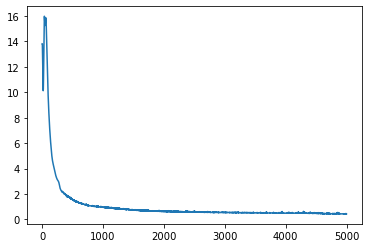

In [4]:
plt.plot(history.history['val_mae'])
np.mean(np.absolute(y_test - y_predicted[0,:,0]))

# 2015

In [5]:
X, y, X_test, y_test = allocate_data(2015)

model = Sequential(
    [
        BatchNormalization(),
        Dense(16, activation = 'relu', input_shape=(n_counties, n_features)),
        Dense(1, activation = 'relu')
    ]
)

model.compile(loss='mse', metrics=['mae'], optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2))

history = model.fit(X, y, epochs=5000, validation_data = (X_test, y_test))

y_predicted = model.predict(X_test)

Epoch 1/5000
1/1 [==============================] - 1s 513ms/step - loss: 233.5842 - mae: 12.4009 - val_loss: 374.5632 - val_mae: 15.4855
Epoch 2/5000
1/1 [==============================] - 0s 22ms/step - loss: 230.8022 - mae: 12.3141 - val_loss: 374.2896 - val_mae: 15.4867
Epoch 3/5000
1/1 [==============================] - 0s 22ms/step - loss: 227.3820 - mae: 12.2045 - val_loss: 372.1763 - val_mae: 15.4238
Epoch 4/5000
1/1 [==============================] - 0s 24ms/step - loss: 223.6387 - mae: 12.0822 - val_loss: 363.2457 - val_mae: 15.0785
Epoch 5/5000
1/1 [==============================] - 0s 21ms/step - loss: 219.6700 - mae: 11.9489 - val_loss: 347.7401 - val_mae: 14.4768
Epoch 6/5000
1/1 [==============================] - 0s 22ms/step - loss: 215.5326 - mae: 11.8056 - val_loss: 327.4008 - val_mae: 13.7450
Epoch 7/5000
1/1 [==============================] - 0s 22ms/step - loss: 211.2775 - mae: 11.6530 - val_loss: 307.8169 - val_mae: 13.0329
Epoch 8/5000
1/1 [======================

Epoch 61/5000
1/1 [==============================] - 0s 25ms/step - loss: 45.4755 - mae: 4.1661 - val_loss: 431.1993 - val_mae: 19.6007
Epoch 62/5000
1/1 [==============================] - 0s 20ms/step - loss: 44.7595 - mae: 4.1161 - val_loss: 433.9544 - val_mae: 19.6425
Epoch 63/5000
1/1 [==============================] - 0s 23ms/step - loss: 44.0960 - mae: 4.0673 - val_loss: 436.6996 - val_mae: 19.6797
Epoch 64/5000
1/1 [==============================] - 0s 20ms/step - loss: 43.4843 - mae: 4.0201 - val_loss: 439.6181 - val_mae: 19.7164
Epoch 65/5000
1/1 [==============================] - 0s 21ms/step - loss: 42.9232 - mae: 3.9745 - val_loss: 442.7415 - val_mae: 19.7527
Epoch 66/5000
1/1 [==============================] - 0s 23ms/step - loss: 42.4051 - mae: 3.9308 - val_loss: 446.0840 - val_mae: 19.7893
Epoch 67/5000
1/1 [==============================] - 0s 21ms/step - loss: 41.9257 - mae: 3.8893 - val_loss: 449.6538 - val_mae: 19.8262
Epoch 68/5000
1/1 [=============================

1/1 [==============================] - 0s 19ms/step - loss: 31.8852 - mae: 2.9114 - val_loss: 66.2959 - val_mae: 4.5530
Epoch 182/5000
1/1 [==============================] - 0s 19ms/step - loss: 31.8352 - mae: 2.9089 - val_loss: 65.8571 - val_mae: 4.5254
Epoch 183/5000
1/1 [==============================] - 0s 19ms/step - loss: 31.7850 - mae: 2.9063 - val_loss: 65.4242 - val_mae: 4.4984
Epoch 184/5000
1/1 [==============================] - 0s 19ms/step - loss: 31.7344 - mae: 2.9035 - val_loss: 64.9977 - val_mae: 4.4720
Epoch 185/5000
1/1 [==============================] - 0s 19ms/step - loss: 31.6837 - mae: 2.9006 - val_loss: 64.5764 - val_mae: 4.4462
Epoch 186/5000
1/1 [==============================] - 0s 18ms/step - loss: 31.6326 - mae: 2.8975 - val_loss: 64.1599 - val_mae: 4.4213
Epoch 187/5000
1/1 [==============================] - 0s 18ms/step - loss: 31.5813 - mae: 2.8942 - val_loss: 63.7473 - val_mae: 4.3972
Epoch 188/5000
1/1 [==============================] - 0s 19ms/step - l

Epoch 242/5000
1/1 [==============================] - 0s 19ms/step - loss: 27.9763 - mae: 2.6439 - val_loss: 50.1053 - val_mae: 3.9487
Epoch 243/5000
1/1 [==============================] - 0s 19ms/step - loss: 27.8824 - mae: 2.6369 - val_loss: 49.9315 - val_mae: 3.9468
Epoch 244/5000
1/1 [==============================] - 0s 19ms/step - loss: 27.7874 - mae: 2.6299 - val_loss: 49.7595 - val_mae: 3.9443
Epoch 245/5000
1/1 [==============================] - 0s 18ms/step - loss: 27.6908 - mae: 2.6225 - val_loss: 49.5883 - val_mae: 3.9414
Epoch 246/5000
1/1 [==============================] - 0s 18ms/step - loss: 27.5922 - mae: 2.6148 - val_loss: 49.4173 - val_mae: 3.9381
Epoch 247/5000
1/1 [==============================] - 0s 19ms/step - loss: 27.4921 - mae: 2.6068 - val_loss: 49.2426 - val_mae: 3.9340
Epoch 248/5000
1/1 [==============================] - 0s 19ms/step - loss: 27.3905 - mae: 2.5987 - val_loss: 49.0633 - val_mae: 3.9291
Epoch 249/5000
1/1 [==============================] - 0

Epoch 303/5000
1/1 [==============================] - 0s 18ms/step - loss: 20.9572 - mae: 2.2138 - val_loss: 43.5709 - val_mae: 3.3132
Epoch 304/5000
1/1 [==============================] - 0s 19ms/step - loss: 20.8401 - mae: 2.2081 - val_loss: 43.4788 - val_mae: 3.2997
Epoch 305/5000
1/1 [==============================] - 0s 19ms/step - loss: 20.7229 - mae: 2.2010 - val_loss: 43.3586 - val_mae: 3.2837
Epoch 306/5000
1/1 [==============================] - 0s 19ms/step - loss: 20.6055 - mae: 2.1929 - val_loss: 43.2574 - val_mae: 3.2692
Epoch 307/5000
1/1 [==============================] - 0s 20ms/step - loss: 20.4880 - mae: 2.1854 - val_loss: 43.2117 - val_mae: 3.2573
Epoch 308/5000
1/1 [==============================] - 0s 19ms/step - loss: 20.3704 - mae: 2.1787 - val_loss: 43.1748 - val_mae: 3.2477
Epoch 309/5000
1/1 [==============================] - 0s 19ms/step - loss: 20.2526 - mae: 2.1730 - val_loss: 43.1120 - val_mae: 3.2367
Epoch 310/5000
1/1 [==============================] - 0

Epoch 364/5000
1/1 [==============================] - 0s 18ms/step - loss: 13.7737 - mae: 1.7619 - val_loss: 30.3718 - val_mae: 2.4799
Epoch 365/5000
1/1 [==============================] - 0s 19ms/step - loss: 13.6661 - mae: 1.7538 - val_loss: 30.1276 - val_mae: 2.4592
Epoch 366/5000
1/1 [==============================] - 0s 19ms/step - loss: 13.5592 - mae: 1.7442 - val_loss: 29.9346 - val_mae: 2.4446
Epoch 367/5000
1/1 [==============================] - 0s 19ms/step - loss: 13.4530 - mae: 1.7371 - val_loss: 29.7907 - val_mae: 2.4328
Epoch 368/5000
1/1 [==============================] - 0s 19ms/step - loss: 13.3478 - mae: 1.7308 - val_loss: 29.6117 - val_mae: 2.4164
Epoch 369/5000
1/1 [==============================] - 0s 18ms/step - loss: 13.2438 - mae: 1.7227 - val_loss: 29.4122 - val_mae: 2.3986
Epoch 370/5000
1/1 [==============================] - 0s 18ms/step - loss: 13.1405 - mae: 1.7140 - val_loss: 29.2647 - val_mae: 2.3855
Epoch 371/5000
1/1 [==============================] - 0

Epoch 425/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.5572 - mae: 1.4710 - val_loss: 22.9650 - val_mae: 1.9139
Epoch 426/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.5222 - mae: 1.4042 - val_loss: 22.7797 - val_mae: 1.9577
Epoch 427/5000
1/1 [==============================] - 0s 18ms/step - loss: 8.4303 - mae: 1.4233 - val_loss: 23.6857 - val_mae: 2.0039
Epoch 428/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.4209 - mae: 1.4510 - val_loss: 23.2254 - val_mae: 1.9089
Epoch 429/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.3483 - mae: 1.3874 - val_loss: 22.3271 - val_mae: 1.9254
Epoch 430/5000
1/1 [==============================] - 0s 18ms/step - loss: 8.3199 - mae: 1.4045 - val_loss: 23.3726 - val_mae: 1.9568
Epoch 431/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.2559 - mae: 1.4140 - val_loss: 23.7569 - val_mae: 1.9122
Epoch 432/5000
1/1 [==============================] - 0s 19ms/

1/1 [==============================] - 0s 26ms/step - loss: 5.3277 - mae: 1.0734 - val_loss: 30.1926 - val_mae: 1.6550
Epoch 548/5000
1/1 [==============================] - 0s 49ms/step - loss: 5.3103 - mae: 1.0938 - val_loss: 30.3714 - val_mae: 1.6344
Epoch 549/5000
1/1 [==============================] - 0s 48ms/step - loss: 5.2932 - mae: 1.0702 - val_loss: 30.6395 - val_mae: 1.6416
Epoch 550/5000
1/1 [==============================] - 0s 23ms/step - loss: 5.2775 - mae: 1.0780 - val_loss: 30.3811 - val_mae: 1.6429
Epoch 551/5000
1/1 [==============================] - 0s 27ms/step - loss: 5.2627 - mae: 1.0812 - val_loss: 30.4274 - val_mae: 1.6264
Epoch 552/5000
1/1 [==============================] - 0s 26ms/step - loss: 5.2511 - mae: 1.0631 - val_loss: 30.5651 - val_mae: 1.6429
Epoch 553/5000
1/1 [==============================] - 0s 23ms/step - loss: 5.2361 - mae: 1.0819 - val_loss: 30.6194 - val_mae: 1.6272
Epoch 554/5000
1/1 [==============================] - 0s 26ms/step - loss: 5.

1/1 [==============================] - 0s 21ms/step - loss: 3.9277 - mae: 0.9228 - val_loss: 33.6867 - val_mae: 1.4572
Epoch 670/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.9175 - mae: 0.9195 - val_loss: 33.7418 - val_mae: 1.4437
Epoch 671/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.9134 - mae: 0.9035 - val_loss: 33.2515 - val_mae: 1.4676
Epoch 672/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.9109 - mae: 0.9361 - val_loss: 34.0000 - val_mae: 1.4422
Epoch 673/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.9056 - mae: 0.8998 - val_loss: 33.0546 - val_mae: 1.4628
Epoch 674/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.8952 - mae: 0.9330 - val_loss: 33.8979 - val_mae: 1.4417
Epoch 675/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.8822 - mae: 0.9010 - val_loss: 33.1571 - val_mae: 1.4484
Epoch 676/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.

1/1 [==============================] - 0s 19ms/step - loss: 3.1269 - mae: 0.8041 - val_loss: 32.0615 - val_mae: 1.3350
Epoch 792/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.1246 - mae: 0.8172 - val_loss: 32.6374 - val_mae: 1.3301
Epoch 793/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.1212 - mae: 0.8007 - val_loss: 32.0253 - val_mae: 1.3349
Epoch 794/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.1157 - mae: 0.8165 - val_loss: 32.5271 - val_mae: 1.3291
Epoch 795/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.1088 - mae: 0.8010 - val_loss: 32.2049 - val_mae: 1.3313
Epoch 796/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.1022 - mae: 0.8091 - val_loss: 32.2810 - val_mae: 1.3290
Epoch 797/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.0968 - mae: 0.8045 - val_loss: 32.4205 - val_mae: 1.3297
Epoch 798/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.

1/1 [==============================] - 0s 19ms/step - loss: 2.6881 - mae: 0.7298 - val_loss: 29.9234 - val_mae: 1.2776
Epoch 914/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.6910 - mae: 0.7697 - val_loss: 31.2275 - val_mae: 1.2656
Epoch 915/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.6871 - mae: 0.7293 - val_loss: 30.1285 - val_mae: 1.2722
Epoch 916/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.6742 - mae: 0.7620 - val_loss: 30.8251 - val_mae: 1.2554
Epoch 917/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.6602 - mae: 0.7237 - val_loss: 30.5203 - val_mae: 1.2604
Epoch 918/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.6481 - mae: 0.7415 - val_loss: 30.3704 - val_mae: 1.2520
Epoch 919/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.6415 - mae: 0.7267 - val_loss: 30.8990 - val_mae: 1.2555
Epoch 920/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.

Epoch 1035/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.3129 - mae: 0.6679 - val_loss: 29.7401 - val_mae: 1.1838
Epoch 1036/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.3108 - mae: 0.6658 - val_loss: 29.4207 - val_mae: 1.1822
Epoch 1037/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.3084 - mae: 0.6672 - val_loss: 29.6920 - val_mae: 1.1825
Epoch 1038/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.3056 - mae: 0.6654 - val_loss: 29.4812 - val_mae: 1.1812
Epoch 1039/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.3027 - mae: 0.6658 - val_loss: 29.5660 - val_mae: 1.1813
Epoch 1040/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.3001 - mae: 0.6656 - val_loss: 29.5679 - val_mae: 1.1806
Epoch 1041/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.2977 - mae: 0.6642 - val_loss: 29.4646 - val_mae: 1.1808
Epoch 1042/5000
1/1 [==============================] - 

Epoch 1096/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.1844 - mae: 0.6447 - val_loss: 29.5308 - val_mae: 1.1657
Epoch 1097/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.1799 - mae: 0.6522 - val_loss: 29.5919 - val_mae: 1.1614
Epoch 1098/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.1758 - mae: 0.6438 - val_loss: 29.4388 - val_mae: 1.1616
Epoch 1099/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.1736 - mae: 0.6458 - val_loss: 29.6434 - val_mae: 1.1628
Epoch 1100/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.1726 - mae: 0.6469 - val_loss: 29.3973 - val_mae: 1.1610
Epoch 1101/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.1716 - mae: 0.6440 - val_loss: 29.6313 - val_mae: 1.1633
Epoch 1102/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.1695 - mae: 0.6484 - val_loss: 29.4155 - val_mae: 1.1603
Epoch 1103/5000
1/1 [==============================] - 

Epoch 1157/5000
1/1 [==============================] - 0s 62ms/step - loss: 2.0632 - mae: 0.6284 - val_loss: 29.0368 - val_mae: 1.1484
Epoch 1158/5000
1/1 [==============================] - 0s 31ms/step - loss: 2.0608 - mae: 0.6302 - val_loss: 29.3714 - val_mae: 1.1497
Epoch 1159/5000
1/1 [==============================] - 0s 29ms/step - loss: 2.0583 - mae: 0.6329 - val_loss: 29.2867 - val_mae: 1.1474
Epoch 1160/5000
1/1 [==============================] - 0s 49ms/step - loss: 2.0564 - mae: 0.6260 - val_loss: 29.0975 - val_mae: 1.1504
Epoch 1161/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.0555 - mae: 0.6358 - val_loss: 29.5382 - val_mae: 1.1469
Epoch 1162/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.0554 - mae: 0.6238 - val_loss: 28.9145 - val_mae: 1.1506
Epoch 1163/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.0550 - mae: 0.6368 - val_loss: 29.6409 - val_mae: 1.1472
Epoch 1164/5000
1/1 [==============================] - 

Epoch 1218/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.9717 - mae: 0.6384 - val_loss: 28.5162 - val_mae: 1.1392
Epoch 1219/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9721 - mae: 0.6173 - val_loss: 27.7752 - val_mae: 1.1465
Epoch 1220/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.9688 - mae: 0.6372 - val_loss: 28.4680 - val_mae: 1.1351
Epoch 1221/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.9650 - mae: 0.6137 - val_loss: 27.7476 - val_mae: 1.1392
Epoch 1222/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.9591 - mae: 0.6292 - val_loss: 28.3686 - val_mae: 1.1293
Epoch 1223/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.9536 - mae: 0.6096 - val_loss: 27.7626 - val_mae: 1.1311
Epoch 1224/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.9481 - mae: 0.6199 - val_loss: 28.2281 - val_mae: 1.1254
Epoch 1225/5000
1/1 [==============================] - 

Epoch 1279/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.8715 - mae: 0.5986 - val_loss: 26.3329 - val_mae: 1.1114
Epoch 1280/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.8678 - mae: 0.6053 - val_loss: 27.0897 - val_mae: 1.1113
Epoch 1281/5000
1/1 [==============================] - 0s 52ms/step - loss: 1.8663 - mae: 0.6037 - val_loss: 26.4683 - val_mae: 1.1137
Epoch 1282/5000
1/1 [==============================] - 0s 34ms/step - loss: 1.8664 - mae: 0.6048 - val_loss: 26.8526 - val_mae: 1.1172
Epoch 1283/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.8671 - mae: 0.6121 - val_loss: 26.6282 - val_mae: 1.1161
Epoch 1284/5000
1/1 [==============================] - 0s 26ms/step - loss: 1.8691 - mae: 0.6055 - val_loss: 26.6077 - val_mae: 1.1233
Epoch 1285/5000
1/1 [==============================] - 0s 28ms/step - loss: 1.8702 - mae: 0.6200 - val_loss: 26.7810 - val_mae: 1.1166
Epoch 1286/5000
1/1 [==============================] - 

Epoch 1340/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.7923 - mae: 0.5869 - val_loss: 25.0229 - val_mae: 1.0922
Epoch 1341/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7863 - mae: 0.5977 - val_loss: 25.8633 - val_mae: 1.0870
Epoch 1342/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7821 - mae: 0.5840 - val_loss: 25.0129 - val_mae: 1.0877
Epoch 1343/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7791 - mae: 0.5913 - val_loss: 25.8038 - val_mae: 1.0849
Epoch 1344/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.7776 - mae: 0.5844 - val_loss: 25.0017 - val_mae: 1.0877
Epoch 1345/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7770 - mae: 0.5897 - val_loss: 25.7414 - val_mae: 1.0862
Epoch 1346/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7773 - mae: 0.5874 - val_loss: 24.9842 - val_mae: 1.0898
Epoch 1347/5000
1/1 [==============================] - 

Epoch 1401/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7272 - mae: 0.5960 - val_loss: 24.0419 - val_mae: 1.0891
Epoch 1402/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.7408 - mae: 0.5947 - val_loss: 24.9461 - val_mae: 1.0972
Epoch 1403/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.7434 - mae: 0.6067 - val_loss: 24.1040 - val_mae: 1.0886
Epoch 1404/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7384 - mae: 0.5935 - val_loss: 24.6076 - val_mae: 1.0888
Epoch 1405/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7249 - mae: 0.6001 - val_loss: 24.4977 - val_mae: 1.0777
Epoch 1406/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7161 - mae: 0.5799 - val_loss: 24.1375 - val_mae: 1.0792
Epoch 1407/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.7100 - mae: 0.5915 - val_loss: 24.8531 - val_mae: 1.0712
Epoch 1408/5000
1/1 [==============================] - 

Epoch 1462/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.6435 - mae: 0.5696 - val_loss: 24.2508 - val_mae: 1.0770
Epoch 1463/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.6514 - mae: 0.5886 - val_loss: 24.4878 - val_mae: 1.0778
Epoch 1464/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6630 - mae: 0.5789 - val_loss: 24.1712 - val_mae: 1.0923
Epoch 1465/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6687 - mae: 0.6060 - val_loss: 24.6100 - val_mae: 1.0840
Epoch 1466/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.6782 - mae: 0.5842 - val_loss: 24.0763 - val_mae: 1.0943
Epoch 1467/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.6714 - mae: 0.6091 - val_loss: 24.6836 - val_mae: 1.0759
Epoch 1468/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.6665 - mae: 0.5752 - val_loss: 23.9776 - val_mae: 1.0760
Epoch 1469/5000
1/1 [==============================] - 

Epoch 1523/5000
1/1 [==============================] - 0s 26ms/step - loss: 1.5986 - mae: 0.5684 - val_loss: 23.6923 - val_mae: 1.0508
Epoch 1524/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.5867 - mae: 0.5608 - val_loss: 24.2445 - val_mae: 1.0496
Epoch 1525/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5764 - mae: 0.5617 - val_loss: 24.0887 - val_mae: 1.0449
Epoch 1526/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.5720 - mae: 0.5518 - val_loss: 23.7627 - val_mae: 1.0480
Epoch 1527/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5727 - mae: 0.5635 - val_loss: 24.4808 - val_mae: 1.0478
Epoch 1528/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.5787 - mae: 0.5522 - val_loss: 23.4119 - val_mae: 1.0526
Epoch 1529/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.5861 - mae: 0.5716 - val_loss: 24.7223 - val_mae: 1.0564
Epoch 1530/5000
1/1 [==============================] - 

Epoch 1584/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.5502 - mae: 0.5831 - val_loss: 23.7101 - val_mae: 1.0424
Epoch 1585/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5536 - mae: 0.5552 - val_loss: 22.1981 - val_mae: 1.0443
Epoch 1586/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.5502 - mae: 0.5783 - val_loss: 23.7488 - val_mae: 1.0398
Epoch 1587/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.5495 - mae: 0.5524 - val_loss: 22.1302 - val_mae: 1.0374
Epoch 1588/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.5431 - mae: 0.5706 - val_loss: 23.6249 - val_mae: 1.0337
Epoch 1589/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.5357 - mae: 0.5476 - val_loss: 22.2215 - val_mae: 1.0291
Epoch 1590/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.5248 - mae: 0.5610 - val_loss: 23.3184 - val_mae: 1.0245
Epoch 1591/5000
1/1 [==============================] - 

Epoch 1645/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4604 - mae: 0.5400 - val_loss: 22.3885 - val_mae: 1.0198
Epoch 1646/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4695 - mae: 0.5553 - val_loss: 21.9070 - val_mae: 1.0207
Epoch 1647/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.4833 - mae: 0.5530 - val_loss: 22.2818 - val_mae: 1.0388
Epoch 1648/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4910 - mae: 0.5787 - val_loss: 22.0091 - val_mae: 1.0297
Epoch 1649/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5045 - mae: 0.5618 - val_loss: 22.1229 - val_mae: 1.0418
Epoch 1650/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.4941 - mae: 0.5843 - val_loss: 22.0658 - val_mae: 1.0171
Epoch 1651/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4870 - mae: 0.5483 - val_loss: 21.9390 - val_mae: 1.0148
Epoch 1652/5000
1/1 [==============================] - 

Epoch 1706/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.4096 - mae: 0.5234 - val_loss: 20.7861 - val_mae: 0.9891
Epoch 1707/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4091 - mae: 0.5437 - val_loss: 21.7145 - val_mae: 0.9860
Epoch 1708/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.4103 - mae: 0.5232 - val_loss: 20.7292 - val_mae: 0.9878
Epoch 1709/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.4083 - mae: 0.5430 - val_loss: 21.6493 - val_mae: 0.9847
Epoch 1710/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4076 - mae: 0.5229 - val_loss: 20.7590 - val_mae: 0.9875
Epoch 1711/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.4043 - mae: 0.5430 - val_loss: 21.4682 - val_mae: 0.9835
Epoch 1712/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.4037 - mae: 0.5230 - val_loss: 20.8588 - val_mae: 0.9888
Epoch 1713/5000
1/1 [==============================] - 

Epoch 1767/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3479 - mae: 0.5234 - val_loss: 20.7219 - val_mae: 0.9573
Epoch 1768/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.3455 - mae: 0.5086 - val_loss: 20.1536 - val_mae: 0.9602
Epoch 1769/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3441 - mae: 0.5249 - val_loss: 20.5301 - val_mae: 0.9588
Epoch 1770/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3463 - mae: 0.5113 - val_loss: 20.2743 - val_mae: 0.9664
Epoch 1771/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3485 - mae: 0.5320 - val_loss: 20.3898 - val_mae: 0.9646
Epoch 1772/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3556 - mae: 0.5185 - val_loss: 20.3452 - val_mae: 0.9769
Epoch 1773/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3589 - mae: 0.5436 - val_loss: 20.3187 - val_mae: 0.9720
Epoch 1774/5000
1/1 [==============================] - 

Epoch 1828/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.3197 - mae: 0.5421 - val_loss: 19.6089 - val_mae: 0.9713
Epoch 1829/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.3523 - mae: 0.5384 - val_loss: 19.4344 - val_mae: 0.9894
Epoch 1830/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3566 - mae: 0.5762 - val_loss: 19.6085 - val_mae: 0.9766
Epoch 1831/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3634 - mae: 0.5431 - val_loss: 19.3580 - val_mae: 0.9631
Epoch 1832/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3257 - mae: 0.5470 - val_loss: 19.5319 - val_mae: 0.9342
Epoch 1833/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2990 - mae: 0.4998 - val_loss: 19.2902 - val_mae: 0.9255
Epoch 1834/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2842 - mae: 0.4990 - val_loss: 19.5318 - val_mae: 0.9314
Epoch 1835/5000
1/1 [==============================] - 

Epoch 1889/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2673 - mae: 0.5225 - val_loss: 18.8450 - val_mae: 0.9226
Epoch 1890/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2645 - mae: 0.4992 - val_loss: 18.5800 - val_mae: 0.9233
Epoch 1891/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2581 - mae: 0.5138 - val_loss: 18.9190 - val_mae: 0.9161
Epoch 1892/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2551 - mae: 0.4932 - val_loss: 18.4429 - val_mae: 0.9163
Epoch 1893/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2517 - mae: 0.5066 - val_loss: 18.9485 - val_mae: 0.9132
Epoch 1894/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.2499 - mae: 0.4913 - val_loss: 18.3894 - val_mae: 0.9133
Epoch 1895/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2479 - mae: 0.5029 - val_loss: 18.9079 - val_mae: 0.9119
Epoch 1896/5000
1/1 [==============================] - 

Epoch 1950/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2132 - mae: 0.4863 - val_loss: 17.9351 - val_mae: 0.8973
Epoch 1951/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2082 - mae: 0.4957 - val_loss: 18.1315 - val_mae: 0.8947
Epoch 1952/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2053 - mae: 0.4845 - val_loss: 17.9328 - val_mae: 0.8942
Epoch 1953/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2032 - mae: 0.4908 - val_loss: 18.1232 - val_mae: 0.8932
Epoch 1954/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2019 - mae: 0.4841 - val_loss: 17.9063 - val_mae: 0.8925
Epoch 1955/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2010 - mae: 0.4889 - val_loss: 18.1146 - val_mae: 0.8919
Epoch 1956/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2003 - mae: 0.4834 - val_loss: 17.8609 - val_mae: 0.8916
Epoch 1957/5000
1/1 [==============================] - 

Epoch 2011/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2183 - mae: 0.5390 - val_loss: 17.5531 - val_mae: 0.9384
Epoch 2012/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2509 - mae: 0.5324 - val_loss: 17.5850 - val_mae: 0.9493
Epoch 2013/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2437 - mae: 0.5647 - val_loss: 17.7579 - val_mae: 0.9308
Epoch 2014/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2452 - mae: 0.5213 - val_loss: 17.3586 - val_mae: 0.9108
Epoch 2015/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2004 - mae: 0.5224 - val_loss: 17.7807 - val_mae: 0.8746
Epoch 2016/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1739 - mae: 0.4694 - val_loss: 17.2287 - val_mae: 0.8708
Epoch 2017/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.1679 - mae: 0.4738 - val_loss: 17.7807 - val_mae: 0.8950
Epoch 2018/5000
1/1 [==============================] - 

Epoch 2072/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2692 - mae: 0.5322 - val_loss: 18.7449 - val_mae: 0.9261
Epoch 2073/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2766 - mae: 0.5159 - val_loss: 16.0116 - val_mae: 0.9061
Epoch 2074/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2578 - mae: 0.5310 - val_loss: 18.1625 - val_mae: 0.9010
Epoch 2075/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2019 - mae: 0.4958 - val_loss: 16.6257 - val_mae: 0.8801
Epoch 2076/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1521 - mae: 0.4990 - val_loss: 17.0830 - val_mae: 0.8714
Epoch 2077/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.1354 - mae: 0.4737 - val_loss: 17.4586 - val_mae: 0.8788
Epoch 2078/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1455 - mae: 0.4891 - val_loss: 16.3635 - val_mae: 0.8769
Epoch 2079/5000
1/1 [==============================] - 

Epoch 2133/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0992 - mae: 0.4802 - val_loss: 16.8345 - val_mae: 0.8569
Epoch 2134/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1032 - mae: 0.4685 - val_loss: 16.6208 - val_mae: 0.8657
Epoch 2135/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.1061 - mae: 0.4900 - val_loss: 16.9062 - val_mae: 0.8654
Epoch 2136/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1144 - mae: 0.4757 - val_loss: 16.5770 - val_mae: 0.8783
Epoch 2137/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1180 - mae: 0.5046 - val_loss: 16.9674 - val_mae: 0.8759
Epoch 2138/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1302 - mae: 0.4850 - val_loss: 16.5700 - val_mae: 0.8882
Epoch 2139/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.1287 - mae: 0.5163 - val_loss: 16.9769 - val_mae: 0.8787
Epoch 2140/5000
1/1 [==============================] - 

Epoch 2194/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0740 - mae: 0.4727 - val_loss: 17.0702 - val_mae: 0.8486
Epoch 2195/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0749 - mae: 0.4616 - val_loss: 16.0374 - val_mae: 0.8458
Epoch 2196/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0758 - mae: 0.4712 - val_loss: 17.1021 - val_mae: 0.8493
Epoch 2197/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.0765 - mae: 0.4623 - val_loss: 15.9892 - val_mae: 0.8455
Epoch 2198/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0763 - mae: 0.4714 - val_loss: 17.0592 - val_mae: 0.8488
Epoch 2199/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0758 - mae: 0.4616 - val_loss: 15.9857 - val_mae: 0.8469
Epoch 2200/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0746 - mae: 0.4736 - val_loss: 16.9720 - val_mae: 0.8495
Epoch 2201/5000
1/1 [==============================] - 

Epoch 2255/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0552 - mae: 0.4636 - val_loss: 16.6245 - val_mae: 0.8941
Epoch 2256/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0922 - mae: 0.5241 - val_loss: 15.8992 - val_mae: 0.8963
Epoch 2257/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.1360 - mae: 0.5179 - val_loss: 16.7001 - val_mae: 0.9100
Epoch 2258/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1135 - mae: 0.5416 - val_loss: 15.7709 - val_mae: 0.8625
Epoch 2259/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0867 - mae: 0.4837 - val_loss: 16.7503 - val_mae: 0.8438
Epoch 2260/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0543 - mae: 0.4639 - val_loss: 15.6429 - val_mae: 0.8403
Epoch 2261/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0522 - mae: 0.4690 - val_loss: 16.8940 - val_mae: 0.8614
Epoch 2262/5000
1/1 [==============================] - 

Epoch 2316/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9982 - mae: 0.4498 - val_loss: 16.1692 - val_mae: 0.8219
Epoch 2317/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9983 - mae: 0.4467 - val_loss: 15.7117 - val_mae: 0.8214
Epoch 2318/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.9984 - mae: 0.4506 - val_loss: 16.2087 - val_mae: 0.8224
Epoch 2319/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9985 - mae: 0.4469 - val_loss: 15.6807 - val_mae: 0.8216
Epoch 2320/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9988 - mae: 0.4515 - val_loss: 16.2360 - val_mae: 0.8227
Epoch 2321/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9991 - mae: 0.4468 - val_loss: 15.6317 - val_mae: 0.8226
Epoch 2322/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.9997 - mae: 0.4537 - val_loss: 16.2675 - val_mae: 0.8240
Epoch 2323/5000
1/1 [==============================] - 

Epoch 2377/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.0008 - mae: 0.4573 - val_loss: 15.4816 - val_mae: 0.8328
Epoch 2378/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.9885 - mae: 0.4729 - val_loss: 16.0953 - val_mae: 0.8199
Epoch 2379/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.9825 - mae: 0.4445 - val_loss: 15.3957 - val_mae: 0.8190
Epoch 2380/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9781 - mae: 0.4569 - val_loss: 16.1645 - val_mae: 0.8171
Epoch 2381/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9777 - mae: 0.4439 - val_loss: 15.3000 - val_mae: 0.8155
Epoch 2382/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9790 - mae: 0.4528 - val_loss: 16.2345 - val_mae: 0.8198
Epoch 2383/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.9812 - mae: 0.4476 - val_loss: 15.2190 - val_mae: 0.8162
Epoch 2384/5000
1/1 [==============================] - 

Epoch 2438/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0773 - mae: 0.5254 - val_loss: 15.5987 - val_mae: 0.8774
Epoch 2439/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0195 - mae: 0.5289 - val_loss: 15.4060 - val_mae: 0.8162
Epoch 2440/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9634 - mae: 0.4498 - val_loss: 15.5739 - val_mae: 0.8009
Epoch 2441/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.9412 - mae: 0.4332 - val_loss: 15.4422 - val_mae: 0.8394
Epoch 2442/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9693 - mae: 0.4788 - val_loss: 15.7354 - val_mae: 0.8546
Epoch 2443/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0104 - mae: 0.4818 - val_loss: 15.4678 - val_mae: 0.8644
Epoch 2444/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0014 - mae: 0.5143 - val_loss: 15.7310 - val_mae: 0.8265
Epoch 2445/5000
1/1 [==============================] - 

Epoch 2499/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9182 - mae: 0.4399 - val_loss: 15.3026 - val_mae: 0.7960
Epoch 2500/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.9159 - mae: 0.4335 - val_loss: 15.3338 - val_mae: 0.7955
Epoch 2501/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9145 - mae: 0.4365 - val_loss: 15.4396 - val_mae: 0.7943
Epoch 2502/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9143 - mae: 0.4331 - val_loss: 15.1980 - val_mae: 0.7948
Epoch 2503/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9148 - mae: 0.4355 - val_loss: 15.5309 - val_mae: 0.7971
Epoch 2504/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9156 - mae: 0.4354 - val_loss: 15.1417 - val_mae: 0.7953
Epoch 2505/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9159 - mae: 0.4354 - val_loss: 15.5345 - val_mae: 0.7961
Epoch 2506/5000
1/1 [==============================] - 

Epoch 2560/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9029 - mae: 0.4460 - val_loss: 14.8151 - val_mae: 0.7921
Epoch 2561/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9054 - mae: 0.4364 - val_loss: 15.3940 - val_mae: 0.7998
Epoch 2562/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9053 - mae: 0.4462 - val_loss: 14.8038 - val_mae: 0.7916
Epoch 2563/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9036 - mae: 0.4361 - val_loss: 15.3195 - val_mae: 0.7964
Epoch 2564/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8999 - mae: 0.4430 - val_loss: 14.9100 - val_mae: 0.7889
Epoch 2565/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8961 - mae: 0.4326 - val_loss: 15.1506 - val_mae: 0.7913
Epoch 2566/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8927 - mae: 0.4386 - val_loss: 15.0784 - val_mae: 0.7869
Epoch 2567/5000
1/1 [==============================] - 

Epoch 2621/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9022 - mae: 0.4690 - val_loss: 14.7775 - val_mae: 0.8137
Epoch 2622/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9178 - mae: 0.4571 - val_loss: 15.1880 - val_mae: 0.8347
Epoch 2623/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9201 - mae: 0.4893 - val_loss: 14.8999 - val_mae: 0.8245
Epoch 2624/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9319 - mae: 0.4663 - val_loss: 15.0465 - val_mae: 0.8305
Epoch 2625/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9161 - mae: 0.4872 - val_loss: 14.9853 - val_mae: 0.8076
Epoch 2626/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9080 - mae: 0.4486 - val_loss: 14.8459 - val_mae: 0.8027
Epoch 2627/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8871 - mae: 0.4584 - val_loss: 15.0432 - val_mae: 0.7841
Epoch 2628/5000
1/1 [==============================] - 

Epoch 2682/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8833 - mae: 0.4219 - val_loss: 14.8945 - val_mae: 0.8802
Epoch 2683/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9742 - mae: 0.5448 - val_loss: 14.8081 - val_mae: 0.9043
Epoch 2684/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0688 - mae: 0.5519 - val_loss: 14.8824 - val_mae: 0.8724
Epoch 2685/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9549 - mae: 0.5364 - val_loss: 14.4840 - val_mae: 0.7910
Epoch 2686/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8761 - mae: 0.4407 - val_loss: 14.8301 - val_mae: 0.7800
Epoch 2687/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8568 - mae: 0.4255 - val_loss: 14.4246 - val_mae: 0.8400
Epoch 2688/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9134 - mae: 0.5023 - val_loss: 15.1258 - val_mae: 0.8941
Epoch 2689/5000
1/1 [==============================] - 

Epoch 2743/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.8307 - mae: 0.4265 - val_loss: 14.5714 - val_mae: 0.7698
Epoch 2744/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8309 - mae: 0.4253 - val_loss: 14.1524 - val_mae: 0.7676
Epoch 2745/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8333 - mae: 0.4252 - val_loss: 14.6174 - val_mae: 0.7754
Epoch 2746/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8350 - mae: 0.4328 - val_loss: 14.1418 - val_mae: 0.7695
Epoch 2747/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8350 - mae: 0.4251 - val_loss: 14.6358 - val_mae: 0.7736
Epoch 2748/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8338 - mae: 0.4293 - val_loss: 14.1107 - val_mae: 0.7663
Epoch 2749/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8319 - mae: 0.4235 - val_loss: 14.6282 - val_mae: 0.7678
Epoch 2750/5000
1/1 [==============================] - 

Epoch 2804/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8085 - mae: 0.4250 - val_loss: 14.0893 - val_mae: 0.7594
Epoch 2805/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8089 - mae: 0.4188 - val_loss: 13.8635 - val_mae: 0.7619
Epoch 2806/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8091 - mae: 0.4268 - val_loss: 14.1313 - val_mae: 0.7607
Epoch 2807/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8097 - mae: 0.4191 - val_loss: 13.8198 - val_mae: 0.7634
Epoch 2808/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8102 - mae: 0.4290 - val_loss: 14.1684 - val_mae: 0.7622
Epoch 2809/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8112 - mae: 0.4198 - val_loss: 13.7603 - val_mae: 0.7652
Epoch 2810/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8122 - mae: 0.4320 - val_loss: 14.2058 - val_mae: 0.7642
Epoch 2811/5000
1/1 [==============================] - 

Epoch 2865/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.8054 - mae: 0.4263 - val_loss: 13.4109 - val_mae: 0.7701
Epoch 2866/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8027 - mae: 0.4443 - val_loss: 13.6875 - val_mae: 0.7655
Epoch 2867/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8041 - mae: 0.4273 - val_loss: 13.4963 - val_mae: 0.7718
Epoch 2868/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8026 - mae: 0.4456 - val_loss: 13.5810 - val_mae: 0.7656
Epoch 2869/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8045 - mae: 0.4283 - val_loss: 13.5561 - val_mae: 0.7725
Epoch 2870/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8027 - mae: 0.4460 - val_loss: 13.5181 - val_mae: 0.7650
Epoch 2871/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8042 - mae: 0.4283 - val_loss: 13.5871 - val_mae: 0.7715
Epoch 2872/5000
1/1 [==============================] - 

Epoch 2926/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8044 - mae: 0.4628 - val_loss: 13.5156 - val_mae: 0.7709
Epoch 2927/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8021 - mae: 0.4347 - val_loss: 13.1452 - val_mae: 0.7674
Epoch 2928/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7897 - mae: 0.4468 - val_loss: 13.5133 - val_mae: 0.7560
Epoch 2929/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7831 - mae: 0.4212 - val_loss: 13.0975 - val_mae: 0.7551
Epoch 2930/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7774 - mae: 0.4321 - val_loss: 13.5342 - val_mae: 0.7511
Epoch 2931/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7752 - mae: 0.4185 - val_loss: 13.0490 - val_mae: 0.7495
Epoch 2932/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7745 - mae: 0.4256 - val_loss: 13.5762 - val_mae: 0.7505
Epoch 2933/5000
1/1 [==============================] - 

Epoch 2987/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8514 - mae: 0.4813 - val_loss: 13.2033 - val_mae: 0.7552
Epoch 2988/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7761 - mae: 0.4368 - val_loss: 12.9363 - val_mae: 0.7689
Epoch 2989/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7844 - mae: 0.4551 - val_loss: 13.4467 - val_mae: 0.8407
Epoch 2990/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8807 - mae: 0.5078 - val_loss: 13.0052 - val_mae: 0.8697
Epoch 2991/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9072 - mae: 0.5577 - val_loss: 13.6014 - val_mae: 0.8498
Epoch 2992/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9190 - mae: 0.5142 - val_loss: 12.8706 - val_mae: 0.7619
Epoch 2993/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8117 - mae: 0.4534 - val_loss: 13.3882 - val_mae: 0.7707
Epoch 2994/5000
1/1 [==============================] - 

Epoch 3048/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7668 - mae: 0.4333 - val_loss: 13.7740 - val_mae: 0.7524
Epoch 3049/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7684 - mae: 0.4185 - val_loss: 12.5763 - val_mae: 0.7423
Epoch 3050/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7709 - mae: 0.4258 - val_loss: 13.8791 - val_mae: 0.7578
Epoch 3051/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7762 - mae: 0.4254 - val_loss: 12.5349 - val_mae: 0.7459
Epoch 3052/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7815 - mae: 0.4274 - val_loss: 13.9373 - val_mae: 0.7662
Epoch 3053/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7837 - mae: 0.4351 - val_loss: 12.5499 - val_mae: 0.7458
Epoch 3054/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7807 - mae: 0.4280 - val_loss: 13.8807 - val_mae: 0.7590
Epoch 3055/5000
1/1 [==============================] - 

Epoch 3109/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7237 - mae: 0.4093 - val_loss: 13.4421 - val_mae: 0.7368
Epoch 3110/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7238 - mae: 0.4094 - val_loss: 13.0419 - val_mae: 0.7327
Epoch 3111/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7239 - mae: 0.4099 - val_loss: 13.4743 - val_mae: 0.7373
Epoch 3112/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7242 - mae: 0.4090 - val_loss: 13.0144 - val_mae: 0.7334
Epoch 3113/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7247 - mae: 0.4116 - val_loss: 13.5352 - val_mae: 0.7385
Epoch 3114/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7257 - mae: 0.4093 - val_loss: 12.9724 - val_mae: 0.7345
Epoch 3115/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7271 - mae: 0.4139 - val_loss: 13.6169 - val_mae: 0.7404
Epoch 3116/5000
1/1 [==============================] - 

Epoch 3170/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7192 - mae: 0.4114 - val_loss: 13.2570 - val_mae: 0.7431
Epoch 3171/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7170 - mae: 0.4237 - val_loss: 13.4876 - val_mae: 0.7410
Epoch 3172/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7162 - mae: 0.4087 - val_loss: 13.2274 - val_mae: 0.7389
Epoch 3173/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7132 - mae: 0.4188 - val_loss: 13.5144 - val_mae: 0.7377
Epoch 3174/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7118 - mae: 0.4059 - val_loss: 13.2065 - val_mae: 0.7352
Epoch 3175/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7099 - mae: 0.4143 - val_loss: 13.5397 - val_mae: 0.7363
Epoch 3176/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7094 - mae: 0.4051 - val_loss: 13.1854 - val_mae: 0.7339
Epoch 3177/5000
1/1 [==============================] - 

Epoch 3231/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7296 - mae: 0.4323 - val_loss: 12.9460 - val_mae: 0.7372
Epoch 3232/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7256 - mae: 0.4135 - val_loss: 14.1391 - val_mae: 0.7504
Epoch 3233/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7271 - mae: 0.4169 - val_loss: 12.8167 - val_mae: 0.7378
Epoch 3234/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7328 - mae: 0.4199 - val_loss: 14.2856 - val_mae: 0.7587
Epoch 3235/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7404 - mae: 0.4200 - val_loss: 12.7541 - val_mae: 0.7476
Epoch 3236/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7485 - mae: 0.4348 - val_loss: 14.3628 - val_mae: 0.7735
Epoch 3237/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7591 - mae: 0.4308 - val_loss: 12.7845 - val_mae: 0.7635
Epoch 3238/5000
1/1 [==============================] - 

Epoch 3292/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6809 - mae: 0.3932 - val_loss: 13.4975 - val_mae: 0.7577
Epoch 3293/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7112 - mae: 0.4398 - val_loss: 13.7511 - val_mae: 0.7974
Epoch 3294/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7611 - mae: 0.4601 - val_loss: 13.4943 - val_mae: 0.7871
Epoch 3295/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7382 - mae: 0.4723 - val_loss: 13.6561 - val_mae: 0.7598
Epoch 3296/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7155 - mae: 0.4294 - val_loss: 13.5192 - val_mae: 0.7241
Epoch 3297/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6797 - mae: 0.4009 - val_loss: 13.5369 - val_mae: 0.7411
Epoch 3298/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6894 - mae: 0.4191 - val_loss: 13.7176 - val_mae: 0.7752
Epoch 3299/5000
1/1 [==============================] - 

Epoch 3353/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7138 - mae: 0.4178 - val_loss: 13.0343 - val_mae: 0.7335
Epoch 3354/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7075 - mae: 0.4209 - val_loss: 14.2429 - val_mae: 0.7378
Epoch 3355/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6908 - mae: 0.4015 - val_loss: 13.2668 - val_mae: 0.7225
Epoch 3356/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6790 - mae: 0.3978 - val_loss: 13.8569 - val_mae: 0.7388
Epoch 3357/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6767 - mae: 0.4120 - val_loss: 13.6872 - val_mae: 0.7356
Epoch 3358/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6769 - mae: 0.4021 - val_loss: 13.4672 - val_mae: 0.7322
Epoch 3359/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6750 - mae: 0.4128 - val_loss: 13.9893 - val_mae: 0.7312
Epoch 3360/5000
1/1 [==============================] - 

Epoch 3414/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6504 - mae: 0.3895 - val_loss: 13.6075 - val_mae: 0.7184
Epoch 3415/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6502 - mae: 0.3919 - val_loss: 13.5609 - val_mae: 0.7164
Epoch 3416/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6498 - mae: 0.3892 - val_loss: 13.6068 - val_mae: 0.7174
Epoch 3417/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6495 - mae: 0.3906 - val_loss: 13.5705 - val_mae: 0.7163
Epoch 3418/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6492 - mae: 0.3894 - val_loss: 13.5948 - val_mae: 0.7168
Epoch 3419/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6490 - mae: 0.3897 - val_loss: 13.5678 - val_mae: 0.7168
Epoch 3420/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6488 - mae: 0.3904 - val_loss: 13.5741 - val_mae: 0.7164
Epoch 3421/5000
1/1 [==============================] - 

Epoch 3475/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6764 - mae: 0.4012 - val_loss: 12.9806 - val_mae: 0.7210
Epoch 3476/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6623 - mae: 0.4061 - val_loss: 13.7534 - val_mae: 0.7220
Epoch 3477/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6485 - mae: 0.3895 - val_loss: 13.3625 - val_mae: 0.7152
Epoch 3478/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6401 - mae: 0.3929 - val_loss: 13.3361 - val_mae: 0.7121
Epoch 3479/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6397 - mae: 0.3873 - val_loss: 13.7551 - val_mae: 0.7202
Epoch 3480/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6450 - mae: 0.3908 - val_loss: 13.0706 - val_mae: 0.7136
Epoch 3481/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6516 - mae: 0.3949 - val_loss: 13.9333 - val_mae: 0.7264
Epoch 3482/5000
1/1 [==============================] - 

Epoch 3536/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6312 - mae: 0.3881 - val_loss: 13.1616 - val_mae: 0.7109
Epoch 3537/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6316 - mae: 0.3905 - val_loss: 13.5676 - val_mae: 0.7179
Epoch 3538/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6337 - mae: 0.3870 - val_loss: 13.1505 - val_mae: 0.7171
Epoch 3539/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6369 - mae: 0.4006 - val_loss: 13.5403 - val_mae: 0.7264
Epoch 3540/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6429 - mae: 0.3935 - val_loss: 13.1805 - val_mae: 0.7281
Epoch 3541/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6459 - mae: 0.4128 - val_loss: 13.4647 - val_mae: 0.7337
Epoch 3542/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6514 - mae: 0.4017 - val_loss: 13.2434 - val_mae: 0.7353
Epoch 3543/5000
1/1 [==============================] - 

Epoch 3597/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6479 - mae: 0.4179 - val_loss: 13.6825 - val_mae: 0.7408
Epoch 3598/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6541 - mae: 0.4055 - val_loss: 12.7868 - val_mae: 0.7308
Epoch 3599/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6548 - mae: 0.4227 - val_loss: 13.7621 - val_mae: 0.7446
Epoch 3600/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6603 - mae: 0.4076 - val_loss: 12.7295 - val_mae: 0.7286
Epoch 3601/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6579 - mae: 0.4214 - val_loss: 13.8230 - val_mae: 0.7405
Epoch 3602/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6581 - mae: 0.4025 - val_loss: 12.6954 - val_mae: 0.7204
Epoch 3603/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6531 - mae: 0.4112 - val_loss: 13.8483 - val_mae: 0.7315
Epoch 3604/5000
1/1 [==============================] - 

Epoch 3658/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0075 - mae: 0.6219 - val_loss: 13.0510 - val_mae: 0.9172
Epoch 3659/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.9214 - mae: 0.6252 - val_loss: 13.6727 - val_mae: 0.7922
Epoch 3660/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7402 - mae: 0.4535 - val_loss: 13.0156 - val_mae: 0.7245
Epoch 3661/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6802 - mae: 0.4030 - val_loss: 13.5759 - val_mae: 0.8532
Epoch 3662/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8294 - mae: 0.5471 - val_loss: 13.1143 - val_mae: 0.8115
Epoch 3663/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7702 - mae: 0.4827 - val_loss: 13.5243 - val_mae: 0.7141
Epoch 3664/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6344 - mae: 0.3852 - val_loss: 12.7646 - val_mae: 0.7961
Epoch 3665/5000
1/1 [==============================] - 

Epoch 3719/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5981 - mae: 0.3794 - val_loss: 13.4763 - val_mae: 0.7068
Epoch 3720/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5983 - mae: 0.3778 - val_loss: 13.2482 - val_mae: 0.7028
Epoch 3721/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5986 - mae: 0.3803 - val_loss: 13.5219 - val_mae: 0.7069
Epoch 3722/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5990 - mae: 0.3784 - val_loss: 13.1847 - val_mae: 0.7010
Epoch 3723/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5997 - mae: 0.3791 - val_loss: 13.6085 - val_mae: 0.7096
Epoch 3724/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.6013 - mae: 0.3804 - val_loss: 13.1076 - val_mae: 0.7017
Epoch 3725/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.6038 - mae: 0.3799 - val_loss: 13.7659 - val_mae: 0.7157
Epoch 3726/5000
1/1 [==============================] - 

Epoch 3840/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5798 - mae: 0.3723 - val_loss: 13.3844 - val_mae: 0.6992
Epoch 3841/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5819 - mae: 0.3773 - val_loss: 13.8659 - val_mae: 0.7085
Epoch 3842/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5863 - mae: 0.3753 - val_loss: 13.1996 - val_mae: 0.6987
Epoch 3843/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5916 - mae: 0.3795 - val_loss: 14.0786 - val_mae: 0.7156
Epoch 3844/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5968 - mae: 0.3794 - val_loss: 13.1317 - val_mae: 0.6989
Epoch 3845/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6005 - mae: 0.3807 - val_loss: 14.1948 - val_mae: 0.7193
Epoch 3846/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6023 - mae: 0.3819 - val_loss: 13.1443 - val_mae: 0.7004
Epoch 3847/5000
1/1 [==============================] - 

Epoch 3901/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6674 - mae: 0.4075 - val_loss: 14.8141 - val_mae: 0.7640
Epoch 3902/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6783 - mae: 0.4271 - val_loss: 12.7957 - val_mae: 0.7351
Epoch 3903/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6823 - mae: 0.4139 - val_loss: 14.6111 - val_mae: 0.7562
Epoch 3904/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6519 - mae: 0.4231 - val_loss: 13.1339 - val_mae: 0.7249
Epoch 3905/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6240 - mae: 0.3989 - val_loss: 14.0425 - val_mae: 0.7299
Epoch 3906/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5996 - mae: 0.4061 - val_loss: 13.5951 - val_mae: 0.7210
Epoch 3907/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5891 - mae: 0.3859 - val_loss: 13.4947 - val_mae: 0.7092
Epoch 3908/5000
1/1 [==============================] - 

Epoch 3962/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.5773 - mae: 0.3962 - val_loss: 13.6413 - val_mae: 0.7063
Epoch 3963/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5714 - mae: 0.3748 - val_loss: 13.8888 - val_mae: 0.7013
Epoch 3964/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5662 - mae: 0.3783 - val_loss: 13.5226 - val_mae: 0.6933
Epoch 3965/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5643 - mae: 0.3679 - val_loss: 13.9739 - val_mae: 0.6993
Epoch 3966/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5641 - mae: 0.3707 - val_loss: 13.4380 - val_mae: 0.6893
Epoch 3967/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5652 - mae: 0.3694 - val_loss: 14.0535 - val_mae: 0.7018
Epoch 3968/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5671 - mae: 0.3700 - val_loss: 13.3902 - val_mae: 0.6905
Epoch 3969/5000
1/1 [==============================] - 

Epoch 4023/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5500 - mae: 0.3677 - val_loss: 13.7187 - val_mae: 0.6959
Epoch 4024/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5535 - mae: 0.3673 - val_loss: 13.8236 - val_mae: 0.7010
Epoch 4025/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5592 - mae: 0.3838 - val_loss: 13.7100 - val_mae: 0.7127
Epoch 4026/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5679 - mae: 0.3807 - val_loss: 13.8377 - val_mae: 0.7159
Epoch 4027/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5740 - mae: 0.4028 - val_loss: 13.6861 - val_mae: 0.7267
Epoch 4028/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5814 - mae: 0.3941 - val_loss: 13.8628 - val_mae: 0.7233
Epoch 4029/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5802 - mae: 0.4102 - val_loss: 13.6312 - val_mae: 0.7268
Epoch 4030/5000
1/1 [==============================] - 

Epoch 4084/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5867 - mae: 0.4003 - val_loss: 13.2139 - val_mae: 0.7081
Epoch 4085/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5840 - mae: 0.3850 - val_loss: 14.2933 - val_mae: 0.7183
Epoch 4086/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5782 - mae: 0.3938 - val_loss: 13.2565 - val_mae: 0.7022
Epoch 4087/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5720 - mae: 0.3795 - val_loss: 14.1082 - val_mae: 0.7097
Epoch 4088/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5644 - mae: 0.3873 - val_loss: 13.3723 - val_mae: 0.6993
Epoch 4089/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5581 - mae: 0.3747 - val_loss: 13.8732 - val_mae: 0.7021
Epoch 4090/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5530 - mae: 0.3835 - val_loss: 13.5481 - val_mae: 0.7022
Epoch 4091/5000
1/1 [==============================] - 

Epoch 4145/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.5491 - mae: 0.3744 - val_loss: 13.2860 - val_mae: 0.6896
Epoch 4146/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5489 - mae: 0.3686 - val_loss: 14.1189 - val_mae: 0.7020
Epoch 4147/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5484 - mae: 0.3723 - val_loss: 13.2594 - val_mae: 0.6874
Epoch 4148/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5476 - mae: 0.3683 - val_loss: 14.0848 - val_mae: 0.7002
Epoch 4149/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5463 - mae: 0.3704 - val_loss: 13.2695 - val_mae: 0.6853
Epoch 4150/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5447 - mae: 0.3673 - val_loss: 14.0327 - val_mae: 0.6982
Epoch 4151/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5428 - mae: 0.3682 - val_loss: 13.3051 - val_mae: 0.6850
Epoch 4152/5000
1/1 [==============================] - 

Epoch 4206/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.5835 - mae: 0.4313 - val_loss: 13.4157 - val_mae: 0.7496
Epoch 4207/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.5895 - mae: 0.4167 - val_loss: 14.0278 - val_mae: 0.7399
Epoch 4208/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5815 - mae: 0.4241 - val_loss: 13.2602 - val_mae: 0.7295
Epoch 4209/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5764 - mae: 0.4001 - val_loss: 14.1242 - val_mae: 0.7208
Epoch 4210/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.5651 - mae: 0.3991 - val_loss: 13.1223 - val_mae: 0.7013
Epoch 4211/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5586 - mae: 0.3777 - val_loss: 14.1804 - val_mae: 0.7077
Epoch 4212/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5542 - mae: 0.3784 - val_loss: 13.0635 - val_mae: 0.6881
Epoch 4213/5000
1/1 [==============================] - 

Epoch 4267/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5492 - mae: 0.4052 - val_loss: 13.5905 - val_mae: 0.7223
Epoch 4268/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5441 - mae: 0.3869 - val_loss: 13.5744 - val_mae: 0.6993
Epoch 4269/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5337 - mae: 0.3868 - val_loss: 13.5070 - val_mae: 0.7010
Epoch 4270/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5269 - mae: 0.3690 - val_loss: 13.6392 - val_mae: 0.6888
Epoch 4271/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5209 - mae: 0.3686 - val_loss: 13.4166 - val_mae: 0.6850
Epoch 4272/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5177 - mae: 0.3594 - val_loss: 13.6943 - val_mae: 0.6871
Epoch 4273/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5169 - mae: 0.3600 - val_loss: 13.3334 - val_mae: 0.6802
Epoch 4274/5000
1/1 [==============================] - 

Epoch 4328/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5436 - mae: 0.3725 - val_loss: 12.8290 - val_mae: 0.6870
Epoch 4329/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5509 - mae: 0.3782 - val_loss: 14.2450 - val_mae: 0.7193
Epoch 4330/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5581 - mae: 0.3782 - val_loss: 12.7557 - val_mae: 0.6916
Epoch 4331/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5644 - mae: 0.3854 - val_loss: 14.3309 - val_mae: 0.7270
Epoch 4332/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5689 - mae: 0.3832 - val_loss: 12.7403 - val_mae: 0.6934
Epoch 4333/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5691 - mae: 0.3890 - val_loss: 14.2980 - val_mae: 0.7283
Epoch 4334/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5661 - mae: 0.3838 - val_loss: 12.8198 - val_mae: 0.6922
Epoch 4335/5000
1/1 [==============================] - 

Epoch 4389/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5076 - mae: 0.3618 - val_loss: 13.1549 - val_mae: 0.6789
Epoch 4390/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5071 - mae: 0.3584 - val_loss: 13.6378 - val_mae: 0.6879
Epoch 4391/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5078 - mae: 0.3587 - val_loss: 13.1085 - val_mae: 0.6781
Epoch 4392/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5094 - mae: 0.3626 - val_loss: 13.6886 - val_mae: 0.6955
Epoch 4393/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5122 - mae: 0.3621 - val_loss: 13.0644 - val_mae: 0.6818
Epoch 4394/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5156 - mae: 0.3714 - val_loss: 13.7371 - val_mae: 0.7081
Epoch 4395/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5207 - mae: 0.3710 - val_loss: 13.0201 - val_mae: 0.6894
Epoch 4396/5000
1/1 [==============================] - 

Epoch 4450/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5301 - mae: 0.4006 - val_loss: 13.3544 - val_mae: 0.7287
Epoch 4451/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5353 - mae: 0.3940 - val_loss: 13.2490 - val_mae: 0.7092
Epoch 4452/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5331 - mae: 0.4042 - val_loss: 13.4304 - val_mae: 0.7268
Epoch 4453/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5319 - mae: 0.3905 - val_loss: 13.2071 - val_mae: 0.6989
Epoch 4454/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5230 - mae: 0.3930 - val_loss: 13.4329 - val_mae: 0.7114
Epoch 4455/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5168 - mae: 0.3763 - val_loss: 13.2071 - val_mae: 0.6858
Epoch 4456/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5092 - mae: 0.3761 - val_loss: 13.4010 - val_mae: 0.6950
Epoch 4457/5000
1/1 [==============================] - 

Epoch 4511/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5079 - mae: 0.3615 - val_loss: 13.6133 - val_mae: 0.6936
Epoch 4512/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5036 - mae: 0.3607 - val_loss: 12.9920 - val_mae: 0.6811
Epoch 4513/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5048 - mae: 0.3713 - val_loss: 13.4549 - val_mae: 0.7096
Epoch 4514/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5117 - mae: 0.3743 - val_loss: 13.1748 - val_mae: 0.6994
Epoch 4515/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5195 - mae: 0.3943 - val_loss: 13.2825 - val_mae: 0.7259
Epoch 4516/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5290 - mae: 0.3917 - val_loss: 13.3606 - val_mae: 0.7105
Epoch 4517/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5287 - mae: 0.4027 - val_loss: 13.0844 - val_mae: 0.7194
Epoch 4518/5000
1/1 [==============================] - 

Epoch 4572/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5180 - mae: 0.3738 - val_loss: 13.8272 - val_mae: 0.7133
Epoch 4573/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5239 - mae: 0.3726 - val_loss: 12.6158 - val_mae: 0.6859
Epoch 4574/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5293 - mae: 0.3836 - val_loss: 13.8926 - val_mae: 0.7252
Epoch 4575/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5352 - mae: 0.3821 - val_loss: 12.5979 - val_mae: 0.6922
Epoch 4576/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5380 - mae: 0.3927 - val_loss: 13.8918 - val_mae: 0.7329
Epoch 4577/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5408 - mae: 0.3893 - val_loss: 12.6370 - val_mae: 0.6962
Epoch 4578/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5384 - mae: 0.3975 - val_loss: 13.8088 - val_mae: 0.7329
Epoch 4579/5000
1/1 [==============================] - 

Epoch 4633/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5072 - mae: 0.3636 - val_loss: 12.5850 - val_mae: 0.6787
Epoch 4634/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5152 - mae: 0.3709 - val_loss: 13.8583 - val_mae: 0.7110
Epoch 4635/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5249 - mae: 0.3721 - val_loss: 12.4675 - val_mae: 0.6848
Epoch 4636/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5357 - mae: 0.3824 - val_loss: 13.9264 - val_mae: 0.7208
Epoch 4637/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5333 - mae: 0.3791 - val_loss: 12.5496 - val_mae: 0.6853
Epoch 4638/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5306 - mae: 0.3854 - val_loss: 13.7484 - val_mae: 0.7165
Epoch 4639/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5178 - mae: 0.3767 - val_loss: 12.8117 - val_mae: 0.6832
Epoch 4640/5000
1/1 [==============================] - 

Epoch 4694/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5268 - mae: 0.3858 - val_loss: 12.6217 - val_mae: 0.6998
Epoch 4695/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5330 - mae: 0.4023 - val_loss: 13.7402 - val_mae: 0.7392
Epoch 4696/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5366 - mae: 0.3979 - val_loss: 12.6658 - val_mae: 0.6984
Epoch 4697/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5272 - mae: 0.4010 - val_loss: 13.5619 - val_mae: 0.7208
Epoch 4698/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5153 - mae: 0.3832 - val_loss: 12.7602 - val_mae: 0.6812
Epoch 4699/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5001 - mae: 0.3786 - val_loss: 13.3397 - val_mae: 0.6940
Epoch 4700/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4892 - mae: 0.3621 - val_loss: 12.9174 - val_mae: 0.6711
Epoch 4701/5000
1/1 [==============================] - 

Epoch 4755/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5140 - mae: 0.3680 - val_loss: 12.5024 - val_mae: 0.6791
Epoch 4756/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5138 - mae: 0.3674 - val_loss: 13.6964 - val_mae: 0.6942
Epoch 4757/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4993 - mae: 0.3622 - val_loss: 12.7397 - val_mae: 0.6713
Epoch 4758/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4868 - mae: 0.3580 - val_loss: 13.3878 - val_mae: 0.6805
Epoch 4759/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4778 - mae: 0.3532 - val_loss: 13.0015 - val_mae: 0.6701
Epoch 4760/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4727 - mae: 0.3518 - val_loss: 13.0779 - val_mae: 0.6721
Epoch 4761/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4714 - mae: 0.3505 - val_loss: 13.2240 - val_mae: 0.6748
Epoch 4762/5000
1/1 [==============================] - 

Epoch 4816/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.4757 - mae: 0.3569 - val_loss: 12.9018 - val_mae: 0.6744
Epoch 4817/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4781 - mae: 0.3655 - val_loss: 13.2752 - val_mae: 0.6964
Epoch 4818/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4813 - mae: 0.3630 - val_loss: 12.8818 - val_mae: 0.6787
Epoch 4819/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.4834 - mae: 0.3720 - val_loss: 13.2897 - val_mae: 0.7035
Epoch 4820/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4865 - mae: 0.3682 - val_loss: 12.8724 - val_mae: 0.6828
Epoch 4821/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.4885 - mae: 0.3780 - val_loss: 13.2995 - val_mae: 0.7104
Epoch 4822/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4919 - mae: 0.3746 - val_loss: 12.8857 - val_mae: 0.6881
Epoch 4823/5000
1/1 [==============================] - 

Epoch 4877/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4787 - mae: 0.3593 - val_loss: 13.2946 - val_mae: 0.6822
Epoch 4878/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4730 - mae: 0.3535 - val_loss: 12.7318 - val_mae: 0.6693
Epoch 4879/5000
1/1 [==============================] - 0s 54ms/step - loss: 0.4685 - mae: 0.3518 - val_loss: 13.1203 - val_mae: 0.6737
Epoch 4880/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4660 - mae: 0.3508 - val_loss: 12.8893 - val_mae: 0.6737
Epoch 4881/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4653 - mae: 0.3498 - val_loss: 12.9807 - val_mae: 0.6705
Epoch 4882/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4661 - mae: 0.3546 - val_loss: 13.0306 - val_mae: 0.6819
Epoch 4883/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4683 - mae: 0.3536 - val_loss: 12.8899 - val_mae: 0.6725
Epoch 4884/5000
1/1 [==============================] - 

Epoch 4938/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.4731 - mae: 0.3546 - val_loss: 13.2243 - val_mae: 0.6788
Epoch 4939/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.4715 - mae: 0.3556 - val_loss: 12.5926 - val_mae: 0.6720
Epoch 4940/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4699 - mae: 0.3532 - val_loss: 13.1554 - val_mae: 0.6763
Epoch 4941/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4683 - mae: 0.3546 - val_loss: 12.6410 - val_mae: 0.6719
Epoch 4942/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4670 - mae: 0.3520 - val_loss: 13.0882 - val_mae: 0.6740
Epoch 4943/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4659 - mae: 0.3542 - val_loss: 12.6999 - val_mae: 0.6733
Epoch 4944/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4652 - mae: 0.3516 - val_loss: 13.0275 - val_mae: 0.6727
Epoch 4945/5000
1/1 [==============================] - 

Epoch 4999/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5490 - mae: 0.4335 - val_loss: 12.4522 - val_mae: 0.7482
Epoch 5000/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5456 - mae: 0.4215 - val_loss: 13.3193 - val_mae: 0.7251


0.7250776819689182

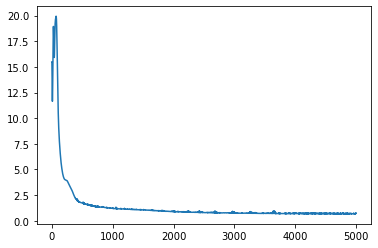

In [8]:
plt.plot(history.history['val_mae'])
np.mean(np.absolute(y_test - y_predicted[0,:,0]))

# 2016

In [9]:
X, y, X_test, y_test = allocate_data(2015)

model = Sequential(
    [
        BatchNormalization(),
        Dense(16, activation = 'relu', input_shape=(n_counties, n_features)),
        Dense(1, activation = 'relu')
    ]
)

model.compile(loss='mse', metrics=['mae'], optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2))

history = model.fit(X, y, epochs=5000, validation_data = (X_test, y_test))

y_predicted = model.predict(X_test)

Epoch 1/5000
1/1 [==============================] - 1s 511ms/step - loss: 230.3721 - mae: 12.3006 - val_loss: 290.1995 - val_mae: 10.5115
Epoch 2/5000
1/1 [==============================] - 0s 22ms/step - loss: 227.3600 - mae: 12.2056 - val_loss: 255.2836 - val_mae: 11.4072
Epoch 3/5000
1/1 [==============================] - 0s 22ms/step - loss: 223.6710 - mae: 12.0859 - val_loss: 279.6756 - val_mae: 13.0135
Epoch 4/5000
1/1 [==============================] - 0s 24ms/step - loss: 219.3095 - mae: 11.9410 - val_loss: 322.4930 - val_mae: 14.7019
Epoch 5/5000
1/1 [==============================] - 0s 23ms/step - loss: 214.3654 - mae: 11.7736 - val_loss: 376.7900 - val_mae: 16.4212
Epoch 6/5000
1/1 [==============================] - 0s 22ms/step - loss: 208.8809 - mae: 11.5855 - val_loss: 441.2261 - val_mae: 18.2033
Epoch 7/5000
1/1 [==============================] - 0s 43ms/step - loss: 202.9676 - mae: 11.3793 - val_loss: 517.4021 - val_mae: 20.0978
Epoch 8/5000
1/1 [======================

Epoch 61/5000
1/1 [==============================] - 0s 22ms/step - loss: 38.9616 - mae: 3.7292 - val_loss: 358.1415 - val_mae: 16.4666
Epoch 62/5000
1/1 [==============================] - 0s 22ms/step - loss: 38.6868 - mae: 3.6977 - val_loss: 347.9958 - val_mae: 16.2425
Epoch 63/5000
1/1 [==============================] - 0s 21ms/step - loss: 38.4193 - mae: 3.6659 - val_loss: 335.5279 - val_mae: 15.9482
Epoch 64/5000
1/1 [==============================] - 0s 21ms/step - loss: 38.1574 - mae: 3.6335 - val_loss: 320.9720 - val_mae: 15.5854
Epoch 65/5000
1/1 [==============================] - 0s 20ms/step - loss: 37.9013 - mae: 3.6005 - val_loss: 304.7728 - val_mae: 15.1611
Epoch 66/5000
1/1 [==============================] - 0s 20ms/step - loss: 37.6536 - mae: 3.5677 - val_loss: 287.5253 - val_mae: 14.6888
Epoch 67/5000
1/1 [==============================] - 0s 21ms/step - loss: 37.4192 - mae: 3.5354 - val_loss: 269.8644 - val_mae: 14.1830
Epoch 68/5000
1/1 [=============================

Epoch 182/5000
1/1 [==============================] - 0s 21ms/step - loss: 26.4501 - mae: 2.5690 - val_loss: 49.8709 - val_mae: 3.4555
Epoch 183/5000
1/1 [==============================] - 0s 21ms/step - loss: 26.3586 - mae: 2.5639 - val_loss: 49.8607 - val_mae: 3.4471
Epoch 184/5000
1/1 [==============================] - 0s 20ms/step - loss: 26.2671 - mae: 2.5588 - val_loss: 49.8633 - val_mae: 3.4399
Epoch 185/5000
1/1 [==============================] - 0s 20ms/step - loss: 26.1753 - mae: 2.5537 - val_loss: 49.8791 - val_mae: 3.4338
Epoch 186/5000
1/1 [==============================] - 0s 21ms/step - loss: 26.0830 - mae: 2.5486 - val_loss: 49.8993 - val_mae: 3.4284
Epoch 187/5000
1/1 [==============================] - 0s 20ms/step - loss: 25.9903 - mae: 2.5432 - val_loss: 49.9244 - val_mae: 3.4234
Epoch 188/5000
1/1 [==============================] - 0s 20ms/step - loss: 25.8960 - mae: 2.5377 - val_loss: 49.9522 - val_mae: 3.4188
Epoch 189/5000
1/1 [==============================] - 0

Epoch 243/5000
1/1 [==============================] - 0s 20ms/step - loss: 20.3856 - mae: 2.2206 - val_loss: 46.9099 - val_mae: 3.3310
Epoch 244/5000
1/1 [==============================] - 0s 22ms/step - loss: 20.2805 - mae: 2.2150 - val_loss: 46.7330 - val_mae: 3.3268
Epoch 245/5000
1/1 [==============================] - 0s 19ms/step - loss: 20.1750 - mae: 2.2096 - val_loss: 46.5370 - val_mae: 3.3216
Epoch 246/5000
1/1 [==============================] - 0s 20ms/step - loss: 20.0697 - mae: 2.2043 - val_loss: 46.3767 - val_mae: 3.3172
Epoch 247/5000
1/1 [==============================] - 0s 22ms/step - loss: 19.9643 - mae: 2.1987 - val_loss: 46.2792 - val_mae: 3.3144
Epoch 248/5000
1/1 [==============================] - 0s 20ms/step - loss: 19.8588 - mae: 2.1929 - val_loss: 46.2349 - val_mae: 3.3128
Epoch 249/5000
1/1 [==============================] - 0s 20ms/step - loss: 19.7528 - mae: 2.1871 - val_loss: 46.1840 - val_mae: 3.3111
Epoch 250/5000
1/1 [==============================] - 0

Epoch 304/5000
1/1 [==============================] - 0s 20ms/step - loss: 13.9838 - mae: 1.8523 - val_loss: 33.3536 - val_mae: 2.7266
Epoch 305/5000
1/1 [==============================] - 0s 21ms/step - loss: 13.8871 - mae: 1.8458 - val_loss: 33.0249 - val_mae: 2.7126
Epoch 306/5000
1/1 [==============================] - 0s 20ms/step - loss: 13.7907 - mae: 1.8395 - val_loss: 32.6774 - val_mae: 2.6971
Epoch 307/5000
1/1 [==============================] - 0s 20ms/step - loss: 13.6952 - mae: 1.8326 - val_loss: 32.3819 - val_mae: 2.6814
Epoch 308/5000
1/1 [==============================] - 0s 20ms/step - loss: 13.6006 - mae: 1.8246 - val_loss: 32.1204 - val_mae: 2.6674
Epoch 309/5000
1/1 [==============================] - 0s 21ms/step - loss: 13.5066 - mae: 1.8171 - val_loss: 31.8442 - val_mae: 2.6554
Epoch 310/5000
1/1 [==============================] - 0s 20ms/step - loss: 13.4135 - mae: 1.8110 - val_loss: 31.5428 - val_mae: 2.6432
Epoch 311/5000
1/1 [==============================] - 0

Epoch 365/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.6494 - mae: 1.5249 - val_loss: 19.8836 - val_mae: 2.0782
Epoch 366/5000
1/1 [==============================] - 0s 19ms/step - loss: 9.6028 - mae: 1.5223 - val_loss: 19.7632 - val_mae: 2.0710
Epoch 367/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.5568 - mae: 1.5178 - val_loss: 19.6315 - val_mae: 2.0614
Epoch 368/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.5114 - mae: 1.5123 - val_loss: 19.5024 - val_mae: 2.0549
Epoch 369/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.4666 - mae: 1.5088 - val_loss: 19.3912 - val_mae: 2.0503
Epoch 370/5000
1/1 [==============================] - 0s 19ms/step - loss: 9.4221 - mae: 1.5060 - val_loss: 19.2850 - val_mae: 2.0429
Epoch 371/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.3782 - mae: 1.5017 - val_loss: 19.1685 - val_mae: 2.0352
Epoch 372/5000
1/1 [==============================] - 0s 20ms/

1/1 [==============================] - 0s 22ms/step - loss: 6.2188 - mae: 1.1845 - val_loss: 17.2539 - val_mae: 1.7123
Epoch 488/5000
1/1 [==============================] - 0s 21ms/step - loss: 6.1944 - mae: 1.2043 - val_loss: 17.4728 - val_mae: 1.7014
Epoch 489/5000
1/1 [==============================] - 0s 20ms/step - loss: 6.1734 - mae: 1.1925 - val_loss: 17.4670 - val_mae: 1.6859
Epoch 490/5000
1/1 [==============================] - 0s 20ms/step - loss: 6.1586 - mae: 1.1841 - val_loss: 17.4313 - val_mae: 1.7165
Epoch 491/5000
1/1 [==============================] - 0s 21ms/step - loss: 6.1461 - mae: 1.2034 - val_loss: 17.7099 - val_mae: 1.6835
Epoch 492/5000
1/1 [==============================] - 0s 19ms/step - loss: 6.1317 - mae: 1.1787 - val_loss: 17.4562 - val_mae: 1.7073
Epoch 493/5000
1/1 [==============================] - 0s 20ms/step - loss: 6.1134 - mae: 1.1969 - val_loss: 17.7657 - val_mae: 1.6905
Epoch 494/5000
1/1 [==============================] - 0s 20ms/step - loss: 6.

1/1 [==============================] - 0s 19ms/step - loss: 4.7591 - mae: 1.0417 - val_loss: 23.6667 - val_mae: 1.6252
Epoch 610/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.7502 - mae: 1.0577 - val_loss: 23.8471 - val_mae: 1.6098
Epoch 611/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.7412 - mae: 1.0393 - val_loss: 23.8174 - val_mae: 1.6246
Epoch 612/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.7320 - mae: 1.0542 - val_loss: 23.8314 - val_mae: 1.6099
Epoch 613/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.7226 - mae: 1.0404 - val_loss: 23.9092 - val_mae: 1.6183
Epoch 614/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.7134 - mae: 1.0470 - val_loss: 23.8734 - val_mae: 1.6127
Epoch 615/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.7047 - mae: 1.0432 - val_loss: 23.9481 - val_mae: 1.6097
Epoch 616/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.

1/1 [==============================] - 0s 19ms/step - loss: 3.8226 - mae: 0.9388 - val_loss: 28.9182 - val_mae: 1.4926
Epoch 732/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.8162 - mae: 0.9237 - val_loss: 28.8721 - val_mae: 1.5031
Epoch 733/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.8100 - mae: 0.9360 - val_loss: 28.9348 - val_mae: 1.4904
Epoch 734/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.8039 - mae: 0.9223 - val_loss: 28.9141 - val_mae: 1.5007
Epoch 735/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.7978 - mae: 0.9339 - val_loss: 28.9798 - val_mae: 1.4880
Epoch 736/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.7920 - mae: 0.9204 - val_loss: 28.9414 - val_mae: 1.4992
Epoch 737/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.7863 - mae: 0.9332 - val_loss: 29.0488 - val_mae: 1.4853
Epoch 738/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.

1/1 [==============================] - 0s 20ms/step - loss: 3.2421 - mae: 0.8527 - val_loss: 32.7666 - val_mae: 1.4702
Epoch 854/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.2429 - mae: 0.8711 - val_loss: 32.7553 - val_mae: 1.4481
Epoch 855/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.2413 - mae: 0.8472 - val_loss: 32.7403 - val_mae: 1.4666
Epoch 856/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.2344 - mae: 0.8682 - val_loss: 32.7422 - val_mae: 1.4514
Epoch 857/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.2266 - mae: 0.8507 - val_loss: 32.7647 - val_mae: 1.4530
Epoch 858/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.2225 - mae: 0.8518 - val_loss: 32.7357 - val_mae: 1.4641
Epoch 859/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.2215 - mae: 0.8649 - val_loss: 32.8049 - val_mae: 1.4489
Epoch 860/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.

1/1 [==============================] - 0s 20ms/step - loss: 2.8275 - mae: 0.8123 - val_loss: 31.7725 - val_mae: 1.3679
Epoch 976/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.8215 - mae: 0.7947 - val_loss: 31.5622 - val_mae: 1.3733
Epoch 977/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.8161 - mae: 0.8043 - val_loss: 31.5978 - val_mae: 1.3708
Epoch 978/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.8121 - mae: 0.7999 - val_loss: 31.6514 - val_mae: 1.3684
Epoch 979/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.8093 - mae: 0.7963 - val_loss: 31.4726 - val_mae: 1.3715
Epoch 980/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.8072 - mae: 0.8047 - val_loss: 31.7408 - val_mae: 1.3648
Epoch 981/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.8051 - mae: 0.7918 - val_loss: 31.3714 - val_mae: 1.3705
Epoch 982/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.

Epoch 1036/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.6606 - mae: 0.8120 - val_loss: 30.9145 - val_mae: 1.3348
Epoch 1037/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.6605 - mae: 0.7679 - val_loss: 30.0437 - val_mae: 1.3586
Epoch 1038/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.6563 - mae: 0.8101 - val_loss: 30.8273 - val_mae: 1.3308
Epoch 1039/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.6462 - mae: 0.7651 - val_loss: 30.0921 - val_mae: 1.3457
Epoch 1040/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.6345 - mae: 0.7956 - val_loss: 30.5172 - val_mae: 1.3250
Epoch 1041/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.6218 - mae: 0.7630 - val_loss: 30.3260 - val_mae: 1.3343
Epoch 1042/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.6136 - mae: 0.7784 - val_loss: 30.1058 - val_mae: 1.3246
Epoch 1043/5000
1/1 [==============================] - 

Epoch 1097/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.4513 - mae: 0.7554 - val_loss: 28.4001 - val_mae: 1.2836
Epoch 1098/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.4455 - mae: 0.7379 - val_loss: 27.9092 - val_mae: 1.2813
Epoch 1099/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.4437 - mae: 0.7412 - val_loss: 28.4640 - val_mae: 1.2937
Epoch 1100/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.4467 - mae: 0.7509 - val_loss: 27.6757 - val_mae: 1.2774
Epoch 1101/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.4545 - mae: 0.7369 - val_loss: 28.6053 - val_mae: 1.3064
Epoch 1102/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.4593 - mae: 0.7663 - val_loss: 27.6110 - val_mae: 1.2776
Epoch 1103/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.4654 - mae: 0.7382 - val_loss: 28.4448 - val_mae: 1.3066
Epoch 1104/5000
1/1 [==============================] - 

Epoch 1158/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.2849 - mae: 0.7045 - val_loss: 27.2001 - val_mae: 1.2617
Epoch 1159/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.2894 - mae: 0.7313 - val_loss: 26.5103 - val_mae: 1.2391
Epoch 1160/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.2969 - mae: 0.7063 - val_loss: 27.2553 - val_mae: 1.2640
Epoch 1161/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.2933 - mae: 0.7350 - val_loss: 26.4790 - val_mae: 1.2364
Epoch 1162/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.2890 - mae: 0.7037 - val_loss: 26.8998 - val_mae: 1.2571
Epoch 1163/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.2771 - mae: 0.7294 - val_loss: 26.7636 - val_mae: 1.2380
Epoch 1164/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.2709 - mae: 0.7023 - val_loss: 26.4349 - val_mae: 1.2494
Epoch 1165/5000
1/1 [==============================] - 

Epoch 1219/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.1571 - mae: 0.6897 - val_loss: 24.2570 - val_mae: 1.2177
Epoch 1220/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.1345 - mae: 0.7178 - val_loss: 24.3698 - val_mae: 1.1960
Epoch 1221/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.1373 - mae: 0.6855 - val_loss: 23.2887 - val_mae: 1.2207
Epoch 1222/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.1471 - mae: 0.7228 - val_loss: 24.3807 - val_mae: 1.1980
Epoch 1223/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.1302 - mae: 0.6871 - val_loss: 23.4304 - val_mae: 1.1979
Epoch 1224/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.1047 - mae: 0.6960 - val_loss: 23.4674 - val_mae: 1.1850
Epoch 1225/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.0955 - mae: 0.6806 - val_loss: 24.2036 - val_mae: 1.1944
Epoch 1226/5000
1/1 [==============================] - 

Epoch 1280/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9635 - mae: 0.6849 - val_loss: 21.0473 - val_mae: 1.1576
Epoch 1281/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9583 - mae: 0.6468 - val_loss: 21.7767 - val_mae: 1.1738
Epoch 1282/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9428 - mae: 0.6627 - val_loss: 21.2257 - val_mae: 1.1573
Epoch 1283/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.9337 - mae: 0.6480 - val_loss: 21.4898 - val_mae: 1.1577
Epoch 1284/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9272 - mae: 0.6449 - val_loss: 21.5132 - val_mae: 1.1679
Epoch 1285/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9275 - mae: 0.6586 - val_loss: 21.1008 - val_mae: 1.1519
Epoch 1286/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9324 - mae: 0.6402 - val_loss: 21.5405 - val_mae: 1.1736
Epoch 1287/5000
1/1 [==============================] - 

Epoch 1341/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.7862 - mae: 0.6129 - val_loss: 19.1464 - val_mae: 1.1036
Epoch 1342/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7845 - mae: 0.6267 - val_loss: 19.3447 - val_mae: 1.0937
Epoch 1343/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7843 - mae: 0.6123 - val_loss: 18.9443 - val_mae: 1.1030
Epoch 1344/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7846 - mae: 0.6295 - val_loss: 19.4270 - val_mae: 1.0945
Epoch 1345/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7851 - mae: 0.6134 - val_loss: 18.8022 - val_mae: 1.0996
Epoch 1346/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.7852 - mae: 0.6293 - val_loss: 19.4912 - val_mae: 1.0950
Epoch 1347/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7857 - mae: 0.6153 - val_loss: 18.6869 - val_mae: 1.0943
Epoch 1348/5000
1/1 [==============================] - 

Epoch 1402/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6573 - mae: 0.5883 - val_loss: 17.8875 - val_mae: 1.0622
Epoch 1403/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.6566 - mae: 0.6127 - val_loss: 17.6311 - val_mae: 1.0271
Epoch 1404/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.6583 - mae: 0.5789 - val_loss: 17.7889 - val_mae: 1.0746
Epoch 1405/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.6596 - mae: 0.6255 - val_loss: 17.5298 - val_mae: 1.0238
Epoch 1406/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.6613 - mae: 0.5765 - val_loss: 17.8061 - val_mae: 1.0780
Epoch 1407/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.6609 - mae: 0.6289 - val_loss: 17.3087 - val_mae: 1.0219
Epoch 1408/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.6627 - mae: 0.5774 - val_loss: 17.9917 - val_mae: 1.0762
Epoch 1409/5000
1/1 [==============================] - 

Epoch 1463/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5467 - mae: 0.5670 - val_loss: 16.3018 - val_mae: 1.0200
Epoch 1464/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.5418 - mae: 0.5865 - val_loss: 16.6218 - val_mae: 1.0052
Epoch 1465/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.5377 - mae: 0.5709 - val_loss: 16.2580 - val_mae: 1.0023
Epoch 1466/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5357 - mae: 0.5702 - val_loss: 16.5826 - val_mae: 1.0170
Epoch 1467/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5361 - mae: 0.5819 - val_loss: 16.1388 - val_mae: 0.9919
Epoch 1468/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5390 - mae: 0.5628 - val_loss: 16.6689 - val_mae: 1.0396
Epoch 1469/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5469 - mae: 0.6032 - val_loss: 15.9323 - val_mae: 0.9893
Epoch 1470/5000
1/1 [==============================] - 

Epoch 1524/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4673 - mae: 0.5572 - val_loss: 15.8153 - val_mae: 1.0184
Epoch 1525/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4565 - mae: 0.5849 - val_loss: 15.3607 - val_mae: 0.9637
Epoch 1526/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4541 - mae: 0.5416 - val_loss: 15.6143 - val_mae: 1.0331
Epoch 1527/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4550 - mae: 0.5999 - val_loss: 15.5148 - val_mae: 0.9617
Epoch 1528/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4594 - mae: 0.5403 - val_loss: 15.5131 - val_mae: 1.0373
Epoch 1529/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4563 - mae: 0.6042 - val_loss: 15.4908 - val_mae: 0.9606
Epoch 1530/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4529 - mae: 0.5380 - val_loss: 15.5035 - val_mae: 1.0191
Epoch 1531/5000
1/1 [==============================] - 

Epoch 1585/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3657 - mae: 0.5733 - val_loss: 15.2620 - val_mae: 0.9554
Epoch 1586/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.3622 - mae: 0.5295 - val_loss: 15.1236 - val_mae: 0.9887
Epoch 1587/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3575 - mae: 0.5597 - val_loss: 15.2476 - val_mae: 0.9665
Epoch 1588/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3542 - mae: 0.5388 - val_loss: 15.0105 - val_mae: 0.9707
Epoch 1589/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3524 - mae: 0.5440 - val_loss: 15.2110 - val_mae: 0.9852
Epoch 1590/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3528 - mae: 0.5563 - val_loss: 14.9363 - val_mae: 0.9578
Epoch 1591/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3553 - mae: 0.5337 - val_loss: 15.2399 - val_mae: 1.0044
Epoch 1592/5000
1/1 [==============================] - 

Epoch 1646/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2847 - mae: 0.5436 - val_loss: 14.6412 - val_mae: 0.9419
Epoch 1647/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.2842 - mae: 0.5264 - val_loss: 14.5499 - val_mae: 0.9629
Epoch 1648/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2838 - mae: 0.5471 - val_loss: 14.6882 - val_mae: 0.9416
Epoch 1649/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2832 - mae: 0.5263 - val_loss: 14.5019 - val_mae: 0.9602
Epoch 1650/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2817 - mae: 0.5454 - val_loss: 14.6637 - val_mae: 0.9420
Epoch 1651/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2800 - mae: 0.5270 - val_loss: 14.4842 - val_mae: 0.9551
Epoch 1652/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.2778 - mae: 0.5408 - val_loss: 14.6032 - val_mae: 0.9462
Epoch 1653/5000
1/1 [==============================] - 

Epoch 1707/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.2166 - mae: 0.5215 - val_loss: 14.1959 - val_mae: 0.9428
Epoch 1708/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2172 - mae: 0.5350 - val_loss: 13.9336 - val_mae: 0.9219
Epoch 1709/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2185 - mae: 0.5186 - val_loss: 14.2566 - val_mae: 0.9495
Epoch 1710/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.2205 - mae: 0.5420 - val_loss: 13.8272 - val_mae: 0.9160
Epoch 1711/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.2230 - mae: 0.5153 - val_loss: 14.2887 - val_mae: 0.9585
Epoch 1712/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2253 - mae: 0.5509 - val_loss: 13.7537 - val_mae: 0.9124
Epoch 1713/5000
1/1 [==============================] - 0s 37ms/step - loss: 1.2285 - mae: 0.5139 - val_loss: 14.3021 - val_mae: 0.9688
Epoch 1714/5000
1/1 [==============================] - 

Epoch 1768/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1908 - mae: 0.5618 - val_loss: 12.9919 - val_mae: 0.8990
Epoch 1769/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1924 - mae: 0.5111 - val_loss: 13.7642 - val_mae: 0.9583
Epoch 1770/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1750 - mae: 0.5579 - val_loss: 13.2682 - val_mae: 0.8912
Epoch 1771/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1667 - mae: 0.5016 - val_loss: 13.5052 - val_mae: 0.9512
Epoch 1772/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1596 - mae: 0.5513 - val_loss: 13.4357 - val_mae: 0.8952
Epoch 1773/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1566 - mae: 0.5014 - val_loss: 13.3242 - val_mae: 0.9397
Epoch 1774/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1515 - mae: 0.5404 - val_loss: 13.4646 - val_mae: 0.9033
Epoch 1775/5000
1/1 [==============================] - 

Epoch 1829/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1072 - mae: 0.5279 - val_loss: 12.9206 - val_mae: 0.8958
Epoch 1830/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1047 - mae: 0.5023 - val_loss: 13.5528 - val_mae: 0.9287
Epoch 1831/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1017 - mae: 0.5259 - val_loss: 12.9750 - val_mae: 0.8933
Epoch 1832/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.0988 - mae: 0.4996 - val_loss: 13.4808 - val_mae: 0.9310
Epoch 1833/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0961 - mae: 0.5277 - val_loss: 13.0490 - val_mae: 0.8894
Epoch 1834/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0943 - mae: 0.4958 - val_loss: 13.4060 - val_mae: 0.9338
Epoch 1835/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0925 - mae: 0.5307 - val_loss: 13.1091 - val_mae: 0.8866
Epoch 1836/5000
1/1 [==============================] - 

Epoch 1890/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0557 - mae: 0.5383 - val_loss: 13.0896 - val_mae: 0.8761
Epoch 1891/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.0558 - mae: 0.4830 - val_loss: 13.3168 - val_mae: 0.9458
Epoch 1892/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0507 - mae: 0.5422 - val_loss: 13.2358 - val_mae: 0.8776
Epoch 1893/5000
1/1 [==============================] - 0s 41ms/step - loss: 1.0486 - mae: 0.4813 - val_loss: 13.2450 - val_mae: 0.9265
Epoch 1894/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.0374 - mae: 0.5236 - val_loss: 13.2173 - val_mae: 0.8868
Epoch 1895/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.0295 - mae: 0.4866 - val_loss: 13.2460 - val_mae: 0.8982
Epoch 1896/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.0259 - mae: 0.4966 - val_loss: 13.1639 - val_mae: 0.9114
Epoch 1897/5000
1/1 [==============================] - 

Epoch 1951/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9859 - mae: 0.4814 - val_loss: 12.8602 - val_mae: 0.9239
Epoch 1952/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.9942 - mae: 0.5257 - val_loss: 12.9359 - val_mae: 0.8656
Epoch 1953/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0116 - mae: 0.4771 - val_loss: 12.8768 - val_mae: 0.9445
Epoch 1954/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0143 - mae: 0.5463 - val_loss: 12.8517 - val_mae: 0.8641
Epoch 1955/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0073 - mae: 0.4742 - val_loss: 13.0221 - val_mae: 0.9142
Epoch 1956/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9887 - mae: 0.5113 - val_loss: 12.5925 - val_mae: 0.8879
Epoch 1957/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9876 - mae: 0.4920 - val_loss: 13.2777 - val_mae: 0.8862
Epoch 1958/5000
1/1 [==============================] - 

Epoch 2012/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.9439 - mae: 0.5036 - val_loss: 12.9912 - val_mae: 0.8679
Epoch 2013/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.9404 - mae: 0.4695 - val_loss: 12.5852 - val_mae: 0.8768
Epoch 2014/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.9401 - mae: 0.4813 - val_loss: 13.0727 - val_mae: 0.8935
Epoch 2015/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.9440 - mae: 0.4928 - val_loss: 12.4698 - val_mae: 0.8579
Epoch 2016/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.9529 - mae: 0.4669 - val_loss: 13.0103 - val_mae: 0.9237
Epoch 2017/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.9580 - mae: 0.5240 - val_loss: 12.5367 - val_mae: 0.8534
Epoch 2018/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.9702 - mae: 0.4679 - val_loss: 12.9468 - val_mae: 0.9371
Epoch 2019/5000
1/1 [==============================] - 

Epoch 2073/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.9240 - mae: 0.5217 - val_loss: 12.3506 - val_mae: 0.8425
Epoch 2074/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.9354 - mae: 0.4643 - val_loss: 12.8603 - val_mae: 0.9188
Epoch 2075/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.9312 - mae: 0.5277 - val_loss: 12.2909 - val_mae: 0.8407
Epoch 2076/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.9278 - mae: 0.4608 - val_loss: 12.9401 - val_mae: 0.8948
Epoch 2077/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9169 - mae: 0.5025 - val_loss: 12.1760 - val_mae: 0.8512
Epoch 2078/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9130 - mae: 0.4677 - val_loss: 12.9120 - val_mae: 0.8684
Epoch 2079/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9032 - mae: 0.4777 - val_loss: 12.3271 - val_mae: 0.8612
Epoch 2080/5000
1/1 [==============================] - 

Epoch 2134/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8544 - mae: 0.4548 - val_loss: 12.1661 - val_mae: 0.8621
Epoch 2135/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8577 - mae: 0.4831 - val_loss: 11.9555 - val_mae: 0.8244
Epoch 2136/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8643 - mae: 0.4511 - val_loss: 12.2349 - val_mae: 0.8805
Epoch 2137/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8697 - mae: 0.5005 - val_loss: 11.8653 - val_mae: 0.8248
Epoch 2138/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8820 - mae: 0.4544 - val_loss: 12.3595 - val_mae: 0.8901
Epoch 2139/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8840 - mae: 0.5105 - val_loss: 11.7223 - val_mae: 0.8250
Epoch 2140/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8891 - mae: 0.4552 - val_loss: 12.5266 - val_mae: 0.8816
Epoch 2141/5000
1/1 [==============================] - 

Epoch 2195/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8270 - mae: 0.4857 - val_loss: 11.4848 - val_mae: 0.8081
Epoch 2196/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8286 - mae: 0.4454 - val_loss: 11.7171 - val_mae: 0.8524
Epoch 2197/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8280 - mae: 0.4836 - val_loss: 11.2702 - val_mae: 0.8091
Epoch 2198/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8341 - mae: 0.4466 - val_loss: 11.9179 - val_mae: 0.8529
Epoch 2199/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8399 - mae: 0.4834 - val_loss: 11.1207 - val_mae: 0.8094
Epoch 2200/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8458 - mae: 0.4495 - val_loss: 11.8304 - val_mae: 0.8476
Epoch 2201/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8305 - mae: 0.4807 - val_loss: 11.3639 - val_mae: 0.8052
Epoch 2202/5000
1/1 [==============================] - 

Epoch 2256/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7880 - mae: 0.4491 - val_loss: 11.3638 - val_mae: 0.8042
Epoch 2257/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7872 - mae: 0.4442 - val_loss: 10.9754 - val_mae: 0.8223
Epoch 2258/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7881 - mae: 0.4661 - val_loss: 11.2421 - val_mae: 0.7969
Epoch 2259/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7908 - mae: 0.4400 - val_loss: 11.0660 - val_mae: 0.8323
Epoch 2260/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7887 - mae: 0.4743 - val_loss: 11.0429 - val_mae: 0.7945
Epoch 2261/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7909 - mae: 0.4393 - val_loss: 11.2258 - val_mae: 0.8354
Epoch 2262/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7908 - mae: 0.4740 - val_loss: 10.8195 - val_mae: 0.7945
Epoch 2263/5000
1/1 [==============================] - 

Epoch 2317/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7675 - mae: 0.4422 - val_loss: 10.5236 - val_mae: 0.7916
Epoch 2318/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7648 - mae: 0.4409 - val_loss: 11.0846 - val_mae: 0.8313
Epoch 2319/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7738 - mae: 0.4762 - val_loss: 10.5820 - val_mae: 0.7972
Epoch 2320/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7994 - mae: 0.4527 - val_loss: 11.1826 - val_mae: 0.8835
Epoch 2321/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8212 - mae: 0.5287 - val_loss: 10.5787 - val_mae: 0.8291
Epoch 2322/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8620 - mae: 0.4881 - val_loss: 11.3682 - val_mae: 0.8704
Epoch 2323/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8323 - mae: 0.5132 - val_loss: 10.3694 - val_mae: 0.7937
Epoch 2324/5000
1/1 [==============================] - 

Epoch 2378/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7344 - mae: 0.4333 - val_loss: 10.5499 - val_mae: 0.7950
Epoch 2379/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7297 - mae: 0.4469 - val_loss: 10.5225 - val_mae: 0.7929
Epoch 2380/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7291 - mae: 0.4454 - val_loss: 10.6257 - val_mae: 0.7802
Epoch 2381/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7317 - mae: 0.4335 - val_loss: 10.5113 - val_mae: 0.7982
Epoch 2382/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7315 - mae: 0.4526 - val_loss: 10.5626 - val_mae: 0.7791
Epoch 2383/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7287 - mae: 0.4338 - val_loss: 10.5697 - val_mae: 0.7860
Epoch 2384/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7266 - mae: 0.4392 - val_loss: 10.4673 - val_mae: 0.7947
Epoch 2385/5000
1/1 [==============================] - 

Epoch 2439/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7083 - mae: 0.4374 - val_loss: 10.3045 - val_mae: 0.7792
Epoch 2440/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7080 - mae: 0.4384 - val_loss: 10.2862 - val_mae: 0.7774
Epoch 2441/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7077 - mae: 0.4370 - val_loss: 10.2936 - val_mae: 0.7792
Epoch 2442/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7074 - mae: 0.4386 - val_loss: 10.2794 - val_mae: 0.7774
Epoch 2443/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7070 - mae: 0.4371 - val_loss: 10.2877 - val_mae: 0.7781
Epoch 2444/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7067 - mae: 0.4378 - val_loss: 10.2682 - val_mae: 0.7779
Epoch 2445/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7064 - mae: 0.4378 - val_loss: 10.2794 - val_mae: 0.7774
Epoch 2446/5000
1/1 [==============================] - 

Epoch 2500/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7024 - mae: 0.4308 - val_loss: 10.3235 - val_mae: 0.7945
Epoch 2501/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7062 - mae: 0.4549 - val_loss: 9.7268 - val_mae: 0.7668
Epoch 2502/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7130 - mae: 0.4342 - val_loss: 10.5417 - val_mae: 0.8002
Epoch 2503/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7234 - mae: 0.4587 - val_loss: 9.6028 - val_mae: 0.7727
Epoch 2504/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7360 - mae: 0.4417 - val_loss: 10.4822 - val_mae: 0.8001
Epoch 2505/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7144 - mae: 0.4596 - val_loss: 9.9148 - val_mae: 0.7619
Epoch 2506/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7032 - mae: 0.4300 - val_loss: 10.2084 - val_mae: 0.7932
Epoch 2507/5000
1/1 [==============================] - 0s 

Epoch 2561/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6870 - mae: 0.4337 - val_loss: 10.1838 - val_mae: 0.7906
Epoch 2562/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6949 - mae: 0.4526 - val_loss: 9.4596 - val_mae: 0.7662
Epoch 2563/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7077 - mae: 0.4368 - val_loss: 10.3306 - val_mae: 0.8089
Epoch 2564/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7155 - mae: 0.4698 - val_loss: 9.4423 - val_mae: 0.7677
Epoch 2565/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7298 - mae: 0.4420 - val_loss: 10.2262 - val_mae: 0.8201
Epoch 2566/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7139 - mae: 0.4833 - val_loss: 9.7563 - val_mae: 0.7650
Epoch 2567/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7100 - mae: 0.4402 - val_loss: 10.0470 - val_mae: 0.8015
Epoch 2568/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 19ms/step - loss: 0.6712 - mae: 0.4322 - val_loss: 9.5861 - val_mae: 0.7977
Epoch 2623/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6756 - mae: 0.4625 - val_loss: 9.8912 - val_mae: 0.7671
Epoch 2624/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6776 - mae: 0.4338 - val_loss: 9.5101 - val_mae: 0.7793
Epoch 2625/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6705 - mae: 0.4480 - val_loss: 9.7179 - val_mae: 0.7670
Epoch 2626/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6626 - mae: 0.4343 - val_loss: 9.5614 - val_mae: 0.7613
Epoch 2627/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6638 - mae: 0.4295 - val_loss: 9.6068 - val_mae: 0.8009
Epoch 2628/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6731 - mae: 0.4653 - val_loss: 9.6243 - val_mae: 0.7694
Epoch 2629/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.6593 - mae: 0.4621 - val_loss: 9.2511 - val_mae: 0.7673
Epoch 2745/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6587 - mae: 0.4313 - val_loss: 9.8044 - val_mae: 0.7966
Epoch 2746/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6588 - mae: 0.4517 - val_loss: 9.1101 - val_mae: 0.7725
Epoch 2747/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6624 - mae: 0.4358 - val_loss: 9.8351 - val_mae: 0.7897
Epoch 2748/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6581 - mae: 0.4457 - val_loss: 9.1832 - val_mae: 0.7709
Epoch 2749/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6540 - mae: 0.4345 - val_loss: 9.6897 - val_mae: 0.7863
Epoch 2750/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6447 - mae: 0.4432 - val_loss: 9.4319 - val_mae: 0.7674
Epoch 2751/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.6429 - mae: 0.4309 - val_loss: 9.5480 - val_mae: 0.7918
Epoch 2867/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6375 - mae: 0.4458 - val_loss: 8.9626 - val_mae: 0.7756
Epoch 2868/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6377 - mae: 0.4367 - val_loss: 9.5899 - val_mae: 0.7814
Epoch 2869/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6379 - mae: 0.4374 - val_loss: 9.0187 - val_mae: 0.7792
Epoch 2870/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6341 - mae: 0.4401 - val_loss: 9.5019 - val_mae: 0.7786
Epoch 2871/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6281 - mae: 0.4348 - val_loss: 9.1848 - val_mae: 0.7728
Epoch 2872/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6236 - mae: 0.4322 - val_loss: 9.3465 - val_mae: 0.7849
Epoch 2873/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.6349 - mae: 0.4327 - val_loss: 9.3825 - val_mae: 0.8091
Epoch 2989/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6299 - mae: 0.4624 - val_loss: 9.0755 - val_mae: 0.7691
Epoch 2990/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6318 - mae: 0.4343 - val_loss: 9.2943 - val_mae: 0.8089
Epoch 2991/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6285 - mae: 0.4635 - val_loss: 9.0428 - val_mae: 0.7671
Epoch 2992/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6258 - mae: 0.4307 - val_loss: 9.3398 - val_mae: 0.7957
Epoch 2993/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6213 - mae: 0.4500 - val_loss: 8.8569 - val_mae: 0.7683
Epoch 2994/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6220 - mae: 0.4306 - val_loss: 9.4689 - val_mae: 0.7872
Epoch 2995/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.6092 - mae: 0.4292 - val_loss: 9.3015 - val_mae: 0.7950
Epoch 3111/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6161 - mae: 0.4482 - val_loss: 8.6701 - val_mae: 0.7690
Epoch 3112/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6247 - mae: 0.4324 - val_loss: 9.3691 - val_mae: 0.8029
Epoch 3113/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6251 - mae: 0.4557 - val_loss: 8.7262 - val_mae: 0.7679
Epoch 3114/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6273 - mae: 0.4326 - val_loss: 9.3162 - val_mae: 0.8070
Epoch 3115/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6222 - mae: 0.4599 - val_loss: 8.8770 - val_mae: 0.7670
Epoch 3116/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6197 - mae: 0.4315 - val_loss: 9.2820 - val_mae: 0.8036
Epoch 3117/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.5903 - mae: 0.4353 - val_loss: 8.8966 - val_mae: 0.7668
Epoch 3233/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5909 - mae: 0.4279 - val_loss: 9.0680 - val_mae: 0.7797
Epoch 3234/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5918 - mae: 0.4370 - val_loss: 8.8350 - val_mae: 0.7658
Epoch 3235/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5932 - mae: 0.4278 - val_loss: 9.1107 - val_mae: 0.7837
Epoch 3236/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5952 - mae: 0.4402 - val_loss: 8.7588 - val_mae: 0.7648
Epoch 3237/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5984 - mae: 0.4279 - val_loss: 9.1788 - val_mae: 0.7915
Epoch 3238/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6029 - mae: 0.4467 - val_loss: 8.6786 - val_mae: 0.7654
Epoch 3239/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.6150 - mae: 0.4327 - val_loss: 9.2690 - val_mae: 0.8104
Epoch 3355/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6194 - mae: 0.4648 - val_loss: 8.5953 - val_mae: 0.7693
Epoch 3356/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6291 - mae: 0.4399 - val_loss: 9.2775 - val_mae: 0.8255
Epoch 3357/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.6319 - mae: 0.4787 - val_loss: 8.6577 - val_mae: 0.7771
Epoch 3358/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6401 - mae: 0.4489 - val_loss: 9.2653 - val_mae: 0.8291
Epoch 3359/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6355 - mae: 0.4820 - val_loss: 8.6621 - val_mae: 0.7718
Epoch 3360/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6306 - mae: 0.4422 - val_loss: 9.2382 - val_mae: 0.8097
Epoch 3361/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.5779 - mae: 0.4319 - val_loss: 8.7364 - val_mae: 0.7618
Epoch 3477/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5780 - mae: 0.4279 - val_loss: 8.9489 - val_mae: 0.7707
Epoch 3478/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5782 - mae: 0.4331 - val_loss: 8.7360 - val_mae: 0.7609
Epoch 3479/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5785 - mae: 0.4273 - val_loss: 8.9401 - val_mae: 0.7737
Epoch 3480/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5791 - mae: 0.4356 - val_loss: 8.7147 - val_mae: 0.7590
Epoch 3481/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5800 - mae: 0.4264 - val_loss: 8.9448 - val_mae: 0.7768
Epoch 3482/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5814 - mae: 0.4385 - val_loss: 8.6618 - val_mae: 0.7580
Epoch 3483/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.5748 - mae: 0.4258 - val_loss: 8.8474 - val_mae: 0.7650
Epoch 3599/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5718 - mae: 0.4306 - val_loss: 8.7823 - val_mae: 0.7622
Epoch 3600/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5710 - mae: 0.4290 - val_loss: 8.7289 - val_mae: 0.7582
Epoch 3601/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5717 - mae: 0.4264 - val_loss: 8.8811 - val_mae: 0.7687
Epoch 3602/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5738 - mae: 0.4335 - val_loss: 8.6337 - val_mae: 0.7560
Epoch 3603/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5768 - mae: 0.4254 - val_loss: 8.9849 - val_mae: 0.7775
Epoch 3604/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5808 - mae: 0.4394 - val_loss: 8.5608 - val_mae: 0.7572
Epoch 3605/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.6030 - mae: 0.4327 - val_loss: 9.2209 - val_mae: 0.8076
Epoch 3721/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6123 - mae: 0.4653 - val_loss: 8.4316 - val_mae: 0.7652
Epoch 3722/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6231 - mae: 0.4398 - val_loss: 9.1229 - val_mae: 0.8053
Epoch 3723/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6034 - mae: 0.4645 - val_loss: 8.7362 - val_mae: 0.7578
Epoch 3724/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5921 - mae: 0.4313 - val_loss: 8.8960 - val_mae: 0.7850
Epoch 3725/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5813 - mae: 0.4484 - val_loss: 8.8324 - val_mae: 0.7548
Epoch 3726/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5724 - mae: 0.4243 - val_loss: 8.8033 - val_mae: 0.7622
Epoch 3727/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.5730 - mae: 0.4244 - val_loss: 9.0327 - val_mae: 0.7786
Epoch 3843/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5763 - mae: 0.4402 - val_loss: 8.5717 - val_mae: 0.7546
Epoch 3844/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5806 - mae: 0.4258 - val_loss: 9.1228 - val_mae: 0.7871
Epoch 3845/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5862 - mae: 0.4472 - val_loss: 8.5055 - val_mae: 0.7565
Epoch 3846/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5934 - mae: 0.4291 - val_loss: 9.1516 - val_mae: 0.7943
Epoch 3847/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.5931 - mae: 0.4536 - val_loss: 8.5398 - val_mae: 0.7570
Epoch 3848/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.5949 - mae: 0.4302 - val_loss: 9.1537 - val_mae: 0.7974
Epoch 3849/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.5611 - mae: 0.4263 - val_loss: 8.6897 - val_mae: 0.7574
Epoch 3965/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5616 - mae: 0.4257 - val_loss: 8.9226 - val_mae: 0.7625
Epoch 3966/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5620 - mae: 0.4281 - val_loss: 8.7014 - val_mae: 0.7550
Epoch 3967/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5624 - mae: 0.4238 - val_loss: 8.9353 - val_mae: 0.7674
Epoch 3968/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5634 - mae: 0.4317 - val_loss: 8.7167 - val_mae: 0.7528
Epoch 3969/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5649 - mae: 0.4226 - val_loss: 8.9584 - val_mae: 0.7726
Epoch 3970/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5666 - mae: 0.4359 - val_loss: 8.6922 - val_mae: 0.7522
Epoch 3971/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.5573 - mae: 0.4237 - val_loss: 8.8475 - val_mae: 0.7589
Epoch 4087/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5571 - mae: 0.4251 - val_loss: 8.9369 - val_mae: 0.7599
Epoch 4088/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5569 - mae: 0.4253 - val_loss: 8.8721 - val_mae: 0.7563
Epoch 4089/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5571 - mae: 0.4231 - val_loss: 8.9365 - val_mae: 0.7624
Epoch 4090/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5574 - mae: 0.4274 - val_loss: 8.8737 - val_mae: 0.7545
Epoch 4091/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5578 - mae: 0.4220 - val_loss: 8.9506 - val_mae: 0.7640
Epoch 4092/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5581 - mae: 0.4285 - val_loss: 8.8381 - val_mae: 0.7543
Epoch 4093/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.5581 - mae: 0.4237 - val_loss: 9.1464 - val_mae: 0.7628
Epoch 4209/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5582 - mae: 0.4259 - val_loss: 8.8120 - val_mae: 0.7554
Epoch 4210/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5581 - mae: 0.4223 - val_loss: 9.0981 - val_mae: 0.7671
Epoch 4211/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5585 - mae: 0.4294 - val_loss: 8.8033 - val_mae: 0.7522
Epoch 4212/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5600 - mae: 0.4208 - val_loss: 9.0593 - val_mae: 0.7740
Epoch 4213/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5625 - mae: 0.4354 - val_loss: 8.7636 - val_mae: 0.7517
Epoch 4214/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5657 - mae: 0.4215 - val_loss: 9.1040 - val_mae: 0.7812
Epoch 4215/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.

1/1 [==============================] - 0s 21ms/step - loss: 0.5726 - mae: 0.4225 - val_loss: 9.3133 - val_mae: 0.7845
Epoch 4331/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5723 - mae: 0.4415 - val_loss: 8.7774 - val_mae: 0.7528
Epoch 4332/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5725 - mae: 0.4225 - val_loss: 9.3116 - val_mae: 0.7854
Epoch 4333/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5727 - mae: 0.4423 - val_loss: 8.7537 - val_mae: 0.7523
Epoch 4334/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5735 - mae: 0.4224 - val_loss: 9.3374 - val_mae: 0.7846
Epoch 4335/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.5741 - mae: 0.4415 - val_loss: 8.7041 - val_mae: 0.7529
Epoch 4336/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5752 - mae: 0.4230 - val_loss: 9.2840 - val_mae: 0.7800
Epoch 4337/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.5504 - mae: 0.4233 - val_loss: 8.9158 - val_mae: 0.7542
Epoch 4453/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5512 - mae: 0.4201 - val_loss: 9.1786 - val_mae: 0.7627
Epoch 4454/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5521 - mae: 0.4251 - val_loss: 8.8724 - val_mae: 0.7520
Epoch 4455/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5535 - mae: 0.4192 - val_loss: 9.2015 - val_mae: 0.7675
Epoch 4456/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5555 - mae: 0.4287 - val_loss: 8.8203 - val_mae: 0.7507
Epoch 4457/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.5585 - mae: 0.4190 - val_loss: 9.2614 - val_mae: 0.7763
Epoch 4458/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.5629 - mae: 0.4348 - val_loss: 8.7458 - val_mae: 0.7525
Epoch 4459/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.5537 - mae: 0.4193 - val_loss: 9.2456 - val_mae: 0.7710
Epoch 4575/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5544 - mae: 0.4292 - val_loss: 8.8980 - val_mae: 0.7507
Epoch 4576/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5562 - mae: 0.4179 - val_loss: 9.2679 - val_mae: 0.7775
Epoch 4577/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5588 - mae: 0.4344 - val_loss: 8.8910 - val_mae: 0.7512
Epoch 4578/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5618 - mae: 0.4188 - val_loss: 9.3610 - val_mae: 0.7835
Epoch 4579/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5652 - mae: 0.4382 - val_loss: 8.8242 - val_mae: 0.7532
Epoch 4580/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5701 - mae: 0.4210 - val_loss: 9.5065 - val_mae: 0.7897
Epoch 4581/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.5724 - mae: 0.4212 - val_loss: 9.3370 - val_mae: 0.7896
Epoch 4697/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5683 - mae: 0.4442 - val_loss: 8.9402 - val_mae: 0.7523
Epoch 4698/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5672 - mae: 0.4224 - val_loss: 9.2217 - val_mae: 0.7876
Epoch 4699/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5648 - mae: 0.4438 - val_loss: 8.9233 - val_mae: 0.7497
Epoch 4700/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5610 - mae: 0.4193 - val_loss: 9.2346 - val_mae: 0.7766
Epoch 4701/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5574 - mae: 0.4343 - val_loss: 8.8187 - val_mae: 0.7488
Epoch 4702/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5562 - mae: 0.4168 - val_loss: 9.3349 - val_mae: 0.7697
Epoch 4703/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.5422 - mae: 0.4164 - val_loss: 9.1253 - val_mae: 0.7554
Epoch 4819/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5420 - mae: 0.4183 - val_loss: 9.0715 - val_mae: 0.7523
Epoch 4820/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5419 - mae: 0.4164 - val_loss: 9.0996 - val_mae: 0.7552
Epoch 4821/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5418 - mae: 0.4182 - val_loss: 9.0997 - val_mae: 0.7527
Epoch 4822/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5418 - mae: 0.4165 - val_loss: 9.0873 - val_mae: 0.7553
Epoch 4823/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5418 - mae: 0.4181 - val_loss: 9.1082 - val_mae: 0.7537
Epoch 4824/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5417 - mae: 0.4170 - val_loss: 9.0850 - val_mae: 0.7544
Epoch 4825/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step - loss: 0.5436 - mae: 0.4138 - val_loss: 9.2224 - val_mae: 0.7594
Epoch 4941/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5422 - mae: 0.4205 - val_loss: 9.0620 - val_mae: 0.7488
Epoch 4942/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5412 - mae: 0.4141 - val_loss: 9.1616 - val_mae: 0.7565
Epoch 4943/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5406 - mae: 0.4188 - val_loss: 9.1000 - val_mae: 0.7498
Epoch 4944/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5402 - mae: 0.4146 - val_loss: 9.1250 - val_mae: 0.7540
Epoch 4945/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5399 - mae: 0.4172 - val_loss: 9.1277 - val_mae: 0.7519
Epoch 4946/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5397 - mae: 0.4157 - val_loss: 9.1127 - val_mae: 0.7522
Epoch 4947/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.

0.749212644830325

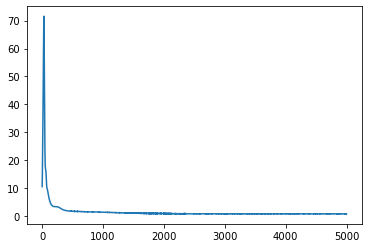

In [10]:
plt.plot(history.history['val_mae'])
np.mean(np.absolute(y_test - y_predicted[0,:,0]))

# 2017

In [11]:
X, y, X_test, y_test = allocate_data(2015)

model = Sequential(
    [
        BatchNormalization(),
        Dense(16, activation = 'relu', input_shape=(n_counties, n_features)),
        Dense(1, activation = 'relu')
    ]
)

model.compile(loss='mse', metrics=['mae'], optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2))

history = model.fit(X, y, epochs=5000, validation_data = (X_test, y_test))

y_predicted = model.predict(X_test)

Epoch 1/5000
1/1 [==============================] - 1s 617ms/step - loss: 212.9668 - mae: 11.7431 - val_loss: 783.5181 - val_mae: 17.6407
Epoch 2/5000
1/1 [==============================] - 0s 21ms/step - loss: 206.3426 - mae: 11.5222 - val_loss: 564.2345 - val_mae: 16.8391
Epoch 3/5000
1/1 [==============================] - 0s 24ms/step - loss: 199.5774 - mae: 11.2902 - val_loss: 523.0170 - val_mae: 17.2766
Epoch 4/5000
1/1 [==============================] - 0s 23ms/step - loss: 192.7640 - mae: 11.0494 - val_loss: 531.0120 - val_mae: 18.1546
Epoch 5/5000
1/1 [==============================] - 0s 22ms/step - loss: 185.9387 - mae: 10.8028 - val_loss: 563.3749 - val_mae: 19.2837
Epoch 6/5000
1/1 [==============================] - 0s 22ms/step - loss: 179.1003 - mae: 10.5487 - val_loss: 611.8419 - val_mae: 20.5774
Epoch 7/5000
1/1 [==============================] - 0s 21ms/step - loss: 172.2556 - mae: 10.2852 - val_loss: 672.5134 - val_mae: 21.9777
Epoch 8/5000
1/1 [======================

Epoch 61/5000
1/1 [==============================] - 0s 21ms/step - loss: 40.9750 - mae: 3.8419 - val_loss: 829.5717 - val_mae: 26.8907
Epoch 62/5000
1/1 [==============================] - 0s 22ms/step - loss: 40.7286 - mae: 3.8054 - val_loss: 780.5568 - val_mae: 26.0393
Epoch 63/5000
1/1 [==============================] - 0s 20ms/step - loss: 40.5098 - mae: 3.7712 - val_loss: 736.0363 - val_mae: 25.2421
Epoch 64/5000
1/1 [==============================] - 0s 21ms/step - loss: 40.3148 - mae: 3.7391 - val_loss: 696.0707 - val_mae: 24.5057
Epoch 65/5000
1/1 [==============================] - 0s 43ms/step - loss: 40.1376 - mae: 3.7089 - val_loss: 660.5867 - val_mae: 23.8333
Epoch 66/5000
1/1 [==============================] - 0s 20ms/step - loss: 39.9723 - mae: 3.6806 - val_loss: 629.4308 - val_mae: 23.2282
Epoch 67/5000
1/1 [==============================] - 0s 21ms/step - loss: 39.8135 - mae: 3.6538 - val_loss: 602.2779 - val_mae: 22.6881
Epoch 68/5000
1/1 [=============================

1/1 [==============================] - 0s 20ms/step - loss: 34.9644 - mae: 3.1520 - val_loss: 143.6197 - val_mae: 10.1771
Epoch 122/5000
1/1 [==============================] - 0s 21ms/step - loss: 34.9228 - mae: 3.1477 - val_loss: 140.7323 - val_mae: 10.0495
Epoch 123/5000
1/1 [==============================] - 0s 21ms/step - loss: 34.8820 - mae: 3.1439 - val_loss: 137.9651 - val_mae: 9.9253
Epoch 124/5000
1/1 [==============================] - 0s 20ms/step - loss: 34.8419 - mae: 3.1406 - val_loss: 135.3080 - val_mae: 9.8042
Epoch 125/5000
1/1 [==============================] - 0s 22ms/step - loss: 34.8026 - mae: 3.1377 - val_loss: 132.7544 - val_mae: 9.6861
Epoch 126/5000
1/1 [==============================] - 0s 22ms/step - loss: 34.7641 - mae: 3.1352 - val_loss: 130.2781 - val_mae: 9.5701
Epoch 127/5000
1/1 [==============================] - 0s 21ms/step - loss: 34.7262 - mae: 3.1331 - val_loss: 127.8654 - val_mae: 9.4555
Epoch 128/5000
1/1 [==============================] - 0s 20ms

Epoch 242/5000
1/1 [==============================] - 0s 21ms/step - loss: 30.3621 - mae: 2.8675 - val_loss: 54.6512 - val_mae: 4.8589
Epoch 243/5000
1/1 [==============================] - 0s 20ms/step - loss: 30.3051 - mae: 2.8641 - val_loss: 54.5209 - val_mae: 4.8471
Epoch 244/5000
1/1 [==============================] - 0s 20ms/step - loss: 30.2476 - mae: 2.8608 - val_loss: 54.3890 - val_mae: 4.8354
Epoch 245/5000
1/1 [==============================] - 0s 21ms/step - loss: 30.1896 - mae: 2.8576 - val_loss: 54.2515 - val_mae: 4.8233
Epoch 246/5000
1/1 [==============================] - 0s 20ms/step - loss: 30.1309 - mae: 2.8545 - val_loss: 54.1111 - val_mae: 4.8114
Epoch 247/5000
1/1 [==============================] - 0s 21ms/step - loss: 30.0718 - mae: 2.8513 - val_loss: 53.9714 - val_mae: 4.7994
Epoch 248/5000
1/1 [==============================] - 0s 21ms/step - loss: 30.0121 - mae: 2.8479 - val_loss: 53.8295 - val_mae: 4.7873
Epoch 249/5000
1/1 [==============================] - 0

Epoch 303/5000
1/1 [==============================] - 0s 21ms/step - loss: 25.5523 - mae: 2.5516 - val_loss: 44.6074 - val_mae: 3.9663
Epoch 304/5000
1/1 [==============================] - 0s 20ms/step - loss: 25.4461 - mae: 2.5455 - val_loss: 44.4406 - val_mae: 3.9527
Epoch 305/5000
1/1 [==============================] - 0s 20ms/step - loss: 25.3388 - mae: 2.5395 - val_loss: 44.2709 - val_mae: 3.9386
Epoch 306/5000
1/1 [==============================] - 0s 21ms/step - loss: 25.2305 - mae: 2.5334 - val_loss: 44.0976 - val_mae: 3.9237
Epoch 307/5000
1/1 [==============================] - 0s 45ms/step - loss: 25.1214 - mae: 2.5267 - val_loss: 43.9200 - val_mae: 3.9076
Epoch 308/5000
1/1 [==============================] - 0s 22ms/step - loss: 25.0115 - mae: 2.5196 - val_loss: 43.7433 - val_mae: 3.8914
Epoch 309/5000
1/1 [==============================] - 0s 21ms/step - loss: 24.9005 - mae: 2.5125 - val_loss: 43.5851 - val_mae: 3.8759
Epoch 310/5000
1/1 [==============================] - 0

Epoch 364/5000
1/1 [==============================] - 0s 22ms/step - loss: 17.7738 - mae: 2.0923 - val_loss: 34.7811 - val_mae: 2.9542
Epoch 365/5000
1/1 [==============================] - 0s 22ms/step - loss: 17.6423 - mae: 2.0853 - val_loss: 34.7073 - val_mae: 2.9434
Epoch 366/5000
1/1 [==============================] - 0s 22ms/step - loss: 17.5114 - mae: 2.0782 - val_loss: 34.7351 - val_mae: 2.9356
Epoch 367/5000
1/1 [==============================] - 0s 22ms/step - loss: 17.3811 - mae: 2.0701 - val_loss: 34.6269 - val_mae: 2.9223
Epoch 368/5000
1/1 [==============================] - 0s 23ms/step - loss: 17.2506 - mae: 2.0620 - val_loss: 34.4323 - val_mae: 2.9056
Epoch 369/5000
1/1 [==============================] - 0s 22ms/step - loss: 17.1204 - mae: 2.0540 - val_loss: 34.3701 - val_mae: 2.8952
Epoch 370/5000
1/1 [==============================] - 0s 21ms/step - loss: 16.9903 - mae: 2.0462 - val_loss: 34.3725 - val_mae: 2.8870
Epoch 371/5000
1/1 [==============================] - 0

Epoch 425/5000
1/1 [==============================] - 0s 20ms/step - loss: 10.1080 - mae: 1.5925 - val_loss: 25.4870 - val_mae: 2.3548
Epoch 426/5000
1/1 [==============================] - 0s 21ms/step - loss: 10.0236 - mae: 1.5857 - val_loss: 25.4719 - val_mae: 2.3467
Epoch 427/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.9412 - mae: 1.5768 - val_loss: 25.3558 - val_mae: 2.3404
Epoch 428/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.8603 - mae: 1.5711 - val_loss: 25.2176 - val_mae: 2.3330
Epoch 429/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.7814 - mae: 1.5655 - val_loss: 25.1838 - val_mae: 2.3244
Epoch 430/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.7044 - mae: 1.5576 - val_loss: 24.9181 - val_mae: 2.3149
Epoch 431/5000
1/1 [==============================] - 0s 19ms/step - loss: 9.6291 - mae: 1.5537 - val_loss: 25.0608 - val_mae: 2.3115
Epoch 432/5000
1/1 [==============================] - 0s 20m

1/1 [==============================] - 0s 22ms/step - loss: 5.6827 - mae: 1.1977 - val_loss: 24.7654 - val_mae: 1.7222
Epoch 548/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.6645 - mae: 1.1765 - val_loss: 24.8387 - val_mae: 1.7339
Epoch 549/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.6454 - mae: 1.1858 - val_loss: 24.7316 - val_mae: 1.7278
Epoch 550/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.6288 - mae: 1.1821 - val_loss: 25.0158 - val_mae: 1.7193
Epoch 551/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.6141 - mae: 1.1727 - val_loss: 24.7266 - val_mae: 1.7304
Epoch 552/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.5991 - mae: 1.1856 - val_loss: 25.1642 - val_mae: 1.7165
Epoch 553/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.5825 - mae: 1.1695 - val_loss: 24.7445 - val_mae: 1.7203
Epoch 554/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.

1/1 [==============================] - 0s 20ms/step - loss: 4.1534 - mae: 1.0196 - val_loss: 29.3099 - val_mae: 1.5691
Epoch 670/5000
1/1 [==============================] - 0s 22ms/step - loss: 4.1422 - mae: 1.0179 - val_loss: 28.4843 - val_mae: 1.5629
Epoch 671/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.1305 - mae: 1.0180 - val_loss: 29.1006 - val_mae: 1.5644
Epoch 672/5000
1/1 [==============================] - 0s 23ms/step - loss: 4.1188 - mae: 1.0147 - val_loss: 28.6834 - val_mae: 1.5603
Epoch 673/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.1079 - mae: 1.0139 - val_loss: 28.8459 - val_mae: 1.5609
Epoch 674/5000
1/1 [==============================] - 0s 22ms/step - loss: 4.0979 - mae: 1.0136 - val_loss: 28.8700 - val_mae: 1.5576
Epoch 675/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.0886 - mae: 1.0099 - val_loss: 28.6306 - val_mae: 1.5575
Epoch 676/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.

1/1 [==============================] - 0s 21ms/step - loss: 3.3284 - mae: 0.8939 - val_loss: 28.9577 - val_mae: 1.4746
Epoch 792/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.3181 - mae: 0.9152 - val_loss: 28.8399 - val_mae: 1.4526
Epoch 793/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.3088 - mae: 0.8934 - val_loss: 28.7747 - val_mae: 1.4620
Epoch 794/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.3010 - mae: 0.9032 - val_loss: 28.8203 - val_mae: 1.4574
Epoch 795/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.2955 - mae: 0.8981 - val_loss: 28.6701 - val_mae: 1.4527
Epoch 796/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.2922 - mae: 0.8942 - val_loss: 28.7826 - val_mae: 1.4646
Epoch 797/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.2902 - mae: 0.9053 - val_loss: 28.5539 - val_mae: 1.4484
Epoch 798/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.

1/1 [==============================] - 0s 20ms/step - loss: 2.8534 - mae: 0.8369 - val_loss: 26.4343 - val_mae: 1.3688
Epoch 914/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.8505 - mae: 0.8309 - val_loss: 26.6364 - val_mae: 1.3773
Epoch 915/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.8477 - mae: 0.8368 - val_loss: 26.3288 - val_mae: 1.3667
Epoch 916/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.8451 - mae: 0.8299 - val_loss: 26.6441 - val_mae: 1.3774
Epoch 917/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.8428 - mae: 0.8370 - val_loss: 26.1936 - val_mae: 1.3639
Epoch 918/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.8409 - mae: 0.8287 - val_loss: 26.6848 - val_mae: 1.3790
Epoch 919/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.8398 - mae: 0.8385 - val_loss: 26.0222 - val_mae: 1.3607
Epoch 920/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.

Epoch 1035/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.5203 - mae: 0.7744 - val_loss: 25.1981 - val_mae: 1.2944
Epoch 1036/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.5183 - mae: 0.7759 - val_loss: 24.9251 - val_mae: 1.2879
Epoch 1037/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.5164 - mae: 0.7724 - val_loss: 25.2240 - val_mae: 1.2956
Epoch 1038/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.5146 - mae: 0.7766 - val_loss: 24.9027 - val_mae: 1.2856
Epoch 1039/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.5132 - mae: 0.7709 - val_loss: 25.2670 - val_mae: 1.2983
Epoch 1040/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.5122 - mae: 0.7784 - val_loss: 24.8432 - val_mae: 1.2837
Epoch 1041/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.5118 - mae: 0.7703 - val_loss: 25.3547 - val_mae: 1.3028
Epoch 1042/5000
1/1 [==============================] - 

Epoch 1096/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.3827 - mae: 0.7528 - val_loss: 24.4374 - val_mae: 1.2568
Epoch 1097/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.3807 - mae: 0.7474 - val_loss: 24.8648 - val_mae: 1.2680
Epoch 1098/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.3789 - mae: 0.7532 - val_loss: 24.4399 - val_mae: 1.2549
Epoch 1099/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.3771 - mae: 0.7461 - val_loss: 24.8621 - val_mae: 1.2684
Epoch 1100/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.3752 - mae: 0.7536 - val_loss: 24.4265 - val_mae: 1.2535
Epoch 1101/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.3735 - mae: 0.7454 - val_loss: 24.8932 - val_mae: 1.2685
Epoch 1102/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.3717 - mae: 0.7535 - val_loss: 24.3880 - val_mae: 1.2524
Epoch 1103/5000
1/1 [==============================] - 

Epoch 1157/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.2963 - mae: 0.7409 - val_loss: 25.1931 - val_mae: 1.2758
Epoch 1158/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.2951 - mae: 0.7591 - val_loss: 23.6995 - val_mae: 1.2294
Epoch 1159/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.2921 - mae: 0.7401 - val_loss: 25.1006 - val_mae: 1.2692
Epoch 1160/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.2836 - mae: 0.7539 - val_loss: 23.7470 - val_mae: 1.2249
Epoch 1161/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.2732 - mae: 0.7336 - val_loss: 24.8784 - val_mae: 1.2539
Epoch 1162/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.2600 - mae: 0.7417 - val_loss: 23.9023 - val_mae: 1.2208
Epoch 1163/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.2476 - mae: 0.7251 - val_loss: 24.5670 - val_mae: 1.2371
Epoch 1164/5000
1/1 [==============================] - 

Epoch 1218/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.1506 - mae: 0.7142 - val_loss: 25.0333 - val_mae: 1.2277
Epoch 1219/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.1497 - mae: 0.7223 - val_loss: 23.8134 - val_mae: 1.2003
Epoch 1220/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.1474 - mae: 0.7132 - val_loss: 25.0431 - val_mae: 1.2249
Epoch 1221/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.1429 - mae: 0.7197 - val_loss: 23.9371 - val_mae: 1.1992
Epoch 1222/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.1374 - mae: 0.7106 - val_loss: 24.8965 - val_mae: 1.2207
Epoch 1223/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.1310 - mae: 0.7164 - val_loss: 24.1415 - val_mae: 1.1983
Epoch 1224/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.1250 - mae: 0.7073 - val_loss: 24.6775 - val_mae: 1.2154
Epoch 1225/5000
1/1 [==============================] - 

Epoch 1279/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.0225 - mae: 0.6963 - val_loss: 23.8285 - val_mae: 1.1775
Epoch 1280/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.0204 - mae: 0.6924 - val_loss: 23.9586 - val_mae: 1.1848
Epoch 1281/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.0185 - mae: 0.6951 - val_loss: 23.8370 - val_mae: 1.1774
Epoch 1282/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.0166 - mae: 0.6919 - val_loss: 23.9274 - val_mae: 1.1831
Epoch 1283/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.0148 - mae: 0.6940 - val_loss: 23.8112 - val_mae: 1.1775
Epoch 1284/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.0131 - mae: 0.6917 - val_loss: 23.9195 - val_mae: 1.1816
Epoch 1285/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.0115 - mae: 0.6933 - val_loss: 23.7618 - val_mae: 1.1773
Epoch 1286/5000
1/1 [==============================] - 

Epoch 1340/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9336 - mae: 0.6873 - val_loss: 23.0270 - val_mae: 1.1635
Epoch 1341/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.9323 - mae: 0.6877 - val_loss: 23.2514 - val_mae: 1.1661
Epoch 1342/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.9322 - mae: 0.6887 - val_loss: 22.8595 - val_mae: 1.1593
Epoch 1343/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9324 - mae: 0.6871 - val_loss: 23.2971 - val_mae: 1.1685
Epoch 1344/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.9321 - mae: 0.6904 - val_loss: 22.8197 - val_mae: 1.1580
Epoch 1345/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9311 - mae: 0.6870 - val_loss: 23.2169 - val_mae: 1.1695
Epoch 1346/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.9292 - mae: 0.6909 - val_loss: 22.8780 - val_mae: 1.1580
Epoch 1347/5000
1/1 [==============================] - 

Epoch 1401/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.8974 - mae: 0.7115 - val_loss: 22.1440 - val_mae: 1.1564
Epoch 1402/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9098 - mae: 0.7022 - val_loss: 23.6390 - val_mae: 1.2000
Epoch 1403/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9089 - mae: 0.7174 - val_loss: 22.1251 - val_mae: 1.1533
Epoch 1404/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.8996 - mae: 0.6975 - val_loss: 23.4577 - val_mae: 1.1812
Epoch 1405/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.8814 - mae: 0.7011 - val_loss: 22.3467 - val_mae: 1.1469
Epoch 1406/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.8636 - mae: 0.6837 - val_loss: 23.0562 - val_mae: 1.1566
Epoch 1407/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.8505 - mae: 0.6829 - val_loss: 22.7764 - val_mae: 1.1514
Epoch 1408/5000
1/1 [==============================] - 

Epoch 1462/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7862 - mae: 0.6756 - val_loss: 23.5064 - val_mae: 1.1680
Epoch 1463/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7888 - mae: 0.6857 - val_loss: 22.6760 - val_mae: 1.1468
Epoch 1464/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7935 - mae: 0.6786 - val_loss: 23.7148 - val_mae: 1.1787
Epoch 1465/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.8006 - mae: 0.6942 - val_loss: 22.5085 - val_mae: 1.1498
Epoch 1466/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.8119 - mae: 0.6859 - val_loss: 24.0025 - val_mae: 1.1963
Epoch 1467/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.8261 - mae: 0.7096 - val_loss: 22.3049 - val_mae: 1.1579
Epoch 1468/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.8471 - mae: 0.6997 - val_loss: 24.2431 - val_mae: 1.2177
Epoch 1469/5000
1/1 [==============================] - 

Epoch 1523/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.7228 - mae: 0.6709 - val_loss: 23.2325 - val_mae: 1.1605
Epoch 1524/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7238 - mae: 0.6820 - val_loss: 22.3827 - val_mae: 1.1355
Epoch 1525/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7259 - mae: 0.6723 - val_loss: 23.3334 - val_mae: 1.1648
Epoch 1526/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7283 - mae: 0.6851 - val_loss: 22.2767 - val_mae: 1.1361
Epoch 1527/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7320 - mae: 0.6747 - val_loss: 23.4426 - val_mae: 1.1708
Epoch 1528/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7353 - mae: 0.6896 - val_loss: 22.1718 - val_mae: 1.1375
Epoch 1529/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7403 - mae: 0.6781 - val_loss: 23.5398 - val_mae: 1.1772
Epoch 1530/5000
1/1 [==============================] - 

Epoch 1584/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6498 - mae: 0.6662 - val_loss: 22.0986 - val_mae: 1.1239
Epoch 1585/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.6531 - mae: 0.6593 - val_loss: 22.9223 - val_mae: 1.1515
Epoch 1586/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6589 - mae: 0.6743 - val_loss: 21.9155 - val_mae: 1.1257
Epoch 1587/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.6697 - mae: 0.6658 - val_loss: 23.2185 - val_mae: 1.1732
Epoch 1588/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.6863 - mae: 0.6928 - val_loss: 21.6467 - val_mae: 1.1364
Epoch 1589/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7149 - mae: 0.6838 - val_loss: 23.5969 - val_mae: 1.2088
Epoch 1590/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7414 - mae: 0.7255 - val_loss: 21.4706 - val_mae: 1.1573
Epoch 1591/5000
1/1 [==============================] - 

Epoch 1645/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5786 - mae: 0.6527 - val_loss: 21.9966 - val_mae: 1.1187
Epoch 1646/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5776 - mae: 0.6457 - val_loss: 22.2307 - val_mae: 1.1298
Epoch 1647/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.5766 - mae: 0.6519 - val_loss: 21.9380 - val_mae: 1.1181
Epoch 1648/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5755 - mae: 0.6455 - val_loss: 22.2413 - val_mae: 1.1283
Epoch 1649/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5744 - mae: 0.6507 - val_loss: 21.8948 - val_mae: 1.1179
Epoch 1650/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.5733 - mae: 0.6454 - val_loss: 22.2278 - val_mae: 1.1268
Epoch 1651/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5721 - mae: 0.6496 - val_loss: 21.8732 - val_mae: 1.1179
Epoch 1652/5000
1/1 [==============================] - 

Epoch 1706/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5153 - mae: 0.6379 - val_loss: 21.1907 - val_mae: 1.0978
Epoch 1707/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.5161 - mae: 0.6356 - val_loss: 21.5986 - val_mae: 1.1099
Epoch 1708/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5173 - mae: 0.6421 - val_loss: 21.0684 - val_mae: 1.0956
Epoch 1709/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.5185 - mae: 0.6360 - val_loss: 21.6424 - val_mae: 1.1143
Epoch 1710/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5194 - mae: 0.6458 - val_loss: 21.0164 - val_mae: 1.0938
Epoch 1711/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5199 - mae: 0.6361 - val_loss: 21.6040 - val_mae: 1.1167
Epoch 1712/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.5196 - mae: 0.6482 - val_loss: 21.0063 - val_mae: 1.0923
Epoch 1713/5000
1/1 [==============================] - 

Epoch 1767/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4892 - mae: 0.6349 - val_loss: 21.1632 - val_mae: 1.1117
Epoch 1768/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4854 - mae: 0.6510 - val_loss: 20.2542 - val_mae: 1.0775
Epoch 1769/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4825 - mae: 0.6326 - val_loss: 21.0879 - val_mae: 1.1060
Epoch 1770/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4782 - mae: 0.6461 - val_loss: 20.2820 - val_mae: 1.0767
Epoch 1771/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4748 - mae: 0.6302 - val_loss: 20.9969 - val_mae: 1.0998
Epoch 1772/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4709 - mae: 0.6413 - val_loss: 20.3376 - val_mae: 1.0767
Epoch 1773/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4676 - mae: 0.6287 - val_loss: 20.8951 - val_mae: 1.0947
Epoch 1774/5000
1/1 [==============================] - 

Epoch 1828/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4513 - mae: 0.6290 - val_loss: 21.0196 - val_mae: 1.0984
Epoch 1829/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4304 - mae: 0.6343 - val_loss: 20.2098 - val_mae: 1.0773
Epoch 1830/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4170 - mae: 0.6216 - val_loss: 20.6321 - val_mae: 1.0770
Epoch 1831/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4143 - mae: 0.6201 - val_loss: 20.5794 - val_mae: 1.0992
Epoch 1832/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4192 - mae: 0.6366 - val_loss: 20.2231 - val_mae: 1.0721
Epoch 1833/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4277 - mae: 0.6233 - val_loss: 20.9907 - val_mae: 1.1080
Epoch 1834/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4332 - mae: 0.6422 - val_loss: 20.0245 - val_mae: 1.0715
Epoch 1835/5000
1/1 [==============================] - 

Epoch 1889/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3607 - mae: 0.6084 - val_loss: 20.4826 - val_mae: 1.0720
Epoch 1890/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3601 - mae: 0.6124 - val_loss: 20.3044 - val_mae: 1.0631
Epoch 1891/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3596 - mae: 0.6078 - val_loss: 20.5606 - val_mae: 1.0742
Epoch 1892/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3593 - mae: 0.6137 - val_loss: 20.3392 - val_mae: 1.0616
Epoch 1893/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3593 - mae: 0.6072 - val_loss: 20.6573 - val_mae: 1.0775
Epoch 1894/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3596 - mae: 0.6159 - val_loss: 20.3545 - val_mae: 1.0601
Epoch 1895/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3605 - mae: 0.6068 - val_loss: 20.7765 - val_mae: 1.0826
Epoch 1896/5000
1/1 [==============================] - 

Epoch 1950/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3171 - mae: 0.5997 - val_loss: 20.0557 - val_mae: 1.0614
Epoch 1951/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3170 - mae: 0.6100 - val_loss: 19.5813 - val_mae: 1.0412
Epoch 1952/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3173 - mae: 0.6001 - val_loss: 20.1027 - val_mae: 1.0628
Epoch 1953/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3176 - mae: 0.6111 - val_loss: 19.5332 - val_mae: 1.0406
Epoch 1954/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3185 - mae: 0.6007 - val_loss: 20.1601 - val_mae: 1.0662
Epoch 1955/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3194 - mae: 0.6137 - val_loss: 19.5157 - val_mae: 1.0406
Epoch 1956/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3211 - mae: 0.6018 - val_loss: 20.2247 - val_mae: 1.0717
Epoch 1957/5000
1/1 [==============================] - 

Epoch 2011/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2696 - mae: 0.5964 - val_loss: 19.3262 - val_mae: 1.0300
Epoch 2012/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2712 - mae: 0.5937 - val_loss: 19.9283 - val_mae: 1.0485
Epoch 2013/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2731 - mae: 0.6026 - val_loss: 19.2834 - val_mae: 1.0276
Epoch 2014/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2758 - mae: 0.5944 - val_loss: 19.8933 - val_mae: 1.0573
Epoch 2015/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2783 - mae: 0.6107 - val_loss: 19.2552 - val_mae: 1.0281
Epoch 2016/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2817 - mae: 0.5972 - val_loss: 19.8674 - val_mae: 1.0635
Epoch 2017/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2829 - mae: 0.6168 - val_loss: 19.2064 - val_mae: 1.0284
Epoch 2018/5000
1/1 [==============================] - 

Epoch 2072/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.2239 - mae: 0.5864 - val_loss: 19.3303 - val_mae: 1.0163
Epoch 2073/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2240 - mae: 0.5846 - val_loss: 19.3436 - val_mae: 1.0348
Epoch 2074/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2276 - mae: 0.5980 - val_loss: 19.0896 - val_mae: 1.0146
Epoch 2075/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2342 - mae: 0.5888 - val_loss: 19.5899 - val_mae: 1.0473
Epoch 2076/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2402 - mae: 0.6084 - val_loss: 18.8911 - val_mae: 1.0158
Epoch 2077/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2473 - mae: 0.5935 - val_loss: 19.7878 - val_mae: 1.0520
Epoch 2078/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2488 - mae: 0.6121 - val_loss: 18.7612 - val_mae: 1.0134
Epoch 2079/5000
1/1 [==============================] - 

Epoch 2133/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1834 - mae: 0.5794 - val_loss: 18.9471 - val_mae: 1.0023
Epoch 2134/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1826 - mae: 0.5769 - val_loss: 18.7637 - val_mae: 0.9999
Epoch 2135/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1825 - mae: 0.5765 - val_loss: 19.0192 - val_mae: 1.0070
Epoch 2136/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1830 - mae: 0.5800 - val_loss: 18.6904 - val_mae: 0.9964
Epoch 2137/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1839 - mae: 0.5756 - val_loss: 19.0538 - val_mae: 1.0123
Epoch 2138/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1852 - mae: 0.5846 - val_loss: 18.6408 - val_mae: 0.9943
Epoch 2139/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1870 - mae: 0.5762 - val_loss: 19.0784 - val_mae: 1.0181
Epoch 2140/5000
1/1 [==============================] - 

Epoch 2194/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1845 - mae: 0.6057 - val_loss: 18.0520 - val_mae: 0.9946
Epoch 2195/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2096 - mae: 0.5959 - val_loss: 19.4761 - val_mae: 1.0554
Epoch 2196/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2320 - mae: 0.6332 - val_loss: 17.6830 - val_mae: 1.0134
Epoch 2197/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2747 - mae: 0.6222 - val_loss: 19.9857 - val_mae: 1.0787
Epoch 2198/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2904 - mae: 0.6539 - val_loss: 17.3688 - val_mae: 1.0170
Epoch 2199/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3180 - mae: 0.6301 - val_loss: 20.2861 - val_mae: 1.0718
Epoch 2200/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3042 - mae: 0.6443 - val_loss: 17.4552 - val_mae: 0.9934
Epoch 2201/5000
1/1 [==============================] - 

Epoch 2255/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1181 - mae: 0.5680 - val_loss: 17.8508 - val_mae: 0.9623
Epoch 2256/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1176 - mae: 0.5607 - val_loss: 18.3299 - val_mae: 0.9750
Epoch 2257/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1170 - mae: 0.5655 - val_loss: 17.8546 - val_mae: 0.9613
Epoch 2258/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1162 - mae: 0.5594 - val_loss: 18.3075 - val_mae: 0.9732
Epoch 2259/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1151 - mae: 0.5639 - val_loss: 17.9388 - val_mae: 0.9613
Epoch 2260/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1138 - mae: 0.5583 - val_loss: 18.2225 - val_mae: 0.9730
Epoch 2261/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1128 - mae: 0.5644 - val_loss: 18.0410 - val_mae: 0.9622
Epoch 2262/5000
1/1 [==============================] - 

Epoch 2316/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1341 - mae: 0.5703 - val_loss: 18.6413 - val_mae: 0.9913
Epoch 2317/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1367 - mae: 0.5850 - val_loss: 16.9299 - val_mae: 0.9540
Epoch 2318/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.1401 - mae: 0.5717 - val_loss: 18.7074 - val_mae: 0.9922
Epoch 2319/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.1398 - mae: 0.5859 - val_loss: 16.9850 - val_mae: 0.9554
Epoch 2320/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1385 - mae: 0.5731 - val_loss: 18.5419 - val_mae: 0.9946
Epoch 2321/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1335 - mae: 0.5896 - val_loss: 17.1888 - val_mae: 0.9592
Epoch 2322/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.1322 - mae: 0.5753 - val_loss: 18.2354 - val_mae: 0.9967
Epoch 2323/5000
1/1 [==============================] - 

Epoch 2377/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0789 - mae: 0.5642 - val_loss: 17.1368 - val_mae: 0.9391
Epoch 2378/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0706 - mae: 0.5528 - val_loss: 17.5362 - val_mae: 0.9551
Epoch 2379/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0659 - mae: 0.5601 - val_loss: 17.4671 - val_mae: 0.9413
Epoch 2380/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.0650 - mae: 0.5504 - val_loss: 17.2615 - val_mae: 0.9517
Epoch 2381/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0652 - mae: 0.5598 - val_loss: 17.6531 - val_mae: 0.9431
Epoch 2382/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.0655 - mae: 0.5503 - val_loss: 17.1670 - val_mae: 0.9476
Epoch 2383/5000
1/1 [==============================] - 0s 26ms/step - loss: 1.0643 - mae: 0.5576 - val_loss: 17.6341 - val_mae: 0.9427
Epoch 2384/5000
1/1 [==============================] - 

Epoch 2438/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0502 - mae: 0.5486 - val_loss: 17.3383 - val_mae: 0.9502
Epoch 2439/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0475 - mae: 0.5585 - val_loss: 17.1501 - val_mae: 0.9329
Epoch 2440/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.0453 - mae: 0.5464 - val_loss: 17.3638 - val_mae: 0.9457
Epoch 2441/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0432 - mae: 0.5537 - val_loss: 17.0675 - val_mae: 0.9327
Epoch 2442/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.0420 - mae: 0.5461 - val_loss: 17.4031 - val_mae: 0.9431
Epoch 2443/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.0411 - mae: 0.5504 - val_loss: 16.9978 - val_mae: 0.9335
Epoch 2444/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0407 - mae: 0.5467 - val_loss: 17.4103 - val_mae: 0.9422
Epoch 2445/5000
1/1 [==============================] - 

Epoch 2499/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0233 - mae: 0.5418 - val_loss: 17.4568 - val_mae: 0.9378
Epoch 2500/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0227 - mae: 0.5435 - val_loss: 16.9711 - val_mae: 0.9298
Epoch 2501/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0220 - mae: 0.5417 - val_loss: 17.3928 - val_mae: 0.9369
Epoch 2502/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0211 - mae: 0.5432 - val_loss: 17.0156 - val_mae: 0.9290
Epoch 2503/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.0203 - mae: 0.5408 - val_loss: 17.3076 - val_mae: 0.9372
Epoch 2504/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0201 - mae: 0.5449 - val_loss: 17.0843 - val_mae: 0.9277
Epoch 2505/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0206 - mae: 0.5401 - val_loss: 17.2466 - val_mae: 0.9394
Epoch 2506/5000
1/1 [==============================] - 

Epoch 2560/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0103 - mae: 0.5457 - val_loss: 16.8161 - val_mae: 0.9218
Epoch 2561/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.0086 - mae: 0.5365 - val_loss: 17.3636 - val_mae: 0.9362
Epoch 2562/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.0069 - mae: 0.5430 - val_loss: 16.8626 - val_mae: 0.9220
Epoch 2563/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0054 - mae: 0.5356 - val_loss: 17.3052 - val_mae: 0.9346
Epoch 2564/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0041 - mae: 0.5416 - val_loss: 16.9200 - val_mae: 0.9224
Epoch 2565/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0030 - mae: 0.5348 - val_loss: 17.2382 - val_mae: 0.9335
Epoch 2566/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0021 - mae: 0.5409 - val_loss: 16.9655 - val_mae: 0.9225
Epoch 2567/5000
1/1 [==============================] - 

Epoch 2621/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9929 - mae: 0.5326 - val_loss: 17.2154 - val_mae: 0.9357
Epoch 2622/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.9942 - mae: 0.5444 - val_loss: 16.6757 - val_mae: 0.9187
Epoch 2623/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9967 - mae: 0.5346 - val_loss: 17.1907 - val_mae: 0.9406
Epoch 2624/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9983 - mae: 0.5500 - val_loss: 16.6799 - val_mae: 0.9210
Epoch 2625/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0013 - mae: 0.5373 - val_loss: 17.2200 - val_mae: 0.9440
Epoch 2626/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.0018 - mae: 0.5533 - val_loss: 16.6412 - val_mae: 0.9212
Epoch 2627/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0036 - mae: 0.5381 - val_loss: 17.3058 - val_mae: 0.9436
Epoch 2628/5000
1/1 [==============================] - 

Epoch 2682/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9689 - mae: 0.5253 - val_loss: 17.0008 - val_mae: 0.9220
Epoch 2683/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9692 - mae: 0.5310 - val_loss: 16.7722 - val_mae: 0.9127
Epoch 2684/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.9698 - mae: 0.5255 - val_loss: 17.0796 - val_mae: 0.9246
Epoch 2685/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9708 - mae: 0.5329 - val_loss: 16.7083 - val_mae: 0.9123
Epoch 2686/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9724 - mae: 0.5263 - val_loss: 17.1587 - val_mae: 0.9288
Epoch 2687/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9745 - mae: 0.5367 - val_loss: 16.6412 - val_mae: 0.9133
Epoch 2688/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9778 - mae: 0.5284 - val_loss: 17.2474 - val_mae: 0.9358
Epoch 2689/5000
1/1 [==============================] - 

Epoch 2743/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0047 - mae: 0.5602 - val_loss: 16.0682 - val_mae: 0.9235
Epoch 2744/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0130 - mae: 0.5472 - val_loss: 17.5661 - val_mae: 0.9591
Epoch 2745/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0162 - mae: 0.5678 - val_loss: 16.0552 - val_mae: 0.9286
Epoch 2746/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.0217 - mae: 0.5527 - val_loss: 17.5434 - val_mae: 0.9606
Epoch 2747/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0179 - mae: 0.5701 - val_loss: 16.0865 - val_mae: 0.9266
Epoch 2748/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0154 - mae: 0.5500 - val_loss: 17.4214 - val_mae: 0.9516
Epoch 2749/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0037 - mae: 0.5617 - val_loss: 16.1635 - val_mae: 0.9165
Epoch 2750/5000
1/1 [==============================] - 

Epoch 2804/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0215 - mae: 0.5545 - val_loss: 17.2219 - val_mae: 0.9446
Epoch 2805/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9895 - mae: 0.5567 - val_loss: 16.0834 - val_mae: 0.9091
Epoch 2806/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9661 - mae: 0.5295 - val_loss: 16.7189 - val_mae: 0.9188
Epoch 2807/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9495 - mae: 0.5321 - val_loss: 16.4497 - val_mae: 0.9055
Epoch 2808/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9420 - mae: 0.5206 - val_loss: 16.3598 - val_mae: 0.9067
Epoch 2809/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9417 - mae: 0.5226 - val_loss: 16.7937 - val_mae: 0.9171
Epoch 2810/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9464 - mae: 0.5277 - val_loss: 16.1685 - val_mae: 0.9068
Epoch 2811/5000
1/1 [==============================] - 

Epoch 2865/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.9483 - mae: 0.5246 - val_loss: 16.8494 - val_mae: 0.9288
Epoch 2866/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9540 - mae: 0.5415 - val_loss: 15.9129 - val_mae: 0.9101
Epoch 2867/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9629 - mae: 0.5318 - val_loss: 17.0317 - val_mae: 0.9414
Epoch 2868/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9728 - mae: 0.5542 - val_loss: 15.7829 - val_mae: 0.9203
Epoch 2869/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9885 - mae: 0.5450 - val_loss: 17.2443 - val_mae: 0.9589
Epoch 2870/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0021 - mae: 0.5718 - val_loss: 15.6417 - val_mae: 0.9338
Epoch 2871/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0228 - mae: 0.5619 - val_loss: 17.4689 - val_mae: 0.9736
Epoch 2872/5000
1/1 [==============================] - 

Epoch 2926/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9258 - mae: 0.5271 - val_loss: 16.1198 - val_mae: 0.9000
Epoch 2927/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9259 - mae: 0.5174 - val_loss: 16.4472 - val_mae: 0.9120
Epoch 2928/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9258 - mae: 0.5265 - val_loss: 16.0553 - val_mae: 0.8994
Epoch 2929/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9263 - mae: 0.5179 - val_loss: 16.4992 - val_mae: 0.9125
Epoch 2930/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9267 - mae: 0.5263 - val_loss: 15.9849 - val_mae: 0.8989
Epoch 2931/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9277 - mae: 0.5184 - val_loss: 16.5494 - val_mae: 0.9138
Epoch 2932/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9286 - mae: 0.5271 - val_loss: 15.9291 - val_mae: 0.8992
Epoch 2933/5000
1/1 [==============================] - 

Epoch 2987/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9188 - mae: 0.5167 - val_loss: 16.5262 - val_mae: 0.9123
Epoch 2988/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9210 - mae: 0.5261 - val_loss: 15.8605 - val_mae: 0.8976
Epoch 2989/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9242 - mae: 0.5186 - val_loss: 16.6297 - val_mae: 0.9177
Epoch 2990/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9277 - mae: 0.5310 - val_loss: 15.7824 - val_mae: 0.9008
Epoch 2991/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9336 - mae: 0.5229 - val_loss: 16.7291 - val_mae: 0.9275
Epoch 2992/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9403 - mae: 0.5416 - val_loss: 15.7059 - val_mae: 0.9097
Epoch 2993/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9522 - mae: 0.5334 - val_loss: 16.8576 - val_mae: 0.9437
Epoch 2994/5000
1/1 [==============================] - 

Epoch 3048/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9243 - mae: 0.5218 - val_loss: 16.4999 - val_mae: 0.9218
Epoch 3049/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9269 - mae: 0.5387 - val_loss: 15.7026 - val_mae: 0.9013
Epoch 3050/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9309 - mae: 0.5245 - val_loss: 16.5947 - val_mae: 0.9240
Epoch 3051/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9323 - mae: 0.5404 - val_loss: 15.6106 - val_mae: 0.9009
Epoch 3052/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9353 - mae: 0.5259 - val_loss: 16.6814 - val_mae: 0.9241
Epoch 3053/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9357 - mae: 0.5403 - val_loss: 15.5520 - val_mae: 0.8998
Epoch 3054/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.9365 - mae: 0.5260 - val_loss: 16.7236 - val_mae: 0.9226
Epoch 3055/5000
1/1 [==============================] - 

Epoch 3109/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9333 - mae: 0.5295 - val_loss: 15.4837 - val_mae: 0.8949
Epoch 3110/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9211 - mae: 0.5249 - val_loss: 16.5965 - val_mae: 0.9027
Epoch 3111/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9104 - mae: 0.5165 - val_loss: 15.7886 - val_mae: 0.8992
Epoch 3112/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9022 - mae: 0.5243 - val_loss: 16.0164 - val_mae: 0.8945
Epoch 3113/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8997 - mae: 0.5130 - val_loss: 16.2839 - val_mae: 0.9057
Epoch 3114/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9033 - mae: 0.5227 - val_loss: 15.5298 - val_mae: 0.8926
Epoch 3115/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9124 - mae: 0.5180 - val_loss: 16.6859 - val_mae: 0.9136
Epoch 3116/5000
1/1 [==============================] - 

Epoch 3170/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9152 - mae: 0.5347 - val_loss: 15.5533 - val_mae: 0.8930
Epoch 3171/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9162 - mae: 0.5205 - val_loss: 16.6804 - val_mae: 0.9145
Epoch 3172/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.9156 - mae: 0.5311 - val_loss: 15.5072 - val_mae: 0.8916
Epoch 3173/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9153 - mae: 0.5198 - val_loss: 16.6883 - val_mae: 0.9131
Epoch 3174/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9135 - mae: 0.5288 - val_loss: 15.5361 - val_mae: 0.8919
Epoch 3175/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9118 - mae: 0.5191 - val_loss: 16.6123 - val_mae: 0.9130
Epoch 3176/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9094 - mae: 0.5292 - val_loss: 15.6429 - val_mae: 0.8932
Epoch 3177/5000
1/1 [==============================] - 

Epoch 3231/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8950 - mae: 0.5268 - val_loss: 15.7404 - val_mae: 0.8894
Epoch 3232/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8932 - mae: 0.5125 - val_loss: 16.5069 - val_mae: 0.9052
Epoch 3233/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8904 - mae: 0.5221 - val_loss: 15.7727 - val_mae: 0.8875
Epoch 3234/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8882 - mae: 0.5103 - val_loss: 16.4573 - val_mae: 0.9011
Epoch 3235/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8854 - mae: 0.5179 - val_loss: 15.8414 - val_mae: 0.8866
Epoch 3236/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8832 - mae: 0.5085 - val_loss: 16.3794 - val_mae: 0.8983
Epoch 3237/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8809 - mae: 0.5149 - val_loss: 15.9343 - val_mae: 0.8867
Epoch 3238/5000
1/1 [==============================] - 

Epoch 3292/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8786 - mae: 0.5175 - val_loss: 16.0516 - val_mae: 0.8904
Epoch 3293/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8752 - mae: 0.5059 - val_loss: 16.5564 - val_mae: 0.9017
Epoch 3294/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8720 - mae: 0.5129 - val_loss: 16.1902 - val_mae: 0.8909
Epoch 3295/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.8697 - mae: 0.5043 - val_loss: 16.4799 - val_mae: 0.8985
Epoch 3296/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8678 - mae: 0.5099 - val_loss: 16.2874 - val_mae: 0.8911
Epoch 3297/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8665 - mae: 0.5040 - val_loss: 16.4079 - val_mae: 0.8949
Epoch 3298/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.8655 - mae: 0.5071 - val_loss: 16.3380 - val_mae: 0.8916
Epoch 3299/5000
1/1 [==============================] - 

Epoch 3353/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8678 - mae: 0.5187 - val_loss: 16.2449 - val_mae: 0.8914
Epoch 3354/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8680 - mae: 0.5054 - val_loss: 16.7958 - val_mae: 0.9047
Epoch 3355/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8679 - mae: 0.5149 - val_loss: 16.1024 - val_mae: 0.8904
Epoch 3356/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8691 - mae: 0.5061 - val_loss: 16.9003 - val_mae: 0.9043
Epoch 3357/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8702 - mae: 0.5128 - val_loss: 16.0299 - val_mae: 0.8900
Epoch 3358/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8711 - mae: 0.5070 - val_loss: 16.9386 - val_mae: 0.9049
Epoch 3359/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8714 - mae: 0.5129 - val_loss: 16.0463 - val_mae: 0.8910
Epoch 3360/5000
1/1 [==============================] - 

Epoch 3414/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8926 - mae: 0.5227 - val_loss: 17.0765 - val_mae: 0.9285
Epoch 3415/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8973 - mae: 0.5425 - val_loss: 15.8670 - val_mae: 0.9052
Epoch 3416/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9052 - mae: 0.5272 - val_loss: 17.2503 - val_mae: 0.9301
Epoch 3417/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9075 - mae: 0.5426 - val_loss: 15.7017 - val_mae: 0.9015
Epoch 3418/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9112 - mae: 0.5253 - val_loss: 17.3814 - val_mae: 0.9273
Epoch 3419/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.9104 - mae: 0.5362 - val_loss: 15.7156 - val_mae: 0.8966
Epoch 3420/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8958 - mae: 0.5184 - val_loss: 17.0339 - val_mae: 0.9147
Epoch 3421/5000
1/1 [==============================] - 

Epoch 3475/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8976 - mae: 0.5401 - val_loss: 15.7374 - val_mae: 0.8969
Epoch 3476/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8918 - mae: 0.5197 - val_loss: 17.1062 - val_mae: 0.9148
Epoch 3477/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8820 - mae: 0.5259 - val_loss: 15.7848 - val_mae: 0.8894
Epoch 3478/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8724 - mae: 0.5103 - val_loss: 16.9202 - val_mae: 0.9038
Epoch 3479/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8625 - mae: 0.5134 - val_loss: 15.9666 - val_mae: 0.8864
Epoch 3480/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8537 - mae: 0.5042 - val_loss: 16.6321 - val_mae: 0.8955
Epoch 3481/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8469 - mae: 0.5064 - val_loss: 16.2382 - val_mae: 0.8865
Epoch 3482/5000
1/1 [==============================] - 

Epoch 3536/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8948 - mae: 0.5461 - val_loss: 15.5399 - val_mae: 0.9145
Epoch 3537/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9218 - mae: 0.5414 - val_loss: 17.3759 - val_mae: 0.9574
Epoch 3538/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9477 - mae: 0.5731 - val_loss: 15.3979 - val_mae: 0.9365
Epoch 3539/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9710 - mae: 0.5666 - val_loss: 17.4764 - val_mae: 0.9751
Epoch 3540/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9787 - mae: 0.5913 - val_loss: 15.4538 - val_mae: 0.9396
Epoch 3541/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9644 - mae: 0.5680 - val_loss: 17.0140 - val_mae: 0.9515
Epoch 3542/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9297 - mae: 0.5703 - val_loss: 15.6886 - val_mae: 0.9061
Epoch 3543/5000
1/1 [==============================] - 

Epoch 3597/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8343 - mae: 0.5093 - val_loss: 16.0777 - val_mae: 0.8849
Epoch 3598/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8329 - mae: 0.4988 - val_loss: 16.2816 - val_mae: 0.8907
Epoch 3599/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8313 - mae: 0.5044 - val_loss: 16.0043 - val_mae: 0.8839
Epoch 3600/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8304 - mae: 0.4994 - val_loss: 16.3093 - val_mae: 0.8888
Epoch 3601/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8301 - mae: 0.5013 - val_loss: 15.9752 - val_mae: 0.8852
Epoch 3602/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8299 - mae: 0.5013 - val_loss: 16.2847 - val_mae: 0.8880
Epoch 3603/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8295 - mae: 0.5000 - val_loss: 16.0198 - val_mae: 0.8864
Epoch 3604/5000
1/1 [==============================] - 

Epoch 3658/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8236 - mae: 0.4988 - val_loss: 16.1294 - val_mae: 0.8858
Epoch 3659/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8228 - mae: 0.4997 - val_loss: 16.1100 - val_mae: 0.8856
Epoch 3660/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8226 - mae: 0.4996 - val_loss: 16.0318 - val_mae: 0.8841
Epoch 3661/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8229 - mae: 0.4987 - val_loss: 16.2035 - val_mae: 0.8878
Epoch 3662/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8235 - mae: 0.5012 - val_loss: 15.9634 - val_mae: 0.8833
Epoch 3663/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8243 - mae: 0.4987 - val_loss: 16.2647 - val_mae: 0.8900
Epoch 3664/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8252 - mae: 0.5032 - val_loss: 15.9210 - val_mae: 0.8831
Epoch 3665/5000
1/1 [==============================] - 

Epoch 3719/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8830 - mae: 0.5437 - val_loss: 15.4440 - val_mae: 0.8980
Epoch 3720/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8729 - mae: 0.5224 - val_loss: 16.6821 - val_mae: 0.9141
Epoch 3721/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8595 - mae: 0.5305 - val_loss: 15.5984 - val_mae: 0.8887
Epoch 3722/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8476 - mae: 0.5097 - val_loss: 16.5095 - val_mae: 0.9000
Epoch 3723/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8359 - mae: 0.5139 - val_loss: 15.7975 - val_mae: 0.8829
Epoch 3724/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8271 - mae: 0.5000 - val_loss: 16.3241 - val_mae: 0.8899
Epoch 3725/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8211 - mae: 0.5024 - val_loss: 16.0005 - val_mae: 0.8826
Epoch 3726/5000
1/1 [==============================] - 

Epoch 3780/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8265 - mae: 0.5011 - val_loss: 16.3848 - val_mae: 0.8896
Epoch 3781/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8188 - mae: 0.5014 - val_loss: 15.8605 - val_mae: 0.8819
Epoch 3782/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8147 - mae: 0.5002 - val_loss: 16.1638 - val_mae: 0.8841
Epoch 3783/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8135 - mae: 0.4971 - val_loss: 16.1013 - val_mae: 0.8878
Epoch 3784/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8146 - mae: 0.5042 - val_loss: 15.9238 - val_mae: 0.8830
Epoch 3785/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8178 - mae: 0.4984 - val_loss: 16.3387 - val_mae: 0.8950
Epoch 3786/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8222 - mae: 0.5095 - val_loss: 15.7152 - val_mae: 0.8839
Epoch 3787/5000
1/1 [==============================] - 

Epoch 3841/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8511 - mae: 0.5162 - val_loss: 16.6915 - val_mae: 0.9133
Epoch 3842/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8525 - mae: 0.5298 - val_loss: 15.3898 - val_mae: 0.8899
Epoch 3843/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8521 - mae: 0.5143 - val_loss: 16.6868 - val_mae: 0.9073
Epoch 3844/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8475 - mae: 0.5220 - val_loss: 15.3531 - val_mae: 0.8843
Epoch 3845/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8417 - mae: 0.5086 - val_loss: 16.5624 - val_mae: 0.8994
Epoch 3846/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8341 - mae: 0.5130 - val_loss: 15.4776 - val_mae: 0.8814
Epoch 3847/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8263 - mae: 0.5033 - val_loss: 16.3322 - val_mae: 0.8924
Epoch 3848/5000
1/1 [==============================] - 

Epoch 3902/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8306 - mae: 0.5072 - val_loss: 16.5538 - val_mae: 0.9061
Epoch 3903/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8386 - mae: 0.5232 - val_loss: 15.3611 - val_mae: 0.8910
Epoch 3904/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8501 - mae: 0.5158 - val_loss: 16.7874 - val_mae: 0.9182
Epoch 3905/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8623 - mae: 0.5353 - val_loss: 15.2179 - val_mae: 0.9005
Epoch 3906/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8792 - mae: 0.5287 - val_loss: 17.0318 - val_mae: 0.9351
Epoch 3907/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8944 - mae: 0.5522 - val_loss: 15.2068 - val_mae: 0.9127
Epoch 3908/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8992 - mae: 0.5413 - val_loss: 16.8880 - val_mae: 0.9410
Epoch 3909/5000
1/1 [==============================] - 

Epoch 3963/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8067 - mae: 0.5033 - val_loss: 15.5978 - val_mae: 0.8786
Epoch 3964/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8083 - mae: 0.4991 - val_loss: 16.3530 - val_mae: 0.8899
Epoch 3965/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8102 - mae: 0.5035 - val_loss: 15.5627 - val_mae: 0.8790
Epoch 3966/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8121 - mae: 0.5003 - val_loss: 16.4279 - val_mae: 0.8928
Epoch 3967/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8141 - mae: 0.5065 - val_loss: 15.5744 - val_mae: 0.8810
Epoch 3968/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8171 - mae: 0.5017 - val_loss: 16.4452 - val_mae: 0.8987
Epoch 3969/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8211 - mae: 0.5146 - val_loss: 15.5793 - val_mae: 0.8875
Epoch 3970/5000
1/1 [==============================] - 

Epoch 4024/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8193 - mae: 0.5045 - val_loss: 16.4574 - val_mae: 0.9014
Epoch 4025/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8251 - mae: 0.5183 - val_loss: 15.3863 - val_mae: 0.8876
Epoch 4026/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8326 - mae: 0.5109 - val_loss: 16.5742 - val_mae: 0.9092
Epoch 4027/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8390 - mae: 0.5275 - val_loss: 15.3218 - val_mae: 0.8939
Epoch 4028/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8475 - mae: 0.5185 - val_loss: 16.6824 - val_mae: 0.9171
Epoch 4029/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8530 - mae: 0.5366 - val_loss: 15.2961 - val_mae: 0.8995
Epoch 4030/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.8596 - mae: 0.5248 - val_loss: 16.7536 - val_mae: 0.9218
Epoch 4031/5000
1/1 [==============================] - 

Epoch 4085/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8561 - mae: 0.5397 - val_loss: 15.3203 - val_mae: 0.9037
Epoch 4086/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.8591 - mae: 0.5287 - val_loss: 16.5693 - val_mae: 0.9238
Epoch 4087/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.8562 - mae: 0.5462 - val_loss: 15.4476 - val_mae: 0.9052
Epoch 4088/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.8528 - mae: 0.5281 - val_loss: 16.4250 - val_mae: 0.9144
Epoch 4089/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.8406 - mae: 0.5367 - val_loss: 15.4975 - val_mae: 0.8906
Epoch 4090/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.8269 - mae: 0.5117 - val_loss: 16.2919 - val_mae: 0.8945
Epoch 4091/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.8122 - mae: 0.5125 - val_loss: 15.5308 - val_mae: 0.8768
Epoch 4092/5000
1/1 [==============================] - 

Epoch 4146/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.8049 - mae: 0.5004 - val_loss: 16.2959 - val_mae: 0.8905
Epoch 4147/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.8042 - mae: 0.5061 - val_loss: 15.5150 - val_mae: 0.8799
Epoch 4148/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.8049 - mae: 0.5007 - val_loss: 16.1853 - val_mae: 0.8950
Epoch 4149/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.8072 - mae: 0.5143 - val_loss: 15.6010 - val_mae: 0.8876
Epoch 4150/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.8124 - mae: 0.5068 - val_loss: 16.1170 - val_mae: 0.9024
Epoch 4151/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.8167 - mae: 0.5255 - val_loss: 15.5963 - val_mae: 0.8952
Epoch 4152/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.8229 - mae: 0.5144 - val_loss: 16.1538 - val_mae: 0.9066
Epoch 4153/5000
1/1 [==============================] - 

Epoch 4207/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.7964 - mae: 0.5022 - val_loss: 15.5066 - val_mae: 0.8784
Epoch 4208/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.7968 - mae: 0.4987 - val_loss: 15.9685 - val_mae: 0.8899
Epoch 4209/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.7985 - mae: 0.5109 - val_loss: 15.6424 - val_mae: 0.8857
Epoch 4210/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.8021 - mae: 0.5030 - val_loss: 15.8844 - val_mae: 0.8944
Epoch 4211/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8045 - mae: 0.5194 - val_loss: 15.7057 - val_mae: 0.8907
Epoch 4212/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8078 - mae: 0.5069 - val_loss: 15.9262 - val_mae: 0.8955
Epoch 4213/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.8072 - mae: 0.5209 - val_loss: 15.6384 - val_mae: 0.8868
Epoch 4214/5000
1/1 [==============================] - 

Epoch 4268/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8090 - mae: 0.5048 - val_loss: 16.2047 - val_mae: 0.8972
Epoch 4269/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8101 - mae: 0.5170 - val_loss: 15.3606 - val_mae: 0.8877
Epoch 4270/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8135 - mae: 0.5097 - val_loss: 16.1425 - val_mae: 0.9044
Epoch 4271/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8173 - mae: 0.5284 - val_loss: 15.4831 - val_mae: 0.8978
Epoch 4272/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8242 - mae: 0.5183 - val_loss: 16.1518 - val_mae: 0.9102
Epoch 4273/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8263 - mae: 0.5362 - val_loss: 15.4728 - val_mae: 0.8977
Epoch 4274/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8260 - mae: 0.5184 - val_loss: 16.2285 - val_mae: 0.9046
Epoch 4275/5000
1/1 [==============================] - 

Epoch 4329/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8008 - mae: 0.5106 - val_loss: 15.2837 - val_mae: 0.8827
Epoch 4330/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8054 - mae: 0.5055 - val_loss: 16.0996 - val_mae: 0.9002
Epoch 4331/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8109 - mae: 0.5228 - val_loss: 15.3372 - val_mae: 0.8934
Epoch 4332/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8201 - mae: 0.5157 - val_loss: 16.1754 - val_mae: 0.9115
Epoch 4333/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8276 - mae: 0.5367 - val_loss: 15.3049 - val_mae: 0.9019
Epoch 4334/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8363 - mae: 0.5252 - val_loss: 16.3307 - val_mae: 0.9173
Epoch 4335/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8403 - mae: 0.5419 - val_loss: 15.1464 - val_mae: 0.8981
Epoch 4336/5000
1/1 [==============================] - 

Epoch 4390/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8066 - mae: 0.5096 - val_loss: 15.1315 - val_mae: 0.8780
Epoch 4391/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8064 - mae: 0.5045 - val_loss: 16.2766 - val_mae: 0.8941
Epoch 4392/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8055 - mae: 0.5111 - val_loss: 15.2134 - val_mae: 0.8806
Epoch 4393/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8051 - mae: 0.5051 - val_loss: 16.1698 - val_mae: 0.8966
Epoch 4394/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8052 - mae: 0.5162 - val_loss: 15.3238 - val_mae: 0.8861
Epoch 4395/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8071 - mae: 0.5081 - val_loss: 16.0708 - val_mae: 0.9000
Epoch 4396/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8081 - mae: 0.5227 - val_loss: 15.3797 - val_mae: 0.8894
Epoch 4397/5000
1/1 [==============================] - 

Epoch 4451/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8311 - mae: 0.5193 - val_loss: 14.8261 - val_mae: 0.8783
Epoch 4452/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8234 - mae: 0.5104 - val_loss: 16.3522 - val_mae: 0.8939
Epoch 4453/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8120 - mae: 0.5074 - val_loss: 15.0061 - val_mae: 0.8748
Epoch 4454/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7985 - mae: 0.5038 - val_loss: 15.9403 - val_mae: 0.8837
Epoch 4455/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7862 - mae: 0.4996 - val_loss: 15.4105 - val_mae: 0.8748
Epoch 4456/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7789 - mae: 0.4965 - val_loss: 15.5268 - val_mae: 0.8766
Epoch 4457/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7778 - mae: 0.4987 - val_loss: 15.8660 - val_mae: 0.8808
Epoch 4458/5000
1/1 [==============================] - 

Epoch 4512/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7836 - mae: 0.4978 - val_loss: 15.8643 - val_mae: 0.8811
Epoch 4513/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7790 - mae: 0.4985 - val_loss: 15.5052 - val_mae: 0.8750
Epoch 4514/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7762 - mae: 0.4954 - val_loss: 15.6634 - val_mae: 0.8768
Epoch 4515/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7750 - mae: 0.4955 - val_loss: 15.6889 - val_mae: 0.8771
Epoch 4516/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7751 - mae: 0.4957 - val_loss: 15.5014 - val_mae: 0.8746
Epoch 4517/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7762 - mae: 0.4951 - val_loss: 15.8325 - val_mae: 0.8800
Epoch 4518/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7779 - mae: 0.4978 - val_loss: 15.3996 - val_mae: 0.8742
Epoch 4519/5000
1/1 [==============================] - 

Epoch 4573/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8442 - mae: 0.5316 - val_loss: 16.1782 - val_mae: 0.9132
Epoch 4574/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8267 - mae: 0.5383 - val_loss: 15.2082 - val_mae: 0.8905
Epoch 4575/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8097 - mae: 0.5132 - val_loss: 15.9767 - val_mae: 0.8921
Epoch 4576/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7931 - mae: 0.5133 - val_loss: 15.3907 - val_mae: 0.8770
Epoch 4577/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7813 - mae: 0.4973 - val_loss: 15.8199 - val_mae: 0.8796
Epoch 4578/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7751 - mae: 0.4964 - val_loss: 15.5824 - val_mae: 0.8769
Epoch 4579/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7741 - mae: 0.4979 - val_loss: 15.6411 - val_mae: 0.8796
Epoch 4580/5000
1/1 [==============================] - 

Epoch 4634/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7835 - mae: 0.5062 - val_loss: 15.2897 - val_mae: 0.8803
Epoch 4635/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7888 - mae: 0.5017 - val_loss: 16.0290 - val_mae: 0.8953
Epoch 4636/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7962 - mae: 0.5165 - val_loss: 15.1875 - val_mae: 0.8886
Epoch 4637/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8070 - mae: 0.5115 - val_loss: 16.2202 - val_mae: 0.9102
Epoch 4638/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8207 - mae: 0.5334 - val_loss: 15.0318 - val_mae: 0.9034
Epoch 4639/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8405 - mae: 0.5290 - val_loss: 16.5288 - val_mae: 0.9334
Epoch 4640/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8633 - mae: 0.5574 - val_loss: 14.8264 - val_mae: 0.9248
Epoch 4641/5000
1/1 [==============================] - 

Epoch 4695/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7713 - mae: 0.4943 - val_loss: 15.5506 - val_mae: 0.8762
Epoch 4696/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7713 - mae: 0.4979 - val_loss: 15.4282 - val_mae: 0.8744
Epoch 4697/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7712 - mae: 0.4942 - val_loss: 15.5212 - val_mae: 0.8759
Epoch 4698/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7709 - mae: 0.4979 - val_loss: 15.4429 - val_mae: 0.8744
Epoch 4699/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7705 - mae: 0.4942 - val_loss: 15.5260 - val_mae: 0.8753
Epoch 4700/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7700 - mae: 0.4964 - val_loss: 15.4228 - val_mae: 0.8734
Epoch 4701/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7697 - mae: 0.4944 - val_loss: 15.5420 - val_mae: 0.8750
Epoch 4702/5000
1/1 [==============================] - 

Epoch 4756/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8123 - mae: 0.5126 - val_loss: 14.7376 - val_mae: 0.8780
Epoch 4757/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8055 - mae: 0.5083 - val_loss: 15.9397 - val_mae: 0.8922
Epoch 4758/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7976 - mae: 0.5138 - val_loss: 14.9658 - val_mae: 0.8791
Epoch 4759/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7905 - mae: 0.5046 - val_loss: 15.6354 - val_mae: 0.8865
Epoch 4760/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7839 - mae: 0.5120 - val_loss: 15.2492 - val_mae: 0.8792
Epoch 4761/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7789 - mae: 0.4991 - val_loss: 15.4593 - val_mae: 0.8789
Epoch 4762/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7739 - mae: 0.5047 - val_loss: 15.4599 - val_mae: 0.8762
Epoch 4763/5000
1/1 [==============================] - 

Epoch 4817/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7863 - mae: 0.5020 - val_loss: 15.8500 - val_mae: 0.8831
Epoch 4818/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7774 - mae: 0.5006 - val_loss: 15.1762 - val_mae: 0.8720
Epoch 4819/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7717 - mae: 0.4972 - val_loss: 15.6526 - val_mae: 0.8780
Epoch 4820/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7686 - mae: 0.4951 - val_loss: 15.4013 - val_mae: 0.8750
Epoch 4821/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7676 - mae: 0.4985 - val_loss: 15.4034 - val_mae: 0.8756
Epoch 4822/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7686 - mae: 0.4948 - val_loss: 15.6391 - val_mae: 0.8797
Epoch 4823/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7710 - mae: 0.5009 - val_loss: 15.1682 - val_mae: 0.8742
Epoch 4824/5000
1/1 [==============================] - 

Epoch 4878/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7658 - mae: 0.4953 - val_loss: 15.3703 - val_mae: 0.8756
Epoch 4879/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7668 - mae: 0.4996 - val_loss: 15.4021 - val_mae: 0.8784
Epoch 4880/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7700 - mae: 0.4966 - val_loss: 15.5422 - val_mae: 0.8820
Epoch 4881/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7735 - mae: 0.5070 - val_loss: 15.2187 - val_mae: 0.8795
Epoch 4882/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7774 - mae: 0.4999 - val_loss: 15.7298 - val_mae: 0.8867
Epoch 4883/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7807 - mae: 0.5103 - val_loss: 15.0373 - val_mae: 0.8782
Epoch 4884/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7841 - mae: 0.5022 - val_loss: 15.8785 - val_mae: 0.8886
Epoch 4885/5000
1/1 [==============================] - 

Epoch 4939/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8119 - mae: 0.5176 - val_loss: 15.9391 - val_mae: 0.8988
Epoch 4940/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8025 - mae: 0.5234 - val_loss: 14.8844 - val_mae: 0.8814
Epoch 4941/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7930 - mae: 0.5072 - val_loss: 15.8162 - val_mae: 0.8874
Epoch 4942/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7834 - mae: 0.5086 - val_loss: 14.9854 - val_mae: 0.8738
Epoch 4943/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7756 - mae: 0.4992 - val_loss: 15.6475 - val_mae: 0.8796
Epoch 4944/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7695 - mae: 0.4990 - val_loss: 15.1553 - val_mae: 0.8718
Epoch 4945/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7655 - mae: 0.4961 - val_loss: 15.4508 - val_mae: 0.8753
Epoch 4946/5000
1/1 [==============================] - 

Epoch 5000/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8852 - mae: 0.5895 - val_loss: 14.8751 - val_mae: 0.9240


0.9239724532021643

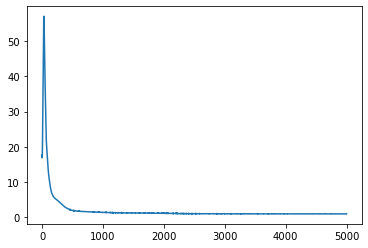

In [12]:
plt.plot(history.history['val_mae'])
np.mean(np.absolute(y_test - y_predicted[0,:,0]))

# 2018

In [13]:
X, y, X_test, y_test = allocate_data(2015)

model = Sequential(
    [
        BatchNormalization(),
        Dense(16, activation = 'relu', input_shape=(n_counties, n_features)),
        Dense(1, activation = 'relu')
    ]
)

model.compile(loss='mse', metrics=['mae'], optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2))

history = model.fit(X, y, epochs=5000, validation_data = (X_test, y_test))

y_predicted = model.predict(X_test)

Epoch 1/5000
1/1 [==============================] - 1s 565ms/step - loss: 226.3535 - mae: 12.1641 - val_loss: 592.5011 - val_mae: 12.2126
Epoch 2/5000
1/1 [==============================] - 0s 22ms/step - loss: 221.6832 - mae: 12.0153 - val_loss: 375.0344 - val_mae: 10.5456
Epoch 3/5000
1/1 [==============================] - 0s 24ms/step - loss: 216.6390 - mae: 11.8512 - val_loss: 316.2203 - val_mae: 9.8410
Epoch 4/5000
1/1 [==============================] - 0s 20ms/step - loss: 211.3799 - mae: 11.6746 - val_loss: 292.2463 - val_mae: 9.4964
Epoch 5/5000
1/1 [==============================] - 0s 24ms/step - loss: 205.9857 - mae: 11.4871 - val_loss: 282.4401 - val_mae: 9.3316
Epoch 6/5000
1/1 [==============================] - 0s 43ms/step - loss: 200.4883 - mae: 11.2916 - val_loss: 280.8485 - val_mae: 9.2760
Epoch 7/5000
1/1 [==============================] - 0s 23ms/step - loss: 194.9272 - mae: 11.0887 - val_loss: 284.8932 - val_mae: 9.2980
Epoch 8/5000
1/1 [===========================

1/1 [==============================] - 0s 20ms/step - loss: 35.0729 - mae: 3.1652 - val_loss: 122.1841 - val_mae: 9.0042
Epoch 122/5000
1/1 [==============================] - 0s 20ms/step - loss: 35.0319 - mae: 3.1602 - val_loss: 119.6070 - val_mae: 8.8708
Epoch 123/5000
1/1 [==============================] - 0s 20ms/step - loss: 34.9921 - mae: 3.1558 - val_loss: 117.0959 - val_mae: 8.7388
Epoch 124/5000
1/1 [==============================] - 0s 20ms/step - loss: 34.9533 - mae: 3.1520 - val_loss: 114.6601 - val_mae: 8.6084
Epoch 125/5000
1/1 [==============================] - 0s 47ms/step - loss: 34.9152 - mae: 3.1485 - val_loss: 112.2980 - val_mae: 8.4798
Epoch 126/5000
1/1 [==============================] - 0s 20ms/step - loss: 34.8781 - mae: 3.1452 - val_loss: 110.0089 - val_mae: 8.3535
Epoch 127/5000
1/1 [==============================] - 0s 19ms/step - loss: 34.8418 - mae: 3.1420 - val_loss: 107.7916 - val_mae: 8.2299
Epoch 128/5000
1/1 [==============================] - 0s 20ms/s

Epoch 182/5000
1/1 [==============================] - 0s 20ms/step - loss: 33.6525 - mae: 3.0487 - val_loss: 65.4000 - val_mae: 5.3091
Epoch 183/5000
1/1 [==============================] - 0s 20ms/step - loss: 33.6391 - mae: 3.0474 - val_loss: 65.1375 - val_mae: 5.2852
Epoch 184/5000
1/1 [==============================] - 0s 21ms/step - loss: 33.6258 - mae: 3.0463 - val_loss: 64.8800 - val_mae: 5.2616
Epoch 185/5000
1/1 [==============================] - 0s 20ms/step - loss: 33.6126 - mae: 3.0453 - val_loss: 64.6428 - val_mae: 5.2392
Epoch 186/5000
1/1 [==============================] - 0s 37ms/step - loss: 33.5996 - mae: 3.0446 - val_loss: 64.4252 - val_mae: 5.2179
Epoch 187/5000
1/1 [==============================] - 0s 21ms/step - loss: 33.5867 - mae: 3.0442 - val_loss: 64.2264 - val_mae: 5.1978
Epoch 188/5000
1/1 [==============================] - 0s 20ms/step - loss: 33.5739 - mae: 3.0441 - val_loss: 64.0420 - val_mae: 5.1787
Epoch 189/5000
1/1 [==============================] - 0

Epoch 243/5000
1/1 [==============================] - 0s 19ms/step - loss: 32.9087 - mae: 3.0152 - val_loss: 57.6258 - val_mae: 4.5415
Epoch 244/5000
1/1 [==============================] - 0s 21ms/step - loss: 32.8947 - mae: 3.0149 - val_loss: 57.5536 - val_mae: 4.5342
Epoch 245/5000
1/1 [==============================] - 0s 20ms/step - loss: 32.8804 - mae: 3.0147 - val_loss: 57.4843 - val_mae: 4.5275
Epoch 246/5000
1/1 [==============================] - 0s 20ms/step - loss: 32.8661 - mae: 3.0144 - val_loss: 57.4163 - val_mae: 4.5211
Epoch 247/5000
1/1 [==============================] - 0s 21ms/step - loss: 32.8518 - mae: 3.0138 - val_loss: 57.3556 - val_mae: 4.5153
Epoch 248/5000
1/1 [==============================] - 0s 21ms/step - loss: 32.8372 - mae: 3.0131 - val_loss: 57.2961 - val_mae: 4.5099
Epoch 249/5000
1/1 [==============================] - 0s 19ms/step - loss: 32.8225 - mae: 3.0122 - val_loss: 57.2349 - val_mae: 4.5046
Epoch 250/5000
1/1 [==============================] - 0

Epoch 304/5000
1/1 [==============================] - 0s 20ms/step - loss: 31.3611 - mae: 2.9219 - val_loss: 51.6458 - val_mae: 4.1429
Epoch 305/5000
1/1 [==============================] - 0s 20ms/step - loss: 31.3121 - mae: 2.9215 - val_loss: 51.4965 - val_mae: 4.1349
Epoch 306/5000
1/1 [==============================] - 0s 36ms/step - loss: 31.2621 - mae: 2.9200 - val_loss: 51.3311 - val_mae: 4.1235
Epoch 307/5000
1/1 [==============================] - 0s 19ms/step - loss: 31.2112 - mae: 2.9171 - val_loss: 51.1548 - val_mae: 4.1095
Epoch 308/5000
1/1 [==============================] - 0s 20ms/step - loss: 31.1591 - mae: 2.9128 - val_loss: 50.9760 - val_mae: 4.0946
Epoch 309/5000
1/1 [==============================] - 0s 20ms/step - loss: 31.1059 - mae: 2.9079 - val_loss: 50.8032 - val_mae: 4.0801
Epoch 310/5000
1/1 [==============================] - 0s 20ms/step - loss: 31.0520 - mae: 2.9031 - val_loss: 50.6449 - val_mae: 4.0676
Epoch 311/5000
1/1 [==============================] - 0

Epoch 365/5000
1/1 [==============================] - 0s 20ms/step - loss: 26.2911 - mae: 2.5906 - val_loss: 50.3946 - val_mae: 3.6041
Epoch 366/5000
1/1 [==============================] - 0s 39ms/step - loss: 26.2062 - mae: 2.5852 - val_loss: 50.5289 - val_mae: 3.5977
Epoch 367/5000
1/1 [==============================] - 0s 21ms/step - loss: 26.1226 - mae: 2.5813 - val_loss: 50.7141 - val_mae: 3.5945
Epoch 368/5000
1/1 [==============================] - 0s 20ms/step - loss: 26.0416 - mae: 2.5782 - val_loss: 50.9101 - val_mae: 3.5894
Epoch 369/5000
1/1 [==============================] - 0s 20ms/step - loss: 25.9628 - mae: 2.5738 - val_loss: 51.0116 - val_mae: 3.5768
Epoch 370/5000
1/1 [==============================] - 0s 19ms/step - loss: 25.8837 - mae: 2.5659 - val_loss: 51.0746 - val_mae: 3.5645
Epoch 371/5000
1/1 [==============================] - 0s 20ms/step - loss: 25.8073 - mae: 2.5597 - val_loss: 51.4518 - val_mae: 3.5671
Epoch 372/5000
1/1 [==============================] - 0

Epoch 426/5000
1/1 [==============================] - 0s 21ms/step - loss: 22.0716 - mae: 2.3899 - val_loss: 52.3375 - val_mae: 3.2613
Epoch 427/5000
1/1 [==============================] - 0s 21ms/step - loss: 21.9949 - mae: 2.3843 - val_loss: 52.0216 - val_mae: 3.2531
Epoch 428/5000
1/1 [==============================] - 0s 20ms/step - loss: 21.9177 - mae: 2.3809 - val_loss: 51.8036 - val_mae: 3.2510
Epoch 429/5000
1/1 [==============================] - 0s 21ms/step - loss: 21.8398 - mae: 2.3818 - val_loss: 51.5285 - val_mae: 3.2448
Epoch 430/5000
1/1 [==============================] - 0s 31ms/step - loss: 21.7612 - mae: 2.3797 - val_loss: 51.2252 - val_mae: 3.2344
Epoch 431/5000
1/1 [==============================] - 0s 20ms/step - loss: 21.6825 - mae: 2.3742 - val_loss: 51.0430 - val_mae: 3.2291
Epoch 432/5000
1/1 [==============================] - 0s 20ms/step - loss: 21.6035 - mae: 2.3722 - val_loss: 50.7343 - val_mae: 3.2210
Epoch 433/5000
1/1 [==============================] - 0

Epoch 487/5000
1/1 [==============================] - 0s 22ms/step - loss: 16.6347 - mae: 2.1131 - val_loss: 35.3756 - val_mae: 2.7570
Epoch 488/5000
1/1 [==============================] - 0s 20ms/step - loss: 16.5219 - mae: 2.1067 - val_loss: 34.6982 - val_mae: 2.7274
Epoch 489/5000
1/1 [==============================] - 0s 21ms/step - loss: 16.4124 - mae: 2.0866 - val_loss: 35.0104 - val_mae: 2.7396
Epoch 490/5000
1/1 [==============================] - 0s 20ms/step - loss: 16.3021 - mae: 2.0917 - val_loss: 34.1520 - val_mae: 2.7116
Epoch 491/5000
1/1 [==============================] - 0s 31ms/step - loss: 16.1816 - mae: 2.0722 - val_loss: 33.7262 - val_mae: 2.7114
Epoch 492/5000
1/1 [==============================] - 0s 19ms/step - loss: 16.0655 - mae: 2.0722 - val_loss: 33.7889 - val_mae: 2.7172
Epoch 493/5000
1/1 [==============================] - 0s 20ms/step - loss: 15.9519 - mae: 2.0771 - val_loss: 33.2467 - val_mae: 2.6840
Epoch 494/5000
1/1 [==============================] - 0

Epoch 548/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.4550 - mae: 1.5496 - val_loss: 25.3733 - val_mae: 2.1977
Epoch 549/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.3679 - mae: 1.5591 - val_loss: 24.6785 - val_mae: 2.1545
Epoch 550/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.2707 - mae: 1.5299 - val_loss: 24.7526 - val_mae: 2.1673
Epoch 551/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.1889 - mae: 1.5405 - val_loss: 25.2671 - val_mae: 2.1629
Epoch 552/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.1160 - mae: 1.5296 - val_loss: 24.6916 - val_mae: 2.1286
Epoch 553/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.0564 - mae: 1.5075 - val_loss: 25.7337 - val_mae: 2.1806
Epoch 554/5000
1/1 [==============================] - 0s 20ms/step - loss: 8.9991 - mae: 1.5428 - val_loss: 24.8486 - val_mae: 2.1139
Epoch 555/5000
1/1 [==============================] - 0s 20ms/

1/1 [==============================] - 0s 21ms/step - loss: 5.1586 - mae: 1.1658 - val_loss: 37.7920 - val_mae: 1.7739
Epoch 671/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.1542 - mae: 1.1696 - val_loss: 37.0542 - val_mae: 1.7556
Epoch 672/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.1691 - mae: 1.1489 - val_loss: 38.3200 - val_mae: 1.8041
Epoch 673/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.1679 - mae: 1.1977 - val_loss: 37.3800 - val_mae: 1.7571
Epoch 674/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.1391 - mae: 1.1487 - val_loss: 38.4282 - val_mae: 1.7737
Epoch 675/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.1041 - mae: 1.1647 - val_loss: 38.0962 - val_mae: 1.7652
Epoch 676/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.0877 - mae: 1.1604 - val_loss: 38.1607 - val_mae: 1.7546
Epoch 677/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.

1/1 [==============================] - 0s 20ms/step - loss: 3.7085 - mae: 0.9520 - val_loss: 34.7758 - val_mae: 1.5320
Epoch 793/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.7021 - mae: 0.9377 - val_loss: 34.8309 - val_mae: 1.5481
Epoch 794/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.6947 - mae: 0.9509 - val_loss: 34.4257 - val_mae: 1.5257
Epoch 795/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.6889 - mae: 0.9368 - val_loss: 35.0519 - val_mae: 1.5427
Epoch 796/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.6838 - mae: 0.9452 - val_loss: 33.9977 - val_mae: 1.5253
Epoch 797/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.6834 - mae: 0.9396 - val_loss: 34.9945 - val_mae: 1.5435
Epoch 798/5000
1/1 [==============================] - 0s 28ms/step - loss: 3.6708 - mae: 0.9458 - val_loss: 34.1364 - val_mae: 1.5200
Epoch 799/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.

1/1 [==============================] - 0s 19ms/step - loss: 3.0806 - mae: 0.8525 - val_loss: 32.3699 - val_mae: 1.4313
Epoch 915/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.0726 - mae: 0.8756 - val_loss: 31.6313 - val_mae: 1.3976
Epoch 916/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.0659 - mae: 0.8492 - val_loss: 32.3542 - val_mae: 1.4242
Epoch 917/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.0595 - mae: 0.8687 - val_loss: 31.5810 - val_mae: 1.3982
Epoch 918/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.0546 - mae: 0.8493 - val_loss: 32.4000 - val_mae: 1.4179
Epoch 919/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.0507 - mae: 0.8621 - val_loss: 31.4904 - val_mae: 1.3986
Epoch 920/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.0474 - mae: 0.8501 - val_loss: 32.3652 - val_mae: 1.4173
Epoch 921/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.

Epoch 1036/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.6769 - mae: 0.7947 - val_loss: 27.4528 - val_mae: 1.3205
Epoch 1037/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.6755 - mae: 0.8068 - val_loss: 26.9853 - val_mae: 1.3007
Epoch 1038/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.6752 - mae: 0.7955 - val_loss: 27.5494 - val_mae: 1.3175
Epoch 1039/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.6720 - mae: 0.8043 - val_loss: 27.0058 - val_mae: 1.3006
Epoch 1040/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.6682 - mae: 0.7953 - val_loss: 27.4266 - val_mae: 1.3151
Epoch 1041/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.6643 - mae: 0.8028 - val_loss: 27.0887 - val_mae: 1.3013
Epoch 1042/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.6607 - mae: 0.7942 - val_loss: 27.2778 - val_mae: 1.3139
Epoch 1043/5000
1/1 [==============================] - 

Epoch 1097/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.5255 - mae: 0.7846 - val_loss: 25.1175 - val_mae: 1.2775
Epoch 1098/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.5226 - mae: 0.7822 - val_loss: 25.0793 - val_mae: 1.2754
Epoch 1099/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.5202 - mae: 0.7806 - val_loss: 25.0777 - val_mae: 1.2804
Epoch 1100/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.5181 - mae: 0.7843 - val_loss: 24.8895 - val_mae: 1.2708
Epoch 1101/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.5162 - mae: 0.7784 - val_loss: 25.0822 - val_mae: 1.2826
Epoch 1102/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.5148 - mae: 0.7858 - val_loss: 24.6940 - val_mae: 1.2664
Epoch 1103/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.5141 - mae: 0.7766 - val_loss: 25.1407 - val_mae: 1.2879
Epoch 1104/5000
1/1 [==============================] - 

Epoch 1158/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.3845 - mae: 0.7704 - val_loss: 21.5265 - val_mae: 1.2165
Epoch 1159/5000
1/1 [==============================] - 0s 40ms/step - loss: 2.3828 - mae: 0.7586 - val_loss: 21.8386 - val_mae: 1.2342
Epoch 1160/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.3793 - mae: 0.7707 - val_loss: 21.5589 - val_mae: 1.2148
Epoch 1161/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.3766 - mae: 0.7568 - val_loss: 21.7174 - val_mae: 1.2316
Epoch 1162/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.3740 - mae: 0.7696 - val_loss: 21.4731 - val_mae: 1.2139
Epoch 1163/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.3715 - mae: 0.7565 - val_loss: 21.7126 - val_mae: 1.2297
Epoch 1164/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.3694 - mae: 0.7672 - val_loss: 21.3109 - val_mae: 1.2128
Epoch 1165/5000
1/1 [==============================] - 

Epoch 1219/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.2483 - mae: 0.7357 - val_loss: 20.5853 - val_mae: 1.2049
Epoch 1220/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.2445 - mae: 0.7587 - val_loss: 20.2801 - val_mae: 1.1765
Epoch 1221/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.2393 - mae: 0.7357 - val_loss: 20.4886 - val_mae: 1.1925
Epoch 1222/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.2338 - mae: 0.7477 - val_loss: 20.3927 - val_mae: 1.1840
Epoch 1223/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.2300 - mae: 0.7406 - val_loss: 20.3821 - val_mae: 1.1815
Epoch 1224/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.2282 - mae: 0.7382 - val_loss: 20.4755 - val_mae: 1.1933
Epoch 1225/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.2273 - mae: 0.7484 - val_loss: 20.2369 - val_mae: 1.1758
Epoch 1226/5000
1/1 [==============================] - 

Epoch 1280/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.1043 - mae: 0.7178 - val_loss: 19.4658 - val_mae: 1.1695
Epoch 1281/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.0989 - mae: 0.7380 - val_loss: 19.2402 - val_mae: 1.1454
Epoch 1282/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.0961 - mae: 0.7185 - val_loss: 19.9136 - val_mae: 1.1714
Epoch 1283/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.1019 - mae: 0.7311 - val_loss: 18.8804 - val_mae: 1.1470
Epoch 1284/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.1106 - mae: 0.7260 - val_loss: 20.1264 - val_mae: 1.1816
Epoch 1285/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.1089 - mae: 0.7383 - val_loss: 18.9206 - val_mae: 1.1393
Epoch 1286/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.1149 - mae: 0.7210 - val_loss: 20.2628 - val_mae: 1.2122
Epoch 1287/5000
1/1 [==============================] - 

Epoch 1341/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.9741 - mae: 0.7156 - val_loss: 18.6165 - val_mae: 1.1188
Epoch 1342/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.9693 - mae: 0.6999 - val_loss: 18.7803 - val_mae: 1.1286
Epoch 1343/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9654 - mae: 0.7061 - val_loss: 18.7118 - val_mae: 1.1269
Epoch 1344/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.9633 - mae: 0.7058 - val_loss: 18.6275 - val_mae: 1.1196
Epoch 1345/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.9625 - mae: 0.7011 - val_loss: 18.8120 - val_mae: 1.1342
Epoch 1346/5000
1/1 [==============================] - 0s 31ms/step - loss: 1.9621 - mae: 0.7107 - val_loss: 18.4818 - val_mae: 1.1150
Epoch 1347/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.9618 - mae: 0.6988 - val_loss: 18.8777 - val_mae: 1.1361
Epoch 1348/5000
1/1 [==============================] - 

Epoch 1402/5000
1/1 [==============================] - 0s 28ms/step - loss: 1.8746 - mae: 0.7080 - val_loss: 17.3021 - val_mae: 1.0845
Epoch 1403/5000
1/1 [==============================] - 0s 27ms/step - loss: 1.8803 - mae: 0.6878 - val_loss: 18.1297 - val_mae: 1.1418
Epoch 1404/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.8899 - mae: 0.7225 - val_loss: 17.0793 - val_mae: 1.0833
Epoch 1405/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.9066 - mae: 0.6941 - val_loss: 18.3977 - val_mae: 1.1733
Epoch 1406/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.9287 - mae: 0.7477 - val_loss: 16.8248 - val_mae: 1.0922
Epoch 1407/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.9632 - mae: 0.7109 - val_loss: 18.6522 - val_mae: 1.2096
Epoch 1408/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.9803 - mae: 0.7790 - val_loss: 16.7680 - val_mae: 1.1010
Epoch 1409/5000
1/1 [==============================] - 

Epoch 1463/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7790 - mae: 0.6756 - val_loss: 17.1651 - val_mae: 1.0971
Epoch 1464/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.7786 - mae: 0.6930 - val_loss: 16.6487 - val_mae: 1.0633
Epoch 1465/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.7786 - mae: 0.6753 - val_loss: 17.1432 - val_mae: 1.1009
Epoch 1466/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.7791 - mae: 0.6965 - val_loss: 16.5591 - val_mae: 1.0609
Epoch 1467/5000
1/1 [==============================] - 0s 28ms/step - loss: 1.7807 - mae: 0.6754 - val_loss: 17.1432 - val_mae: 1.1079
Epoch 1468/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.7830 - mae: 0.7022 - val_loss: 16.4152 - val_mae: 1.0584
Epoch 1469/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7872 - mae: 0.6767 - val_loss: 17.2069 - val_mae: 1.1189
Epoch 1470/5000
1/1 [==============================] - 

Epoch 1524/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.7051 - mae: 0.6892 - val_loss: 15.3473 - val_mae: 1.0392
Epoch 1525/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7134 - mae: 0.6719 - val_loss: 16.2208 - val_mae: 1.1060
Epoch 1526/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7257 - mae: 0.7064 - val_loss: 15.1956 - val_mae: 1.0428
Epoch 1527/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.7467 - mae: 0.6834 - val_loss: 16.4000 - val_mae: 1.1382
Epoch 1528/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7625 - mae: 0.7340 - val_loss: 15.1358 - val_mae: 1.0538
Epoch 1529/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.7911 - mae: 0.7002 - val_loss: 16.6182 - val_mae: 1.1665
Epoch 1530/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.8016 - mae: 0.7576 - val_loss: 15.0224 - val_mae: 1.0591
Epoch 1531/5000
1/1 [==============================] - 

Epoch 1585/5000
1/1 [==============================] - 0s 26ms/step - loss: 1.6211 - mae: 0.6791 - val_loss: 14.9564 - val_mae: 1.0327
Epoch 1586/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.6193 - mae: 0.6578 - val_loss: 15.5047 - val_mae: 1.0725
Epoch 1587/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.6169 - mae: 0.6772 - val_loss: 14.9564 - val_mae: 1.0326
Epoch 1588/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.6151 - mae: 0.6570 - val_loss: 15.4510 - val_mae: 1.0697
Epoch 1589/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.6129 - mae: 0.6755 - val_loss: 14.9566 - val_mae: 1.0326
Epoch 1590/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.6115 - mae: 0.6564 - val_loss: 15.4099 - val_mae: 1.0676
Epoch 1591/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.6095 - mae: 0.6741 - val_loss: 14.9458 - val_mae: 1.0321
Epoch 1592/5000
1/1 [==============================] - 

Epoch 1646/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5583 - mae: 0.6446 - val_loss: 14.7724 - val_mae: 1.0556
Epoch 1647/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.5601 - mae: 0.6711 - val_loss: 14.0452 - val_mae: 1.0064
Epoch 1648/5000
1/1 [==============================] - 0s 31ms/step - loss: 1.5623 - mae: 0.6454 - val_loss: 14.7912 - val_mae: 1.0634
Epoch 1649/5000
1/1 [==============================] - 0s 26ms/step - loss: 1.5644 - mae: 0.6782 - val_loss: 14.0413 - val_mae: 1.0066
Epoch 1650/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.5676 - mae: 0.6472 - val_loss: 14.8367 - val_mae: 1.0705
Epoch 1651/5000
1/1 [==============================] - 0s 33ms/step - loss: 1.5693 - mae: 0.6843 - val_loss: 13.9880 - val_mae: 1.0065
Epoch 1652/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.5720 - mae: 0.6489 - val_loss: 14.8918 - val_mae: 1.0738
Epoch 1653/5000
1/1 [==============================] - 

Epoch 1707/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.4959 - mae: 0.6339 - val_loss: 14.6252 - val_mae: 1.0508
Epoch 1708/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.4973 - mae: 0.6667 - val_loss: 13.9024 - val_mae: 0.9944
Epoch 1709/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.4996 - mae: 0.6346 - val_loss: 14.6596 - val_mae: 1.0560
Epoch 1710/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.5014 - mae: 0.6709 - val_loss: 13.8483 - val_mae: 0.9937
Epoch 1711/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.5046 - mae: 0.6357 - val_loss: 14.7004 - val_mae: 1.0615
Epoch 1712/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.5069 - mae: 0.6756 - val_loss: 13.7888 - val_mae: 0.9934
Epoch 1713/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.5107 - mae: 0.6373 - val_loss: 14.7401 - val_mae: 1.0672
Epoch 1714/5000
1/1 [==============================] - 

Epoch 1768/5000
1/1 [==============================] - 0s 31ms/step - loss: 1.4387 - mae: 0.6515 - val_loss: 13.6452 - val_mae: 0.9837
Epoch 1769/5000
1/1 [==============================] - 0s 30ms/step - loss: 1.4411 - mae: 0.6247 - val_loss: 14.3268 - val_mae: 1.0383
Epoch 1770/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4431 - mae: 0.6573 - val_loss: 13.6032 - val_mae: 0.9831
Epoch 1771/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.4466 - mae: 0.6261 - val_loss: 14.3404 - val_mae: 1.0464
Epoch 1772/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4493 - mae: 0.6649 - val_loss: 13.5527 - val_mae: 0.9830
Epoch 1773/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.4542 - mae: 0.6283 - val_loss: 14.3944 - val_mae: 1.0536
Epoch 1774/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.4573 - mae: 0.6710 - val_loss: 13.4705 - val_mae: 0.9824
Epoch 1775/5000
1/1 [==============================] - 

Epoch 1829/5000
1/1 [==============================] - 0s 27ms/step - loss: 1.3766 - mae: 0.6221 - val_loss: 13.8105 - val_mae: 0.9888
Epoch 1830/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.3760 - mae: 0.6216 - val_loss: 13.7794 - val_mae: 0.9860
Epoch 1831/5000
1/1 [==============================] - 0s 26ms/step - loss: 1.3754 - mae: 0.6197 - val_loss: 13.8462 - val_mae: 0.9915
Epoch 1832/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3750 - mae: 0.6234 - val_loss: 13.7476 - val_mae: 0.9830
Epoch 1833/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.3747 - mae: 0.6179 - val_loss: 13.8788 - val_mae: 0.9943
Epoch 1834/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.3745 - mae: 0.6253 - val_loss: 13.7154 - val_mae: 0.9803
Epoch 1835/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3745 - mae: 0.6164 - val_loss: 13.9140 - val_mae: 0.9977
Epoch 1836/5000
1/1 [==============================] - 

Epoch 1890/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.3372 - mae: 0.6122 - val_loss: 13.7562 - val_mae: 0.9771
Epoch 1891/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.3361 - mae: 0.6098 - val_loss: 13.8002 - val_mae: 0.9779
Epoch 1892/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.3353 - mae: 0.6096 - val_loss: 13.8200 - val_mae: 0.9807
Epoch 1893/5000
1/1 [==============================] - 0s 27ms/step - loss: 1.3347 - mae: 0.6115 - val_loss: 13.7255 - val_mae: 0.9753
Epoch 1894/5000
1/1 [==============================] - 0s 26ms/step - loss: 1.3344 - mae: 0.6086 - val_loss: 13.8650 - val_mae: 0.9838
Epoch 1895/5000
1/1 [==============================] - 0s 48ms/step - loss: 1.3341 - mae: 0.6135 - val_loss: 13.6895 - val_mae: 0.9717
Epoch 1896/5000
1/1 [==============================] - 0s 51ms/step - loss: 1.3339 - mae: 0.6064 - val_loss: 13.8809 - val_mae: 0.9877
Epoch 1897/5000
1/1 [==============================] - 

Epoch 1951/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3124 - mae: 0.6245 - val_loss: 13.4480 - val_mae: 0.9516
Epoch 1952/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.3167 - mae: 0.5945 - val_loss: 14.1784 - val_mae: 1.0111
Epoch 1953/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.3215 - mae: 0.6332 - val_loss: 13.3807 - val_mae: 0.9501
Epoch 1954/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.3282 - mae: 0.5963 - val_loss: 14.2699 - val_mae: 1.0244
Epoch 1955/5000
1/1 [==============================] - 0s 28ms/step - loss: 1.3346 - mae: 0.6451 - val_loss: 13.3055 - val_mae: 0.9507
Epoch 1956/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.3438 - mae: 0.6006 - val_loss: 14.3785 - val_mae: 1.0385
Epoch 1957/5000
1/1 [==============================] - 0s 27ms/step - loss: 1.3517 - mae: 0.6576 - val_loss: 13.2212 - val_mae: 0.9529
Epoch 1958/5000
1/1 [==============================] - 

Epoch 2012/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.3367 - mae: 0.6624 - val_loss: 13.1343 - val_mae: 0.9447
Epoch 2013/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.3372 - mae: 0.6028 - val_loss: 14.1748 - val_mae: 1.0343
Epoch 2014/5000
1/1 [==============================] - 0s 27ms/step - loss: 1.3198 - mae: 0.6578 - val_loss: 13.2687 - val_mae: 0.9399
Epoch 2015/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.3070 - mae: 0.5925 - val_loss: 14.0568 - val_mae: 1.0060
Epoch 2016/5000
1/1 [==============================] - 0s 27ms/step - loss: 1.2915 - mae: 0.6315 - val_loss: 13.2618 - val_mae: 0.9382
Epoch 2017/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.2811 - mae: 0.5851 - val_loss: 13.9541 - val_mae: 0.9806
Epoch 2018/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.2731 - mae: 0.6085 - val_loss: 13.3334 - val_mae: 0.9443
Epoch 2019/5000
1/1 [==============================] - 

Epoch 2073/5000
1/1 [==============================] - 0s 32ms/step - loss: 1.2247 - mae: 0.5824 - val_loss: 13.4878 - val_mae: 0.9464
Epoch 2074/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.2236 - mae: 0.5845 - val_loss: 13.4574 - val_mae: 0.9473
Epoch 2075/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2226 - mae: 0.5856 - val_loss: 13.4421 - val_mae: 0.9418
Epoch 2076/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2218 - mae: 0.5811 - val_loss: 13.5117 - val_mae: 0.9503
Epoch 2077/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.2211 - mae: 0.5871 - val_loss: 13.3923 - val_mae: 0.9390
Epoch 2078/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.2207 - mae: 0.5794 - val_loss: 13.5696 - val_mae: 0.9530
Epoch 2079/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2203 - mae: 0.5884 - val_loss: 13.3717 - val_mae: 0.9364
Epoch 2080/5000
1/1 [==============================] - 

Epoch 2134/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.1823 - mae: 0.5861 - val_loss: 12.9436 - val_mae: 0.9187
Epoch 2135/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1785 - mae: 0.5664 - val_loss: 13.0458 - val_mae: 0.9309
Epoch 2136/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1763 - mae: 0.5747 - val_loss: 13.0154 - val_mae: 0.9282
Epoch 2137/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1756 - mae: 0.5730 - val_loss: 12.9537 - val_mae: 0.9204
Epoch 2138/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.1758 - mae: 0.5676 - val_loss: 13.0860 - val_mae: 0.9377
Epoch 2139/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1767 - mae: 0.5798 - val_loss: 12.8679 - val_mae: 0.9140
Epoch 2140/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1782 - mae: 0.5639 - val_loss: 13.1545 - val_mae: 0.9462
Epoch 2141/5000
1/1 [==============================] - 

Epoch 2195/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.1475 - mae: 0.5719 - val_loss: 11.8687 - val_mae: 0.8957
Epoch 2196/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.1476 - mae: 0.5623 - val_loss: 12.0368 - val_mae: 0.9142
Epoch 2197/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1479 - mae: 0.5744 - val_loss: 11.8461 - val_mae: 0.8927
Epoch 2198/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.1486 - mae: 0.5604 - val_loss: 12.1107 - val_mae: 0.9199
Epoch 2199/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1495 - mae: 0.5782 - val_loss: 11.8268 - val_mae: 0.8892
Epoch 2200/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.1510 - mae: 0.5583 - val_loss: 12.1677 - val_mae: 0.9280
Epoch 2201/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.1526 - mae: 0.5847 - val_loss: 11.8206 - val_mae: 0.8866
Epoch 2202/5000
1/1 [==============================] - 

Epoch 2256/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1236 - mae: 0.5671 - val_loss: 11.9625 - val_mae: 0.8931
Epoch 2257/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1227 - mae: 0.5593 - val_loss: 11.9651 - val_mae: 0.8961
Epoch 2258/5000
1/1 [==============================] - 0s 29ms/step - loss: 1.1221 - mae: 0.5616 - val_loss: 11.9847 - val_mae: 0.8999
Epoch 2259/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.1219 - mae: 0.5643 - val_loss: 11.9525 - val_mae: 0.8912
Epoch 2260/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.1219 - mae: 0.5576 - val_loss: 12.0365 - val_mae: 0.9043
Epoch 2261/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1220 - mae: 0.5671 - val_loss: 11.9190 - val_mae: 0.8881
Epoch 2262/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1221 - mae: 0.5560 - val_loss: 12.0981 - val_mae: 0.9069
Epoch 2263/5000
1/1 [==============================] - 

Epoch 2317/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.1763 - mae: 0.5661 - val_loss: 12.5080 - val_mae: 0.9821
Epoch 2318/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1853 - mae: 0.6337 - val_loss: 11.2922 - val_mae: 0.8800
Epoch 2319/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.1988 - mae: 0.5761 - val_loss: 12.5614 - val_mae: 0.9931
Epoch 2320/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.2002 - mae: 0.6436 - val_loss: 11.2732 - val_mae: 0.8809
Epoch 2321/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2032 - mae: 0.5779 - val_loss: 12.5153 - val_mae: 0.9853
Epoch 2322/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1901 - mae: 0.6367 - val_loss: 11.2936 - val_mae: 0.8715
Epoch 2323/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1760 - mae: 0.5649 - val_loss: 12.3194 - val_mae: 0.9559
Epoch 2324/5000
1/1 [==============================] - 

Epoch 2378/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.1266 - mae: 0.5547 - val_loss: 11.9023 - val_mae: 0.9624
Epoch 2379/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1427 - mae: 0.6230 - val_loss: 10.8010 - val_mae: 0.8676
Epoch 2380/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.1692 - mae: 0.5725 - val_loss: 12.0930 - val_mae: 0.9952
Epoch 2381/5000
1/1 [==============================] - 0s 31ms/step - loss: 1.1892 - mae: 0.6515 - val_loss: 10.7131 - val_mae: 0.8842
Epoch 2382/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.2212 - mae: 0.5955 - val_loss: 12.2707 - val_mae: 1.0209
Epoch 2383/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2320 - mae: 0.6736 - val_loss: 10.6574 - val_mae: 0.8907
Epoch 2384/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.2478 - mae: 0.6046 - val_loss: 12.2012 - val_mae: 1.0107
Epoch 2385/5000
1/1 [==============================] - 

Epoch 2439/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0473 - mae: 0.5539 - val_loss: 10.8540 - val_mae: 0.8574
Epoch 2440/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.0475 - mae: 0.5414 - val_loss: 11.0070 - val_mae: 0.8785
Epoch 2441/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0477 - mae: 0.5563 - val_loss: 10.8221 - val_mae: 0.8553
Epoch 2442/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0481 - mae: 0.5404 - val_loss: 11.0515 - val_mae: 0.8816
Epoch 2443/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.0485 - mae: 0.5581 - val_loss: 10.7884 - val_mae: 0.8534
Epoch 2444/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0492 - mae: 0.5396 - val_loss: 11.0914 - val_mae: 0.8855
Epoch 2445/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0500 - mae: 0.5609 - val_loss: 10.7665 - val_mae: 0.8510
Epoch 2446/5000
1/1 [==============================] - 

Epoch 2500/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0619 - mae: 0.5387 - val_loss: 10.9537 - val_mae: 0.9164
Epoch 2501/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0655 - mae: 0.5916 - val_loss: 10.1572 - val_mae: 0.8359
Epoch 2502/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0704 - mae: 0.5412 - val_loss: 10.9586 - val_mae: 0.9227
Epoch 2503/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0723 - mae: 0.5979 - val_loss: 10.1245 - val_mae: 0.8365
Epoch 2504/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0756 - mae: 0.5435 - val_loss: 10.9505 - val_mae: 0.9246
Epoch 2505/5000
1/1 [==============================] - 0s 27ms/step - loss: 1.0744 - mae: 0.6000 - val_loss: 10.1055 - val_mae: 0.8358
Epoch 2506/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.0743 - mae: 0.5428 - val_loss: 10.9336 - val_mae: 0.9203
Epoch 2507/5000
1/1 [==============================] - 

Epoch 2561/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.0182 - mae: 0.5636 - val_loss: 10.2843 - val_mae: 0.8374
Epoch 2562/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0152 - mae: 0.5312 - val_loss: 10.6204 - val_mae: 0.8748
Epoch 2563/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0120 - mae: 0.5565 - val_loss: 10.3214 - val_mae: 0.8410
Epoch 2564/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0095 - mae: 0.5327 - val_loss: 10.5581 - val_mae: 0.8662
Epoch 2565/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0072 - mae: 0.5495 - val_loss: 10.3651 - val_mae: 0.8454
Epoch 2566/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0055 - mae: 0.5353 - val_loss: 10.4968 - val_mae: 0.8590
Epoch 2567/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0044 - mae: 0.5444 - val_loss: 10.3992 - val_mae: 0.8493
Epoch 2568/5000
1/1 [==============================] - 

Epoch 2622/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0074 - mae: 0.5669 - val_loss: 10.0482 - val_mae: 0.8308
Epoch 2623/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.0018 - mae: 0.5282 - val_loss: 10.4623 - val_mae: 0.8766
Epoch 2624/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.9962 - mae: 0.5600 - val_loss: 10.1196 - val_mae: 0.8341
Epoch 2625/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9918 - mae: 0.5282 - val_loss: 10.3111 - val_mae: 0.8630
Epoch 2626/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9879 - mae: 0.5503 - val_loss: 10.1175 - val_mae: 0.8397
Epoch 2627/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9851 - mae: 0.5322 - val_loss: 10.1925 - val_mae: 0.8501
Epoch 2628/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.9835 - mae: 0.5396 - val_loss: 10.0882 - val_mae: 0.8475
Epoch 2629/5000
1/1 [==============================] - 

Epoch 2683/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9673 - mae: 0.5432 - val_loss: 9.7956 - val_mae: 0.8310
Epoch 2684/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.9716 - mae: 0.5271 - val_loss: 10.1795 - val_mae: 0.8731
Epoch 2685/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.9783 - mae: 0.5574 - val_loss: 9.6661 - val_mae: 0.8249
Epoch 2686/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9867 - mae: 0.5266 - val_loss: 10.2990 - val_mae: 0.8938
Epoch 2687/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.9959 - mae: 0.5736 - val_loss: 9.5471 - val_mae: 0.8234
Epoch 2688/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.0065 - mae: 0.5306 - val_loss: 10.3358 - val_mae: 0.9107
Epoch 2689/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.0144 - mae: 0.5893 - val_loss: 9.4969 - val_mae: 0.8251
Epoch 2690/5000
1/1 [==============================] - 0s 2

Epoch 2744/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.9884 - mae: 0.5271 - val_loss: 10.1335 - val_mae: 0.8876
Epoch 2745/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9773 - mae: 0.5703 - val_loss: 9.5978 - val_mae: 0.8218
Epoch 2746/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9637 - mae: 0.5222 - val_loss: 9.8198 - val_mae: 0.8556
Epoch 2747/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.9537 - mae: 0.5469 - val_loss: 9.7324 - val_mae: 0.8340
Epoch 2748/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9488 - mae: 0.5289 - val_loss: 9.7258 - val_mae: 0.8313
Epoch 2749/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9492 - mae: 0.5266 - val_loss: 9.8971 - val_mae: 0.8576
Epoch 2750/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.9534 - mae: 0.5477 - val_loss: 9.6784 - val_mae: 0.8240
Epoch 2751/5000
1/1 [==============================] - 0s 19m

1/1 [==============================] - 0s 45ms/step - loss: 0.9590 - mae: 0.5214 - val_loss: 10.1175 - val_mae: 0.8886
Epoch 2806/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.9655 - mae: 0.5741 - val_loss: 9.6110 - val_mae: 0.8219
Epoch 2807/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9708 - mae: 0.5273 - val_loss: 10.1646 - val_mae: 0.8974
Epoch 2808/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9736 - mae: 0.5824 - val_loss: 9.5501 - val_mae: 0.8200
Epoch 2809/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.9763 - mae: 0.5272 - val_loss: 10.3153 - val_mae: 0.8982
Epoch 2810/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9784 - mae: 0.5798 - val_loss: 9.4680 - val_mae: 0.8175
Epoch 2811/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.9823 - mae: 0.5259 - val_loss: 10.4549 - val_mae: 0.9017
Epoch 2812/5000
1/1 [==============================] - 0s 25ms/step - loss

1/1 [==============================] - 0s 22ms/step - loss: 0.9326 - mae: 0.5168 - val_loss: 10.1150 - val_mae: 0.8620
Epoch 2867/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.9332 - mae: 0.5501 - val_loss: 9.7209 - val_mae: 0.8158
Epoch 2868/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.9321 - mae: 0.5164 - val_loss: 10.0373 - val_mae: 0.8589
Epoch 2869/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9303 - mae: 0.5486 - val_loss: 9.7619 - val_mae: 0.8175
Epoch 2870/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.9269 - mae: 0.5163 - val_loss: 9.9861 - val_mae: 0.8483
Epoch 2871/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9236 - mae: 0.5398 - val_loss: 9.7900 - val_mae: 0.8212
Epoch 2872/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.9217 - mae: 0.5190 - val_loss: 10.0713 - val_mae: 0.8429
Epoch 2873/5000
1/1 [==============================] - 0s 23ms/step - loss:

1/1 [==============================] - 0s 23ms/step - loss: 0.9357 - mae: 0.5173 - val_loss: 10.2339 - val_mae: 0.8780
Epoch 2989/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.9334 - mae: 0.5643 - val_loss: 9.4104 - val_mae: 0.8066
Epoch 2990/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.9324 - mae: 0.5159 - val_loss: 10.1933 - val_mae: 0.8754
Epoch 2991/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.9288 - mae: 0.5625 - val_loss: 9.4647 - val_mae: 0.8066
Epoch 2992/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.9262 - mae: 0.5148 - val_loss: 10.1190 - val_mae: 0.8714
Epoch 2993/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.9210 - mae: 0.5600 - val_loss: 9.5404 - val_mae: 0.8063
Epoch 2994/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.9161 - mae: 0.5126 - val_loss: 10.0407 - val_mae: 0.8596
Epoch 2995/5000
1/1 [==============================] - 0s 21ms/step - loss

1/1 [==============================] - 0s 19ms/step - loss: 0.8536 - mae: 0.5037 - val_loss: 10.2689 - val_mae: 0.8192
Epoch 3111/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.8540 - mae: 0.5074 - val_loss: 10.0442 - val_mae: 0.8047
Epoch 3112/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8580 - mae: 0.4996 - val_loss: 10.3898 - val_mae: 0.8297
Epoch 3113/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8570 - mae: 0.5137 - val_loss: 10.1774 - val_mae: 0.8060
Epoch 3114/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8544 - mae: 0.4976 - val_loss: 10.2581 - val_mae: 0.8197
Epoch 3115/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8518 - mae: 0.5083 - val_loss: 10.2620 - val_mae: 0.8138
Epoch 3116/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8507 - mae: 0.5029 - val_loss: 10.1509 - val_mae: 0.8064
Epoch 3117/5000
1/1 [==============================] - 0s 19ms/step - l

Epoch 3171/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8293 - mae: 0.4923 - val_loss: 10.5715 - val_mae: 0.8098
Epoch 3172/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.8289 - mae: 0.4941 - val_loss: 10.5929 - val_mae: 0.8088
Epoch 3173/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8285 - mae: 0.4929 - val_loss: 10.5976 - val_mae: 0.8083
Epoch 3174/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8282 - mae: 0.4923 - val_loss: 10.6037 - val_mae: 0.8096
Epoch 3175/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.8279 - mae: 0.4935 - val_loss: 10.6177 - val_mae: 0.8080
Epoch 3176/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.8275 - mae: 0.4918 - val_loss: 10.6319 - val_mae: 0.8093
Epoch 3177/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8272 - mae: 0.4927 - val_loss: 10.6297 - val_mae: 0.8090
Epoch 3178/5000
1/1 [==============================] - 

Epoch 3232/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.8366 - mae: 0.4829 - val_loss: 11.4699 - val_mae: 0.8505
Epoch 3233/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.8430 - mae: 0.5188 - val_loss: 10.7163 - val_mae: 0.7966
Epoch 3234/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8514 - mae: 0.4862 - val_loss: 11.5725 - val_mae: 0.8618
Epoch 3235/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8606 - mae: 0.5281 - val_loss: 10.5801 - val_mae: 0.7993
Epoch 3236/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.8720 - mae: 0.4922 - val_loss: 11.5501 - val_mae: 0.8725
Epoch 3237/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.8716 - mae: 0.5387 - val_loss: 10.5689 - val_mae: 0.8006
Epoch 3238/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.8732 - mae: 0.4948 - val_loss: 11.3647 - val_mae: 0.8693
Epoch 3239/5000
1/1 [==============================] - 

Epoch 3293/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.8451 - mae: 0.5287 - val_loss: 10.1571 - val_mae: 0.7881
Epoch 3294/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8399 - mae: 0.4839 - val_loss: 10.8912 - val_mae: 0.8403
Epoch 3295/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.8336 - mae: 0.5162 - val_loss: 10.1687 - val_mae: 0.7859
Epoch 3296/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.8275 - mae: 0.4801 - val_loss: 10.8376 - val_mae: 0.8280
Epoch 3297/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.8208 - mae: 0.5032 - val_loss: 10.2336 - val_mae: 0.7860
Epoch 3298/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.8143 - mae: 0.4778 - val_loss: 10.7087 - val_mae: 0.8187
Epoch 3299/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.8082 - mae: 0.4961 - val_loss: 10.3531 - val_mae: 0.7872
Epoch 3300/5000
1/1 [==============================] - 

Epoch 3354/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.7890 - mae: 0.4730 - val_loss: 10.7620 - val_mae: 0.7994
Epoch 3355/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7878 - mae: 0.4800 - val_loss: 10.7215 - val_mae: 0.7932
Epoch 3356/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7871 - mae: 0.4752 - val_loss: 10.7378 - val_mae: 0.7938
Epoch 3357/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.7868 - mae: 0.4755 - val_loss: 10.7667 - val_mae: 0.7977
Epoch 3358/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7869 - mae: 0.4783 - val_loss: 10.7059 - val_mae: 0.7908
Epoch 3359/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7871 - mae: 0.4732 - val_loss: 10.8142 - val_mae: 0.8008
Epoch 3360/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.7874 - mae: 0.4798 - val_loss: 10.6660 - val_mae: 0.7890
Epoch 3361/5000
1/1 [==============================] - 

Epoch 3415/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7726 - mae: 0.4689 - val_loss: 10.7189 - val_mae: 0.7888
Epoch 3416/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.7725 - mae: 0.4701 - val_loss: 10.6353 - val_mae: 0.7821
Epoch 3417/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.7731 - mae: 0.4664 - val_loss: 10.7956 - val_mae: 0.7941
Epoch 3418/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7740 - mae: 0.4738 - val_loss: 10.6016 - val_mae: 0.7788
Epoch 3419/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.7752 - mae: 0.4647 - val_loss: 10.8421 - val_mae: 0.8000
Epoch 3420/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7766 - mae: 0.4785 - val_loss: 10.5847 - val_mae: 0.7770
Epoch 3421/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7784 - mae: 0.4635 - val_loss: 10.8885 - val_mae: 0.8067
Epoch 3422/5000
1/1 [==============================] - 

Epoch 3476/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7751 - mae: 0.4843 - val_loss: 11.1739 - val_mae: 0.7805
Epoch 3477/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7775 - mae: 0.4611 - val_loss: 11.6786 - val_mae: 0.8214
Epoch 3478/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.7778 - mae: 0.4896 - val_loss: 11.2092 - val_mae: 0.7804
Epoch 3479/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7773 - mae: 0.4611 - val_loss: 11.7176 - val_mae: 0.8175
Epoch 3480/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7744 - mae: 0.4854 - val_loss: 11.2129 - val_mae: 0.7794
Epoch 3481/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.7714 - mae: 0.4601 - val_loss: 11.7012 - val_mae: 0.8084
Epoch 3482/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7677 - mae: 0.4781 - val_loss: 11.2688 - val_mae: 0.7788
Epoch 3483/5000
1/1 [==============================] - 

Epoch 3537/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.7044 - mae: 0.4472 - val_loss: 10.8418 - val_mae: 0.7486
Epoch 3538/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7032 - mae: 0.4412 - val_loss: 11.0035 - val_mae: 0.7572
Epoch 3539/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7018 - mae: 0.4453 - val_loss: 10.8694 - val_mae: 0.7478
Epoch 3540/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.7004 - mae: 0.4399 - val_loss: 10.9385 - val_mae: 0.7566
Epoch 3541/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.6994 - mae: 0.4467 - val_loss: 10.9106 - val_mae: 0.7467
Epoch 3542/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6986 - mae: 0.4383 - val_loss: 10.9389 - val_mae: 0.7565
Epoch 3543/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.6976 - mae: 0.4467 - val_loss: 10.8873 - val_mae: 0.7453
Epoch 3544/5000
1/1 [==============================] - 

Epoch 3598/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6820 - mae: 0.4310 - val_loss: 11.2239 - val_mae: 0.7520
Epoch 3599/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6841 - mae: 0.4444 - val_loss: 11.0617 - val_mae: 0.7337
Epoch 3600/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6871 - mae: 0.4311 - val_loss: 11.2789 - val_mae: 0.7609
Epoch 3601/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6904 - mae: 0.4516 - val_loss: 11.0105 - val_mae: 0.7349
Epoch 3602/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6939 - mae: 0.4337 - val_loss: 11.3789 - val_mae: 0.7672
Epoch 3603/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6972 - mae: 0.4557 - val_loss: 10.9442 - val_mae: 0.7360
Epoch 3604/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.7015 - mae: 0.4371 - val_loss: 11.4465 - val_mae: 0.7742
Epoch 3605/5000
1/1 [==============================] - 

Epoch 3659/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.7213 - mae: 0.4779 - val_loss: 11.2440 - val_mae: 0.7494
Epoch 3660/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7230 - mae: 0.4503 - val_loss: 11.8899 - val_mae: 0.7891
Epoch 3661/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.7108 - mae: 0.4724 - val_loss: 11.3815 - val_mae: 0.7426
Epoch 3662/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.7013 - mae: 0.4398 - val_loss: 11.7755 - val_mae: 0.7726
Epoch 3663/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6913 - mae: 0.4580 - val_loss: 11.4464 - val_mae: 0.7378
Epoch 3664/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.6834 - mae: 0.4317 - val_loss: 11.7416 - val_mae: 0.7553
Epoch 3665/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.6770 - mae: 0.4409 - val_loss: 11.4764 - val_mae: 0.7385
Epoch 3666/5000
1/1 [==============================] - 

Epoch 3720/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6835 - mae: 0.4539 - val_loss: 11.7258 - val_mae: 0.7423
Epoch 3721/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6879 - mae: 0.4349 - val_loss: 12.1881 - val_mae: 0.7788
Epoch 3722/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.6918 - mae: 0.4604 - val_loss: 11.6769 - val_mae: 0.7453
Epoch 3723/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6967 - mae: 0.4394 - val_loss: 12.2697 - val_mae: 0.7861
Epoch 3724/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7009 - mae: 0.4651 - val_loss: 11.6253 - val_mae: 0.7482
Epoch 3725/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.7062 - mae: 0.4440 - val_loss: 12.2880 - val_mae: 0.7938
Epoch 3726/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.7093 - mae: 0.4715 - val_loss: 11.5888 - val_mae: 0.7519
Epoch 3727/5000
1/1 [==============================] - 

Epoch 3781/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.6615 - mae: 0.4294 - val_loss: 12.2151 - val_mae: 0.7514
Epoch 3782/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6617 - mae: 0.4340 - val_loss: 12.1124 - val_mae: 0.7440
Epoch 3783/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.6622 - mae: 0.4289 - val_loss: 12.2416 - val_mae: 0.7546
Epoch 3784/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.6630 - mae: 0.4362 - val_loss: 12.0832 - val_mae: 0.7429
Epoch 3785/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.6644 - mae: 0.4285 - val_loss: 12.2918 - val_mae: 0.7599
Epoch 3786/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.6666 - mae: 0.4406 - val_loss: 12.0377 - val_mae: 0.7429
Epoch 3787/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.6701 - mae: 0.4296 - val_loss: 12.3841 - val_mae: 0.7702
Epoch 3788/5000
1/1 [==============================] - 

Epoch 3842/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6740 - mae: 0.4482 - val_loss: 12.1709 - val_mae: 0.7449
Epoch 3843/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6721 - mae: 0.4310 - val_loss: 12.5039 - val_mae: 0.7709
Epoch 3844/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6707 - mae: 0.4489 - val_loss: 12.2309 - val_mae: 0.7463
Epoch 3845/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.6698 - mae: 0.4308 - val_loss: 12.5475 - val_mae: 0.7676
Epoch 3846/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6683 - mae: 0.4453 - val_loss: 12.2089 - val_mae: 0.7443
Epoch 3847/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.6678 - mae: 0.4303 - val_loss: 12.6136 - val_mae: 0.7655
Epoch 3848/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6677 - mae: 0.4418 - val_loss: 12.1958 - val_mae: 0.7440
Epoch 3849/5000
1/1 [==============================] - 

Epoch 3903/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6749 - mae: 0.4340 - val_loss: 12.7113 - val_mae: 0.7810
Epoch 3904/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6782 - mae: 0.4566 - val_loss: 12.2199 - val_mae: 0.7502
Epoch 3905/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6827 - mae: 0.4379 - val_loss: 12.7967 - val_mae: 0.7870
Epoch 3906/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6868 - mae: 0.4616 - val_loss: 12.1602 - val_mae: 0.7523
Epoch 3907/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6926 - mae: 0.4421 - val_loss: 12.8893 - val_mae: 0.7959
Epoch 3908/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6980 - mae: 0.4679 - val_loss: 12.1305 - val_mae: 0.7571
Epoch 3909/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.7047 - mae: 0.4486 - val_loss: 12.8507 - val_mae: 0.8008
Epoch 3910/5000
1/1 [==============================] - 

Epoch 3964/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6703 - mae: 0.4487 - val_loss: 12.2931 - val_mae: 0.7453
Epoch 3965/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6623 - mae: 0.4316 - val_loss: 12.6719 - val_mae: 0.7578
Epoch 3966/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6565 - mae: 0.4353 - val_loss: 12.3804 - val_mae: 0.7457
Epoch 3967/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6526 - mae: 0.4295 - val_loss: 12.4738 - val_mae: 0.7503
Epoch 3968/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6508 - mae: 0.4320 - val_loss: 12.5301 - val_mae: 0.7491
Epoch 3969/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6510 - mae: 0.4296 - val_loss: 12.3774 - val_mae: 0.7466
Epoch 3970/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6521 - mae: 0.4304 - val_loss: 12.6085 - val_mae: 0.7561
Epoch 3971/5000
1/1 [==============================] - 

Epoch 4025/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6467 - mae: 0.4263 - val_loss: 11.9551 - val_mae: 0.7441
Epoch 4026/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6439 - mae: 0.4345 - val_loss: 11.6725 - val_mae: 0.7296
Epoch 4027/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.6424 - mae: 0.4269 - val_loss: 11.9023 - val_mae: 0.7373
Epoch 4028/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.6412 - mae: 0.4295 - val_loss: 11.6804 - val_mae: 0.7289
Epoch 4029/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6396 - mae: 0.4261 - val_loss: 11.7787 - val_mae: 0.7350
Epoch 4030/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.6387 - mae: 0.4293 - val_loss: 11.7470 - val_mae: 0.7296
Epoch 4031/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6386 - mae: 0.4247 - val_loss: 11.7142 - val_mae: 0.7341
Epoch 4032/5000
1/1 [==============================] - 

Epoch 4086/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6410 - mae: 0.4243 - val_loss: 11.4845 - val_mae: 0.7433
Epoch 4087/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.6441 - mae: 0.4465 - val_loss: 11.1992 - val_mae: 0.7220
Epoch 4088/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6496 - mae: 0.4292 - val_loss: 11.5447 - val_mae: 0.7505
Epoch 4089/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6502 - mae: 0.4520 - val_loss: 11.2158 - val_mae: 0.7238
Epoch 4090/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.6533 - mae: 0.4315 - val_loss: 11.5962 - val_mae: 0.7513
Epoch 4091/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6512 - mae: 0.4518 - val_loss: 11.2084 - val_mae: 0.7227
Epoch 4092/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6516 - mae: 0.4301 - val_loss: 11.5995 - val_mae: 0.7470
Epoch 4093/5000
1/1 [==============================] - 

Epoch 4147/5000
1/1 [==============================] - 0s 58ms/step - loss: 0.6527 - mae: 0.4322 - val_loss: 11.7470 - val_mae: 0.7501
Epoch 4148/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6484 - mae: 0.4481 - val_loss: 11.2681 - val_mae: 0.7206
Epoch 4149/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.6453 - mae: 0.4279 - val_loss: 11.6414 - val_mae: 0.7422
Epoch 4150/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6390 - mae: 0.4422 - val_loss: 11.3138 - val_mae: 0.7161
Epoch 4151/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.6341 - mae: 0.4222 - val_loss: 11.4887 - val_mae: 0.7302
Epoch 4152/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6275 - mae: 0.4328 - val_loss: 11.3756 - val_mae: 0.7145
Epoch 4153/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6231 - mae: 0.4184 - val_loss: 11.4322 - val_mae: 0.7193
Epoch 4154/5000
1/1 [==============================] - 

Epoch 4208/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6208 - mae: 0.4190 - val_loss: 11.5897 - val_mae: 0.7281
Epoch 4209/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.6230 - mae: 0.4294 - val_loss: 11.3770 - val_mae: 0.7153
Epoch 4210/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.6266 - mae: 0.4203 - val_loss: 11.6670 - val_mae: 0.7363
Epoch 4211/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6324 - mae: 0.4366 - val_loss: 11.2494 - val_mae: 0.7204
Epoch 4212/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6419 - mae: 0.4270 - val_loss: 11.7781 - val_mae: 0.7510
Epoch 4213/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6490 - mae: 0.4497 - val_loss: 11.2595 - val_mae: 0.7298
Epoch 4214/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6604 - mae: 0.4375 - val_loss: 11.8696 - val_mae: 0.7696
Epoch 4215/5000
1/1 [==============================] - 

Epoch 4269/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6190 - mae: 0.4250 - val_loss: 11.5034 - val_mae: 0.7146
Epoch 4270/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6181 - mae: 0.4181 - val_loss: 11.6241 - val_mae: 0.7241
Epoch 4271/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.6178 - mae: 0.4254 - val_loss: 11.5283 - val_mae: 0.7158
Epoch 4272/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.6178 - mae: 0.4185 - val_loss: 11.6605 - val_mae: 0.7248
Epoch 4273/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.6181 - mae: 0.4252 - val_loss: 11.4705 - val_mae: 0.7161
Epoch 4274/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.6193 - mae: 0.4199 - val_loss: 11.7375 - val_mae: 0.7270
Epoch 4275/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.6217 - mae: 0.4267 - val_loss: 11.4003 - val_mae: 0.7162
Epoch 4276/5000
1/1 [==============================] - 

Epoch 4330/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6266 - mae: 0.4326 - val_loss: 11.4718 - val_mae: 0.7167
Epoch 4331/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6275 - mae: 0.4220 - val_loss: 11.7744 - val_mae: 0.7357
Epoch 4332/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.6252 - mae: 0.4352 - val_loss: 11.5528 - val_mae: 0.7161
Epoch 4333/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.6233 - mae: 0.4197 - val_loss: 11.7175 - val_mae: 0.7308
Epoch 4334/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6210 - mae: 0.4306 - val_loss: 11.4296 - val_mae: 0.7157
Epoch 4335/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6203 - mae: 0.4202 - val_loss: 11.6734 - val_mae: 0.7234
Epoch 4336/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6172 - mae: 0.4246 - val_loss: 11.4732 - val_mae: 0.7137
Epoch 4337/5000
1/1 [==============================] - 

Epoch 4391/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6279 - mae: 0.4360 - val_loss: 11.5195 - val_mae: 0.7159
Epoch 4392/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6239 - mae: 0.4209 - val_loss: 11.7331 - val_mae: 0.7315
Epoch 4393/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6189 - mae: 0.4321 - val_loss: 11.6392 - val_mae: 0.7152
Epoch 4394/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6153 - mae: 0.4173 - val_loss: 11.6757 - val_mae: 0.7220
Epoch 4395/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6122 - mae: 0.4234 - val_loss: 11.5794 - val_mae: 0.7167
Epoch 4396/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6113 - mae: 0.4198 - val_loss: 11.6827 - val_mae: 0.7164
Epoch 4397/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.6120 - mae: 0.4176 - val_loss: 11.5573 - val_mae: 0.7190
Epoch 4398/5000
1/1 [==============================] - 

Epoch 4452/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6284 - mae: 0.4403 - val_loss: 11.4697 - val_mae: 0.7194
Epoch 4453/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6288 - mae: 0.4240 - val_loss: 11.8713 - val_mae: 0.7386
Epoch 4454/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6249 - mae: 0.4361 - val_loss: 11.4886 - val_mae: 0.7157
Epoch 4455/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6218 - mae: 0.4213 - val_loss: 11.8272 - val_mae: 0.7300
Epoch 4456/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6169 - mae: 0.4289 - val_loss: 11.5545 - val_mae: 0.7139
Epoch 4457/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6139 - mae: 0.4184 - val_loss: 11.6715 - val_mae: 0.7222
Epoch 4458/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6105 - mae: 0.4241 - val_loss: 11.6766 - val_mae: 0.7164
Epoch 4459/5000
1/1 [==============================] - 

Epoch 4513/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6671 - mae: 0.4474 - val_loss: 11.8683 - val_mae: 0.7633
Epoch 4514/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6492 - mae: 0.4600 - val_loss: 11.3727 - val_mae: 0.7218
Epoch 4515/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6354 - mae: 0.4283 - val_loss: 11.7365 - val_mae: 0.7353
Epoch 4516/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6222 - mae: 0.4346 - val_loss: 11.3434 - val_mae: 0.7131
Epoch 4517/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6146 - mae: 0.4197 - val_loss: 11.6168 - val_mae: 0.7179
Epoch 4518/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6093 - mae: 0.4196 - val_loss: 11.5023 - val_mae: 0.7162
Epoch 4519/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6076 - mae: 0.4202 - val_loss: 11.4533 - val_mae: 0.7132
Epoch 4520/5000
1/1 [==============================] - 

Epoch 4574/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6107 - mae: 0.4186 - val_loss: 11.7679 - val_mae: 0.7298
Epoch 4575/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.6152 - mae: 0.4293 - val_loss: 11.3630 - val_mae: 0.7166
Epoch 4576/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6230 - mae: 0.4230 - val_loss: 11.8940 - val_mae: 0.7446
Epoch 4577/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.6302 - mae: 0.4410 - val_loss: 11.3314 - val_mae: 0.7259
Epoch 4578/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.6434 - mae: 0.4334 - val_loss: 12.0199 - val_mae: 0.7673
Epoch 4579/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6575 - mae: 0.4620 - val_loss: 11.2631 - val_mae: 0.7475
Epoch 4580/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6828 - mae: 0.4563 - val_loss: 12.1906 - val_mae: 0.7977
Epoch 4581/5000
1/1 [==============================] - 

Epoch 4635/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6111 - mae: 0.4280 - val_loss: 11.5241 - val_mae: 0.7163
Epoch 4636/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6147 - mae: 0.4203 - val_loss: 11.7770 - val_mae: 0.7347
Epoch 4637/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6153 - mae: 0.4341 - val_loss: 11.5297 - val_mae: 0.7162
Epoch 4638/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.6147 - mae: 0.4196 - val_loss: 11.7343 - val_mae: 0.7288
Epoch 4639/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6105 - mae: 0.4286 - val_loss: 11.5113 - val_mae: 0.7144
Epoch 4640/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6075 - mae: 0.4181 - val_loss: 11.6685 - val_mae: 0.7198
Epoch 4641/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6044 - mae: 0.4204 - val_loss: 11.6150 - val_mae: 0.7177
Epoch 4642/5000
1/1 [==============================] - 

Epoch 4696/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6075 - mae: 0.4267 - val_loss: 11.6172 - val_mae: 0.7162
Epoch 4697/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6116 - mae: 0.4185 - val_loss: 11.7804 - val_mae: 0.7334
Epoch 4698/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.6120 - mae: 0.4330 - val_loss: 11.6281 - val_mae: 0.7158
Epoch 4699/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.6105 - mae: 0.4178 - val_loss: 11.8018 - val_mae: 0.7266
Epoch 4700/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6066 - mae: 0.4256 - val_loss: 11.6142 - val_mae: 0.7163
Epoch 4701/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6048 - mae: 0.4183 - val_loss: 11.7666 - val_mae: 0.7195
Epoch 4702/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6025 - mae: 0.4186 - val_loss: 11.7298 - val_mae: 0.7199
Epoch 4703/5000
1/1 [==============================] - 

Epoch 4757/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6203 - mae: 0.4237 - val_loss: 11.9565 - val_mae: 0.7421
Epoch 4758/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.6198 - mae: 0.4385 - val_loss: 11.5710 - val_mae: 0.7205
Epoch 4759/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6211 - mae: 0.4241 - val_loss: 11.9763 - val_mae: 0.7430
Epoch 4760/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.6197 - mae: 0.4387 - val_loss: 11.5594 - val_mae: 0.7202
Epoch 4761/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6199 - mae: 0.4237 - val_loss: 11.9992 - val_mae: 0.7396
Epoch 4762/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6182 - mae: 0.4354 - val_loss: 11.5279 - val_mae: 0.7198
Epoch 4763/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6189 - mae: 0.4235 - val_loss: 11.9932 - val_mae: 0.7388
Epoch 4764/5000
1/1 [==============================] - 

Epoch 4818/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6160 - mae: 0.4365 - val_loss: 11.5808 - val_mae: 0.7161
Epoch 4819/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6089 - mae: 0.4188 - val_loss: 11.9055 - val_mae: 0.7214
Epoch 4820/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6033 - mae: 0.4189 - val_loss: 11.7221 - val_mae: 0.7188
Epoch 4821/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6008 - mae: 0.4196 - val_loss: 11.8018 - val_mae: 0.7173
Epoch 4822/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.6003 - mae: 0.4165 - val_loss: 11.9634 - val_mae: 0.7253
Epoch 4823/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6025 - mae: 0.4217 - val_loss: 11.6900 - val_mae: 0.7196
Epoch 4824/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6066 - mae: 0.4210 - val_loss: 12.0838 - val_mae: 0.7316
Epoch 4825/5000
1/1 [==============================] - 

Epoch 4879/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6054 - mae: 0.4198 - val_loss: 11.9130 - val_mae: 0.7221
Epoch 4880/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.5996 - mae: 0.4197 - val_loss: 11.9341 - val_mae: 0.7201
Epoch 4881/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5993 - mae: 0.4169 - val_loss: 11.7332 - val_mae: 0.7203
Epoch 4882/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6018 - mae: 0.4207 - val_loss: 12.0391 - val_mae: 0.7279
Epoch 4883/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6024 - mae: 0.4227 - val_loss: 11.7930 - val_mae: 0.7192
Epoch 4884/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6047 - mae: 0.4186 - val_loss: 11.9719 - val_mae: 0.7340
Epoch 4885/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6062 - mae: 0.4309 - val_loss: 11.8552 - val_mae: 0.7193
Epoch 4886/5000
1/1 [==============================] - 

Epoch 4940/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6008 - mae: 0.4179 - val_loss: 11.7588 - val_mae: 0.7248
Epoch 4941/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6036 - mae: 0.4251 - val_loss: 12.0999 - val_mae: 0.7281
Epoch 4942/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.6011 - mae: 0.4220 - val_loss: 11.8438 - val_mae: 0.7179
Epoch 4943/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.6031 - mae: 0.4169 - val_loss: 11.9205 - val_mae: 0.7356
Epoch 4944/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.6069 - mae: 0.4336 - val_loss: 11.9069 - val_mae: 0.7200
Epoch 4945/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.6070 - mae: 0.4177 - val_loss: 11.9047 - val_mae: 0.7295
Epoch 4946/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.6018 - mae: 0.4270 - val_loss: 11.7132 - val_mae: 0.7192
Epoch 4947/5000
1/1 [==============================] - 

0.7185730888853735

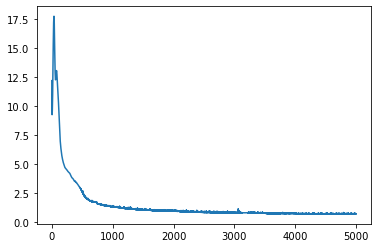

In [14]:
plt.plot(history.history['val_mae'])
np.mean(np.absolute(y_test - y_predicted[0,:,0]))